In [ ]:
# !pip install -U pandas-profiling

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
%matplotlib inline
# 주피터 노트북 전용, 그래프를 주피터 노트북 안에 표시

In [3]:
import re
from string import punctuation

In [ ]:
pattern1 = re.compile('[{}■「※」ㆍ√☎㎡□○◦㎥･◆￦￭▸▣♣◇←－：…………☞≫≪Ⅰ《》〈〉∨…➀Ⅲ➁‣⇨➂∙▪ⓛ‣Ⅱ․․․▲△Ｏ•×【】▶✓➡◀∼″→ㅇ⇒『』◯▼㎜×·④①②③⑤⑦⑥⑧⑨⑩⑪⑫⑬⑭⑮⑯⑰⑱｢｣◎❶❷❸❹❼❺❻]'.format(re.escape(punctuation)))
pattern2 = re.compile(r'\bwww\w+(?:[.]?\w+)+\b')
pattern3 = re.compile(r'[A-Za-z一-龥0-9]')
pattern4 = re.compile(r'\s{2,}')

In [ ]:
with open('total_text.txt', 'r',encoding='utf-8') as f:
    doc = pattern1.sub(' ', f.read()).strip()

In [ ]:
with open('total_text.txt', 'r',encoding='utf-8') as file:
    for text in file:
        print(text.strip('\n'))

In [ ]:
with open('total_text.txt', 'r',encoding='utf-8') as file:
    for text in file:
        doc = pattern1.sub(' ',
              re.sub(r' {2,}','', 
              pattern2.sub('',
              pattern3.sub('',
              pattern4.sub('',text.strip())))))
        print(doc)

In [4]:
sj_data = pd.read_csv("SEJONG_CORPUS.csv", header=0, sep=',', encoding='utf-8')

In [5]:
sj_data.head()

pk                                            ko_text  \
0   1  아이티의 임시 정부를 이끌게 될 대통령으로 13일 취임한 에르타 트루이요 여사는 남...   
1   2  트루이요는 34세의 나이에 대법원 12 명의 법관 중 최초의 여성 법관으로 임명됐으...   
2   3  아이티 여성의 법적 지위등 2권의 책을 저술한 트루이요는 임시 대통령직을 수락하면서...   
3   4  그녀가 지금부터 해 내야 할 일은 지난 86년 뒤발리에의 독재 정권이 무너진 지 4...   
4   5            이것은 너무나도 벅찬 임무라서 누구도 감히 떠맡으려하지 않았던 일이다.   

                                           thai_text     file_name  \
0  นางเออร์ตาทรูโยซึ่งเข้ารับตำแหน่งเมื่อวันที่ 1...  BA90A073.txt   
1  เมื่ออายุ 34 ปี Trujillo ได้รับแต่งตั้งเป็นผู้...  BA90A073.txt   
2  Truiyo ผู้แต่งหนังสือสองเล่มรวมถึงสถานะทางกฎหม...  BA90A073.txt   
3  สิ่งที่เธอต้องทำในตอนนี้ก็คือการจัดการเลือกตั้...  BA90A073.txt   
4   นี่เป็นงานที่หนักหน่วงจนไม่มีใครกล้าเข้าครอบครอง  BA90A073.txt   

   sent_count  cumsum_count  
0           1             1  
1           1             1  
2           1             1  
3           1             3  
4           1             3

In [6]:
sj = list(sj_data['ko_text'])

In [25]:
sj[0]

'아이티의 임시 정부를 이끌게 될 대통령으로 13일 취임한 에르타 트루이요 여사는 남성 우위의 나라에서 수많은 여성 최초의 기록을 세운 강인한 인상의 존경받는 판사이다.'

In [26]:
from konlpy.tag import Okt

okt = Okt()

def tokenizer1(doc): # 어절
    return doc.split()

def tokenizer2(doc): # 형태소
    return [_ for _ in okt.morphs(doc) if 1 < len(_) < 8]

def tokenizer3(doc): # 명사
    return [_ for _ in okt.nouns(doc) if 1 < len(_) < 8]

In [28]:
pattern1 = re.compile('[{}■「※」ㆍ√☎㎡□○◦㎥･◆￦￭▸▣♣◇←－：…………☞≫≪Ⅰ《》〈〉∨…➀Ⅲ➁‣⇨➂∙▪ⓛ‣Ⅱ․․․▲△Ｏ•×【】▶✓➡◀∼″→ㅇ⇒『』◯▼㎜×·④①②③⑤⑦⑥⑧⑨⑩⑪⑫⑬⑭⑮⑯⑰⑱｢｣◎❶❷❸❹❼❺❻]'.format(re.escape(punctuation)))
pattern2 = re.compile(r'\bwww\w+(?:[.]?\w+)+\b')
pattern3 = re.compile(r'[A-Za-z一-龥]')
pattern4 = re.compile(r'(\"|\')?([^\"\']+)(\"|\')?/"')
pattern5 = re.compile(r'\s{2,}')

In [32]:
from collections import defaultdict
def get_tokens(doc):
    global terms
    
    cnt1 = len(tokenizer1(doc))
    cnt2 = len(tokenizer2(doc))
    cnt4 = len(tokenizer3(doc))

    return cnt1, cnt2, cnt4

In [34]:
cnt1, cnt2, cnt3 = 0,0,0
cnt1_list = list()
cnt2_list = list()
cnt3_list = list()

for text in sj:
    doc = pattern1.sub('',
          re.sub(r' {2,}','', 
          pattern2.sub('',
          pattern3.sub('',
          pattern4.sub(' ',
          pattern5.sub('',text.strip()))))))
    a,b,c= get_tokens(doc)
    cnt1 = cnt1 + a # 어절 갯수
    cnt2 = cnt2 + b # 형태소 개수
    cnt3 = cnt3 + c # 명사 개수
    cnt1_list.append(a)
    cnt2_list.append(b)
    cnt3_list.append(c)
    
    print(cnt1)

23
41
61
89
98
110
126
139
155
166
192
199
217
230
256
266
271
281
291
317
323
341
360
371
403
429
438
458
471
482
510
526
540
544
556
574
604
612
634
646
667
693
695
723
737
746
762
787
795
801
817
826
834
848
856
870
889
900
907
914
931
944
955
972
974
989
1004
1017
1034
1056
1093
1096
1114
1129
1152
1161
1177
1185
1203
1220
1244
1258
1275
1289
1307
1337
1353
1360
1371
1381
1392
1403
1411
1415
1442
1456
1482
1493
1511
1526
1555
1563
1570
1602
1621
1645
1657
1672
1685
1717
1733
1738
1761
1775
1807
1827
1850
1877
1891
1905
1927
1947
1958
1973
1991
2003
2009
2014
2022
2039
2046
2061
2083
2109
2121
2132
2155
2187
2197
2211
2225
2232
2244
2265
2287
2304
2312
2329
2336
2362
2374
2381
2399
2401
2418
2430
2442
2446
2448
2457
2465
2481
2491
2515
2539
2561
2584
2593
2603
2611
2618
2633
2645
2664
2667
2684
2709
2724
2732
2745
2762
2781
2795
2818
2841
2848
2857
2864
2883
2906
2914
2925
2951
2989
3008
3015
3033
3045
3070
3086
3097
3113
3129
3152
3178
3209
3216
3225
3241
3262
3268
3277
3289
3294
3

22345
22357
22367
22377
22388
22395
22425
22434
22438
22453
22463
22470
22478
22483
22488
22495
22509
22517
22520
22531
22548
22561
22567
22582
22591
22603
22616
22620
22632
22646
22650
22659
22669
22677
22694
22705
22711
22719
22724
22732
22737
22751
22766
22781
22788
22801
22812
22818
22830
22835
22844
22854
22859
22865
22884
22899
22914
22940
22959
22990
23012
23026
23031
23040
23057
23075
23090
23104
23116
23128
23141
23153
23174
23194
23208
23219
23235
23262
23276
23286
23317
23342
23349
23374
23386
23408
23425
23429
23437
23456
23470
23483
23499
23504
23521
23537
23542
23546
23559
23580
23589
23599
23616
23625
23643
23650
23652
23653
23660
23671
23675
23691
23702
23709
23717
23722
23731
23741
23751
23759
23765
23782
23794
23798
23806
23817
23835
23837
23843
23855
23866
23871
23876
23890
23901
23910
23915
23920
23927
23934
23943
23953
23962
23970
23980
23984
23987
23993
24006
24018
24024
24028
24032
24044
24054
24072
24082
24099
24125
24151
24160
24175
24185
24233
24266
24286
2429

39382
39396
39431
39455
39479
39488
39504
39530
39543
39563
39588
39599
39633
39645
39659
39663
39688
39706
39727
39752
39766
39782
39807
39832
39841
39860
39886
39931
39959
39979
40007
40025
40042
40054
40072
40084
40108
40130
40148
40166
40198
40221
40228
40244
40257
40272
40289
40305
40316
40327
40343
40368
40387
40390
40399
40412
40428
40449
40463
40466
40479
40491
40519
40524
40533
40544
40550
40567
40588
40607
40619
40635
40668
40687
40697
40703
40722
40728
40739
40755
40769
40781
40785
40797
40808
40820
40822
40827
40835
40844
40854
40861
40875
40885
40895
40906
40928
40948
40975
40984
40993
41001
41026
41045
41050
41058
41068
41080
41087
41096
41111
41126
41134
41161
41169
41183
41202
41217
41256
41307
41327
41346
41368
41385
41406
41412
41417
41428
41430
41436
41445
41456
41463
41468
41472
41482
41487
41497
41509
41514
41519
41531
41535
41540
41548
41558
41560
41575
41588
41600
41605
41626
41652
41678
41706
41727
41745
41755
41761
41769
41778
41800
41812
41817
41824
41832
4184

57979
57998
58023
58027
58028
58048
58077
58105
58109
58113
58147
58152
58168
58180
58187
58197
58213
58223
58235
58244
58254
58268
58275
58296
58304
58312
58332
58341
58368
58386
58416
58427
58466
58486
58508
58522
58546
58548
58550
58560
58584
58589
58601
58628
58635
58646
58656
58665
58681
58684
58702
58712
58716
58720
58729
58744
58766
58788
58817
58832
58838
58847
58858
58875
58883
58894
58909
58916
58928
58936
58943
58956
58968
58982
59002
59013
59032
59059
59077
59090
59095
59104
59126
59140
59144
59151
59160
59175
59191
59202
59220
59242
59255
59271
59277
59282
59296
59299
59308
59322
59342
59348
59352
59361
59369
59386
59390
59405
59413
59417
59423
59432
59443
59452
59463
59470
59478
59483
59488
59492
59495
59506
59512
59519
59527
59540
59549
59559
59561
59569
59578
59584
59600
59603
59624
59629
59635
59642
59649
59655
59673
59684
59689
59696
59709
59713
59726
59739
59763
59773
59779
59789
59799
59809
59816
59825
59839
59847
59858
59872
59877
59889
59913
59921
59927
59955
5997

74863
74869
74879
74886
74903
74914
74916
74919
74924
74935
74940
74945
74952
74959
74965
74987
74994
74999
75006
75011
75017
75023
75026
75031
75035
75039
75049
75052
75055
75062
75063
75075
75077
75083
75092
75110
75146
75156
75159
75164
75177
75184
75194
75198
75208
75213
75220
75234
75246
75257
75265
75271
75280
75291
75293
75305
75318
75324
75326
75332
75335
75342
75354
75371
75390
75401
75414
75425
75437
75442
75449
75468
75476
75485
75493
75499
75507
75521
75542
75555
75562
75580
75590
75604
75607
75624
75637
75657
75661
75665
75677
75695
75731
75738
75739
75741
75744
75746
75750
75751
75762
75801
75819
75826
75837
75845
75852
75864
75874
75899
75903
75904
75935
75950
75952
75965
75976
75978
75984
75989
76007
76041
76044
76047
76054
76060
76072
76083
76116
76137
76156
76161
76166
76187
76188
76224
76229
76235
76248
76250
76252
76267
76282
76288
76297
76309
76325
76344
76345
76354
76375
76389
76393
76396
76409
76421
76441
76450
76470
76477
76488
76494
76505
76507
76513
76520
7653

92459
92464
92465
92475
92483
92487
92500
92510
92520
92538
92552
92559
92567
92587
92600
92605
92637
92668
92690
92694
92706
92719
92725
92731
92745
92756
92759
92766
92779
92784
92795
92814
92826
92835
92843
92854
92864
92873
92889
92902
92911
92917
92923
92926
92933
92941
92945
92956
92960
92985
92998
93022
93056
93081
93111
93137
93162
93204
93238
93279
93288
93319
93349
93369
93390
93405
93421
93443
93463
93492
93519
93555
93573
93609
93638
93674
93735
93766
93769
93774
93796
93829
93833
93837
93850
93867
93872
93882
93896
93914
93920
93929
93941
93948
93967
93986
94005
94008
94020
94034
94043
94049
94062
94079
94085
94098
94105
94110
94132
94154
94163
94173
94221
94257
94296
94314
94326
94360
94369
94389
94408
94414
94439
94463
94481
94487
94504
94519
94531
94537
94549
94572
94590
94610
94638
94646
94656
94665
94673
94679
94690
94699
94716
94723
94731
94740
94748
94752
94765
94784
94796
94803
94807
94816
94825
94856
94902
94913
94921
94929
94935
94949
94970
95002
95029
95071
9510

109781
109796
109811
109832
109868
109891
109937
109958
109982
109984
109995
110012
110019
110028
110050
110055
110067
110082
110102
110110
110113
110126
110145
110168
110197
110199
110210
110215
110223
110234
110244
110265
110272
110287
110318
110324
110337
110355
110366
110370
110376
110379
110386
110393
110401
110413
110417
110426
110433
110444
110446
110451
110459
110478
110487
110497
110505
110520
110529
110563
110583
110589
110601
110608
110620
110634
110649
110661
110669
110677
110689
110699
110709
110719
110735
110744
110758
110774
110789
110801
110812
110827
110837
110850
110865
110883
110902
110915
110960
111005
111030
111079
111105
111141
111175
111189
111224
111246
111284
111309
111313
111321
111339
111349
111375
111398
111417
111427
111438
111450
111462
111471
111485
111505
111511
111516
111531
111549
111560
111571
111575
111587
111599
111604
111645
111668
111701
111730
111756
111801
111850
111869
111900
111911
111937
111962
111975
111980
111990
112004
112019
112029
112046

125540
125569
125575
125589
125594
125599
125601
125623
125635
125663
125677
125687
125695
125708
125725
125736
125760
125787
125799
125832
125836
125848
125870
125881
125890
125916
125951
125957
125976
125985
126016
126038
126053
126059
126069
126084
126098
126122
126140
126163
126180
126204
126230
126239
126248
126252
126263
126272
126278
126287
126293
126306
126320
126322
126329
126343
126351
126365
126373
126378
126385
126397
126406
126416
126421
126436
126445
126455
126464
126476
126492
126517
126529
126543
126565
126583
126601
126626
126633
126642
126660
126667
126684
126698
126703
126711
126726
126748
126759
126776
126781
126800
126807
126824
126831
126849
126873
126876
126895
126908
126913
126916
126938
126955
126963
126979
127000
127007
127033
127054
127064
127071
127082
127094
127113
127119
127124
127132
127139
127146
127156
127164
127173
127191
127203
127220
127242
127257
127271
127276
127299
127310
127319
127333
127343
127349
127360
127379
127402
127423
127428
127441
127457

141798
141804
141832
141859
141869
141884
141913
141939
141949
141967
141971
141975
142002
142010
142018
142028
142034
142041
142047
142066
142079
142086
142098
142102
142108
142114
142124
142133
142145
142151
142161
142167
142176
142181
142198
142207
142217
142226
142245
142256
142274
142285
142295
142304
142313
142317
142330
142349
142366
142374
142385
142395
142405
142416
142429
142449
142467
142472
142484
142507
142516
142525
142538
142546
142551
142559
142580
142589
142595
142607
142615
142623
142628
142638
142648
142655
142661
142668
142679
142695
142702
142711
142717
142731
142752
142759
142771
142779
142785
142796
142812
142833
142877
142885
142910
142935
142956
142973
142985
142995
143006
143024
143034
143085
143105
143127
143147
143161
143172
143206
143232
143252
143274
143305
143317
143342
143358
143376
143385
143397
143425
143442
143476
143488
143494
143499
143523
143547
143568
143580
143587
143603
143619
143630
143662
143688
143702
143716
143740
143764
143774
143785
143806

158627
158643
158652
158668
158692
158702
158724
158727
158736
158746
158754
158766
158790
158800
158811
158817
158827
158836
158868
158886
158897
158908
158924
158943
158960
158970
158982
158994
159000
159016
159043
159073
159089
159118
159137
159163
159173
159198
159228
159249
159270
159302
159314
159327
159335
159369
159377
159396
159418
159442
159457
159465
159476
159484
159500
159517
159522
159539
159554
159579
159589
159602
159622
159634
159664
159673
159703
159710
159715
159726
159730
159743
159757
159767
159778
159802
159842
159862
159870
159878
159887
159893
159903
159919
159932
159939
159948
159962
159970
159976
159994
160003
160015
160032
160044
160059
160064
160068
160076
160089
160101
160124
160144
160157
160182
160197
160221
160267
160292
160311
160337
160341
160358
160369
160379
160383
160396
160401
160414
160430
160442
160455
160462
160467
160480
160488
160496
160501
160512
160521
160543
160549
160559
160566
160584
160598
160621
160647
160663
160680
160705
160717
160745

176736
176766
176780
176796
176815
176846
176873
176892
176905
176919
176927
176941
176960
176974
176990
177000
177018
177024
177041
177056
177064
177085
177099
177114
177130
177138
177153
177161
177181
177200
177211
177218
177224
177239
177246
177262
177272
177281
177298
177311
177322
177324
177335
177354
177362
177375
177387
177403
177420
177451
177460
177467
177479
177500
177514
177533
177564
177574
177582
177595
177603
177612
177634
177659
177673
177709
177718
177731
177746
177761
177796
177824
177833
177849
177866
177879
177901
177926
177940
177957
177976
178001
178024
178037
178065
178083
178099
178120
178139
178150
178170
178184
178207
178221
178229
178248
178258
178276
178288
178293
178304
178317
178333
178340
178347
178360
178373
178379
178383
178391
178408
178425
178440
178459
178498
178512
178538
178548
178584
178591
178598
178607
178615
178621
178636
178644
178655
178665
178676
178688
178704
178723
178733
178758
178776
178803
178816
178839
178859
178871
178888
178894
178905

192222
192242
192252
192258
192270
192284
192294
192317
192336
192352
192370
192392
192410
192432
192446
192449
192465
192485
192499
192509
192527
192539
192552
192565
192582
192595
192603
192627
192649
192650
192665
192683
192701
192720
192732
192761
192776
192790
192803
192816
192819
192834
192849
192864
192875
192892
192902
192914
192939
192954
192983
192986
192996
193025
193036
193046
193069
193080
193097
193116
193137
193151
193154
193157
193160
193162
193165
193167
193184
193207
193209
193212
193234
193248
193268
193289
193304
193313
193323
193336
193345
193354
193371
193391
193416
193428
193436
193449
193462
193480
193488
193506
193525
193539
193557
193577
193599
193606
193625
193643
193653
193677
193696
193715
193727
193749
193766
193777
193789
193804
193822
193834
193850
193860
193871
193882
193900
193918
193928
193940
193948
193961
193968
193984
193993
194018
194033
194051
194067
194074
194086
194097
194112
194131
194145
194170
194182
194191
194218
194233
194234
194236
194238

210172
210198
210207
210228
210235
210245
210269
210302
210339
210354
210367
210383
210398
210419
210440
210462
210474
210484
210490
210503
210509
210520
210526
210535
210546
210551
210562
210579
210590
210602
210621
210624
210628
210636
210639
210645
210656
210660
210673
210697
210723
210739
210757
210781
210799
210815
210863
210896
210923
210954
210980
211011
211040
211073
211090
211108
211125
211131
211155
211176
211197
211228
211231
211242
211256
211280
211294
211307
211316
211321
211325
211326
211331
211349
211384
211402
211416
211435
211448
211466
211482
211493
211501
211524
211538
211566
211580
211594
211618
211630
211663
211697
211717
211741
211754
211776
211787
211819
211840
211852
211873
211895
211920
211944
211951
211979
211996
212004
212014
212031
212043
212069
212079
212099
212102
212115
212131
212145
212154
212170
212188
212203
212209
212226
212240
212254
212266
212279
212301
212306
212317
212324
212333
212352
212370
212381
212394
212413
212441
212467
212489
212500
212517

229947
229961
229984
230012
230027
230053
230087
230106
230124
230131
230143
230159
230173
230183
230196
230198
230207
230222
230239
230252
230265
230278
230290
230303
230318
230339
230361
230380
230403
230413
230431
230449
230469
230476
230483
230498
230515
230534
230555
230565
230567
230607
230622
230637
230653
230667
230710
230730
230743
230768
230789
230819
230842
230859
230874
230891
230911
230921
230929
230956
230965
230999
231010
231027
231047
231060
231073
231124
231137
231148
231168
231189
231201
231225
231245
231263
231267
231271
231283
231298
231322
231348
231368
231395
231415
231438
231454
231479
231497
231518
231532
231546
231575
231600
231613
231641
231657
231686
231709
231719
231734
231756
231780
231801
231820
231832
231838
231845
231853
231868
231887
231898
231904
231916
231939
231959
231969
231973
231985
232001
232016
232025
232031
232057
232063
232085
232094
232118
232127
232141
232158
232165
232184
232189
232194
232215
232229
232239
232263
232271
232282
232288
232301

247723
247731
247737
247742
247756
247762
247783
247792
247815
247820
247824
247833
247848
247858
247864
247881
247895
247906
247911
247918
247933
247941
247948
247961
247986
247991
248002
248009
248025
248030
248048
248055
248066
248073
248081
248089
248097
248112
248124
248136
248146
248153
248173
248179
248197
248202
248209
248219
248228
248245
248258
248276
248293
248306
248317
248326
248333
248344
248352
248355
248370
248390
248397
248408
248415
248420
248435
248439
248447
248467
248481
248487
248494
248497
248506
248512
248525
248535
248541
248552
248566
248573
248588
248599
248612
248624
248645
248669
248686
248702
248729
248739
248753
248765
248795
248813
248825
248849
248863
248872
248885
248889
248892
248898
248915
248926
248930
248935
248953
248970
248985
248997
249021
249032
249035
249045
249050
249063
249089
249106
249116
249120
249141
249153
249162
249177
249184
249192
249202
249223
249235
249245
249254
249266
249281
249292
249305
249314
249326
249336
249343
249347
249359

261632
261637
261641
261645
261660
261671
261676
261686
261692
261698
261699
261703
261737
261749
261762
261775
261790
261801
261807
261814
261818
261821
261828
261836
261850
261852
261855
261873
261879
261881
261882
261883
261885
261888
261889
261891
261892
261894
261912
261918
261930
261938
261956
261968
261976
261997
262015
262020
262034
262042
262057
262061
262067
262085
262088
262092
262098
262105
262109
262110
262114
262129
262134
262138
262141
262146
262149
262154
262162
262173
262179
262194
262202
262212
262217
262218
262220
262222
262225
262236
262239
262257
262260
262274
262278
262288
262290
262298
262313
262320
262329
262331
262335
262341
262346
262360
262366
262396
262399
262406
262424
262433
262446
262449
262479
262489
262494
262509
262512
262516
262518
262534
262537
262552
262556
262562
262578
262588
262595
262614
262616
262635
262642
262656
262661
262676
262685
262699
262709
262722
262728
262740
262756
262780
262790
262796
262806
262815
262819
262834
262844
262850
262867

276628
276635
276661
276671
276693
276709
276718
276738
276752
276764
276779
276795
276810
276821
276828
276835
276843
276859
276873
276886
276893
276901
276920
276926
276931
276946
276961
276978
277002
277022
277036
277045
277056
277067
277079
277088
277101
277106
277114
277124
277141
277151
277165
277180
277191
277196
277212
277228
277259
277275
277293
277311
277325
277332
277348
277369
277392
277407
277416
277424
277433
277442
277457
277467
277481
277501
277511
277521
277530
277540
277567
277590
277599
277604
277614
277621
277626
277640
277647
277652
277668
277676
277690
277694
277704
277715
277724
277731
277739
277747
277772
277781
277801
277822
277826
277832
277843
277855
277862
277866
277878
277889
277898
277905
277925
277942
277948
277981
277988
278004
278014
278018
278031
278044
278057
278077
278090
278102
278121
278132
278137
278153
278166
278175
278186
278199
278210
278219
278248
278255
278261
278276
278282
278290
278298
278310
278333
278339
278345
278351
278355
278357
278363

293604
293612
293617
293634
293637
293654
293675
293692
293705
293713
293730
293737
293751
293765
293781
293789
293812
293833
293851
293863
293868
293874
293883
293899
293910
293917
293935
293947
293970
293985
293993
293996
294000
294004
294018
294026
294038
294046
294060
294071
294080
294087
294095
294099
294107
294118
294127
294134
294143
294158
294168
294182
294193
294199
294204
294219
294236
294261
294267
294291
294307
294316
294328
294355
294371
294397
294423
294441
294453
294455
294475
294489
294510
294523
294539
294553
294562
294567
294580
294589
294598
294608
294617
294628
294643
294654
294664
294675
294679
294702
294714
294738
294755
294775
294784
294802
294825
294828
294840
294851
294857
294866
294873
294884
294891
294905
294913
294948
294957
294979
295002
295011
295023
295035
295046
295062
295080
295083
295086
295100
295113
295124
295143
295155
295166
295181
295193
295209
295234
295241
295246
295256
295265
295286
295294
295300
295314
295330
295352
295367
295383
295396
295412

311633
311645
311666
311675
311687
311728
311747
311763
311776
311798
311811
311824
311846
311863
311881
311895
311904
311928
311940
311959
311968
311980
312008
312023
312041
312057
312069
312088
312102
312143
312155
312169
312176
312188
312202
312215
312235
312249
312262
312280
312291
312318
312326
312346
312374
312396
312410
312435
312440
312448
312468
312483
312499
312510
312535
312545
312565
312582
312592
312602
312615
312630
312656
312662
312673
312697
312710
312721
312748
312770
312789
312804
312817
312827
312837
312851
312866
312885
312921
312931
312947
312974
312990
313010
313018
313031
313067
313092
313108
313129
313172
313198
313208
313223
313252
313280
313304
313325
313338
313361
313378
313398
313418
313440
313460
313467
313471
313484
313501
313505
313521
313541
313559
313575
313590
313624
313635
313648
313673
313678
313697
313704
313709
313723
313737
313769
313782
313808
313849
313873
313890
313917
313938
313950
313964
313977
313985
314006
314025
314042
314051
314066
314088

331393
331414
331423
331440
331453
331489
331506
331528
331540
331564
331573
331588
331627
331630
331658
331669
331687
331699
331708
331718
331729
331745
331755
331773
331783
331797
331823
331837
331844
331854
331868
331883
331901
331907
331915
331925
331937
331950
331970
331975
331986
331997
332006
332025
332032
332057
332085
332097
332120
332139
332151
332160
332170
332191
332195
332202
332223
332243
332263
332275
332299
332318
332331
332353
332365
332385
332395
332416
332427
332443
332457
332471
332489
332508
332522
332529
332542
332557
332569
332596
332622
332639
332659
332682
332696
332711
332730
332743
332759
332766
332777
332787
332806
332820
332836
332865
332891
332905
332912
332928
332960
332976
332985
332995
333018
333033
333037
333045
333066
333088
333104
333108
333125
333150
333171
333183
333211
333225
333234
333241
333257
333274
333295
333312
333320
333340
333348
333366
333374
333387
333406
333412
333420
333435
333459
333473
333491
333505
333521
333531
333559
333577
333586

349481
349491
349504
349517
349535
349549
349566
349576
349585
349598
349605
349617
349622
349658
349669
349679
349685
349706
349725
349737
349749
349758
349764
349776
349781
349797
349812
349827
349847
349860
349875
349883
349908
349930
349944
349953
349975
349995
349997
350018
350044
350052
350060
350083
350093
350102
350111
350117
350124
350150
350172
350194
350198
350214
350223
350233
350253
350264
350273
350281
350298
350315
350330
350350
350365
350378
350386
350396
350403
350423
350437
350459
350470
350478
350490
350497
350506
350520
350528
350549
350569
350581
350587
350609
350623
350646
350656
350681
350699
350725
350737
350749
350756
350771
350783
350817
350831
350832
350855
350868
350888
350899
350915
350940
350950
350958
350977
350997
351009
351015
351021
351033
351040
351071
351090
351112
351129
351136
351147
351161
351172
351187
351204
351221
351246
351261
351270
351300
351348
351357
351379
351411
351429
351451
351460
351478
351493
351528
351547
351564
351596
351613
351624

366286
366304
366310
366315
366322
366331
366346
366357
366362
366375
366381
366386
366390
366394
366400
366417
366428
366434
366437
366441
366448
366470
366488
366492
366501
366522
366534
366542
366557
366563
366582
366600
366609
366611
366622
366630
366653
366665
366672
366680
366702
366709
366716
366731
366740
366788
366805
366829
366842
366859
366876
366882
366890
366897
366910
366933
366946
366958
366970
366986
366987
366993
367002
367011
367024
367032
367044
367061
367077
367086
367105
367125
367154
367163
367183
367219
367232
367245
367256
367279
367287
367296
367308
367343
367355
367363
367379
367392
367399
367413
367417
367427
367435
367442
367453
367495
367519
367535
367576
367611
367641
367708
367722
367727
367733
367771
367777
367789
367799
367816
367828
367833
367847
367862
367875
367895
367906
367911
367924
367932
367947
367962
367979
367998
368005
368025
368049
368063
368074
368100
368115
368125
368140
368149
368153
368156
368161
368171
368184
368194
368202
368215
368220

384520
384526
384541
384568
384587
384592
384601
384613
384637
384652
384664
384667
384675
384676
384677
384679
384680
384682
384683
384684
384685
384686
384696
384722
384742
384748
384754
384766
384771
384779
384790
384804
384816
384836
384855
384874
384878
384888
384892
384900
384910
384939
384963
384986
385027
385041
385058
385078
385092
385123
385136
385157
385171
385189
385197
385224
385234
385252
385264
385276
385300
385311
385325
385335
385346
385348
385369
385387
385396
385413
385420
385426
385433
385446
385458
385470
385481
385490
385503
385513
385533
385545
385568
385582
385600
385609
385628
385636
385656
385673
385688
385713
385722
385731
385749
385765
385774
385790
385806
385812
385826
385841
385870
385885
385899
385907
385914
385930
385938
385945
385951
385963
385974
385989
385999
386002
386040
386058
386078
386099
386147
386207
386238
386241
386267
386269
386314
386329
386380
386391
386401
386410
386417
386431
386464
386474
386522
386562
386590
386601
386614
386914
386988

401551
401558
401575
401578
401580
401587
401598
401602
401616
401633
401653
401676
401697
401716
401724
401739
401743
401754
401774
401786
401806
401820
401829
401848
401867
401881
401888
401915
401921
401935
401961
401970
401993
402008
402036
402051
402079
402105
402132
402137
402153
402168
402175
402183
402190
402204
402224
402231
402237
402254
402270
402275
402292
402302
402331
402343
402361
402369
402385
402394
402401
402419
402439
402444
402455
402470
402474
402488
402503
402528
402540
402554
402575
402595
402611
402628
402632
402651
402661
402670
402686
402716
402729
402743
402776
402786
402794
402804
402845
402855
402861
402878
402888
402899
402920
402931
402949
402955
402995
403008
403023
403032
403046
403054
403073
403083
403090
403095
403111
403128
403144
403153
403161
403168
403171
403181
403198
403202
403208
403224
403233
403237
403250
403262
403269
403276
403286
403294
403313
403321
403334
403355
403373
403382
403388
403393
403403
403413
403418
403437
403452
403467
403473

418301
418319
418349
418374
418385
418407
418418
418425
418456
418488
418501
418541
418553
418563
418575
418593
418619
418624
418648
418678
418701
418712
418728
418737
418744
418758
418767
418774
418783
418790
418800
418807
418814
418835
418855
418865
418876
418892
418916
418941
418969
418987
419008
419018
419032
419046
419068
419091
419100
419117
419141
419149
419162
419190
419208
419229
419237
419259
419271
419278
419305
419314
419324
419330
419333
419353
419370
419403
419410
419436
419447
419465
419492
419504
419530
419562
419582
419591
419605
419611
419621
419636
419654
419677
419685
419696
419718
419731
419744
419770
419790
419810
419839
419860
419872
419885
419905
419919
419942
419961
420004
420014
420033
420050
420069
420082
420091
420099
420115
420124
420137
420146
420157
420173
420188
420215
420224
420235
420249
420257
420265
420285
420297
420317
420327
420341
420350
420362
420368
420382
420389
420398
420419
420431
420442
420467
420498
420511
420520
420539
420560
420568
420597

435279
435290
435295
435302
435310
435327
435342
435359
435375
435379
435392
435405
435411
435436
435448
435466
435489
435499
435513
435526
435535
435544
435566
435577
435588
435595
435613
435619
435625
435633
435655
435678
435696
435716
435723
435747
435750
435769
435784
435807
435820
435840
435866
435876
435889
435896
435907
435916
435945
435957
435974
435996
436011
436020
436046
436059
436074
436077
436097
436119
436140
436143
436145
436153
436163
436174
436189
436199
436209
436218
436245
436261
436272
436286
436299
436309
436313
436325
436339
436359
436366
436379
436390
436401
436409
436419
436431
436455
436468
436479
436490
436502
436508
436521
436532
436539
436549
436552
436554
436562
436581
436589
436606
436612
436621
436629
436638
436643
436651
436661
436674
436685
436691
436714
436734
436753
436756
436776
436790
436801
436821
436842
436858
436866
436879
436889
436902
436919
436931
436944
436977
436985
436999
437011
437023
437042
437068
437077
437096
437104
437108
437123
437133

452612
452625
452634
452641
452653
452669
452674
452696
452711
452720
452758
452763
452770
452782
452792
452811
452822
452825
452845
452863
452870
452893
452922
452941
452961
452984
453003
453014
453024
453065
453074
453084
453097
453104
453111
453122
453138
453158
453170
453187
453197
453203
453217
453234
453247
453260
453278
453303
453318
453351
453368
453383
453391
453401
453424
453427
453442
453457
453487
453504
453510
453517
453522
453526
453534
453543
453552
453574
453583
453598
453611
453626
453634
453640
453648
453651
453672
453678
453692
453710
453728
453752
453767
453783
453797
453808
453834
453856
453876
453897
453912
453922
453929
453936
453948
453966
453993
453998
454016
454025
454034
454048
454053
454079
454102
454124
454141
454167
454181
454200
454208
454224
454239
454249
454256
454263
454270
454275
454283
454290
454295
454316
454320
454328
454340
454370
454375
454397
454410
454422
454434
454440
454447
454471
454476
454485
454495
454502
454513
454519
454526
454536
454543

466608
466618
466624
466646
466666
466669
466692
466714
466728
466740
466776
466795
466807
466809
466818
466821
466827
466831
466840
466844
466857
466861
466867
466871
466887
466889
466892
466896
466903
466916
466924
466932
466936
466942
466947
466952
466960
466963
466968
466971
466974
466977
466982
466986
466989
467002
467007
467017
467025
467029
467052
467066
467068
467069
467076
467080
467083
467091
467101
467107
467115
467126
467133
467135
467139
467143
467144
467148
467160
467174
467195
467200
467201
467203
467208
467216
467221
467228
467233
467241
467246
467250
467254
467257
467264
467267
467276
467281
467288
467315
467325
467337
467348
467352
467357
467361
467364
467366
467372
467378
467390
467393
467396
467405
467409
467426
467433
467437
467445
467452
467456
467482
467489
467496
467502
467503
467512
467515
467523
467532
467537
467541
467551
467556
467561
467564
467565
467568
467577
467586
467591
467597
467602
467605
467607
467610
467613
467614
467616
467625
467634
467637
467640

475793
475813
475821
475824
475831
475832
475835
475839
475840
475861
475864
475882
475914
475935
475941
475949
475959
475961
475969
475979
475986
475999
476011
476012
476022
476035
476096
476144
476165
476175
476184
476199
476221
476238
476248
476257
476260
476263
476265
476274
476290
476295
476319
476350
476362
476397
476402
476405
476407
476421
476450
476467
476468
476501
476513
476518
476521
476523
476530
476535
476542
476543
476547
476549
476551
476556
476560
476566
476569
476572
476574
476576
476583
476586
476589
476595
476602
476607
476609
476615
476637
476653
476665
476667
476668
476674
476680
476681
476682
476686
476693
476709
476722
476725
476733
476735
476737
476744
476753
476765
476772
476775
476783
476794
476800
476801
476807
476810
476813
476834
476862
476883
476923
476929
476934
476937
476940
476950
476959
476987
476991
477011
477026
477031
477050
477054
477062
477068
477072
477090
477102
477110
477116
477119
477125
477127
477136
477144
477149
477160
477161
477175
477183

485872
485880
485888
485919
485924
485930
485937
485941
485950
485966
485979
485992
485996
485997
486001
486007
486021
486025
486026
486030
486032
486037
486039
486050
486060
486071
486088
486095
486112
486130
486144
486159
486177
486181
486193
486196
486198
486202
486212
486226
486230
486246
486249
486253
486256
486263
486264
486266
486269
486275
486284
486289
486299
486309
486331
486339
486340
486341
486345
486347
486348
486352
486355
486363
486368
486373
486382
486383
486384
486389
486392
486394
486395
486398
486404
486408
486416
486419
486429
486434
486446
486471
486485
486492
486502
486506
486508
486509
486514
486518
486521
486523
486528
486529
486532
486534
486543
486545
486553
486557
486561
486564
486567
486569
486573
486575
486584
486588
486590
486593
486608
486609
486617
486625
486627
486629
486633
486638
486645
486658
486669
486680
486684
486702
486710
486724
486738
486748
486751
486755
486763
486766
486775
486778
486782
486789
486795
486802
486810
486813
486819
486824
486835

494337
494340
494356
494366
494445
494458
494462
494485
494500
494512
494514
494520
494522
494525
494537
494539
494542
494549
494558
494562
494570
494588
494597
494601
494610
494619
494655
494666
494674
494679
494689
494698
494714
494718
494722
494724
494727
494731
494745
494746
494748
494751
494759
494760
494762
494769
494778
494782
494792
494808
494810
494812
494815
494829
494836
494841
494855
494856
494860
494871
494874
494882
494906
494921
494955
494973
494979
494995
495007
495012
495014
495023
495030
495037
495057
495068
495076
495086
495087
495092
495107
495119
495143
495148
495158
495176
495183
495188
495219
495223
495232
495245
495253
495256
495265
495288
495300
495314
495349
495356
495361
495377
495387
495411
495431
495437
495443
495465
495471
495475
495477
495491
495499
495510
495520
495526
495533
495545
495552
495563
495565
495587
495596
495602
495612
495613
495621
495627
495650
495658
495660
495671
495678
495685
495692
495699
495713
495715
495716
495737
495744
495753
495766

505238
505239
505240
505246
505259
505276
505280
505283
505293
505298
505303
505314
505321
505329
505335
505340
505350
505357
505375
505379
505392
505399
505400
505412
505416
505424
505429
505430
505437
505459
505473
505496
505500
505504
505508
505513
505519
505523
505527
505530
505536
505553
505567
505570
505577
505583
505586
505587
505589
505595
505610
505617
505635
505655
505669
505674
505677
505688
505689
505692
505697
505703
505708
505714
505719
505726
505730
505732
505741
505743
505753
505764
505770
505781
505783
505785
505802
505806
505822
505825
505827
505833
505854
505880
505882
505891
505896
505915
505918
505924
505940
505947
505948
505952
505953
505960
505987
506018
506022
506024
506030
506033
506041
506042
506048
506049
506057
506065
506074
506083
506085
506088
506092
506128
506171
506173
506174
506180
506187
506210
506211
506218
506220
506229
506233
506238
506243
506252
506266
506267
506273
506280
506284
506288
506292
506295
506298
506301
506305
506311
506331
506338
506368

513448
513451
513454
513458
513471
513492
513496
513502
513504
513518
513530
513538
513550
513561
513571
513581
513586
513591
513602
513615
513627
513642
513680
513726
513731
513741
513753
513794
513820
513843
513855
513878
513895
513898
513931
513959
513966
513977
513992
514001
514019
514021
514027
514055
514072
514073
514079
514086
514091
514102
514120
514145
514162
514166
514176
514196
514208
514212
514233
514242
514250
514269
514272
514307
514323
514331
514342
514349
514355
514357
514362
514368
514382
514394
514414
514442
514461
514465
514481
514508
514530
514534
514541
514548
514553
514559
514563
514570
514582
514588
514594
514599
514605
514612
514616
514617
514627
514629
514632
514649
514663
514683
514686
514689
514694
514700
514707
514740
514774
514777
514785
514800
514805
514817
514818
514827
514832
514834
514842
514845
514848
514850
514872
514877
514883
514889
514894
514896
514899
514904
514907
514916
514923
514933
514946
514954
514961
514963
514968
514971
514989
514996
515000

523058
523062
523065
523073
523077
523079
523089
523095
523104
523108
523116
523124
523130
523134
523138
523147
523149
523152
523159
523165
523169
523177
523186
523198
523203
523219
523221
523223
523228
523241
523244
523251
523257
523259
523268
523270
523273
523296
523300
523306
523311
523315
523326
523331
523341
523347
523359
523364
523370
523376
523382
523395
523400
523409
523417
523429
523432
523434
523440
523446
523447
523454
523458
523465
523476
523481
523485
523491
523499
523506
523517
523556
523561
523568
523574
523576
523590
523594
523596
523603
523615
523619
523622
523639
523645
523656
523664
523676
523691
523711
523719
523735
523742
523745
523746
523753
523756
523763
523769
523775
523776
523784
523785
523788
523791
523813
523821
523835
523838
523854
523868
523870
523880
523882
523889
523895
523897
523908
523911
523912
523915
523916
523918
523920
523925
523927
523933
523936
523937
523944
523946
523953
523958
523966
523972
523975
523977
523981
523987
523989
523995
523998
524008

532262
532269
532272
532273
532275
532280
532284
532293
532296
532298
532301
532306
532308
532310
532316
532330
532333
532334
532338
532345
532351
532353
532356
532361
532365
532366
532378
532389
532392
532408
532411
532417
532424
532425
532438
532441
532444
532449
532450
532454
532460
532463
532472
532480
532490
532493
532495
532531
532537
532548
532558
532580
532583
532588
532599
532602
532607
532609
532615
532620
532628
532642
532659
532671
532677
532686
532702
532707
532716
532722
532725
532729
532735
532743
532750
532758
532794
532802
532807
532819
532831
532840
532845
532853
532861
532885
532891
532894
532898
532905
532923
532928
532937
532946
532957
532981
532996
533003
533008
533021
533024
533028
533035
533037
533045
533054
533066
533067
533071
533073
533077
533082
533088
533097
533104
533107
533116
533120
533122
533124
533128
533133
533141
533149
533163
533170
533172
533176
533209
533214
533218
533227
533232
533234
533240
533252
533254
533258
533263
533268
533272
533276
533282

541160
541163
541164
541165
541179
541180
541189
541193
541197
541198
541200
541202
541212
541217
541219
541222
541223
541225
541234
541235
541240
541243
541246
541249
541257
541260
541263
541269
541278
541281
541286
541299
541300
541308
541310
541312
541317
541330
541335
541348
541350
541353
541359
541365
541370
541372
541376
541379
541380
541387
541391
541398
541405
541408
541411
541416
541423
541439
541446
541449
541453
541456
541468
541470
541474
541480
541492
541500
541503
541510
541513
541519
541522
541524
541526
541531
541538
541540
541541
541544
541548
541553
541558
541561
541565
541576
541587
541593
541602
541606
541608
541618
541621
541625
541630
541632
541633
541636
541639
541641
541642
541643
541646
541648
541656
541662
541663
541669
541674
541679
541685
541687
541691
541692
541695
541697
541712
541718
541724
541726
541729
541730
541734
541735
541737
541745
541748
541750
541755
541771
541781
541790
541796
541802
541805
541811
541813
541824
541831
541833
541846
541849
541852

549287
549288
549289
549294
549313
549315
549322
549344
549358
549365
549386
549401
549425
549435
549445
549452
549456
549461
549470
549482
549496
549523
549529
549537
549540
549546
549553
549556
549574
549593
549599
549607
549611
549614
549616
549626
549631
549635
549637
549641
549645
549650
549663
549672
549674
549676
549685
549689
549696
549702
549706
549712
549728
549736
549737
549750
549753
549756
549764
549772
549773
549776
549778
549780
549786
549791
549796
549798
549806
549812
549819
549827
549833
549839
549847
549858
549863
549880
549886
549901
549907
549911
549922
549936
549945
549954
549962
549964
549967
549976
549991
549994
549996
550003
550029
550048
550066
550077
550084
550089
550101
550110
550118
550121
550133
550134
550150
550155
550163
550172
550178
550183
550194
550215
550224
550252
550272
550282
550286
550292
550295
550306
550310
550319
550322
550328
550330
550336
550341
550344
550349
550351
550354
550355
550361
550365
550368
550371
550377
550381
550387
550396
550404

558561
558563
558575
558594
558604
558613
558629
558634
558652
558655
558659
558669
558674
558676
558693
558700
558702
558705
558713
558734
558743
558746
558757
558760
558782
558789
558807
558816
558831
558838
558850
558857
558863
558874
558887
558893
558898
558902
558914
558930
558933
558941
558951
558957
558965
558988
558991
558997
559000
559008
559010
559047
559055
559058
559061
559070
559077
559092
559094
559106
559110
559121
559126
559129
559138
559146
559154
559155
559159
559161
559162
559169
559181
559193
559198
559204
559211
559219
559230
559239
559252
559266
559271
559275
559277
559281
559288
559299
559311
559317
559324
559328
559332
559335
559344
559357
559361
559365
559371
559383
559390
559398
559405
559410
559427
559431
559446
559479
559492
559499
559503
559510
559526
559536
559542
559545
559558
559565
559566
559567
559570
559573
559587
559588
559591
559604
559608
559611
559637
559642
559647
559665
559675
559683
559686
559692
559710
559713
559729
559744
559751
559760
559763

568419
568429
568432
568433
568437
568439
568444
568445
568450
568452
568457
568459
568472
568482
568487
568495
568505
568507
568510
568544
568551
568581
568609
568616
568617
568623
568639
568659
568695
568699
568722
568732
568738
568755
568765
568777
568781
568783
568791
568808
568814
568817
568825
568829
568854
568861
568864
568871
568877
568881
568896
568907
568924
568936
568952
568961
568972
568981
568987
568999
569013
569024
569029
569045
569055
569066
569078
569094
569104
569112
569116
569122
569132
569140
569148
569160
569164
569169
569171
569173
569175
569176
569178
569180
569188
569199
569210
569236
569254
569291
569305
569319
569361
569419
569434
569447
569552
569554
569563
569564
569571
569577
569585
569591
569595
569599
569610
569615
569618
569641
569652
569655
569664
569666
569672
569674
569676
569689
569694
569701
569703
569709
569715
569725
569729
569735
569741
569769
569779
569801
569806
569818
569822
569830
569834
569842
569847
569864
569879
569899
569911
569919
569925

577006
577021
577022
577030
577043
577046
577055
577059
577065
577070
577077
577085
577088
577099
577106
577111
577126
577135
577140
577151
577172
577177
577185
577190
577193
577201
577207
577210
577226
577231
577244
577254
577258
577262
577268
577279
577316
577327
577343
577348
577354
577417
577428
577445
577460
577464
577475
577544
577553
577581
577637
577668
577710
577718
577736
577763
577766
577773
577780
577789
577795
577803
577816
577844
577848
577855
577862
577865
577869
577878
577882
577887
577892
577899
577903
577909
577921
577924
577928
577941
577947
577950
577956
577965
577972
577979
577988
577999
578007
578018
578020
578022
578033
578038
578044
578048
578057
578065
578066
578071
578078
578080
578083
578086
578091
578093
578094
578096
578101
578105
578107
578113
578120
578128
578135
578151
578153
578158
578162
578164
578166
578169
578172
578176
578183
578191
578196
578199
578204
578209
578213
578221
578223
578227
578231
578235
578240
578242
578244
578247
578259
578265
578273

587914
587918
587931
587941
587945
587955
587963
587966
587979
587986
587992
587998
588026
588036
588045
588055
588058
588060
588063
588066
588072
588078
588085
588124
588157
588169
588175
588183
588186
588188
588198
588205
588209
588225
588229
588237
588253
588259
588267
588271
588281
588289
588301
588309
588326
588344
588353
588366
588385
588393
588396
588402
588412
588426
588443
588459
588462
588463
588469
588478
588495
588501
588513
588518
588525
588527
588530
588540
588546
588562
588571
588574
588577
588585
588587
588589
588595
588596
588600
588603
588608
588613
588622
588626
588628
588632
588642
588646
588647
588650
588665
588669
588672
588678
588681
588690
588696
588713
588729
588740
588755
588758
588779
588786
588789
588794
588801
588827
588857
588874
588881
588884
588887
588905
588919
588922
588927
588931
588973
588992
589003
589011
589033
589045
589047
589051
589063
589067
589072
589086
589089
589100
589105
589109
589114
589118
589121
589123
589126
589128
589130
589132
589135

596969
596972
596988
597027
597031
597044
597055
597058
597063
597080
597083
597089
597110
597114
597135
597140
597153
597167
597182
597185
597199
597207
597221
597226
597239
597245
597247
597250
597274
597276
597284
597286
597296
597306
597314
597330
597336
597358
597363
597371
597381
597385
597387
597392
597401
597403
597408
597412
597415
597418
597432
597449
597464
597487
597505
597522
597542
597545
597551
597565
597567
597575
597589
597592
597603
597609
597615
597621
597629
597645
597647
597650
597652
597663
597665
597672
597686
597689
597694
597696
597700
597706
597729
597768
597776
597780
597796
597799
597801
597803
597804
597809
597814
597826
597829
597839
597844
597848
597855
597861
597872
597887
597891
597896
597907
597909
597910
597918
597928
597930
597932
597942
597958
597973
597976
597979
597990
598003
598013
598020
598031
598037
598040
598043
598048
598051
598057
598072
598092
598109
598115
598129
598134
598141
598144
598150
598153
598158
598166
598173
598177
598194
598205

606586
606590
606603
606605
606612
606619
606626
606635
606640
606660
606672
606686
606705
606757
606769
606808
606815
606817
606819
606839
606846
606856
606860
606870
606877
606881
606884
606889
606894
606901
606907
606913
606921
606931
606947
606974
606994
606999
607010
607013
607014
607017
607028
607048
607055
607063
607067
607069
607081
607082
607106
607118
607122
607124
607125
607145
607149
607153
607165
607174
607191
607194
607226
607229
607235
607238
607245
607261
607280
607284
607323
607345
607353
607355
607360
607363
607366
607373
607379
607386
607412
607444
607445
607460
607464
607487
607491
607493
607497
607500
607510
607530
607537
607540
607556
607577
607585
607589
607603
607610
607626
607634
607639
607644
607651
607680
607723
607743
607747
607749
607751
607759
607787
607789
607790
607798
607812
607822
607825
607840
607875
607885
607904
607917
607920
607924
607926
607935
607946
607949
607952
607962
607965
607974
607985
607987
607994
607995
607997
608007
608009
608010
608012

616713
616719
616725
616731
616737
616741
616751
616756
616762
616765
616782
616790
616791
616795
616801
616811
616820
616823
616829
616830
616835
616841
616843
616846
616850
616851
616854
616856
616860
616861
616864
616865
616869
616871
616878
616883
616897
616901
616903
616907
616915
616919
616924
616931
616935
616950
616964
616969
616983
616987
616997
617008
617019
617023
617034
617040
617042
617054
617056
617057
617060
617063
617068
617071
617073
617078
617085
617094
617101
617110
617113
617114
617124
617130
617135
617141
617147
617152
617156
617160
617163
617166
617170
617178
617182
617190
617196
617211
617214
617218
617230
617233
617236
617240
617241
617250
617253
617260
617268
617272
617287
617325
617342
617350
617360
617363
617368
617378
617383
617385
617387
617390
617394
617397
617405
617421
617424
617429
617433
617437
617440
617452
617465
617468
617477
617482
617491
617506
617523
617529
617531
617534
617535
617536
617542
617548
617554
617556
617562
617566
617584
617599
617603

626202
626212
626236
626241
626252
626265
626280
626295
626299
626309
626325
626336
626361
626374
626388
626393
626400
626405
626414
626425
626431
626433
626440
626444
626448
626449
626454
626457
626470
626478
626498
626501
626507
626537
626554
626560
626570
626578
626597
626611
626629
626646
626650
626656
626675
626684
626692
626695
626702
626716
626735
626739
626756
626770
626782
626786
626794
626809
626816
626819
626830
626847
626851
626869
626879
626881
626891
626896
626909
626932
626936
626942
626945
626952
626965
626974
626984
626995
627007
627014
627045
627057
627069
627080
627084
627108
627115
627129
627147
627156
627171
627177
627190
627195
627202
627218
627221
627234
627242
627253
627256
627271
627281
627289
627296
627301
627303
627304
627309
627315
627331
627345
627354
627366
627382
627406
627409
627447
627461
627465
627470
627480
627490
627498
627510
627558
627570
627573
627590
627599
627609
627614
627625
627627
627630
627631
627639
627648
627659
627665
627666
627679
627686

639279
639290
639294
639305
639313
639317
639326
639330
639334
639338
639356
639375
639382
639393
639403
639410
639416
639444
639455
639466
639510
639515
639518
639522
639524
639542
639547
639564
639571
639585
639588
639594
639596
639603
639611
639613
639616
639625
639626
639646
639676
639681
639685
639691
639700
639715
639720
639724
639730
639735
639747
639762
639768
639780
639802
639815
639821
639829
639839
639856
639883
639890
639891
639917
639939
639950
639967
639984
640004
640034
640044
640057
640072
640080
640092
640113
640154
640164
640173
640186
640197
640203
640210
640223
640241
640255
640261
640271
640296
640302
640318
640325
640332
640350
640367
640381
640397
640418
640439
640456
640479
640513
640524
640531
640545
640552
640568
640570
640581
640584
640606
640619
640649
640670
640678
640682
640693
640697
640718
640731
640739
640742
640761
640774
640779
640791
640809
640813
640825
640832
640851
640853
640866
640880
640890
640918
640925
640940
640945
640967
640980
640985
640993

653357
653364
653378
653386
653391
653398
653403
653410
653411
653422
653429
653433
653444
653447
653455
653458
653462
653472
653479
653483
653491
653493
653513
653523
653524
653547
653551
653553
653559
653565
653586
653597
653606
653629
653649
653663
653669
653681
653683
653686
653698
653703
653709
653714
653716
653719
653728
653753
653763
653782
653793
653799
653810
653814
653817
653822
653836
653850
653868
653877
653882
653898
653904
653916
653921
653923
653931
653938
653947
653953
653962
653963
654004
654016
654021
654032
654038
654046
654060
654073
654091
654103
654111
654117
654127
654128
654131
654133
654135
654141
654150
654153
654161
654172
654179
654187
654188
654191
654193
654204
654206
654211
654218
654228
654240
654245
654254
654275
654279
654288
654310
654314
654327
654336
654341
654348
654357
654376
654396
654418
654432
654437
654448
654459
654476
654486
654494
654497
654508
654526
654542
654549
654558
654567
654584
654595
654601
654608
654612
654617
654634
654645
654649

666557
666572
666580
666585
666588
666592
666608
666619
666627
666644
666652
666683
666694
666698
666706
666713
666719
666730
666743
666758
666780
666806
666824
666829
666841
666852
666857
666858
666885
666896
666913
666921
666928
666950
666964
666986
667000
667018
667022
667032
667043
667052
667064
667078
667108
667123
667138
667143
667151
667160
667174
667182
667188
667195
667209
667213
667225
667236
667243
667252
667268
667293
667328
667348
667363
667366
667375
667380
667390
667403
667408
667424
667446
667455
667508
667547
667575
667580
667596
667602
667612
667628
667646
667673
667700
667719
667729
667741
667765
667789
667804
667808
667817
667829
667832
667835
667843
667849
667857
667864
667870
667880
667886
667896
667898
667899
667900
667905
667908
667930
667940
667946
667954
667980
668009
668021
668024
668034
668038
668045
668056
668061
668067
668069
668076
668080
668082
668095
668103
668110
668127
668129
668136
668143
668147
668161
668166
668200
668211
668217
668233
668243
668251

678649
678653
678661
678670
678673
678674
678680
678687
678690
678691
678697
678703
678708
678715
678720
678722
678726
678727
678731
678737
678742
678749
678750
678752
678754
678762
678765
678769
678773
678784
678791
678795
678799
678804
678809
678812
678816
678818
678821
678822
678824
678830
678841
678852
678864
678884
678891
678893
678901
678903
678915
678919
678926
678932
678936
678947
678955
678965
678968
678975
678981
678987
678996
679000
679019
679026
679030
679037
679042
679050
679054
679061
679067
679077
679083
679090
679097
679104
679111
679120
679127
679134
679146
679150
679157
679158
679162
679164
679167
679173
679174
679182
679187
679199
679212
679217
679220
679230
679235
679238
679239
679241
679242
679244
679248
679256
679264
679283
679288
679297
679301
679311
679314
679317
679318
679320
679323
679326
679330
679337
679342
679346
679352
679354
679356
679358
679363
679369
679370
679377
679384
679391
679412
679426
679434
679449
679451
679464
679472
679480
679505
679508
679513

686293
686308
686320
686334
686339
686349
686359
686362
686378
686384
686391
686397
686403
686409
686411
686423
686428
686438
686449
686466
686474
686476
686486
686493
686502
686504
686510
686514
686520
686526
686537
686554
686565
686573
686584
686595
686597
686600
686609
686628
686638
686644
686657
686666
686675
686684
686689
686694
686712
686716
686727
686734
686738
686747
686755
686760
686765
686770
686782
686793
686801
686808
686813
686824
686833
686842
686847
686853
686865
686882
686891
686904
686916
686927
686934
686937
686954
686960
686966
686970
686975
686985
686994
686997
687020
687027
687034
687040
687048
687054
687065
687074
687085
687090
687094
687100
687102
687108
687118
687126
687131
687133
687135
687140
687144
687147
687148
687153
687154
687158
687165
687166
687173
687178
687183
687189
687193
687202
687207
687212
687218
687227
687235
687242
687248
687255
687259
687263
687268
687276
687306
687310
687320
687326
687336
687340
687347
687352
687358
687367
687371
687374
687382

693854
693856
693858
693862
693867
693871
693880
693881
693888
693893
693894
693902
693905
693908
693913
693915
693919
693928
693940
693947
693958
693962
693971
693982
693993
693996
694001
694012
694025
694032
694036
694045
694056
694060
694065
694070
694073
694080
694087
694090
694100
694119
694131
694141
694144
694150
694159
694167
694174
694181
694198
694206
694211
694214
694219
694221
694225
694229
694231
694238
694240
694241
694246
694247
694253
694255
694256
694259
694260
694263
694267
694272
694289
694313
694344
694346
694355
694361
694366
694371
694375
694381
694385
694394
694406
694418
694428
694432
694442
694447
694453
694463
694466
694467
694473
694474
694475
694479
694488
694496
694503
694506
694508
694524
694532
694536
694537
694548
694553
694561
694567
694571
694576
694593
694598
694604
694607
694624
694626
694633
694644
694648
694661
694668
694680
694688
694697
694714
694720
694721
694732
694737
694742
694747
694750
694757
694763
694768
694773
694780
694789
694797
694800

702007
702023
702046
702052
702064
702067
702100
702132
702140
702144
702151
702155
702159
702164
702183
702194
702210
702215
702229
702231
702239
702244
702261
702267
702287
702293
702304
702311
702314
702318
702321
702326
702331
702336
702345
702355
702370
702372
702375
702378
702385
702396
702401
702410
702416
702425
702434
702442
702450
702455
702467
702472
702478
702482
702484
702490
702501
702506
702509
702511
702514
702518
702525
702540
702544
702561
702564
702568
702576
702583
702585
702588
702594
702595
702600
702603
702607
702624
702631
702638
702643
702646
702650
702654
702665
702668
702674
702683
702687
702696
702712
702727
702731
702734
702735
702756
702761
702774
702783
702786
702804
702812
702820
702831
702839
702851
702853
702863
702871
702874
702877
702882
702885
702900
702906
702913
702924
702932
702938
702955
702959
702971
702988
703000
703003
703011
703025
703036
703045
703052
703055
703060
703063
703068
703078
703080
703089
703092
703098
703102
703108
703111
703123

710312
710321
710332
710338
710339
710344
710348
710358
710359
710366
710370
710375
710382
710385
710394
710409
710427
710432
710437
710460
710468
710473
710480
710485
710491
710498
710503
710505
710511
710517
710525
710534
710540
710547
710549
710555
710560
710573
710579
710599
710605
710609
710618
710625
710632
710637
710646
710648
710657
710662
710664
710676
710701
710709
710714
710716
710742
710746
710795
710798
710806
710809
710820
710836
710841
710844
710860
710868
710870
710873
710884
710889
710895
710907
710911
710918
710922
710942
710948
710956
710958
710964
710970
710974
710981
710986
710999
711004
711007
711016
711024
711033
711042
711047
711056
711069
711080
711086
711102
711107
711110
711112
711113
711123
711129
711135
711138
711146
711153
711160
711166
711168
711170
711175
711180
711186
711188
711194
711204
711212
711215
711229
711238
711244
711250
711262
711268
711289
711299
711304
711320
711326
711340
711345
711355
711374
711378
711391
711402
711406
711414
711422
711430

719101
719106
719110
719117
719123
719128
719136
719142
719146
719149
719154
719158
719160
719163
719169
719177
719179
719181
719189
719195
719204
719208
719217
719220
719229
719234
719240
719245
719250
719252
719255
719258
719263
719266
719271
719278
719281
719299
719301
719304
719310
719314
719316
719323
719333
719336
719338
719340
719355
719361
719371
719385
719399
719408
719412
719417
719422
719432
719439
719472
719481
719483
719492
719495
719504
719507
719514
719516
719522
719525
719545
719550
719554
719558
719562
719575
719579
719583
719589
719593
719601
719610
719628
719630
719645
719653
719667
719669
719673
719675
719678
719683
719692
719699
719711
719714
719719
719722
719727
719728
719732
719735
719741
719744
719748
719754
719758
719765
719770
719783
719785
719789
719790
719791
719794
719802
719803
719804
719809
719813
719820
719832
719846
719859
719864
719867
719873
719879
719883
719887
719890
719893
719910
719914
719922
719927
719929
719931
719936
719950
719960
719964
719971

726847
726852
726861
726871
726878
726884
726890
726896
726898
726903
726914
726923
726932
726935
726937
726939
726948
726962
726977
726992
726994
727005
727018
727022
727027
727038
727040
727048
727054
727065
727070
727074
727085
727089
727094
727097
727102
727118
727121
727128
727131
727135
727137
727140
727149
727156
727160
727164
727166
727168
727171
727175
727186
727192
727195
727204
727213
727217
727227
727234
727242
727246
727253
727260
727264
727273
727274
727276
727280
727284
727292
727297
727302
727312
727319
727324
727327
727331
727339
727343
727346
727354
727360
727365
727371
727381
727392
727401
727404
727410
727417
727422
727427
727432
727437
727453
727468
727478
727482
727484
727488
727499
727503
727511
727519
727530
727541
727550
727558
727566
727572
727588
727591
727602
727611
727620
727624
727634
727643
727651
727658
727665
727674
727682
727686
727690
727706
727718
727725
727739
727744
727752
727757
727761
727770
727778
727786
727790
727796
727799
727805
727809
727814

738670
738678
738686
738707
738715
738728
738733
738737
738763
738771
738788
738822
738839
738873
738882
738895
738931
738941
738959
738975
738977
738984
738996
739006
739030
739047
739058
739071
739084
739093
739095
739114
739141
739148
739171
739180
739197
739221
739232
739242
739260
739280
739288
739313
739332
739346
739365
739383
739394
739418
739423
739429
739435
739439
739441
739450
739461
739479
739487
739497
739500
739507
739519
739523
739526
739528
739536
739560
739573
739582
739585
739586
739589
739593
739594
739606
739610
739612
739613
739615
739617
739626
739631
739635
739637
739638
739643
739649
739654
739657
739663
739679
739688
739698
739701
739710
739721
739727
739732
739734
739736
739747
739786
739789
739799
739810
739817
739834
739848
739861
739876
739895
739915
739934
739960
739992
740004
740025
740037
740045
740047
740051
740059
740062
740070
740079
740087
740107
740116
740122
740126
740129
740134
740142
740154
740168
740173
740184
740192
740199
740204
740214
740215

750503
750504
750506
750509
750521
750543
750548
750552
750556
750560
750574
750580
750596
750609
750628
750644
750661
750676
750686
750709
750718
750733
750747
750767
750823
750858
750884
750916
750938
750964
750982
750988
751009
751040
751049
751051
751068
751079
751091
751103
751119
751126
751137
751158
751161
751200
751267
751281
751303
751311
751319
751329
751345
751398
751441
751450
751456
751462
751465
751480
751490
751508
751512
751526
751536
751538
751549
751562
751565
751581
751623
751638
751660
751676
751694
751706
751715
751726
751754
751771
751792
751805
751825
751857
751874
751885
751892
751912
751916
751923
751931
751935
751942
751964
751985
751989
751996
751999
752001
752021
752032
752040
752044
752051
752062
752065
752085
752108
752121
752146
752153
752164
752170
752176
752184
752190
752194
752196
752199
752207
752209
752217
752231
752243
752251
752259
752265
752268
752277
752311
752346
752353
752373
752376
752379
752380
752382
752386
752387
752389
752393
752396
752400

762586
762587
762592
762598
762610
762621
762624
762625
762626
762631
762636
762645
762651
762654
762655
762658
762663
762670
762676
762677
762679
762682
762687
762692
762720
762723
762729
762738
762744
762745
762748
762750
762754
762756
762758
762762
762778
762784
762790
762798
762800
762802
762811
762833
762856
762866
762872
762874
762879
762893
762898
762902
762914
762925
762935
762954
762963
763003
763052
763064
763083
763095
763102
763114
763125
763148
763168
763191
763209
763226
763240
763250
763257
763279
763287
763288
763296
763312
763328
763337
763344
763356
763360
763366
763372
763375
763384
763392
763394
763403
763409
763421
763423
763433
763441
763442
763458
763464
763469
763477
763486
763499
763506
763523
763524
763530
763541
763545
763553
763558
763559
763577
763596
763635
763641
763647
763663
763685
763698
763707
763721
763726
763733
763755
763767
763785
763791
763799
763819
763839
763848
763855
763864
763871
763880
763890
763892
763896
763907
763917
763921
763930
763934

772164
772179
772191
772194
772196
772200
772207
772212
772215
772224
772230
772239
772250
772260
772272
772285
772287
772290
772293
772295
772302
772306
772309
772311
772317
772324
772327
772329
772332
772335
772340
772346
772353
772359
772364
772409
772435
772439
772451
772459
772478
772508
772522
772533
772547
772566
772581
772597
772611
772616
772622
772626
772634
772638
772643
772647
772650
772663
772669
772675
772678
772679
772683
772692
772707
772711
772712
772713
772725
772733
772745
772751
772752
772758
772760
772761
772769
772782
772790
772800
772801
772805
772812
772823
772843
772845
772848
772852
772856
772858
772868
772871
772872
772876
772887
772888
772890
772895
772898
772900
772904
772910
772914
772928
772930
772932
772933
772941
772946
772949
772958
772968
772975
772986
772998
773003
773008
773021
773027
773032
773038
773042
773055
773056
773067
773076
773086
773095
773104
773111
773114
773120
773124
773134
773137
773142
773146
773161
773164
773168
773186
773193
773205

781318
781321
781329
781330
781333
781337
781345
781347
781354
781357
781359
781367
781373
781383
781394
781397
781404
781405
781408
781416
781426
781437
781442
781469
781474
781487
781499
781501
781505
781510
781512
781516
781521
781524
781533
781535
781542
781543
781548
781551
781558
781560
781564
781569
781578
781584
781587
781595
781599
781607
781611
781615
781624
781636
781647
781657
781661
781667
781678
781680
781686
781691
781702
781709
781719
781726
781729
781736
781747
781752
781755
781759
781765
781767
781769
781776
781779
781783
781787
781795
781803
781807
781809
781812
781819
781824
781829
781833
781836
781841
781846
781849
781852
781854
781859
781863
781866
781868
781870
781872
781877
781881
781885
781905
781909
781930
781937
781943
781954
781983
781998
782016
782019
782030
782036
782039
782043
782045
782052
782054
782063
782066
782069
782074
782080
782083
782089
782096
782104
782112
782116
782121
782124
782137
782143
782155
782158
782163
782165
782170
782179
782180
782194

790070
790086
790105
790114
790118
790124
790131
790137
790139
790159
790166
790172
790173
790177
790189
790194
790198
790223
790228
790253
790256
790264
790280
790285
790320
790335
790347
790359
790364
790371
790373
790381
790387
790392
790397
790399
790407
790412
790416
790431
790434
790439
790444
790449
790456
790468
790474
790480
790488
790510
790526
790534
790539
790544
790548
790549
790551
790564
790578
790586
790591
790592
790597
790599
790603
790616
790637
790642
790653
790671
790674
790681
790687
790702
790706
790733
790734
790738
790746
790747
790749
790752
790758
790759
790763
790771
790776
790793
790800
790804
790807
790809
790814
790825
790829
790836
790845
790849
790857
790860
790862
790865
790866
790871
790876
790880
790882
790884
790887
790896
790905
790919
790933
790936
790939
790941
790943
790949
790951
790965
790978
790984
790993
790998
791004
791005
791007
791010
791013
791016
791021
791029
791031
791047
791057
791059
791066
791075
791080
791082
791093
791095
791100

798042
798054
798065
798070
798076
798080
798083
798096
798108
798121
798124
798128
798138
798144
798145
798148
798154
798156
798160
798163
798164
798168
798174
798181
798184
798189
798201
798206
798210
798213
798215
798218
798220
798229
798234
798242
798256
798261
798269
798275
798286
798319
798327
798339
798358
798372
798388
798401
798408
798412
798423
798437
798450
798461
798474
798479
798485
798499
798503
798504
798506
798508
798510
798516
798521
798526
798531
798532
798535
798539
798543
798550
798553
798558
798563
798566
798575
798578
798579
798607
798611
798617
798619
798624
798629
798638
798651
798656
798666
798672
798679
798682
798689
798693
798696
798698
798704
798708
798718
798724
798728
798735
798738
798741
798750
798753
798756
798761
798765
798769
798781
798792
798795
798806
798831
798838
798843
798867
798900
798905
798924
798934
798940
798946
798966
798984
798996
799007
799049
799057
799064
799079
799096
799101
799114
799121
799128
799142
799150
799160
799167
799173
799193

807422
807424
807426
807429
807432
807434
807438
807444
807446
807451
807463
807465
807466
807468
807472
807473
807480
807481
807485
807491
807500
807502
807505
807514
807524
807526
807531
807533
807540
807548
807553
807561
807565
807570
807575
807580
807585
807587
807589
807594
807600
807604
807617
807623
807626
807634
807638
807641
807650
807653
807662
807670
807678
807684
807685
807688
807691
807700
807703
807705
807712
807715
807728
807733
807736
807740
807742
807746
807750
807752
807758
807766
807770
807772
807785
807792
807799
807804
807810
807821
807824
807830
807832
807841
807844
807854
807868
807873
807877
807879
807881
807890
807903
807915
807922
807930
807940
807945
807953
807960
807966
807971
807973
807985
807992
807996
807998
808003
808007
808012
808022
808031
808036
808052
808056
808060
808063
808069
808073
808077
808080
808084
808096
808104
808116
808130
808142
808155
808160
808164
808173
808177
808181
808189
808199
808210
808216
808221
808226
808231
808234
808238
808251

815805
815811
815856
815857
815880
815895
815913
815924
815936
815940
815946
815950
815955
815956
815964
815968
815971
815976
815986
815990
815999
816005
816015
816020
816023
816030
816036
816041
816057
816068
816106
816110
816116
816120
816121
816132
816135
816148
816154
816159
816176
816190
816193
816200
816223
816226
816237
816246
816258
816269
816292
816314
816331
816347
816372
816383
816387
816391
816393
816399
816403
816407
816411
816423
816426
816430
816432
816435
816441
816444
816456
816463
816468
816475
816484
816488
816491
816496
816499
816506
816507
816520
816522
816525
816531
816536
816542
816553
816559
816563
816565
816577
816581
816588
816596
816603
816608
816617
816635
816648
816681
816702
816705
816711
816716
816726
816732
816734
816740
816750
816760
816762
816767
816783
816791
816798
816806
816810
816818
816823
816826
816833
816837
816846
816850
816853
816860
816892
816899
816902
816906
816907
816910
816913
816915
816924
816932
816933
816936
816940
816942
816944
816945

824244
824249
824254
824257
824266
824268
824301
824315
824341
824347
824374
824381
824384
824394
824399
824426
824440
824445
824455
824460
824464
824474
824478
824501
824503
824506
824516
824519
824526
824528
824537
824565
824581
824584
824586
824596
824608
824612
824614
824626
824653
824693
824702
824707
824710
824715
824729
824744
824757
824763
824784
824800
824807
824824
824831
824834
824836
824897
824917
824926
824927
824930
824937
824973
824974
824979
824993
824999
825005
825027
825059
825064
825067
825084
825097
825105
825109
825112
825117
825119
825132
825133
825148
825160
825167
825195
825211
825217
825244
825268
825274
825284
825286
825292
825319
825323
825332
825338
825346
825349
825352
825360
825365
825369
825371
825374
825376
825388
825402
825410
825413
825420
825435
825444
825447
825451
825457
825463
825466
825472
825478
825484
825490
825500
825507
825515
825525
825545
825552
825562
825568
825571
825579
825588
825593
825594
825604
825629
825661
825670
825675
825686
825691

833612
833617
833624
833626
833630
833632
833637
833647
833653
833668
833673
833680
833687
833689
833695
833701
833703
833706
833709
833712
833718
833730
833736
833749
833755
833769
833783
833788
833792
833794
833796
833804
833812
833837
833848
833857
833867
833877
833884
833890
833902
833907
833915
833917
833919
833926
833937
833940
833947
833948
833951
833953
833964
833975
833982
833996
834004
834009
834012
834016
834029
834032
834041
834046
834049
834053
834054
834057
834060
834063
834065
834067
834072
834077
834082
834084
834086
834090
834096
834119
834121
834128
834132
834133
834138
834148
834160
834164
834169
834177
834191
834197
834202
834207
834224
834229
834234
834238
834241
834243
834249
834253
834257
834260
834264
834271
834277
834285
834291
834295
834297
834300
834302
834306
834328
834336
834337
834342
834353
834361
834381
834396
834414
834422
834429
834438
834441
834449
834461
834467
834471
834483
834499
834503
834506
834521
834525
834541
834543
834554
834558
834562
834565

843442
843456
843458
843471
843503
843507
843542
843551
843560
843564
843605
843615
843624
843628
843636
843639
843644
843656
843676
843694
843696
843700
843728
843799
843812
843836
843844
843999
844027
844040
844114
844116
844119
844124
844133
844147
844156
844165
844178
844200
844205
844212
844219
844223
844226
844236
844244
844245
844248
844251
844281
844305
844355
844405
844412
844424
844443
844455
844461
844476
844479
844490
844494
844517
844526
844541
844546
844550
844552
844556
844565
844573
844634
844655
844668
844677
844688
844694
844705
844709
844728
844731
844735
844738
844746
844770
844865
844874
844889
844921
844925
844953
844978
845015
845036
845043
845079
845101
845104
845105
845109
845115
845121
845154
845187
845195
845207
845215
845229
845270
845285
845312
845317
845326
845329
845333
845338
845345
845350
845359
845373
845400
845409
845414
845440
845471
845565
845587
845590
845595
845603
845608
845620
845636
845651
845654
845658
845661
845667
845672
845679
845681
845695

858379
858402
858418
858457
858494
858516
858529
858535
858539
858578
858592
858595
858603
858624
858629
858645
858692
858710
858726
858742
858762
858772
858806
858816
858863
858885
858904
858928
858939
858953
858989
859006
859030
859034
859051
859065
859099
859111
859150
859155
859157
859174
859185
859201
859205
859209
859215
859226
859241
859259
859287
859289
859294
859301
859318
859322
859325
859333
859354
859375
859404
859449
859455
859480
859494
859535
859536
859552
859617
859619
859625
859629
859633
859648
859662
859675
859688
859694
859703
859718
859723
859728
859730
859733
859751
859769
859785
859790
859804
859807
859813
859821
859824
859826
859830
859843
859849
859863
859871
859903
859940
859957
859960
859965
859969
859971
859975
859976
859977
859980
859982
859991
859993
859999
860004
860009
860028
860032
860037
860045
860051
860053
860058
860061
860066
860072
860076
860078
860084
860087
860090
860096
860120
860122
860126
860131
860135
860141
860144
860160
860164
860174
860182

870221
870226
870229
870231
870233
870246
870256
870296
870308
870320
870335
870340
870359
870364
870372
870377
870380
870385
870391
870398
870420
870446
870466
870475
870488
870495
870497
870502
870512
870517
870520
870521
870525
870529
870550
870570
870579
870582
870587
870602
870606
870617
870619
870629
870637
870648
870659
870666
870668
870671
870677
870687
870689
870702
870708
870711
870722
870724
870738
870747
870750
870753
870770
870775
870777
870781
870787
870791
870796
870806
870812
870816
870819
870826
870839
870851
870856
870887
870892
870899
870903
870915
870921
870931
870936
870940
870944
870949
870964
870970
870977
870986
870988
871006
871011
871016
871020
871032
871036
871041
871046
871054
871057
871063
871067
871070
871073
871076
871083
871088
871092
871095
871098
871106
871111
871116
871129
871140
871143
871156
871171
871177
871182
871187
871197
871206
871211
871215
871223
871240
871244
871249
871256
871264
871274
871276
871280
871301
871308
871316
871324
871331
871337

879638
879639
879676
879677
879690
879708
879717
879724
879739
879744
879747
879749
879757
879760
879763
879766
879776
879779
879783
879786
879796
879804
879809
879816
879819
879823
879828
879831
879837
879848
879870
879894
879907
879909
879911
879912
879916
879920
879925
879929
879937
879949
879959
879967
879972
879980
879983
879984
879988
879991
879997
880004
880007
880011
880014
880019
880027
880033
880035
880046
880051
880055
880059
880073
880076
880082
880087
880094
880102
880107
880111
880115
880118
880129
880161
880172
880175
880179
880183
880197
880209
880215
880223
880224
880231
880240
880245
880247
880254
880262
880277
880285
880289
880291
880294
880297
880299
880311
880314
880321
880327
880339
880345
880375
880392
880395
880403
880409
880415
880421
880429
880438
880445
880467
880472
880481
880492
880499
880509
880519
880527
880531
880535
880553
880558
880561
880574
880579
880581
880590
880593
880602
880606
880615
880619
880622
880628
880635
880639
880658
880662
880671
880675

889339
889346
889351
889357
889368
889375
889377
889380
889389
889401
889410
889424
889431
889442
889451
889458
889462
889468
889471
889474
889481
889483
889487
889489
889499
889511
889513
889524
889528
889532
889537
889540
889550
889566
889573
889577
889580
889591
889609
889660
889687
889693
889697
889701
889716
889723
889726
889739
889750
889754
889759
889764
889767
889773
889778
889786
889790
889792
889798
889811
889813
889817
889819
889821
889827
889838
889854
889869
889870
889877
889903
889907
889911
889918
889921
889930
889936
889941
889954
889957
889962
889969
889971
889987
889991
889995
889997
890001
890010
890024
890028
890042
890059
890077
890082
890094
890121
890132
890139
890144
890153
890164
890174
890179
890183
890190
890193
890200
890216
890219
890229
890237
890239
890244
890246
890255
890261
890272
890288
890294
890317
890331
890336
890341
890346
890352
890365
890373
890379
890409
890419
890438
890445
890479
890485
890487
890493
890503
890515
890525
890564
890573
890614

898319
898325
898330
898335
898345
898350
898351
898355
898366
898369
898372
898377
898385
898390
898394
898404
898409
898416
898423
898428
898445
898451
898460
898463
898474
898483
898485
898492
898499
898506
898510
898521
898525
898532
898542
898554
898560
898568
898581
898585
898589
898600
898601
898608
898612
898614
898619
898620
898623
898626
898629
898633
898635
898643
898647
898653
898661
898662
898668
898674
898682
898691
898698
898706
898722
898734
898742
898752
898762
898763
898767
898770
898773
898780
898784
898788
898793
898794
898798
898800
898808
898811
898819
898824
898830
898833
898843
898845
898855
898861
898866
898867
898869
898876
898884
898888
898897
898904
898913
898915
898916
898920
898922
898926
898929
898930
898933
898937
898951
898957
898959
898961
898966
898970
898973
898977
898981
898983
898987
898991
898994
898998
899006
899013
899044
899051
899066
899076
899083
899088
899090
899096
899099
899103
899113
899121
899123
899128
899132
899136
899137
899138
899141

906023
906027
906028
906035
906037
906047
906057
906064
906072
906079
906084
906090
906092
906097
906102
906107
906114
906120
906125
906128
906148
906152
906156
906164
906169
906175
906181
906189
906191
906196
906205
906209
906215
906218
906221
906226
906230
906234
906240
906244
906246
906257
906261
906267
906281
906284
906287
906299
906304
906306
906317
906324
906334
906336
906345
906377
906387
906400
906405
906416
906421
906433
906435
906460
906471
906478
906487
906509
906519
906534
906541
906547
906564
906570
906582
906590
906600
906607
906617
906618
906623
906634
906638
906648
906657
906664
906676
906685
906693
906703
906711
906719
906725
906729
906730
906733
906739
906740
906745
906749
906752
906756
906781
906785
906792
906795
906802
906812
906817
906826
906828
906833
906835
906841
906851
906855
906858
906866
906874
906876
906884
906888
906897
906903
906909
906942
906981
906987
906991
907001
907006
907011
907019
907028
907041
907046
907052
907061
907080
907085
907091
907098
907101

913329
913335
913338
913341
913353
913358
913367
913379
913381
913382
913391
913392
913405
913408
913419
913431
913434
913438
913443
913446
913453
913457
913467
913475
913483
913489
913491
913497
913499
913502
913504
913511
913515
913521
913528
913532
913547
913548
913558
913570
913574
913581
913585
913591
913593
913595
913600
913618
913624
913627
913634
913643
913647
913654
913656
913661
913667
913672
913680
913683
913689
913693
913696
913701
913708
913717
913720
913723
913725
913731
913733
913740
913748
913750
913757
913764
913767
913773
913778
913781
913782
913791
913798
913807
913808
913814
913816
913821
913826
913831
913841
913847
913848
913853
913858
913868
913877
913897
913905
913919
913922
913929
913932
913943
913949
913957
913968
913977
913983
913995
914000
914007
914012
914025
914050
914059
914062
914064
914072
914079
914086
914095
914101
914104
914118
914121
914137
914143
914145
914155
914159
914162
914167
914170
914174
914178
914183
914187
914192
914195
914199
914205
914206

928914
928931
928948
928969
928973
928981
928988
928993
929036
929048
929059
929067
929078
929087
929100
929115
929130
929138
929146
929169
929183
929198
929208
929217
929257
929267
929278
929286
929305
929312
929320
929337
929341
929347
929351
929375
929416
929427
929444
929462
929482
929494
929497
929505
929520
929557
929584
929591
929616
929632
929643
929664
929696
929701
929711
929719
929735
929751
929755
929758
929761
929773
929776
929779
929834
929860
929884
929889
929897
929905
929920
929925
929935
929944
929947
929973
929980
929996
930013
930024
930035
930100
930165
930175
930187
930204
930226
930252
930270
930278
930299
930305
930319
930327
930332
930361
930370
930391
930397
930410
930419
930433
930455
930492
930497
930503
930520
930536
930541
930554
930557
930565
930585
930616
930637
930639
930646
930660
930675
930697
930702
930724
930746
930752
930772
930788
930797
930816
930826
930845
930855
930865
930882
930910
930939
930961
930978
930998
931009
931024
931034
931042
931053

946922
946946
946962
946976
946988
946997
947011
947030
947039
947064
947086
947107
947122
947145
947155
947162
947170
947176
947189
947194
947214
947235
947245
947256
947298
947304
947316
947330
947351
947361
947368
947390
947421
947429
947438
947442
947455
947508
947548
947570
947579
947588
947594
947603
947613
947622
947767
947783
947806
947823
947832
947848
947870
947883
947911
947919
947928
947941
947973
947983
948042
948047
948058
948066
948074
948087
948102
948123
948133
948164
948173
948221
948255
948263
948275
948280
948285
948293
948301
948318
948331
948337
948347
948360
948378
948395
948403
948411
948416
948423
948430
948474
948495
948507
948526
948564
948586
948594
948630
948711
948718
948726
948737
948739
948752
948765
948781
948793
948802
948810
948830
948834
948840
948849
948861
948881
948897
948911
948928
948941
948949
948957
948961
948972
948993
948999
949007
949020
949027
949034
949048
949055
949065
949076
949092
949102
949117
949127
949136
949151
949161
949172
949186

958606
958619
958632
958638
958644
958655
958664
958672
958677
958685
958699
958706
958710
958725
958732
958742
958752
958763
958772
958776
958789
958796
958803
958815
958820
958833
958841
958852
958865
958872
958883
958889
958897
958906
958923
958930
958941
958949
958969
958982
959005
959020
959022
959026
959027
959038
959046
959051
959059
959065
959073
959084
959096
959099
959106
959115
959129
959137
959143
959154
959158
959171
959188
959198
959213
959224
959228
959239
959247
959260
959271
959283
959289
959301
959315
959324
959332
959341
959347
959362
959369
959388
959393
959402
959411
959419
959428
959439
959449
959453
959459
959473
959479
959483
959491
959503
959515
959525
959539
959556
959569
959582
959589
959600
959611
959624
959634
959653
959661
959670
959677
959697
959714
959722
959729
959735
959742
959747
959754
959763
959769
959781
959789
959794
959799
959805
959818
959828
959833
959838
959847
959858
959867
959880
959881
959888
959894
959896
959902
959909
959916
959923
959927

968843
968852
968869
968881
968887
968892
968898
968904
968912
968919
968927
968935
968952
968966
968979
968989
969006
969019
969033
969047
969057
969082
969103
969108
969118
969128
969137
969149
969154
969166
969180
969191
969216
969227
969237
969244
969255
969269
969279
969282
969287
969299
969324
969329
969340
969350
969357
969364
969369
969374
969383
969387
969403
969404
969412
969418
969422
969430
969440
969447
969459
969476
969487
969492
969506
969517
969521
969531
969539
969559
969567
969570
969579
969580
969589
969600
969606
969619
969629
969635
969642
969662
969665
969668
969674
969675
969693
969695
969696
969701
969714
969724
969740
969747
969753
969758
969767
969783
969792
969801
969807
969819
969831
969839
969857
969877
969893
969907
969914
969921
969930
969940
969953
969967
969979
969989
969992
969997
970006
970013
970024
970034
970045
970056
970080
970088
970106
970113
970117
970126
970131
970144
970150
970155
970162
970173
970184
970199
970208
970220
970229
970235
970242

979914
979921
979935
979941
979956
979975
979995
980002
980008
980015
980033
980046
980058
980060
980068
980072
980077
980082
980095
980103
980111
980118
980135
980145
980169
980180
980185
980196
980208
980212
980231
980248
980260
980284
980292
980297
980315
980325
980330
980338
980366
980381
980390
980405
980416
980433
980447
980453
980459
980463
980468
980481
980505
980519
980523
980529
980546
980554
980569
980581
980587
980592
980600
980606
980614
980629
980638
980646
980666
980673
980677
980679
980686
980693
980707
980716
980729
980741
980749
980760
980766
980775
980782
980789
980795
980809
980817
980821
980830
980838
980844
980853
980865
980889
980900
980905
980909
980929
980937
980948
980962
980966
980977
980986
980993
981007
981013
981026
981036
981050
981065
981075
981089
981095
981102
981113
981118
981127
981148
981161
981179
981196
981205
981217
981228
981241
981255
981265
981273
981279
981287
981297
981303
981307
981309
981312
981320
981325
981332
981342
981358
981373
981382

990888
990899
990905
990927
990939
990954
990958
990964
990971
990992
991005
991014
991039
991051
991072
991084
991102
991107
991116
991120
991132
991147
991159
991178
991186
991192
991201
991206
991215
991231
991234
991244
991251
991258
991267
991273
991278
991287
991292
991295
991308
991322
991327
991334
991341
991346
991355
991381
991391
991410
991418
991426
991431
991435
991440
991446
991452
991457
991458
991468
991476
991486
991493
991498
991511
991519
991533
991542
991554
991585
991599
991612
991619
991629
991640
991647
991657
991672
991683
991698
991705
991711
991722
991726
991744
991756
991762
991770
991782
991790
991808
991813
991838
991850
991860
991876
991896
991907
991918
991926
991930
991941
991946
991954
991963
991970
991974
991979
991985
992007
992014
992024
992029
992041
992055
992074
992079
992097
992111
992130
992138
992145
992151
992159
992172
992191
992212
992235
992249
992264
992274
992280
992285
992296
992302
992312
992322
992328
992343
992353
992377
992384
992392

1006956
1006961
1006972
1006981
1006985
1006997
1007008
1007034
1007045
1007065
1007087
1007101
1007128
1007149
1007154
1007157
1007160
1007162
1007165
1007168
1007171
1007176
1007180
1007183
1007196
1007215
1007226
1007248
1007291
1007308
1007321
1007349
1007361
1007375
1007382
1007397
1007412
1007427
1007468
1007498
1007511
1007528
1007569
1007578
1007589
1007599
1007605
1007623
1007628
1007643
1007659
1007688
1007700
1007711
1007737
1007748
1007767
1007793
1007838
1007872
1007899
1007931
1007934
1007979
1007991
1008002
1008025
1008039
1008058
1008088
1008101
1008115
1008119
1008124
1008130
1008154
1008161
1008161
1008161
1008161
1008162
1008169
1008173
1008189
1008195
1008196
1008197
1008208
1008216
1008228
1008232
1008250
1008266
1008274
1008276
1008279
1008286
1008294
1008341
1008363
1008365
1008374
1008398
1008399
1008400
1008401
1008412
1008438
1008453
1008472
1008487
1008502
1008518
1008528
1008610
1008612
1008623
1008645
1008655
1008712
1008721
1008732
1008737
1008804
1008826


1024621
1024642
1024662
1024682
1024697
1024706
1024756
1024762
1024790
1024809
1024845
1024846
1024893
1024929
1024948
1024968
1024982
1025047
1025062
1025071
1025137
1025163
1025203
1025227
1025257
1025277
1025326
1025361
1025367
1025380
1025390
1025416
1025427
1025443
1025453
1025500
1025542
1025578
1025587
1025601
1025608
1025628
1025639
1025671
1025672
1025690
1025693
1025711
1025723
1025745
1025759
1025790
1025806
1025811
1025817
1025827
1025839
1025852
1025875
1025901
1025910
1025926
1025943
1025964
1025969
1025982
1026008
1026020
1026038
1026049
1026057
1026068
1026094
1026107
1026129
1026137
1026141
1026148
1026210
1026234
1026246
1026255
1026306
1026322
1026347
1026362
1026384
1026398
1026407
1026414
1026461
1026475
1026489
1026545
1026560
1026561
1026575
1026579
1026586
1026595
1026601
1026639
1026666
1026684
1026699
1026706
1026727
1026731
1026758
1026808
1026815
1026846
1026861
1026915
1026946
1026982
1026994
1027008
1027024
1027037
1027093
1027113
1027130
1027147
1027158


1044360
1044362
1044366
1044371
1044375
1044378
1044386
1044398
1044422
1044436
1044484
1044496
1044510
1044528
1044581
1044595
1044611
1044618
1044637
1044642
1044646
1044674
1044678
1044682
1044686
1044695
1044705
1044714
1044727
1044735
1044737
1044750
1044757
1044780
1044798
1044800
1044820
1044828
1044837
1044848
1044859
1044872
1044886
1044893
1044896
1044897
1044898
1044912
1044921
1044932
1044937
1044968
1044977
1044983
1044992
1044997
1045008
1045012
1045020
1045026
1045037
1045045
1045079
1045092
1045096
1045134
1045148
1045154
1045161
1045167
1045175
1045179
1045183
1045191
1045220
1045227
1045229
1045240
1045249
1045254
1045256
1045264
1045275
1045276
1045296
1045302
1045306
1045311
1045329
1045331
1045337
1045359
1045374
1045380
1045381
1045403
1045426
1045433
1045441
1045488
1045495
1045496
1045497
1045499
1045512
1045533
1045563
1045574
1045586
1045600
1045608
1045619
1045630
1045639
1045662
1045664
1045666
1045668
1045670
1045672
1045674
1045676
1045678
1045682
1045692


1053790
1053790
1053790
1053790
1053791
1053792
1053793
1053794
1053795
1053848
1054016
1054028
1054067
1054103
1054132
1054135
1054146
1054151
1054151
1054153
1054153
1054160
1054164
1054231
1054249
1054269
1054282
1054296
1054348
1054350
1054364
1054387
1054396
1054468
1054499
1054619
1054626
1054640
1054644
1054715
1054725
1054726
1054726
1054733
1054809
1054809
1054809
1054810
1054823
1054830
1054844
1054846
1054847
1054855
1054862
1054876
1054892
1054893
1054906
1054910
1054914
1054929
1054934
1054936
1054938
1054939
1054941
1054941
1054951
1054963
1054974
1055010
1055028
1055029
1055030
1055048
1055060
1055060
1055061
1055062
1055062
1055062
1055072
1055085
1055093
1055109
1055153
1055154
1055155
1055172
1055178
1055178
1055178
1055179
1055185
1055205
1055218
1055244
1055255
1055257
1055258
1055258
1055259
1055270
1055283
1055379
1055384
1055397
1055406
1055416
1055430
1055451
1055456
1055470
1055526
1055539
1055564
1055564
1055591
1055660
1055660
1055661
1055662
1055662
1055662


1069788
1069820
1069842
1069865
1069873
1069895
1069911
1069947
1069976
1070000
1070031
1070062
1070084
1070097
1070112
1070124
1070132
1070139
1070157
1070191
1070206
1070218
1070258
1070300
1070319
1070335
1070366
1070388
1070473
1070497
1070508
1070523
1070547
1070575
1070581
1070665
1070673
1070686
1070715
1070761
1070777
1070817
1070890
1070902
1070914
1070937
1070984
1071012
1071019
1071051
1071061
1071088
1071096
1071102
1071122
1071147
1071153
1071159
1071172
1071179
1071214
1071243
1071257
1071282
1071292
1071309
1071329
1071341
1071344
1071352
1071359
1071374
1071383
1071395
1071401
1071404
1071424
1071437
1071444
1071451
1071461
1071513
1071523
1071538
1071547
1071556
1071651
1071720
1071725
1071752
1071767
1071791
1071799
1071835
1071854
1071876
1071883
1071910
1071926
1071937
1071970
1071999
1072005
1072030
1072055
1072062
1072094
1072114
1072138
1072146
1072156
1072174
1072194
1072213
1072245
1072252
1072268
1072289
1072302
1072321
1072359
1072394
1072405
1072423
1072445


1084610
1084630
1084639
1084657
1084677
1084681
1084686
1084718
1084736
1084741
1084743
1084745
1084747
1084748
1084755
1084757
1084760
1084761
1084765
1084770
1084772
1084773
1084792
1084799
1084803
1084811
1084814
1084826
1084832
1084835
1084840
1084871
1084878
1084879
1084884
1084898
1084929
1084951
1084980
1084988
1084996
1085008
1085012
1085018
1085019
1085022
1085026
1085029
1085035
1085037
1085039
1085043
1085055
1085070
1085077
1085087
1085142
1085158
1085193
1085277
1085290
1085293
1085317
1085321
1085329
1085333
1085338
1085339
1085344
1085346
1085347
1085351
1085357
1085370
1085375
1085388
1085400
1085422
1085436
1085447
1085458
1085460
1085469
1085476
1085501
1085502
1085504
1085511
1085524
1085551
1085572
1085600
1085634
1085656
1085675
1085685
1085694
1085712
1085792
1085808
1085825
1085838
1085843
1085849
1085851
1085853
1085855
1085874
1085879
1085888
1085891
1085894
1085896
1085901
1085914
1085916
1085918
1085920
1085924
1085926
1085933
1085935
1085965
1085982
1086085


1099615
1099648
1099697
1099709
1099714
1099739
1099744
1099751
1099755
1099769
1099778
1099785
1099798
1099808
1099866
1099898
1099952
1099958
1099966
1099972
1099979
1099994
1100004
1100021
1100026
1100038
1100051
1100058
1100063
1100071
1100083
1100091
1100095
1100120
1100129
1100140
1100153
1100165
1100174
1100178
1100186
1100193
1100205
1100214
1100235
1100256
1100266
1100277
1100291
1100296
1100310
1100329
1100353
1100361
1100370
1100378
1100385
1100388
1100400
1100422
1100437
1100452
1100469
1100474
1100493
1100505
1100517
1100523
1100533
1100536
1100541
1100544
1100552
1100561
1100570
1100582
1100598
1100618
1100629
1100633
1100639
1100659
1100688
1100698
1100710
1100717
1100729
1100737
1100744
1100757
1100764
1100773
1100783
1100803
1100812
1100821
1100824
1100832
1100841
1100865
1100870
1100882
1100903
1100924
1100942
1100945
1100958
1100981
1100989
1100992
1100995
1101008
1101035
1101040
1101068
1101073
1101100
1101121
1101129
1101149
1101178
1101200
1101208
1101216
1101223


1113023
1113045
1113065
1113075
1113080
1113087
1113103
1113119
1113133
1113150
1113156
1113162
1113171
1113181
1113189
1113193
1113199
1113209
1113218
1113233
1113256
1113265
1113271
1113303
1113315
1113342
1113360
1113365
1113373
1113380
1113388
1113401
1113410
1113418
1113429
1113455
1113463
1113469
1113479
1113492
1113517
1113529
1113530
1113538
1113563
1113602
1113620
1113632
1113637
1113646
1113679
1113685
1113698
1113705
1113727
1113738
1113745
1113761
1113767
1113790
1113796
1113819
1113828
1113839
1113845
1113864
1113889
1113900
1113911
1113931
1113947
1113958
1113971
1113979
1113983
1113987
1114009
1114021
1114031
1114042
1114049
1114067
1114084
1114098
1114102
1114119
1114138
1114144
1114148
1114163
1114176
1114192
1114202
1114222
1114237
1114246
1114260
1114271
1114287
1114300
1114316
1114335
1114339
1114353
1114362
1114371
1114383
1114392
1114403
1114408
1114415
1114429
1114433
1114440
1114455
1114478
1114483
1114488
1114503
1114507
1114510
1114524
1114528
1114536
1114545


1126519
1126528
1126537
1126546
1126559
1126582
1126592
1126598
1126607
1126611
1126617
1126644
1126666
1126683
1126695
1126720
1126726
1126757
1126770
1126773
1126791
1126799
1126807
1126827
1126847
1126853
1126866
1126874
1126888
1126890
1126898
1126908
1126912
1126945
1126954
1126964
1126979
1126983
1127002
1127024
1127035
1127037
1127042
1127048
1127055
1127068
1127078
1127086
1127094
1127102
1127107
1127115
1127120
1127129
1127134
1127146
1127154
1127164
1127175
1127188
1127198
1127216
1127235
1127257
1127262
1127270
1127274
1127277
1127281
1127304
1127314
1127325
1127337
1127343
1127346
1127364
1127376
1127393
1127402
1127427
1127431
1127471
1127482
1127497
1127519
1127529
1127541
1127554
1127568
1127579
1127586
1127599
1127628
1127635
1127663
1127681
1127689
1127694
1127708
1127721
1127748
1127758
1127771
1127791
1127807
1127810
1127811
1127843
1127862
1127872
1127877
1127880
1127904
1127911
1127917
1127937
1127972
1127975
1127976
1128017
1128050
1128058
1128065
1128085
1128093


1141802
1141812
1141817
1141823
1141841
1141847
1141851
1141883
1141898
1141904
1141922
1141940
1141946
1141978
1142011
1142016
1142023
1142040
1142052
1142055
1142076
1142091
1142105
1142122
1142140
1142151
1142162
1142171
1142185
1142194
1142203
1142220
1142231
1142239
1142247
1142256
1142263
1142269
1142284
1142294
1142305
1142332
1142346
1142353
1142362
1142371
1142385
1142408
1142425
1142442
1142456
1142471
1142482
1142496
1142511
1142534
1142564
1142572
1142586
1142593
1142598
1142607
1142621
1142626
1142649
1142679
1142700
1142724
1142749
1142751
1142762
1142766
1142774
1142784
1142804
1142815
1142821
1142841
1142851
1142858
1142865
1142883
1142891
1142908
1142929
1142956
1142963
1142969
1142975
1142982
1143011
1143018
1143028
1143038
1143048
1143050
1143064
1143082
1143087
1143094
1143098
1143103
1143116
1143121
1143143
1143145
1143150
1143152
1143156
1143163
1143168
1143178
1143196
1143204
1143211
1143229
1143234
1143237
1143244
1143250
1143259
1143278
1143295
1143300
1143308


1153567
1153577
1153590
1153596
1153601
1153608
1153611
1153632
1153649
1153672
1153689
1153701
1153719
1153722
1153733
1153741
1153743
1153756
1153759
1153791
1153812
1153817
1153839
1153859
1153873
1153885
1153901
1153917
1153950
1153959
1153967
1153971
1153994
1153996
1154007
1154010
1154045
1154048
1154058
1154067
1154086
1154109
1154128
1154135
1154139
1154160
1154171
1154184
1154200
1154205
1154224
1154238
1154250
1154262
1154266
1154279
1154305
1154316
1154334
1154339
1154352
1154357
1154371
1154386
1154393
1154401
1154414
1154428
1154440
1154456
1154470
1154481
1154492
1154501
1154522
1154530
1154536
1154549
1154556
1154586
1154597
1154608
1154614
1154626
1154642
1154666
1154681
1154691
1154699
1154713
1154734
1154749
1154754
1154759
1154764
1154784
1154791
1154792
1154803
1154813
1154831
1154835
1154850
1154856
1154864
1154890
1154894
1154914
1154931
1154937
1154950
1154962
1154964
1154972
1154986
1155004
1155031
1155034
1155055
1155058
1155082
1155089
1155102
1155128
1155139


1166695
1166704
1166752
1166765
1166769
1166777
1166782
1166788
1166795
1166802
1166812
1166825
1166833
1166860
1166875
1166895
1166906
1166915
1166920
1166931
1166946
1166966
1166979
1166990
1166995
1167016
1167038
1167054
1167058
1167082
1167091
1167093
1167101
1167105
1167113
1167121
1167125
1167133
1167146
1167154
1167163
1167169
1167178
1167182
1167186
1167189
1167196
1167200
1167209
1167222
1167224
1167234
1167250
1167261
1167270
1167278
1167284
1167292
1167298
1167312
1167320
1167333
1167341
1167345
1167353
1167355
1167361
1167369
1167380
1167397
1167415
1167425
1167432
1167440
1167447
1167459
1167470
1167480
1167498
1167510
1167529
1167535
1167537
1167540
1167549
1167555
1167563
1167583
1167594
1167601
1167605
1167614
1167616
1167622
1167629
1167643
1167651
1167657
1167660
1167666
1167670
1167683
1167692
1167697
1167703
1167722
1167729
1167742
1167748
1167754
1167772
1167785
1167794
1167810
1167816
1167823
1167831
1167835
1167853
1167856
1167868
1167876
1167878
1167884
1167891


1177083
1177086
1177097
1177103
1177107
1177116
1177117
1177124
1177133
1177139
1177151
1177163
1177170
1177180
1177184
1177191
1177196
1177208
1177210
1177215
1177233
1177239
1177251
1177261
1177276
1177279
1177295
1177302
1177317
1177328
1177340
1177354
1177360
1177387
1177403
1177407
1177421
1177434
1177445
1177448
1177463
1177470
1177476
1177479
1177488
1177498
1177509
1177519
1177542
1177557
1177569
1177581
1177585
1177605
1177615
1177628
1177642
1177660
1177665
1177675
1177685
1177694
1177705
1177716
1177727
1177729
1177731
1177745
1177750
1177770
1177782
1177788
1177799
1177821
1177834
1177839
1177849
1177859
1177867
1177889
1177901
1177909
1177933
1177940
1177962
1177969
1177982
1177989
1178001
1178011
1178026
1178034
1178041
1178053
1178063
1178072
1178083
1178092
1178098
1178115
1178132
1178137
1178145
1178153
1178164
1178181
1178200
1178210
1178218
1178228
1178239
1178251
1178259
1178268
1178277
1178290
1178298
1178308
1178316
1178326
1178331
1178340
1178349
1178353
1178357


1189001
1189021
1189038
1189052
1189067
1189083
1189097
1189127
1189144
1189150
1189157
1189168
1189205
1189217
1189236
1189244
1189248
1189255
1189261
1189268
1189280
1189289
1189294
1189307
1189315
1189325
1189337
1189344
1189350
1189367
1189370
1189377
1189391
1189414
1189429
1189435
1189447
1189460
1189465
1189477
1189485
1189500
1189505
1189527
1189538
1189552
1189572
1189592
1189609
1189622
1189634
1189651
1189659
1189680
1189702
1189709
1189719
1189733
1189741
1189761
1189770
1189784
1189792
1189798
1189803
1189806
1189820
1189832
1189834
1189843
1189853
1189856
1189887
1189895
1189904
1189914
1189919
1189930
1189942
1189950
1189963
1189972
1189983
1190003
1190017
1190032
1190044
1190065
1190076
1190096
1190103
1190106
1190116
1190129
1190139
1190163
1190173
1190182
1190187
1190201
1190215
1190221
1190232
1190235
1190243
1190260
1190280
1190285
1190294
1190303
1190311
1190328
1190346
1190360
1190369
1190385
1190408
1190432
1190439
1190447
1190457
1190473
1190481
1190495
1190505


1201793
1201813
1201828
1201853
1201869
1201891
1201915
1201928
1201937
1201946
1201957
1201963
1201971
1201978
1201992
1202002
1202005
1202017
1202021
1202028
1202043
1202053
1202064
1202079
1202089
1202095
1202117
1202125
1202145
1202155
1202181
1202190
1202198
1202205
1202216
1202223
1202232
1202238
1202243
1202258
1202262
1202268
1202280
1202287
1202289
1202302
1202314
1202331
1202334
1202342
1202347
1202354
1202357
1202361
1202372
1202380
1202390
1202405
1202425
1202433
1202441
1202453
1202462
1202472
1202480
1202485
1202492
1202507
1202518
1202535
1202542
1202553
1202563
1202571
1202591
1202608
1202614
1202621
1202633
1202643
1202651
1202657
1202663
1202668
1202684
1202692
1202713
1202724
1202734
1202751
1202770
1202778
1202789
1202802
1202808
1202815
1202844
1202854
1202869
1202884
1202903
1202919
1202936
1202943
1202954
1202967
1202979
1202988
1202997
1203009
1203017
1203050
1203061
1203069
1203084
1203092
1203103
1203112
1203129
1203143
1203168
1203173
1203180
1203184
1203194


1215234
1215251
1215270
1215279
1215292
1215304
1215324
1215333
1215345
1215366
1215386
1215396
1215415
1215429
1215439
1215455
1215468
1215489
1215512
1215522
1215531
1215544
1215560
1215579
1215595
1215607
1215615
1215629
1215644
1215658
1215667
1215673
1215686
1215698
1215704
1215710
1215718
1215728
1215738
1215750
1215756
1215770
1215777
1215781
1215788
1215814
1215824
1215832
1215839
1215856
1215879
1215899
1215913
1215938
1215966
1215988
1215996
1216002
1216028
1216039
1216047
1216058
1216066
1216077
1216093
1216101
1216113
1216131
1216147
1216155
1216162
1216172
1216180
1216190
1216199
1216217
1216222
1216227
1216240
1216255
1216261
1216265
1216287
1216292
1216306
1216311
1216318
1216334
1216341
1216349
1216361
1216377
1216390
1216398
1216406
1216417
1216435
1216447
1216464
1216477
1216484
1216491
1216517
1216525
1216540
1216546
1216557
1216570
1216601
1216610
1216628
1216653
1216666
1216678
1216696
1216715
1216725
1216737
1216746
1216756
1216775
1216791
1216820
1216836
1216842


1227522
1227530
1227540
1227553
1227568
1227581
1227591
1227596
1227603
1227619
1227628
1227639
1227643
1227650
1227660
1227687
1227695
1227702
1227713
1227723
1227729
1227737
1227743
1227749
1227761
1227779
1227785
1227794
1227804
1227812
1227821
1227828
1227834
1227846
1227858
1227870
1227878
1227886
1227896
1227911
1227925
1227930
1227936
1227945
1227976
1227995
1228008
1228018
1228025
1228044
1228055
1228073
1228087
1228095
1228101
1228118
1228140
1228147
1228161
1228179
1228186
1228197
1228217
1228236
1228250
1228268
1228278
1228288
1228297
1228312
1228321
1228331
1228342
1228355
1228369
1228384
1228388
1228408
1228418
1228435
1228444
1228454
1228470
1228503
1228509
1228528
1228531
1228536
1228543
1228557
1228574
1228585
1228602
1228609
1228625
1228628
1228637
1228646
1228655
1228665
1228679
1228687
1228704
1228721
1228730
1228739
1228752
1228762
1228775
1228788
1228799
1228807
1228825
1228833
1228846
1228858
1228868
1228878
1228886
1228893
1228903
1228916
1228929
1228938
1228948


1238250
1238264
1238271
1238280
1238296
1238306
1238320
1238332
1238341
1238359
1238377
1238380
1238404
1238414
1238418
1238427
1238446
1238456
1238466
1238489
1238497
1238514
1238520
1238534
1238543
1238552
1238558
1238565
1238573
1238579
1238585
1238594
1238598
1238606
1238615
1238626
1238631
1238635
1238648
1238662
1238672
1238684
1238693
1238697
1238711
1238718
1238727
1238730
1238739
1238749
1238754
1238764
1238779
1238790
1238796
1238803
1238812
1238819
1238831
1238847
1238861
1238872
1238877
1238886
1238891
1238895
1238899
1238905
1238908
1238927
1238936
1238953
1238962
1238972
1238982
1238990
1238994
1239003
1239011
1239031
1239040
1239045
1239057
1239066
1239084
1239100
1239106
1239109
1239114
1239125
1239137
1239154
1239160
1239166
1239177
1239184
1239189
1239197
1239210
1239221
1239228
1239237
1239242
1239250
1239271
1239279
1239286
1239294
1239307
1239316
1239325
1239333
1239346
1239359
1239372
1239376
1239389
1239398
1239406
1239416
1239428
1239435
1239442
1239452
1239469


1248687
1248691
1248711
1248725
1248742
1248754
1248756
1248758
1248762
1248768
1248773
1248777
1248792
1248811
1248824
1248842
1248863
1248868
1248879
1248890
1248899
1248914
1248924
1248931
1248944
1248953
1248961
1248971
1248983
1248990
1248996
1249006
1249015
1249023
1249030
1249042
1249057
1249070
1249075
1249083
1249098
1249104
1249125
1249129
1249133
1249138
1249151
1249153
1249157
1249163
1249165
1249181
1249189
1249202
1249209
1249219
1249228
1249236
1249241
1249248
1249256
1249260
1249262
1249265
1249268
1249286
1249293
1249301
1249315
1249327
1249334
1249349
1249356
1249360
1249365
1249380
1249396
1249403
1249422
1249427
1249431
1249435
1249443
1249454
1249460
1249489
1249495
1249516
1249531
1249549
1249558
1249571
1249583
1249593
1249609
1249614
1249624
1249632
1249647
1249655
1249667
1249673
1249685
1249695
1249706
1249709
1249723
1249732
1249742
1249755
1249762
1249772
1249778
1249783
1249790
1249800
1249805
1249813
1249825
1249828
1249835
1249844
1249853
1249859
1249865


1258592
1258596
1258603
1258621
1258630
1258640
1258649
1258657
1258665
1258680
1258695
1258705
1258720
1258723
1258733
1258744
1258750
1258760
1258775
1258788
1258794
1258798
1258806
1258824
1258832
1258842
1258858
1258869
1258874
1258882
1258887
1258896
1258904
1258910
1258919
1258927
1258932
1258935
1258945
1258956
1258962
1258968
1258978
1258991
1259012
1259018
1259033
1259035
1259044
1259050
1259059
1259074
1259092
1259107
1259115
1259126
1259148
1259162
1259169
1259176
1259193
1259202
1259211
1259220
1259229
1259239
1259255
1259270
1259285
1259289
1259303
1259316
1259330
1259339
1259343
1259354
1259359
1259370
1259378
1259386
1259394
1259402
1259415
1259427
1259439
1259451
1259462
1259472
1259487
1259494
1259505
1259508
1259523
1259530
1259535
1259554
1259567
1259572
1259582
1259590
1259601
1259613
1259622
1259626
1259634
1259643
1259654
1259665
1259675
1259681
1259691
1259700
1259709
1259711
1259723
1259732
1259741
1259748
1259763
1259777
1259782
1259784
1259792
1259807
1259816


1272171
1272176
1272181
1272190
1272198
1272206
1272214
1272224
1272234
1272245
1272254
1272255
1272259
1272266
1272274
1272277
1272295
1272309
1272325
1272336
1272344
1272357
1272363
1272365
1272368
1272372
1272380
1272389
1272399
1272405
1272419
1272433
1272441
1272455
1272460
1272467
1272473
1272475
1272480
1272486
1272493
1272500
1272505
1272515
1272527
1272534
1272541
1272548
1272560
1272576
1272599
1272606
1272614
1272625
1272628
1272635
1272643
1272657
1272665
1272672
1272682
1272689
1272693
1272706
1272711
1272715
1272732
1272744
1272775
1272792
1272801
1272820
1272840
1272856
1272867
1272891
1272906
1272915
1272923
1272934
1272947
1272959
1272964
1272973
1272980
1272989
1273008
1273025
1273033
1273047
1273064
1273081
1273094
1273108
1273129
1273136
1273144
1273156
1273163
1273181
1273199
1273215
1273227
1273237
1273248
1273257
1273268
1273271
1273281
1273298
1273303
1273313
1273319
1273324
1273338
1273344
1273352
1273365
1273380
1273395
1273417
1273431
1273453
1273465
1273481


1285465
1285469
1285486
1285496
1285506
1285522
1285534
1285542
1285562
1285568
1285584
1285602
1285619
1285634
1285642
1285648
1285671
1285684
1285691
1285697
1285715
1285730
1285757
1285773
1285785
1285797
1285809
1285817
1285824
1285834
1285850
1285857
1285868
1285883
1285902
1285913
1285935
1285944
1285974
1285982
1285988
1285998
1286012
1286021
1286032
1286058
1286071
1286082
1286104
1286111
1286126
1286133
1286142
1286154
1286164
1286171
1286177
1286186
1286198
1286215
1286224
1286231
1286258
1286267
1286272
1286286
1286299
1286319
1286328
1286347
1286356
1286363
1286367
1286395
1286405
1286417
1286435
1286466
1286486
1286495
1286521
1286526
1286531
1286544
1286568
1286579
1286588
1286597
1286609
1286627
1286634
1286654
1286669
1286680
1286689
1286700
1286717
1286739
1286781
1286789
1286805
1286815
1286824
1286840
1286856
1286867
1286886
1286906
1286933
1286961
1286968
1286986
1286996
1287008
1287017
1287041
1287050
1287075
1287089
1287102
1287138
1287157
1287178
1287200
1287211


1299709
1299721
1299738
1299755
1299769
1299777
1299793
1299799
1299808
1299825
1299835
1299843
1299900
1299927
1299936
1299943
1299951
1299965
1300040
1300053
1300061
1300071
1300086
1300104
1300112
1300133
1300142
1300158
1300163
1300170
1300176
1300185
1300201
1300205
1300215
1300229
1300241
1300249
1300256
1300276
1300283
1300289
1300297
1300304
1300320
1300340
1300354
1300368
1300377
1300461
1300465
1300482
1300497
1300511
1300520
1300533
1300539
1300552
1300630
1300642
1300658
1300664
1300673
1300684
1300688
1300695
1300709
1300721
1300734
1300743
1300753
1300770
1300778
1300862
1300883
1300897
1300916
1300928
1300946
1300967
1300974
1300985
1300999
1301012
1301021
1301031
1301046
1301066
1301073
1301088
1301093
1301106
1301115
1301128
1301142
1301205
1301221
1301230
1301238
1301248
1301294
1301308
1301322
1301337
1301343
1301362
1301374
1301391
1301408
1301420
1301426
1301441
1301455
1301464
1301491
1301495
1301548
1301568
1301582
1301595
1301601
1301611
1301623
1301633
1301638


1315855
1315868
1315878
1315883
1315898
1315917
1315925
1315939
1315952
1315958
1315969
1315987
1315994
1316002
1316014
1316022
1316029
1316037
1316045
1316057
1316063
1316083
1316101
1316113
1316119
1316142
1316156
1316169
1316176
1316189
1316197
1316243
1316252
1316257
1316265
1316274
1316296
1316303
1316317
1316327
1316423
1316444
1316457
1316470
1316480
1316487
1316507
1316522
1316532
1316541
1316545
1316560
1316568
1316574
1316587
1316594
1316611
1316622
1316630
1316638
1316644
1316655
1316659
1316721
1316731
1316739
1316747
1316766
1316772
1316792
1316795
1316841
1316876
1316884
1316900
1316931
1316932
1316945
1316964
1316970
1316986
1316994
1316999
1317005
1317012
1317032
1317038
1317056
1317061
1317073
1317084
1317092
1317104
1317109
1317151
1317162
1317173
1317189
1317198
1317213
1317276
1317290
1317303
1317316
1317330
1317392
1317401
1317413
1317419
1317432
1317446
1317454
1317461
1317470
1317479
1317488
1317511
1317523
1317538
1317545
1317557
1317575
1317585
1317592
1317629


1330992
1330997
1331013
1331024
1331036
1331054
1331063
1331069
1331086
1331091
1331108
1331118
1331126
1331130
1331136
1331144
1331151
1331154
1331166
1331174
1331179
1331189
1331200
1331209
1331214
1331251
1331259
1331274
1331280
1331293
1331301
1331313
1331333
1331342
1331352
1331361
1331367
1331385
1331390
1331399
1331407
1331423
1331427
1331430
1331447
1331461
1331467
1331477
1331484
1331491
1331497
1331500
1331513
1331520
1331529
1331537
1331560
1331571
1331582
1331589
1331597
1331604
1331610
1331625
1331637
1331645
1331656
1331668
1331681
1331700
1331714
1331718
1331723
1331728
1331733
1331746
1331757
1331766
1331774
1331781
1331790
1331799
1331810
1331825
1331838
1331849
1331856
1331867
1331885
1331904
1331915
1331925
1331932
1331948
1331960
1331966
1331980
1332004
1332014
1332029
1332039
1332052
1332061
1332068
1332076
1332081
1332091
1332098
1332105
1332113
1332131
1332135
1332144
1332159
1332173
1332179
1332191
1332197
1332214
1332227
1332236
1332246
1332267
1332277
1332281


1345890
1345912
1345927
1345933
1345945
1345955
1345968
1345987
1345994
1346020
1346032
1346042
1346053
1346064
1346072
1346084
1346107
1346138
1346160
1346172
1346188
1346202
1346209
1346233
1346243
1346265
1346280
1346292
1346305
1346333
1346351
1346360
1346375
1346387
1346396
1346406
1346412
1346425
1346435
1346447
1346462
1346474
1346495
1346523
1346535
1346567
1346580
1346592
1346609
1346619
1346636
1346649
1346679
1346703
1346716
1346727
1346738
1346755
1346767
1346790
1346799
1346810
1346845
1346850
1346859
1346870
1346879
1346894
1346916
1346928
1346941
1346967
1346974
1346983
1347003
1347010
1347020
1347037
1347054
1347066
1347083
1347108
1347120
1347128
1347155
1347177
1347195
1347220
1347245
1347252
1347267
1347287
1347301
1347320
1347335
1347344
1347366
1347379
1347396
1347413
1347430
1347445
1347470
1347498
1347517
1347536
1347552
1347568
1347577
1347604
1347632
1347639
1347649
1347671
1347679
1347682
1347703
1347715
1347736
1347754
1347772
1347788
1347807
1347816
1347845


1361165
1361172
1361184
1361206
1361221
1361223
1361230
1361235
1361244
1361255
1361273
1361314
1361333
1361354
1361371
1361413
1361440
1361470
1361487
1361510
1361523
1361546
1361580
1361592
1361608
1361626
1361656
1361682
1361700
1361719
1361739
1361752
1361770
1361822
1361837
1361865
1361876
1361892
1361923
1361938
1361978
1361991
1362014
1362023
1362039
1362061
1362082
1362105
1362130
1362155
1362171
1362176
1362184
1362219
1362242
1362252
1362262
1362287
1362295
1362301
1362312
1362331
1362361
1362374
1362408
1362421
1362461
1362473
1362508
1362538
1362575
1362588
1362595
1362604
1362620
1362635
1362661
1362677
1362700
1362736
1362773
1362784
1362805
1362835
1362846
1362879
1362899
1362919
1362933
1362946
1362981
1362992
1363021
1363038
1363048
1363056
1363064
1363084
1363101
1363108
1363142
1363152
1363170
1363191
1363194
1363203
1363220
1363234
1363258
1363272
1363284
1363292
1363314
1363334
1363350
1363383
1363397
1363408
1363419
1363428
1363432
1363454
1363464
1363474
1363484


1377249
1377260
1377289
1377302
1377306
1377315
1377323
1377345
1377355
1377366
1377378
1377399
1377411
1377448
1377456
1377468
1377474
1377478
1377483
1377490
1377496
1377504
1377528
1377544
1377552
1377575
1377593
1377598
1377604
1377611
1377619
1377638
1377660
1377666
1377684
1377692
1377723
1377753
1377758
1377762
1377779
1377788
1377800
1377819
1377837
1377848
1377856
1377885
1377902
1377923
1377933
1377956
1377968
1377978
1377993
1377998
1378006
1378012
1378047
1378064
1378094
1378110
1378135
1378167
1378199
1378206
1378224
1378230
1378247
1378250
1378266
1378280
1378292
1378296
1378317
1378325
1378346
1378351
1378364
1378381
1378391
1378402
1378411
1378420
1378435
1378464
1378477
1378478
1378497
1378499
1378521
1378534
1378544
1378556
1378576
1378593
1378614
1378632
1378634
1378666
1378688
1378701
1378718
1378727
1378736
1378745
1378753
1378768
1378783
1378804
1378815
1378836
1378839
1378851
1378880
1378886
1378897
1378909
1378916
1378931
1378960
1378981
1379004
1379019
1379029


1391065
1391073
1391084
1391103
1391112
1391129
1391153
1391170
1391198
1391216
1391227
1391253
1391258
1391270
1391280
1391298
1391316
1391329
1391346
1391361
1391375
1391400
1391423
1391434
1391442
1391456
1391484
1391504
1391537
1391552
1391567
1391583
1391591
1391606
1391613
1391622
1391645
1391658
1391670
1391685
1391704
1391716
1391730
1391747
1391776
1391812
1391838
1391854
1391858
1391868
1391873
1391899
1391917
1391930
1391951
1391968
1391977
1392009
1392038
1392058
1392069
1392083
1392088
1392110
1392134
1392154
1392179
1392205
1392227
1392243
1392263
1392268
1392275
1392283
1392298
1392300
1392308
1392330
1392338
1392354
1392387
1392400
1392415
1392427
1392433
1392444
1392458
1392475
1392484
1392506
1392515
1392535
1392547
1392571
1392589
1392617
1392652
1392665
1392675
1392683
1392692
1392715
1392739
1392751
1392765
1392791
1392810
1392827
1392843
1392859
1392868
1392888
1392916
1392942
1392958
1392978
1392984
1393000
1393018
1393025
1393044
1393068
1393079
1393116
1393133


1406021
1406029
1406043
1406062
1406076
1406085
1406106
1406121
1406131
1406151
1406170
1406191
1406239
1406260
1406277
1406295
1406307
1406361
1406374
1406387
1406401
1406410
1406426
1406437
1406447
1406462
1406477
1406487
1406496
1406507
1406528
1406558
1406588
1406595
1406615
1406641
1406649
1406658
1406670
1406681
1406699
1406719
1406734
1406746
1406758
1406764
1406811
1406842
1406860
1406886
1406898
1406908
1406921
1406935
1406942
1406959
1406982
1406989
1407009
1407022
1407043
1407052
1407059
1407065
1407074
1407090
1407104
1407117
1407136
1407143
1407156
1407180
1407199
1407228
1407249
1407267
1407296
1407311
1407328
1407344
1407368
1407395
1407402
1407422
1407441
1407462
1407473
1407495
1407526
1407538
1407552
1407563
1407575
1407595
1407599
1407609
1407624
1407640
1407646
1407663
1407672
1407684
1407703
1407716
1407725
1407743
1407767
1407772
1407782
1407792
1407802
1407813
1407831
1407855
1407868
1407877
1407885
1407910
1407931
1407957
1407973
1407990
1408008
1408027
1408048


1422046
1422074
1422082
1422104
1422134
1422165
1422189
1422260
1422280
1422301
1422303
1422318
1422341
1422361
1422369
1422384
1422389
1422409
1422422
1422433
1422436
1422456
1422485
1422492
1422498
1422514
1422518
1422524
1422540
1422580
1422606
1422630
1422634
1422651
1422661
1422685
1422691
1422715
1422733
1422744
1422766
1422784
1422810
1422836
1422863
1422881
1422902
1422942
1422960
1422988
1423004
1423063
1423082
1423106
1423113
1423116
1423122
1423134
1423181
1423212
1423227
1423258
1423266
1423275
1423300
1423318
1423339
1423359
1423398
1423453
1423479
1423484
1423517
1423524
1423556
1423575
1423605
1423641
1423669
1423677
1423685
1423704
1423719
1423732
1423759
1423761
1423794
1423831
1423886
1423934
1423975
1424003
1424092
1424119
1424197
1424222
1424264
1424283
1424295
1424313
1424326
1424352
1424362
1424405
1424490
1424521
1424534
1424562
1424591
1424654
1424673
1424680
1424690
1424705
1424712
1424755
1424777
1424802
1424841
1424887
1424915
1424941
1424954
1424996
1425065


1445969
1445982
1445989
1446024
1446066
1446099
1446116
1446162
1446181
1446219
1446234
1446260
1446281
1446288
1446330
1446338
1446364
1446380
1446398
1446422
1446443
1446462
1446481
1446509
1446538
1446563
1446607
1446639
1446666
1446697
1446730
1446771
1446813
1446843
1446889
1446926
1446943
1446960
1446983
1447007
1447039
1447067
1447100
1447121
1447189
1447213
1447256
1447290
1447319
1447331
1447340
1447349
1447368
1447394
1447433
1447460
1447463
1447501
1447518
1447547
1447579
1447607
1447638
1447679
1447710
1447715
1447720
1447728
1447737
1447753
1447765
1447790
1447807
1447821
1447832
1447852
1447880
1447897
1447915
1447933
1447942
1447966
1447979
1447986
1447991
1448011
1448052
1448080
1448087
1448113
1448141
1448168
1448215
1448233
1448245
1448265
1448283
1448299
1448314
1448351
1448371
1448380
1448386
1448411
1448425
1448435
1448440
1448458
1448480
1448499
1448521
1448532
1448556
1448569
1448581
1448590
1448634
1448659
1448680
1448689
1448705
1448730
1448758
1448760
1448771


1468791
1468802
1468841
1468859
1468884
1468897
1468918
1468929
1468938
1468949
1468954
1468965
1468994
1468998
1469036
1469057
1469071
1469120
1469152
1469186
1469328
1469360
1469400
1469440
1469503
1469521
1469563
1469578
1469596
1469663
1469682
1469689
1469735
1469745
1469771
1469773
1469783
1469799
1469830
1469847
1469861
1469886
1469916
1469932
1469962
1469987
1470027
1470055
1470069
1470089
1470105
1470117
1470143
1470194
1470216
1470232
1470248
1470282
1470299
1470322
1470338
1470351
1470361
1470387
1470402
1470423
1470443
1470481
1470498
1470530
1470561
1470583
1470588
1470598
1470627
1470645
1470670
1470696
1470728
1470754
1470767
1470804
1470825
1470839
1470854
1470877
1470890
1470911
1470947
1470988
1471012
1471076
1471086
1471136
1471184
1471222
1471225
1471232
1471239
1471250
1471309
1471317
1471347
1471356
1471395
1471401
1471417
1471431
1471440
1471449
1471511
1471540
1471542
1471553
1471574
1471615
1471624
1471638
1471657
1471696
1471710
1471721
1471727
1471738
1471752


1485522
1485553
1485558
1485564
1485572
1485595
1485615
1485642
1485659
1485677
1485687
1485695
1485705
1485718
1485750
1485761
1485775
1485784
1485795
1485813
1485821
1485837
1485850
1485856
1485886
1485895
1485923
1485976
1486004
1486041
1486074
1486097
1486135
1486167
1486194
1486226
1486253
1486269
1486286
1486305
1486314
1486345
1486372
1486383
1486394
1486403
1486430
1486462
1486493
1486507
1486550
1486558
1486569
1486573
1486609
1486624
1486640
1486653
1486683
1486699
1486716
1486729
1486743
1486757
1486792
1486817
1486827
1486850
1486871
1486887
1486898
1486911
1486934
1486940
1486967
1486989
1487002
1487012
1487026
1487036
1487049
1487058
1487069
1487078
1487092
1487093
1487112
1487125
1487132
1487143
1487165
1487181
1487188
1487202
1487205
1487208
1487216
1487226
1487235
1487249
1487256
1487271
1487286
1487300
1487316
1487329
1487340
1487345
1487357
1487370
1487376
1487385
1487396
1487411
1487420
1487437
1487443
1487450
1487476
1487491
1487499
1487526
1487550
1487563
1487580


1499975
1499989
1500007
1500022
1500034
1500042
1500049
1500063
1500072
1500098
1500113
1500125
1500133
1500145
1500159
1500168
1500182
1500190
1500201
1500204
1500209
1500217
1500229
1500251
1500260
1500269
1500285
1500306
1500325
1500330
1500342
1500359
1500379
1500396
1500419
1500427
1500437
1500455
1500467
1500504
1500539
1500555
1500571
1500579
1500595
1500608
1500629
1500638
1500662
1500673
1500682
1500692
1500706
1500714
1500726
1500746
1500761
1500778
1500807
1500810
1500843
1500853
1500867
1500876
1500888
1500895
1500916
1500923
1500962
1500990
1500999
1501026
1501038
1501062
1501072
1501082
1501098
1501109
1501125
1501136
1501149
1501157
1501172
1501178
1501191
1501206
1501232
1501248
1501269
1501283
1501297
1501309
1501321
1501342
1501352
1501358
1501371
1501392
1501410
1501425
1501430
1501448
1501462
1501482
1501490
1501503
1501516
1501527
1501548
1501566
1501578
1501597
1501604
1501620
1501639
1501674
1501682
1501699
1501712
1501722
1501737
1501749
1501756
1501767
1501775


1513774
1513785
1513798
1513813
1513845
1513853
1513860
1513867
1513878
1513886
1513903
1513917
1513930
1513937
1513943
1513963
1513976
1513986
1514010
1514024
1514031
1514038
1514051
1514059
1514066
1514084
1514090
1514105
1514123
1514133
1514143
1514152
1514164
1514172
1514183
1514192
1514205
1514215
1514229
1514235
1514241
1514246
1514261
1514275
1514295
1514305
1514312
1514332
1514345
1514352
1514356
1514362
1514373
1514378
1514386
1514395
1514401
1514411
1514421
1514428
1514435
1514455
1514467
1514474
1514484
1514490
1514499
1514503
1514508
1514513
1514522
1514526
1514535
1514542
1514551
1514560
1514571
1514584
1514593
1514599
1514606
1514612
1514618
1514639
1514654
1514659
1514671
1514679
1514685
1514699
1514710
1514718
1514733
1514742
1514755
1514760
1514776
1514790
1514796
1514808
1514823
1514835
1514844
1514855
1514872
1514893
1514909
1514918
1514933
1514946
1514959
1514967
1514979
1514983
1514996
1515003
1515013
1515023
1515034
1515042
1515048
1515065
1515076
1515093
1515104


1530529
1530572
1530585
1530618
1530650
1530670
1530690
1530703
1530728
1530764
1530775
1530787
1530800
1530817
1530829
1530845
1530865
1530877
1530887
1530911
1530924
1530940
1530977
1530991
1530999
1531017
1531042
1531060
1531070
1531112
1531124
1531142
1531158
1531178
1531186
1531223
1531243
1531251
1531266
1531278
1531295
1531311
1531325
1531344
1531349
1531364
1531386
1531407
1531416
1531449
1531463
1531473
1531481
1531507
1531517
1531534
1531545
1531554
1531581
1531590
1531610
1531628
1531647
1531668
1531695
1531707
1531743
1531762
1531768
1531778
1531799
1531824
1531838
1531865
1531887
1531906
1531937
1531958
1531968
1531981
1532003
1532012
1532026
1532038
1532059
1532082
1532109
1532112
1532117
1532133
1532143
1532177
1532199
1532215
1532224
1532242
1532251
1532263
1532271
1532291
1532321
1532324
1532335
1532353
1532371
1532380
1532396
1532411
1532437
1532471
1532497
1532534
1532570
1532595
1532620
1532635
1532674
1532697
1532724
1532748
1532772
1532781
1532784
1532815
1532829


1554359
1554374
1554405
1554432
1554456
1554481
1554498
1554528
1554555
1554568
1554590
1554629
1554674
1554723
1554774
1554805
1554840
1554865
1554899
1554949
1554969
1555003
1555050
1555068
1555097
1555116
1555136
1555149
1555159
1555190
1555215
1555231
1555246
1555259
1555286
1555328
1555349
1555364
1555396
1555416
1555430
1555449
1555466
1555474
1555495
1555529
1555560
1555596
1555620
1555637
1555643
1555663
1555696
1555716
1555726
1555748
1555776
1555791
1555805
1555834
1555851
1555873
1555912
1555936
1555965
1555993
1556002
1556024
1556041
1556070
1556093
1556120
1556131
1556144
1556167
1556195
1556208
1556224
1556243
1556276
1556292
1556309
1556332
1556352
1556375
1556399
1556434
1556451
1556474
1556495
1556513
1556542
1556559
1556596
1556618
1556652
1556678
1556731
1556767
1556773
1556797
1556824
1556840
1556862
1556885
1556909
1556933
1556948
1556971
1556993
1557016
1557032
1557054
1557074
1557100
1557124
1557139
1557173
1557192
1557223
1557238
1557256
1557300
1557330
1557364


1575818
1575835
1575847
1575873
1575888
1575898
1575910
1575923
1575936
1575951
1575981
1576000
1576036
1576054
1576101
1576126
1576143
1576175
1576186
1576194
1576210
1576220
1576224
1576231
1576244
1576258
1576268
1576289
1576308
1576321
1576326
1576356
1576364
1576379
1576390
1576407
1576425
1576431
1576438
1576452
1576471
1576479
1576492
1576500
1576510
1576518
1576529
1576544
1576555
1576578
1576598
1576612
1576616
1576626
1576644
1576665
1576670
1576687
1576700
1576725
1576734
1576743
1576758
1576783
1576801
1576814
1576821
1576827
1576842
1576869
1576881
1576894
1576913
1576937
1576951
1576977
1577002
1577011
1577016
1577022
1577028
1577046
1577056
1577073
1577082
1577101
1577109
1577121
1577130
1577145
1577159
1577166
1577168
1577176
1577192
1577224
1577229
1577242
1577251
1577270
1577291
1577306
1577320
1577348
1577364
1577382
1577389
1577394
1577419
1577448
1577465
1577487
1577507
1577532
1577559
1577565
1577574
1577587
1577600
1577611
1577625
1577644
1577659
1577674
1577693


1593881
1593924
1593935
1593954
1593975
1593990
1593998
1594031
1594060
1594076
1594095
1594111
1594124
1594143
1594168
1594185
1594216
1594241
1594267
1594295
1594307
1594327
1594347
1594369
1594377
1594392
1594405
1594414
1594423
1594454
1594464
1594479
1594489
1594512
1594528
1594544
1594573
1594578
1594602
1594627
1594642
1594651
1594669
1594677
1594694
1594709
1594727
1594746
1594773
1594791
1594799
1594822
1594848
1594858
1594894
1594924
1594943
1594960
1594993
1595019
1595040
1595054
1595066
1595074
1595094
1595119
1595149
1595159
1595178
1595204
1595218
1595239
1595274
1595296
1595308
1595325
1595335
1595344
1595368
1595378
1595403
1595418
1595441
1595453
1595463
1595473
1595487
1595505
1595528
1595557
1595587
1595613
1595628
1595649
1595664
1595685
1595698
1595712
1595746
1595762
1595793
1595822
1595839
1595859
1595880
1595904
1595928
1595954
1595991
1596010
1596036
1596075
1596094
1596111
1596130
1596154
1596177
1596191
1596196
1596208
1596228
1596240
1596248
1596267
1596276


1609919
1609933
1609946
1609969
1609997
1610013
1610043
1610063
1610081
1610105
1610124
1610147
1610178
1610193
1610221
1610227
1610239
1610251
1610255
1610264
1610273
1610294
1610301
1610307
1610321
1610333
1610342
1610346
1610357
1610365
1610367
1610373
1610380
1610389
1610396
1610408
1610414
1610423
1610429
1610436
1610452
1610471
1610505
1610521
1610529
1610538
1610555
1610566
1610583
1610602
1610623
1610660
1610696
1610711
1610733
1610753
1610773
1610788
1610800
1610808
1610824
1610837
1610850
1610879
1610911
1610923
1610947
1610976
1611005
1611026
1611037
1611050
1611074
1611084
1611117
1611137
1611176
1611193
1611220
1611231
1611254
1611262
1611275
1611302
1611316
1611331
1611339
1611348
1611356
1611365
1611379
1611386
1611406
1611412
1611428
1611438
1611450
1611470
1611492
1611509
1611520
1611540
1611553
1611571
1611581
1611583
1611607
1611621
1611636
1611647
1611665
1611671
1611687
1611702
1611709
1611725
1611741
1611749
1611773
1611792
1611802
1611824
1611832
1611836
1611843


1624729
1624749
1624775
1624805
1624836
1624844
1624870
1624891
1624905
1624919
1624935
1624956
1624972
1624991
1625001
1625029
1625045
1625060
1625066
1625087
1625133
1625163
1625170
1625182
1625204
1625210
1625224
1625237
1625248
1625250
1625267
1625284
1625296
1625301
1625311
1625319
1625330
1625345
1625352
1625365
1625372
1625395
1625432
1625463
1625478
1625483
1625492
1625514
1625522
1625535
1625557
1625576
1625584
1625610
1625624
1625639
1625654
1625659
1625663
1625666
1625671
1625673
1625687
1625691
1625705
1625714
1625725
1625739
1625752
1625757
1625766
1625773
1625778
1625789
1625795
1625809
1625845
1625867
1625884
1625906
1625929
1625944
1625966
1625987
1626008
1626045
1626064
1626077
1626097
1626109
1626126
1626142
1626163
1626175
1626196
1626209
1626218
1626233
1626245
1626267
1626284
1626296
1626306
1626318
1626331
1626338
1626366
1626379
1626396
1626408
1626420
1626428
1626456
1626471
1626489
1626499
1626533
1626545
1626553
1626567
1626581
1626588
1626605
1626623
1626633


1639224
1639232
1639240
1639248
1639260
1639275
1639287
1639316
1639319
1639331
1639346
1639353
1639380
1639397
1639410
1639440
1639460
1639470
1639477
1639492
1639497
1639512
1639518
1639531
1639541
1639564
1639571
1639588
1639612
1639623
1639646
1639664
1639692
1639710
1639737
1639753
1639776
1639799
1639829
1639847
1639869
1639886
1639896
1639919
1639930
1639957
1639968
1639980
1639993
1640004
1640018
1640031
1640049
1640054
1640087
1640101
1640134
1640151
1640167
1640188
1640192
1640207
1640225
1640238
1640264
1640278
1640303
1640311
1640321
1640337
1640368
1640378
1640405
1640415
1640420
1640427
1640435
1640441
1640455
1640477
1640492
1640519
1640531
1640536
1640546
1640552
1640554
1640580
1640592
1640614
1640638
1640648
1640665
1640684
1640709
1640732
1640757
1640768
1640792
1640804
1640826
1640837
1640856
1640878
1640896
1640917
1640924
1640943
1640965
1640974
1641004
1641029
1641045
1641049
1641064
1641080
1641090
1641109
1641114
1641140
1641166
1641191
1641196
1641207
1641231


1656748
1656774
1656787
1656816
1656827
1656857
1656875
1656906
1656918
1656932
1656959
1656973
1656990
1657006
1657033
1657055
1657064
1657070
1657078
1657099
1657119
1657135
1657145
1657175
1657188
1657220
1657237
1657257
1657275
1657284
1657297
1657305
1657325
1657358
1657364
1657384
1657400
1657408
1657438
1657462
1657478
1657487
1657496
1657507
1657512
1657534
1657547
1657559
1657578
1657590
1657599
1657609
1657620
1657629
1657642
1657646
1657660
1657674
1657697
1657719
1657743
1657784
1657816
1657833
1657851
1657871
1657899
1657917
1657922
1657932
1657945
1657958
1657990
1658001
1658020
1658037
1658049
1658073
1658079
1658094
1658118
1658149
1658165
1658169
1658182
1658201
1658204
1658216
1658224
1658243
1658253
1658265
1658284
1658309
1658314
1658333
1658351
1658374
1658399
1658412
1658431
1658444
1658464
1658473
1658487
1658505
1658519
1658544
1658558
1658581
1658604
1658624
1658648
1658673
1658690
1658706
1658738
1658760
1658783
1658801
1658815
1658826
1658847
1658869
1658882


1673880
1673890
1673910
1673921
1673927
1673947
1673953
1673963
1673970
1673975
1673985
1673996
1674018
1674031
1674041
1674057
1674069
1674095
1674113
1674118
1674125
1674145
1674154
1674179
1674187
1674203
1674211
1674243
1674254
1674262
1674267
1674280
1674295
1674325
1674337
1674348
1674360
1674380
1674390
1674414
1674418
1674424
1674432
1674445
1674465
1674471
1674496
1674509
1674529
1674546
1674570
1674578
1674589
1674601
1674610
1674625
1674634
1674640
1674659
1674676
1674686
1674692
1674698
1674712
1674720
1674729
1674744
1674765
1674776
1674790
1674796
1674808
1674814
1674824
1674839
1674846
1674867
1674887
1674899
1674918
1674932
1674944
1674966
1674979
1675003
1675019
1675036
1675038
1675050
1675063
1675082
1675101
1675118
1675132
1675139
1675152
1675176
1675178
1675185
1675199
1675214
1675232
1675246
1675260
1675272
1675292
1675308
1675341
1675365
1675383
1675396
1675400
1675409
1675429
1675442
1675467
1675484
1675497
1675507
1675516
1675521
1675530
1675544
1675550
1675567


1691037
1691057
1691059
1691081
1691098
1691105
1691113
1691125
1691142
1691166
1691195
1691205
1691213
1691223
1691228
1691230
1691238
1691248
1691274
1691286
1691292
1691296
1691306
1691310
1691314
1691323
1691346
1691359
1691368
1691378
1691395
1691396
1691428
1691430
1691439
1691460
1691477
1691497
1691516
1691523
1691546
1691556
1691571
1691603
1691616
1691640
1691653
1691679
1691689
1691712
1691726
1691732
1691742
1691759
1691774
1691786
1691793
1691826
1691850
1691868
1691890
1691900
1691919
1691924
1691946
1691980
1692015
1692045
1692063
1692084
1692108
1692129
1692138
1692151
1692164
1692181
1692200
1692218
1692231
1692250
1692274
1692289
1692303
1692327
1692363
1692364
1692368
1692372
1692377
1692381
1692386
1692392
1692399
1692406
1692422
1692447
1692461
1692496
1692512
1692526
1692532
1692550
1692568
1692577
1692588
1692602
1692618
1692638
1692649
1692680
1692699
1692712
1692737
1692752
1692771
1692794
1692813
1692817
1692827
1692836
1692846
1692866
1692881
1692895
1692925


1707800
1707813
1707830
1707841
1707851
1707866
1707884
1707904
1707927
1707940
1707950
1707979
1707992
1708004
1708017
1708045
1708057
1708068
1708100
1708115
1708128
1708139
1708146
1708159
1708173
1708182
1708197
1708213
1708226
1708254
1708262
1708274
1708289
1708303
1708314
1708329
1708355
1708366
1708387
1708394
1708407
1708425
1708434
1708445
1708453
1708468
1708490
1708515
1708534
1708587
1708617
1708641
1708660
1708697
1708745
1708749
1708775
1708791
1708803
1708811
1708818
1708845
1708860
1708884
1708903
1708910
1708945
1708963
1708975
1708996
1709013
1709025
1709044
1709055
1709072
1709084
1709103
1709121
1709135
1709150
1709167
1709185
1709187
1709229
1709250
1709255
1709268
1709293
1709300
1709309
1709334
1709336
1709351
1709370
1709390
1709403
1709418
1709426
1709441
1709459
1709486
1709499
1709523
1709548
1709595
1709608
1709628
1709635
1709652
1709666
1709686
1709699
1709718
1709739
1709745
1709761
1709775
1709788
1709804
1709809
1709817
1709821
1709840
1709883
1709901


1723335
1723360
1723369
1723381
1723389
1723400
1723411
1723418
1723428
1723437
1723440
1723448
1723463
1723480
1723483
1723495
1723502
1723510
1723518
1723523
1723529
1723542
1723555
1723570
1723591
1723628
1723640
1723648
1723662
1723677
1723689
1723695
1723707
1723737
1723762
1723776
1723813
1723830
1723845
1723849
1723862
1723875
1723885
1723902
1723914
1723967
1723974
1723993
1724014
1724034
1724057
1724062
1724083
1724089
1724104
1724112
1724128
1724142
1724154
1724164
1724174
1724184
1724197
1724222
1724241
1724260
1724261
1724272
1724299
1724322
1724336
1724341
1724343
1724349
1724360
1724373
1724381
1724391
1724409
1724426
1724456
1724471
1724479
1724497
1724506
1724523
1724536
1724559
1724590
1724591
1724596
1724629
1724630
1724649
1724659
1724685
1724705
1724716
1724718
1724733
1724778
1724803
1724824
1724834
1724847
1724865
1724887
1724901
1724906
1724918
1724949
1724970
1724980
1724999
1725014
1725048
1725054
1725086
1725100
1725111
1725129
1725141
1725157
1725174
1725202


1738282
1738284
1738292
1738301
1738315
1738325
1738332
1738338
1738348
1738368
1738376
1738386
1738392
1738405
1738414
1738432
1738462
1738488
1738509
1738515
1738538
1738565
1738578
1738586
1738597
1738605
1738622
1738634
1738651
1738670
1738681
1738703
1738712
1738720
1738731
1738741
1738747
1738762
1738784
1738788
1738809
1738819
1738842
1738856
1738881
1738892
1738906
1738921
1738930
1738949
1738975
1738991
1739005
1739019
1739042
1739050
1739061
1739083
1739087
1739095
1739101
1739112
1739125
1739139
1739169
1739184
1739209
1739227
1739254
1739270
1739284
1739298
1739314
1739324
1739331
1739352
1739363
1739376
1739398
1739430
1739451
1739458
1739472
1739490
1739510
1739517
1739526
1739538
1739558
1739561
1739569
1739579
1739588
1739604
1739620
1739628
1739655
1739663
1739695
1739709
1739719
1739739
1739771
1739790
1739802
1739823
1739836
1739853
1739877
1739893
1739914
1739916
1739941
1739955
1739960
1739962
1739967
1739985
1739999
1740010
1740027
1740047
1740056
1740069
1740077


1754311
1754325
1754344
1754356
1754384
1754405
1754431
1754441
1754469
1754490
1754508
1754543
1754576
1754598
1754609
1754620
1754653
1754673
1754685
1754715
1754738
1754750
1754757
1754767
1754779
1754796
1754823
1754832
1754854
1754867
1754882
1754891
1754917
1754926
1754934
1754950
1754966
1754983
1754992
1755010
1755028
1755045
1755052
1755086
1755112
1755131
1755144
1755160
1755175
1755195
1755212
1755231
1755262
1755285
1755304
1755316
1755342
1755353
1755378
1755392
1755404
1755416
1755422
1755443
1755467
1755488
1755505
1755524
1755541
1755557
1755566
1755581
1755598
1755606
1755623
1755647
1755661
1755677
1755696
1755724
1755733
1755746
1755757
1755778
1755802
1755823
1755845
1755856
1755877
1755905
1755913
1755936
1755947
1755987
1756016
1756040
1756056
1756077
1756101
1756110
1756133
1756149
1756176
1756189
1756220
1756250
1756257
1756274
1756294
1756306
1756317
1756332
1756349
1756368
1756387
1756403
1756415
1756432
1756447
1756461
1756479
1756494
1756507
1756520
1756537


1769673
1769688
1769704
1769711
1769725
1769741
1769750
1769756
1769773
1769786
1769797
1769805
1769810
1769825
1769838
1769842
1769855
1769871
1769892
1769917
1769926
1769940
1769948
1769976
1769989
1770008
1770023
1770040
1770059
1770073
1770087
1770110
1770121
1770130
1770141
1770162
1770178
1770192
1770210
1770226
1770237
1770250
1770270
1770283
1770299
1770334
1770355
1770372
1770379
1770396
1770401
1770415
1770428
1770469
1770483
1770493
1770505
1770521
1770555
1770566
1770599
1770606
1770612
1770619
1770633
1770639
1770654
1770659
1770671
1770683
1770685
1770692
1770695
1770701
1770706
1770718
1770729
1770737
1770746
1770748
1770754
1770775
1770782
1770801
1770816
1770828
1770837
1770855
1770872
1770882
1770896
1770905
1770920
1770932
1770942
1770956
1770970
1770983
1770992
1771001
1771006
1771023
1771035
1771050
1771062
1771074
1771090
1771109
1771116
1771133
1771149
1771167
1771184
1771197
1771211
1771227
1771238
1771247
1771254
1771263
1771286
1771307
1771314
1771335
1771347


1785224
1785244
1785271
1785280
1785289
1785295
1785310
1785321
1785337
1785348
1785353
1785375
1785385
1785417
1785443
1785464
1785483
1785494
1785507
1785515
1785551
1785569
1785588
1785620
1785633
1785643
1785663
1785683
1785712
1785733
1785740
1785752
1785774
1785796
1785820
1785842
1785854
1785881
1785899
1785914
1785930
1785958
1785983
1786010
1786028
1786061
1786069
1786104
1786116
1786141
1786162
1786180
1786213
1786220
1786241
1786258
1786279
1786297
1786311
1786322
1786334
1786354
1786386
1786413
1786426
1786453
1786486
1786524
1786526
1786540
1786566
1786586
1786612
1786626
1786644
1786655
1786668
1786680
1786691
1786705
1786717
1786729
1786734
1786744
1786753
1786763
1786772
1786785
1786805
1786811
1786834
1786866
1786877
1786886
1786895
1786902
1786918
1786927
1786937
1786944
1786959
1786978
1786990
1787000
1787012
1787037
1787045
1787055
1787074
1787081
1787107
1787119
1787138
1787149
1787163
1787178
1787209
1787219
1787225
1787263
1787284
1787295
1787314
1787329
1787341


1801428
1801436
1801452
1801458
1801481
1801514
1801541
1801577
1801590
1801608
1801616
1801626
1801639
1801655
1801670
1801677
1801692
1801702
1801721
1801738
1801754
1801761
1801780
1801798
1801826
1801844
1801873
1801914
1801944
1801953
1801978
1801986
1802018
1802040
1802052
1802062
1802081
1802105
1802120
1802147
1802162
1802177
1802207
1802211
1802223
1802250
1802257
1802270
1802287
1802296
1802312
1802321
1802337
1802362
1802375
1802389
1802397
1802400
1802412
1802426
1802436
1802443
1802461
1802475
1802493
1802504
1802515
1802522
1802538
1802552
1802566
1802579
1802584
1802609
1802625
1802645
1802658
1802673
1802689
1802703
1802719
1802736
1802750
1802761
1802775
1802785
1802789
1802797
1802817
1802843
1802870
1802896
1802913
1802920
1802936
1802949
1802963
1802978
1802995
1803012
1803031
1803040
1803070
1803097
1803110
1803137
1803148
1803161
1803179
1803199
1803227
1803239
1803256
1803267
1803285
1803302
1803331
1803344
1803361
1803377
1803392
1803460
1803470
1803498
1803508


1820108
1820133
1820166
1820172
1820200
1820233
1820266
1820295
1820330
1820367
1820396
1820433
1820452
1820492
1820519
1820532
1820562
1820588
1820615
1820635
1820659
1820688
1820727
1820756
1820776
1820797
1820817
1820834
1820867
1820902
1820917
1820945
1820969
1820997
1821020
1821056
1821081
1821094
1821109
1821143
1821173
1821204
1821225
1821237
1821253
1821277
1821301
1821326
1821359
1821389
1821401
1821433
1821469
1821484
1821506
1821520
1821553
1821580
1821614
1821642
1821660
1821683
1821700
1821718
1821744
1821759
1821788
1821816
1821844
1821871
1821887
1821905
1821920
1821948
1821975
1821995
1822016
1822050
1822065
1822102
1822123
1822151
1822163
1822193
1822215
1822238
1822279
1822305
1822326
1822353
1822369
1822394
1822427
1822459
1822484
1822506
1822533
1822555
1822588
1822604
1822620
1822651
1822674
1822689
1822716
1822749
1822771
1822797
1822816
1822846
1822879
1822899
1822930
1822966
1823000
1823012
1823034
1823060
1823092
1823128
1823157
1823192
1823214
1823238
1823269


1842719
1842729
1842744
1842758
1842765
1842770
1842778
1842783
1842789
1842793
1842800
1842811
1842816
1842829
1842845
1842863
1842895
1842908
1842914
1842920
1842930
1842936
1842962
1842973
1842984
1842993
1842999
1843004
1843010
1843019
1843028
1843034
1843050
1843066
1843079
1843088
1843102
1843109
1843121
1843126
1843132
1843138
1843153
1843157
1843160
1843164
1843166
1843172
1843179
1843204
1843210
1843226
1843249
1843267
1843284
1843311
1843323
1843331
1843343
1843355
1843373
1843388
1843414
1843418
1843431
1843444
1843465
1843482
1843505
1843538
1843553
1843581
1843592
1843614
1843625
1843652
1843666
1843687
1843696
1843727
1843745
1843764
1843780
1843807
1843815
1843840
1843854
1843868
1843915
1843954
1844014
1844064
1844106
1844183
1844277
1844321
1844371
1844465
1844471
1844577
1844692
1844810
1844843
1844892
1844918
1844947
1844969
1844987
1844990
1845008
1845024
1845041
1845057
1845067
1845086
1845100
1845113
1845124
1845139
1845154
1845162
1845172
1845187
1845204
1845238


1858432
1858451
1858464
1858493
1858500
1858506
1858510
1858519
1858523
1858544
1858557
1858575
1858591
1858605
1858616
1858624
1858625
1858637
1858662
1858676
1858689
1858705
1858719
1858736
1858752
1858775
1858789
1858813
1858825
1858840
1858861
1858872
1858881
1858891
1858897
1858917
1858931
1858948
1858966
1858983
1858989
1859001
1859011
1859022
1859034
1859051
1859052
1859064
1859073
1859082
1859093
1859124
1859136
1859148
1859172
1859183
1859207
1859232
1859247
1859258
1859269
1859276
1859285
1859300
1859326
1859351
1859364
1859373
1859383
1859390
1859405
1859423
1859438
1859454
1859463
1859481
1859497
1859517
1859536
1859553
1859565
1859577
1859588
1859600
1859612
1859628
1859652
1859665
1859671
1859690
1859697
1859702
1859721
1859732
1859749
1859763
1859772
1859779
1859784
1859800
1859808
1859817
1859826
1859838
1859848
1859853
1859867
1859875
1859886
1859896
1859903
1859911
1859918
1859924
1859930
1859946
1859955
1859961
1859968
1859977
1859985
1860006
1860019
1860035
1860040


1873235
1873248
1873271
1873283
1873290
1873292
1873303
1873306
1873311
1873322
1873337
1873346
1873350
1873351
1873357
1873364
1873371
1873374
1873376
1873377
1873383
1873390
1873394
1873407
1873413
1873417
1873425
1873433
1873435
1873438
1873451
1873457
1873465
1873471
1873477
1873488
1873501
1873516
1873531
1873546
1873565
1873581
1873606
1873622
1873640
1873649
1873653
1873659
1873667
1873685
1873700
1873713
1873724
1873736
1873759
1873793
1873820
1873842
1873862
1873881
1873905
1873915
1873921
1873934
1873965
1873973
1873989
1874001
1874024
1874061
1874083
1874113
1874130
1874139
1874148
1874169
1874180
1874190
1874204
1874231
1874258
1874266
1874275
1874296
1874329
1874352
1874362
1874382
1874391
1874414
1874429
1874443
1874460
1874485
1874497
1874504
1874517
1874527
1874542
1874558
1874580
1874592
1874597
1874609
1874610
1874625
1874632
1874645
1874653
1874660
1874669
1874671
1874676
1874682
1874693
1874695
1874710
1874723
1874732
1874738
1874760
1874765
1874776
1874797
1874814


1888706
1888717
1888731
1888747
1888763
1888784
1888808
1888826
1888834
1888849
1888873
1888886
1888899
1888923
1888938
1888951
1888965
1888987
1889009
1889023
1889033
1889040
1889054
1889063
1889086
1889103
1889129
1889144
1889156
1889165
1889176
1889196
1889216
1889232
1889238
1889249
1889257
1889270
1889283
1889297
1889305
1889321
1889335
1889344
1889358
1889372
1889382
1889399
1889418
1889433
1889450
1889465
1889473
1889481
1889503
1889523
1889535
1889548
1889562
1889584
1889601
1889613
1889635
1889645
1889657
1889675
1889691
1889701
1889712
1889744
1889748
1889764
1889781
1889787
1889792
1889800
1889813
1889826
1889828
1889848
1889854
1889866
1889874
1889881
1889891
1889910
1889921
1889948
1889966
1889978
1889992
1890019
1890036
1890050
1890064
1890076
1890090
1890114
1890124
1890153
1890175
1890182
1890186
1890189
1890198
1890212
1890218
1890221
1890229
1890243
1890248
1890256
1890260
1890267
1890272
1890283
1890288
1890294
1890299
1890311
1890318
1890331
1890347
1890361
1890382


1904599
1904608
1904622
1904640
1904655
1904670
1904680
1904684
1904694
1904710
1904720
1904722
1904732
1904742
1904749
1904758
1904761
1904770
1904785
1904789
1904797
1904812
1904830
1904838
1904844
1904855
1904862
1904874
1904896
1904905
1904907
1904918
1904934
1904953
1904966
1904979
1904994
1905008
1905026
1905048
1905055
1905068
1905080
1905091
1905112
1905134
1905140
1905145
1905163
1905180
1905189
1905198
1905221
1905235
1905247
1905269
1905285
1905302
1905324
1905340
1905355
1905370
1905393
1905409
1905433
1905446
1905454
1905457
1905459
1905464
1905482
1905508
1905530
1905558
1905568
1905579
1905604
1905607
1905609
1905614
1905640
1905658
1905661
1905669
1905690
1905704
1905732
1905743
1905763
1905782
1905799
1905810
1905831
1905834
1905847
1905869
1905887
1905913
1905925
1905949
1905960
1905962
1905968
1905971
1905982
1905994
1906028
1906070
1906104
1906137
1906164
1906167
1906183
1906191
1906225
1906246
1906281
1906305
1906308
1906338
1906363
1906388
1906425
1906443
1906459


1920792
1920822
1920836
1920881
1920922
1920947
1920968
1920996
1921008
1921027
1921052
1921075
1921094
1921123
1921143
1921149
1921161
1921176
1921187
1921209
1921217
1921225
1921231
1921239
1921252
1921259
1921274
1921295
1921321
1921356
1921399
1921428
1921462
1921496
1921517
1921524
1921542
1921556
1921567
1921592
1921595
1921615
1921626
1921658
1921673
1921690
1921711
1921734
1921746
1921763
1921770
1921784
1921790
1921803
1921831
1921844
1921863
1921898
1921909
1921920
1921932
1921946
1921958
1921979
1921990
1922001
1922020
1922041
1922054
1922084
1922103
1922110
1922121
1922150
1922167
1922173
1922194
1922228
1922248
1922263
1922278
1922305
1922323
1922341
1922354
1922369
1922383
1922396
1922414
1922436
1922440
1922445
1922465
1922501
1922522
1922555
1922569
1922574
1922580
1922610
1922622
1922635
1922659
1922690
1922704
1922723
1922733
1922747
1922781
1922794
1922824
1922862
1922882
1922902
1922921
1922942
1922948
1922955
1922962
1922971
1922987
1923008
1923017
1923023
1923050


1938578
1938589
1938607
1938631
1938657
1938681
1938700
1938707
1938716
1938721
1938727
1938754
1938766
1938782
1938785
1938790
1938819
1938830
1938835
1938839
1938847
1938851
1938862
1938865
1938877
1938884
1938891
1938894
1938898
1938903
1938914
1938919
1938950
1938969
1938978
1939006
1939027
1939049
1939078
1939104
1939124
1939148
1939155
1939176
1939180
1939198
1939227
1939253
1939263
1939287
1939300
1939321
1939332
1939353
1939374
1939393
1939418
1939463
1939478
1939496
1939514
1939529
1939543
1939578
1939605
1939619
1939646
1939663
1939676
1939703
1939715
1939745
1939764
1939784
1939799
1939817
1939832
1939849
1939876
1939901
1939914
1939943
1939980
1940013
1940039
1940071
1940088
1940105
1940129
1940161
1940175
1940190
1940212
1940249
1940269
1940290
1940301
1940317
1940322
1940345
1940364
1940383
1940397
1940409
1940422
1940443
1940476
1940495
1940502
1940519
1940552
1940564
1940592
1940603
1940615
1940624
1940639
1940649
1940680
1940689
1940700
1940712
1940717
1940736
1940748


1954170
1954173
1954183
1954203
1954225
1954230
1954255
1954258
1954277
1954278
1954282
1954288
1954291
1954294
1954297
1954306
1954316
1954332
1954334
1954346
1954356
1954361
1954364
1954379
1954382
1954403
1954406
1954417
1954422
1954440
1954459
1954471
1954474
1954485
1954497
1954517
1954525
1954534
1954539
1954551
1954562
1954565
1954570
1954571
1954572
1954575
1954583
1954600
1954601
1954602
1954603
1954606
1954610
1954616
1954625
1954636
1954637
1954640
1954645
1954650
1954657
1954675
1954676
1954677
1954680
1954685
1954710
1954714
1954724
1954726
1954731
1954749
1954753
1954767
1954770
1954778
1954791
1954792
1954793
1954796
1954802
1954807
1954816
1954817
1954820
1954828
1954855
1954875
1954897
1954898
1954899
1954902
1954905
1954915
1954932
1954935
1954956
1954957
1954963
1954977
1954990
1955002
1955007
1955039
1955040
1955045
1955052
1955077
1955102
1955116
1955117
1955119
1955125
1955144
1955158
1955169
1955183
1955211
1955212
1955213
1955216
1955219
1955224
1955245
1955250


1965838
1965851
1965855
1965865
1965876
1965886
1965898
1965913
1965922
1965932
1965952
1965960
1965980
1965987
1965994
1966001
1966029
1966037
1966050
1966062
1966069
1966085
1966109
1966113
1966122
1966129
1966137
1966146
1966156
1966174
1966187
1966189
1966191
1966201
1966204
1966211
1966217
1966230
1966247
1966254
1966264
1966270
1966277
1966282
1966293
1966311
1966321
1966338
1966353
1966366
1966381
1966387
1966396
1966414
1966446
1966455
1966469
1966485
1966495
1966506
1966522
1966541
1966547
1966566
1966570
1966581
1966595
1966604
1966616
1966633
1966643
1966664
1966688
1966705
1966714
1966725
1966748
1966759
1966769
1966787
1966790
1966794
1966800
1966808
1966816
1966827
1966839
1966850
1966867
1966872
1966877
1966885
1966900
1966911
1966936
1966949
1966953
1966957
1966974
1966983
1966991
1967009
1967010
1967014
1967018
1967028
1967035
1967061
1967081
1967086
1967102
1967109
1967117
1967141
1967155
1967164
1967173
1967194
1967215
1967230
1967248
1967259
1967266
1967271
1967278


1978398
1978437
1978440
1978446
1978448
1978452
1978470
1978481
1978501
1978503
1978510
1978538
1978559
1978562
1978566
1978575
1978593
1978621
1978634
1978648
1978656
1978673
1978680
1978704
1978707
1978714
1978724
1978734
1978745
1978754
1978764
1978770
1978784
1978789
1978799
1978805
1978824
1978833
1978846
1978854
1978861
1978869
1978875
1978891
1978906
1978915
1978923
1978932
1978943
1978950
1978965
1978983
1978989
1978999
1979011
1979034
1979053
1979058
1979073
1979085
1979093
1979105
1979114
1979120
1979124
1979132
1979141
1979147
1979156
1979169
1979182
1979188
1979202
1979211
1979219
1979224
1979232
1979238
1979247
1979254
1979268
1979279
1979292
1979310
1979313
1979322
1979325
1979341
1979353
1979354
1979368
1979386
1979392
1979403
1979422
1979423
1979435
1979444
1979447
1979455
1979458
1979462
1979468
1979478
1979486
1979515
1979525
1979526
1979529
1979535
1979542
1979549
1979563
1979574
1979600
1979601
1979606
1979612
1979630
1979644
1979670
1979671
1979675
1979683
1979705


1991032
1991066
1991084
1991097
1991119
1991135
1991151
1991165
1991183
1991204
1991228
1991245
1991254
1991268
1991278
1991301
1991324
1991339
1991354
1991368
1991384
1991394
1991420
1991428
1991448
1991465
1991487
1991513
1991532
1991554
1991565
1991580
1991599
1991613
1991625
1991649
1991655
1991680
1991688
1991704
1991712
1991730
1991746
1991751
1991759
1991772
1991795
1991809
1991822
1991839
1991852
1991865
1991871
1991878
1991883
1991891
1991904
1991917
1991937
1991960
1991981
1991989
1991999
1992011
1992024
1992049
1992062
1992074
1992089
1992108
1992113
1992119
1992139
1992150
1992157
1992171
1992176
1992183
1992196
1992207
1992220
1992244
1992256
1992268
1992283
1992291
1992295
1992319
1992323
1992339
1992359
1992364
1992389
1992398
1992407
1992426
1992437
1992443
1992448
1992454
1992468
1992471
1992479
1992494
1992501
1992511
1992526
1992535
1992545
1992556
1992564
1992576
1992583
1992594
1992598
1992605
1992611
1992620
1992632
1992641
1992649
1992666
1992682
1992692
1992718


2004582
2004612
2004644
2004658
2004666
2004676
2004694
2004708
2004729
2004742
2004757
2004773
2004776
2004796
2004817
2004851
2004882
2004911
2004915
2004920
2004930
2004950
2004974
2004994
2005004
2005013
2005025
2005036
2005061
2005064
2005068
2005079
2005093
2005111
2005129
2005141
2005154
2005173
2005182
2005196
2005206
2005209
2005213
2005237
2005252
2005268
2005279
2005298
2005317
2005332
2005344
2005353
2005357
2005369
2005381
2005397
2005415
2005426
2005439
2005473
2005498
2005519
2005529
2005548
2005562
2005573
2005592
2005617
2005626
2005645
2005669
2005699
2005715
2005723
2005738
2005747
2005766
2005786
2005811
2005822
2005837
2005846
2005870
2005882
2005903
2005923
2005942
2005956
2005966
2005977
2005988
2005999
2006007
2006019
2006035
2006044
2006051
2006057
2006069
2006081
2006109
2006121
2006143
2006162
2006170
2006173
2006177
2006183
2006185
2006198
2006213
2006222
2006229
2006233
2006239
2006252
2006262
2006279
2006298
2006309
2006312
2006315
2006323
2006336
2006352


2018646
2018650
2018671
2018686
2018706
2018722
2018737
2018747
2018760
2018764
2018777
2018791
2018807
2018824
2018845
2018861
2018895
2018908
2018932
2018947
2018973
2018991
2019010
2019020
2019028
2019047
2019066
2019084
2019109
2019138
2019151
2019158
2019164
2019198
2019218
2019233
2019257
2019271
2019287
2019307
2019332
2019346
2019358
2019367
2019386
2019400
2019416
2019427
2019443
2019452
2019460
2019486
2019511
2019525
2019535
2019552
2019570
2019571
2019578
2019590
2019603
2019614
2019616
2019631
2019637
2019652
2019665
2019688
2019700
2019731
2019748
2019772
2019806
2019809
2019827
2019850
2019871
2019881
2019905
2019924
2019942
2019957
2019982
2020006
2020019
2020053
2020057
2020075
2020098
2020118
2020139
2020157
2020174
2020207
2020233
2020258
2020283
2020304
2020324
2020336
2020347
2020360
2020380
2020396
2020402
2020411
2020422
2020436
2020447
2020456
2020474
2020491
2020503
2020527
2020544
2020557
2020560
2020566
2020576
2020577
2020581
2020598
2020610
2020613
2020626


2033098
2033116
2033134
2033150
2033156
2033175
2033179
2033190
2033205
2033208
2033217
2033225
2033226
2033229
2033239
2033246
2033251
2033254
2033261
2033266
2033275
2033276
2033280
2033288
2033300
2033303
2033314
2033325
2033326
2033330
2033349
2033350
2033354
2033362
2033373
2033381
2033382
2033396
2033410
2033437
2033457
2033480
2033501
2033510
2033527
2033538
2033551
2033574
2033591
2033602
2033617
2033634
2033660
2033673
2033682
2033692
2033708
2033724
2033742
2033753
2033768
2033778
2033800
2033817
2033827
2033838
2033844
2033849
2033862
2033865
2033876
2033885
2033898
2033912
2033926
2033948
2033960
2033976
2033992
2034011
2034035
2034057
2034075
2034102
2034115
2034127
2034138
2034151
2034158
2034162
2034171
2034183
2034194
2034203
2034219
2034232
2034243
2034260
2034275
2034282
2034291
2034305
2034315
2034323
2034335
2034342
2034351
2034360
2034367
2034378
2034392
2034400
2034418
2034432
2034437
2034446
2034458
2034472
2034494
2034499
2034510
2034523
2034535
2034547
2034557


2046159
2046165
2046171
2046175
2046179
2046187
2046192
2046204
2046231
2046243
2046247
2046265
2046272
2046288
2046300
2046306
2046326
2046337
2046341
2046350
2046370
2046374
2046382
2046391
2046399
2046409
2046416
2046436
2046452
2046465
2046467
2046476
2046484
2046490
2046498
2046505
2046506
2046512
2046522
2046533
2046541
2046543
2046552
2046559
2046565
2046572
2046578
2046580
2046584
2046591
2046595
2046600
2046604
2046619
2046621
2046629
2046649
2046660
2046673
2046683
2046695
2046706
2046721
2046735
2046744
2046753
2046763
2046775
2046782
2046795
2046808
2046829
2046847
2046868
2046877
2046904
2046915
2046935
2046940
2046966
2046978
2046984
2046998
2047014
2047032
2047050
2047059
2047081
2047093
2047101
2047110
2047118
2047121
2047126
2047138
2047144
2047153
2047155
2047168
2047181
2047195
2047198
2047208
2047219
2047237
2047240
2047258
2047269
2047272
2047282
2047290
2047297
2047301
2047318
2047336
2047351
2047369
2047392
2047404
2047414
2047425
2047438
2047457
2047482
2047494


2057796
2057809
2057819
2057834
2057847
2057864
2057875
2057885
2057902
2057914
2057933
2057939
2057962
2057972
2057984
2057997
2058004
2058023
2058055
2058069
2058080
2058093
2058103
2058124
2058141
2058146
2058159
2058162
2058175
2058182
2058188
2058194
2058208
2058215
2058219
2058227
2058240
2058264
2058279
2058292
2058305
2058323
2058333
2058349
2058359
2058364
2058375
2058386
2058410
2058415
2058420
2058432
2058443
2058448
2058475
2058497
2058506
2058517
2058533
2058558
2058563
2058565
2058570
2058581
2058597
2058613
2058617
2058636
2058645
2058663
2058674
2058686
2058707
2058718
2058736
2058738
2058742
2058749
2058755
2058759
2058772
2058791
2058808
2058811
2058820
2058829
2058838
2058849
2058861
2058877
2058884
2058896
2058910
2058922
2058924
2058934
2058947
2058960
2058970
2058993
2059003
2059021
2059043
2059058
2059068
2059091
2059107
2059113
2059121
2059129
2059133
2059142
2059153
2059173
2059176
2059180
2059193
2059201
2059206
2059214
2059226
2059229
2059234
2059239
2059250


2070049
2070069
2070093
2070104
2070115
2070132
2070141
2070154
2070170
2070182
2070190
2070214
2070221
2070225
2070235
2070249
2070257
2070269
2070282
2070306
2070313
2070325
2070340
2070358
2070368
2070390
2070404
2070420
2070424
2070426
2070442
2070448
2070451
2070459
2070461
2070464
2070472
2070478
2070497
2070502
2070513
2070524
2070527
2070531
2070546
2070552
2070562
2070564
2070567
2070573
2070577
2070584
2070592
2070595
2070603
2070609
2070617
2070623
2070631
2070635
2070643
2070664
2070672
2070683
2070686
2070690
2070693
2070697
2070708
2070717
2070735
2070743
2070752
2070759
2070765
2070778
2070789
2070797
2070817
2070837
2070851
2070859
2070882
2070900
2070902
2070919
2070934
2070936
2070941
2070952
2070955
2070971
2070989
2070991
2071014
2071040
2071047
2071064
2071079
2071103
2071110
2071131
2071156
2071187
2071196
2071209
2071216
2071228
2071239
2071259
2071285
2071295
2071302
2071310
2071320
2071329
2071336
2071344
2071350
2071359
2071367
2071376
2071383
2071388
2071396


2082618
2082634
2082653
2082664
2082676
2082694
2082703
2082722
2082737
2082750
2082758
2082761
2082777
2082781
2082797
2082812
2082830
2082846
2082849
2082865
2082869
2082880
2082888
2082910
2082921
2082935
2082948
2082956
2082963
2082987
2083005
2083029
2083032
2083053
2083069
2083091
2083097
2083114
2083122
2083132
2083135
2083151
2083173
2083183
2083201
2083205
2083216
2083229
2083237
2083245
2083252
2083267
2083281
2083299
2083305
2083317
2083330
2083347
2083366
2083371
2083388
2083402
2083409
2083419
2083431
2083443
2083464
2083474
2083487
2083500
2083505
2083532
2083552
2083577
2083600
2083615
2083631
2083668
2083676
2083683
2083695
2083720
2083746
2083766
2083778
2083796
2083812
2083832
2083858
2083877
2083894
2083906
2083930
2083943
2083954
2083961
2083976
2083999
2084029
2084047
2084064
2084075
2084096
2084119
2084154
2084167
2084176
2084207
2084241
2084256
2084281
2084306
2084328
2084336
2084348
2084372
2084382
2084394
2084408
2084417
2084435
2084461
2084476
2084504
2084509


2100479
2100494
2100515
2100553
2100571
2100588
2100596
2100605
2100620
2100638
2100668
2100692
2100714
2100724
2100746
2100765
2100773
2100781
2100800
2100814
2100824
2100828
2100847
2100862
2100878
2100893
2100900
2100914
2100971
2100985
2101001
2101012
2101026
2101063
2101097
2101115
2101137
2101143
2101163
2101184
2101226
2101243
2101246
2101253
2101281
2101295
2101308
2101322
2101335
2101350
2101371
2101384
2101402
2101424
2101467
2101490
2101511
2101536
2101564
2101577
2101602
2101623
2101635
2101655
2101667
2101678
2101697
2101713
2101760
2101771
2101784
2101798
2101823
2101842
2101869
2101894
2101907
2101937
2101963
2101977
2101996
2102012
2102023
2102052
2102063
2102069
2102083
2102103
2102113
2102126
2102145
2102159
2102167
2102189
2102211
2102229
2102244
2102257
2102276
2102284
2102301
2102317
2102346
2102365
2102395
2102419
2102437
2102449
2102478
2102489
2102507
2102527
2102536
2102556
2102575
2102584
2102591
2102607
2102625
2102631
2102641
2102650
2102682
2102693
2102708


2117565
2117580
2117594
2117611
2117627
2117638
2117649
2117664
2117671
2117679
2117701
2117739
2117765
2117779
2117787
2117805
2117828
2117856
2117878
2117892
2117923
2117953
2117961
2117970
2117981
2117990
2117996
2117999
2118005
2118012
2118021
2118028
2118041
2118051
2118060
2118068
2118072
2118076
2118090
2118099
2118106
2118115
2118121
2118127
2118140
2118151
2118156
2118165
2118172
2118181
2118187
2118202
2118213
2118226
2118233
2118248
2118265
2118276
2118283
2118308
2118334
2118351
2118373
2118380
2118413
2118433
2118437
2118459
2118480
2118496
2118513
2118521
2118538
2118560
2118580
2118588
2118592
2118606
2118616
2118618
2118627
2118647
2118656
2118661
2118673
2118693
2118703
2118713
2118741
2118758
2118764
2118780
2118788
2118810
2118826
2118844
2118867
2118883
2118903
2118920
2118945
2118963
2118986
2119002
2119019
2119030
2119037
2119051
2119057
2119067
2119079
2119099
2119110
2119120
2119133
2119162
2119174
2119199
2119216
2119240
2119251
2119260
2119278
2119295
2119302


2133809
2133841
2133861
2133889
2133910
2133933
2133954
2133974
2133996
2134003
2134027
2134035
2134044
2134069
2134085
2134095
2134116
2134140
2134153
2134167
2134176
2134191
2134206
2134224
2134255
2134263
2134277
2134290
2134302
2134318
2134326
2134337
2134351
2134375
2134381
2134396
2134404
2134415
2134436
2134457
2134471
2134483
2134497
2134509
2134516
2134524
2134540
2134549
2134558
2134560
2134570
2134583
2134591
2134597
2134613
2134631
2134649
2134666
2134672
2134687
2134697
2134711
2134714
2134730
2134746
2134758
2134786
2134792
2134808
2134815
2134822
2134831
2134855
2134868
2134874
2134878
2134883
2134890
2134893
2134907
2134920
2134933
2134947
2134965
2134973
2134981
2134987
2134999
2135009
2135021
2135031
2135047
2135052
2135064
2135075
2135085
2135100
2135107
2135123
2135145
2135184
2135206
2135231
2135242
2135273
2135297
2135323
2135362
2135378
2135403
2135412
2135440
2135455
2135476
2135496
2135512
2135549
2135579
2135589
2135613
2135631
2135656
2135680
2135695
2135731


2149376
2149389
2149396
2149407
2149418
2149426
2149440
2149444
2149451
2149455
2149465
2149476
2149491
2149510
2149520
2149528
2149535
2149541
2149560
2149585
2149595
2149610
2149617
2149619
2149625
2149642
2149658
2149676
2149686
2149708
2149726
2149737
2149755
2149772
2149787
2149804
2149812
2149824
2149840
2149856
2149872
2149899
2149917
2149931
2149946
2149962
2149979
2149999
2150012
2150045
2150058
2150085
2150087
2150095
2150110
2150125
2150132
2150144
2150166
2150175
2150201
2150217
2150238
2150269
2150285
2150303
2150319
2150329
2150340
2150349
2150352
2150369
2150386
2150413
2150417
2150425
2150436
2150442
2150453
2150459
2150482
2150491
2150498
2150510
2150518
2150529
2150535
2150553
2150557
2150563
2150572
2150580
2150586
2150601
2150608
2150615
2150623
2150637
2150649
2150657
2150666
2150677
2150685
2150700
2150715
2150726
2150739
2150755
2150779
2150800
2150843
2150898
2150931
2150990
2151016
2151034
2151053
2151066
2151078
2151106
2151147
2151189
2151207
2151239
2151270


2170788
2170818
2170876
2170929
2170959
2170974
2170994
2171010
2171040
2171072
2171109
2171158
2171191
2171210
2171244
2171267
2171285
2171304
2171328
2171357
2171367
2171390
2171396
2171428
2171472
2171494
2171520
2171530
2171550
2171600
2171626
2171677
2171696
2171708
2171717
2171723
2171744
2171779
2171796
2171810
2171850
2171885
2171916
2171947
2171973
2171995
2172029
2172057
2172086
2172116
2172144
2172165
2172194
2172219
2172236
2172255
2172269
2172289
2172348
2172380
2172398
2172401
2172434
2172457
2172492
2172514
2172561
2172591
2172618
2172652
2172662
2172693
2172717
2172742
2172769
2172813
2172847
2172870
2172889
2172907
2172945
2172976
2173013
2173043
2173076
2173102
2173120
2173135
2173154
2173167
2173196
2173218
2173239
2173249
2173279
2173308
2173349
2173356
2173374
2173378
2173393
2173420
2173438
2173453
2173486
2173504
2173518
2173547
2173569
2173585
2173612
2173653
2173673
2173699
2173720
2173742
2173765
2173806
2173828
2173841
2173865
2173877
2173899
2173933
2173951


2197680
2197712
2197764
2197807
2197825
2197870
2197895
2197921
2197934
2197948
2197964
2197994
2198008
2198059
2198076
2198108
2198140
2198170
2198196
2198235
2198253
2198280
2198289
2198319
2198359
2198391
2198404
2198433
2198446
2198461
2198504
2198547
2198565
2198589
2198623
2198659
2198679
2198701
2198725
2198748
2198764
2198804
2198830
2198849
2198882
2198918
2198943
2198985
2199016
2199070
2199110
2199132
2199164
2199202
2199238
2199270
2199325
2199347
2199364
2199419
2199439
2199463
2199491
2199507
2199532
2199552
2199581
2199610
2199646
2199677
2199696
2199715
2199744
2199755
2199795
2199845
2199868
2199884
2199913
2199946
2199962
2199982
2199998
2200012
2200028
2200060
2200098
2200126
2200153
2200182
2200197
2200212
2200238
2200263
2200290
2200311
2200328
2200351
2200381
2200408
2200435
2200451
2200473
2200505
2200533
2200563
2200594
2200641
2200677
2200696
2200725
2200739
2200781
2200804
2200833
2200860
2200891
2200921
2200944
2200969
2200986
2200994
2201031
2201074
2201107


2221601
2221607
2221634
2221667
2221714
2221755
2221803
2221827
2221887
2221904
2221931
2221980
2222001
2222019
2222048
2222076
2222105
2222131
2222162
2222184
2222214
2222260
2222279
2222283
2222306
2222334
2222365
2222411
2222430
2222457
2222465
2222484
2222505
2222524
2222583
2222622
2222650
2222667
2222693
2222702
2222721
2222746
2222789
2222816
2222831
2222857
2222879
2222921
2222940
2222970
2222991
2223033
2223059
2223109
2223130
2223138
2223157
2223174
2223212
2223244
2223250
2223271
2223304
2223324
2223347
2223368
2223401
2223410
2223424
2223442
2223445
2223482
2223505
2223511
2223540
2223554
2223582
2223602
2223625
2223706
2223720
2223749
2223788
2223818
2223829
2223864
2223895
2223931
2223948
2223981
2224002
2224027
2224058
2224104
2224126
2224153
2224182
2224219
2224242
2224257
2224300
2224326
2224371
2224400
2224424
2224457
2224492
2224524
2224549
2224584
2224615
2224649
2224674
2224699
2224718
2224744
2224793
2224817
2224838
2224855
2224875
2224890
2224909
2224925
2224948


2244842
2244870
2244891
2244912
2244959
2244991
2245011
2245054
2245086
2245113
2245143
2245185
2245213
2245250
2245273
2245284
2245305
2245316
2245338
2245364
2245384
2245409
2245459
2245500
2245539
2245568
2245606
2245627
2245642
2245643
2245650
2245672
2245703
2245720
2245747
2245787
2245809
2245822
2245841
2245849
2245869
2245907
2245931
2245964
2245978
2246003
2246022
2246073
2246098
2246103
2246137
2246160
2246170
2246187
2246209
2246228
2246251
2246267
2246284
2246313
2246338
2246345
2246374
2246411
2246445
2246477
2246515
2246548
2246566
2246590
2246640
2246657
2246683
2246709
2246724
2246733
2246747
2246771
2246799
2246824
2246842
2246859
2246878
2246911
2246950
2246979
2247005
2247050
2247084
2247120
2247143
2247165
2247209
2247219
2247232
2247252
2247272
2247317
2247340
2247362
2247373
2247392
2247409
2247453
2247488
2247520
2247554
2247625
2247630
2247663
2247674
2247686
2247697
2247711
2247722
2247726
2247738
2247742
2247749
2247751
2247753
2247760
2247769
2247772
2247796


2268939
2268962
2268980
2269011
2269035
2269063
2269082
2269121
2269162
2269185
2269206
2269231
2269248
2269270
2269294
2269324
2269348
2269368
2269400
2269437
2269467
2269503
2269542
2269588
2269598
2269622
2269635
2269678
2269717
2269753
2269780
2269792
2269837
2269875
2269904
2269929
2269962
2269983
2270030
2270067
2270086
2270095
2270106
2270123
2270142
2270169
2270194
2270202
2270212
2270223
2270245
2270249
2270266
2270292
2270314
2270338
2270365
2270402
2270440
2270479
2270495
2270522
2270546
2270574
2270600
2270624
2270643
2270677
2270703
2270742
2270771
2270812
2270848
2270883
2270905
2270930
2270943
2270969
2270982
2271011
2271037
2271042
2271077
2271107
2271119
2271157
2271195
2271230
2271277
2271309
2271352
2271380
2271407
2271424
2271473
2271504
2271534
2271571
2271590
2271638
2271662
2271667
2271680
2271718
2271747
2271771
2271786
2271798
2271821
2271831
2271857
2271875
2271903
2271947
2271984
2272006
2272043
2272063
2272091
2272112
2272135
2272148
2272156
2272179
2272190


2286642
2286645
2286648
2286664
2286665
2286668
2286685
2286690
2286693
2286706
2286710
2286713
2286729
2286732
2286735
2286747
2286749
2286751
2286754
2286767
2286770
2286773
2286786
2286787
2286789
2286792
2286807
2286808
2286811
2286815
2286830
2286832
2286835
2286854
2286858
2286861
2286874
2286875
2286877
2286880
2286883
2286903
2286904
2286905
2286908
2286932
2286933
2286937
2286940
2286953
2286957
2286960
2286974
2286978
2286982
2286994
2286998
2287002
2287018
2287021
2287024
2287039
2287046
2287061
2287089
2287119
2287131
2287155
2287164
2287177
2287191
2287200
2287215
2287228
2287247
2287277
2287310
2287319
2287327
2287346
2287348
2287353
2287358
2287363
2287381
2287387
2287396
2287397
2287424
2287433
2287452
2287459
2287477
2287492
2287513
2287523
2287531
2287546
2287565
2287583
2287591
2287597
2287606
2287620
2287644
2287676
2287683
2287695
2287704
2287713
2287721
2287729
2287735
2287741
2287750
2287762
2287784
2287790
2287794
2287801
2287806
2287813
2287817
2287839
2287865


2300270
2300276
2300279
2300292
2300294
2300298
2300310
2300316
2300317
2300321
2300340
2300344
2300347
2300369
2300372
2300375
2300378
2300400
2300403
2300406
2300424
2300425
2300426
2300429
2300440
2300442
2300447
2300466
2300471
2300474
2300490
2300491
2300496
2300500
2300514
2300516
2300519
2300544
2300549
2300554
2300569
2300570
2300573
2300578
2300589
2300603
2300620
2300633
2300646
2300656
2300665
2300667
2300679
2300703
2300723
2300728
2300735
2300736
2300746
2300751
2300763
2300771
2300778
2300788
2300790
2300802
2300810
2300822
2300834
2300846
2300858
2300870
2300886
2300900
2300908
2300925
2300940
2300952
2300963
2300971
2300976
2300981
2300994
2301004
2301008
2301014
2301036
2301050
2301055
2301065
2301071
2301089
2301099
2301105
2301107
2301115
2301137
2301151
2301170
2301183
2301198
2301223
2301237
2301249
2301261
2301268
2301276
2301282
2301298
2301326
2301344
2301362
2301367
2301376
2301393
2301406
2301417
2301419
2301451
2301463
2301468
2301471
2301480
2301490
2301511


2313574
2313585
2313602
2313624
2313629
2313638
2313648
2313662
2313669
2313682
2313690
2313702
2313713
2313734
2313745
2313759
2313765
2313770
2313777
2313788
2313796
2313802
2313813
2313832
2313845
2313849
2313860
2313870
2313892
2313899
2313929
2313936
2313944
2313951
2313970
2313984
2314008
2314025
2314054
2314076
2314091
2314098
2314116
2314127
2314164
2314173
2314184
2314194
2314210
2314215
2314228
2314261
2314281
2314294
2314304
2314319
2314342
2314358
2314368
2314377
2314378
2314381
2314382
2314387
2314398
2314413
2314419
2314427
2314446
2314467
2314475
2314484
2314493
2314512
2314518
2314531
2314538
2314544
2314568
2314574
2314584
2314588
2314602
2314616
2314620
2314633
2314648
2314655
2314670
2314700
2314718
2314725
2314741
2314746
2314755
2314767
2314772
2314783
2314792
2314805
2314834
2314866
2314878
2314885
2314903
2314910
2314919
2314935
2314961
2314970
2314987
2315019
2315039
2315052
2315066
2315082
2315104
2315140
2315162
2315176
2315191
2315206
2315218
2315233
2315242


2327742
2327766
2327779
2327786
2327802
2327816
2327823
2327835
2327852
2327853
2327869
2327889
2327893
2327903
2327912
2327924
2327941
2327955
2327964
2327978
2327978
2327982
2328000
2328017
2328033
2328047
2328073
2328090
2328102
2328116
2328127
2328140
2328161
2328165
2328196
2328202
2328219
2328236
2328250
2328271
2328289
2328293
2328310
2328330
2328335
2328346
2328360
2328368
2328390
2328399
2328425
2328434
2328439
2328461
2328474
2328477
2328497
2328505
2328521
2328534
2328555
2328570
2328583
2328600
2328610
2328621
2328631
2328644
2328656
2328665
2328681
2328705
2328716
2328731
2328752
2328769
2328783
2328802
2328823
2328847
2328859
2328867
2328890
2328928
2328954
2328985
2329013
2329046
2329063
2329074
2329101
2329102
2329109
2329125
2329137
2329156
2329174
2329182
2329203
2329212
2329225
2329238
2329252
2329268
2329279
2329311
2329316
2329325
2329340
2329360
2329363
2329372
2329383
2329404
2329408
2329420
2329425
2329436
2329449
2329463
2329470
2329473
2329482
2329490
2329508


2343676
2343704
2343721
2343744
2343757
2343784
2343812
2343833
2343854
2343879
2343887
2343899
2343918
2343938
2343952
2343983
2344023
2344028
2344052
2344066
2344075
2344090
2344094
2344114
2344122
2344143
2344153
2344165
2344171
2344176
2344204
2344226
2344244
2344250
2344281
2344302
2344321
2344342
2344363
2344398
2344407
2344422
2344440
2344453
2344466
2344493
2344509
2344530
2344551
2344569
2344609
2344632
2344659
2344662
2344683
2344696
2344716
2344734
2344745
2344764
2344774
2344791
2344809
2344834
2344842
2344855
2344876
2344896
2344903
2344933
2344959
2344986
2345002
2345031
2345048
2345077
2345093
2345115
2345122
2345126
2345154
2345182
2345203
2345226
2345235
2345256
2345275
2345305
2345320
2345336
2345351
2345376
2345388
2345411
2345432
2345449
2345473
2345497
2345502
2345505
2345520
2345546
2345562
2345581
2345600
2345614
2345630
2345654
2345683
2345689
2345689
2345692
2345718
2345727
2345744
2345770
2345771
2345774
2345792
2345816
2345824
2345844
2345859
2345874
2345896


2360628
2360648
2360661
2360680
2360691
2360696
2360713
2360742
2360766
2360770
2360776
2360780
2360798
2360817
2360831
2360851
2360858
2360867
2360882
2360901
2360908
2360912
2360919
2360940
2360949
2360957
2360976
2360987
2361007
2361012
2361030
2361042
2361046
2361052
2361067
2361072
2361077
2361090
2361107
2361118
2361130
2361139
2361145
2361157
2361164
2361169
2361187
2361199
2361216
2361230
2361250
2361264
2361282
2361288
2361304
2361313
2361322
2361338
2361344
2361352
2361363
2361364
2361370
2361373
2361382
2361393
2361399
2361422
2361430
2361442
2361455
2361464
2361472
2361483
2361493
2361507
2361529
2361547
2361550
2361572
2361589
2361600
2361612
2361630
2361650
2361663
2361679
2361699
2361724
2361733
2361747
2361766
2361786
2361797
2361821
2361834
2361844
2361858
2361875
2361878
2361887
2361911
2361936
2361946
2361961
2361988
2361996
2362021
2362051
2362070
2362087
2362097
2362118
2362139
2362162
2362171
2362181
2362202
2362221
2362239
2362262
2362281
2362299
2362317
2362340


2374589
2374609
2374623
2374632
2374642
2374660
2374668
2374683
2374709
2374725
2374729
2374747
2374752
2374769
2374786
2374807
2374811
2374820
2374837
2374849
2374856
2374866
2374873
2374894
2374897
2374904
2374923
2374937
2374949
2374968
2374981
2374993
2375006
2375025
2375036
2375071
2375086
2375092
2375110
2375117
2375124
2375161
2375173
2375177
2375197
2375217
2375224
2375259
2375272
2375286
2375306
2375326
2375339
2375361
2375386
2375402
2375423
2375437
2375441
2375470
2375487
2375505
2375511
2375528
2375542
2375548
2375558
2375582
2375595
2375607
2375620
2375632
2375639
2375650
2375669
2375685
2375698
2375709
2375718
2375726
2375748
2375760
2375771
2375779
2375800
2375810
2375827
2375838
2375845
2375864
2375879
2375906
2375911
2375932
2375948
2375980
2375993
2376011
2376027
2376037
2376052
2376077
2376089
2376114
2376130
2376142
2376169
2376184
2376206
2376215
2376235
2376242
2376260
2376279
2376283
2376296
2376301
2376313
2376319
2376327
2376344
2376348
2376359
2376363
2376374


2388604
2388610
2388615
2388618
2388630
2388639
2388647
2388654
2388666
2388675
2388688
2388695
2388705
2388709
2388716
2388725
2388728
2388730
2388735
2388738
2388755
2388760
2388765
2388768
2388772
2388780
2388790
2388793
2388805
2388819
2388826
2388834
2388848
2388852
2388862
2388870
2388884
2388891
2388909
2388915
2388928
2388934
2388939
2388942
2388953
2388960
2388966
2388974
2388986
2388994
2389004
2389017
2389029
2389035
2389052
2389062
2389072
2389076
2389083
2389090
2389111
2389115
2389125
2389138
2389146
2389152
2389169
2389180
2389190
2389214
2389249
2389265
2389281
2389298
2389320
2389341
2389353
2389368
2389387
2389396
2389406
2389432
2389450
2389459
2389466
2389484
2389505
2389511
2389533
2389543
2389572
2389598
2389618
2389632
2389645
2389656
2389677
2389686
2389700
2389730
2389754
2389769
2389786
2389796
2389808
2389821
2389835
2389844
2389859
2389887
2389896
2389915
2389940
2389960
2389984
2389997
2390027
2390054
2390070
2390091
2390099
2390114
2390121
2390135
2390161


2401893
2401896
2401901
2401909
2401913
2401923
2401930
2401933
2401944
2401961
2401978
2401982
2402008
2402021
2402042
2402047
2402069
2402080
2402094
2402115
2402126
2402137
2402144
2402149
2402159
2402166
2402185
2402192
2402205
2402218
2402234
2402245
2402268
2402272
2402293
2402299
2402322
2402332
2402353
2402376
2402387
2402398
2402421
2402433
2402443
2402450
2402474
2402482
2402508
2402529
2402534
2402548
2402566
2402578
2402586
2402601
2402618
2402639
2402653
2402669
2402703
2402723
2402727
2402739
2402762
2402766
2402792
2402809
2402818
2402838
2402850
2402855
2402869
2402893
2402919
2402940
2402946
2402970
2402982
2402990
2403002
2403011
2403021
2403038
2403053
2403062
2403073
2403080
2403102
2403122
2403142
2403145
2403162
2403176
2403189
2403200
2403205
2403221
2403228
2403242
2403256
2403264
2403282
2403292
2403310
2403323
2403339
2403368
2403385
2403390
2403401
2403419
2403435
2403449
2403451
2403464
2403476
2403495
2403503
2403512
2403527
2403535
2403549
2403560
2403575


2415607
2415616
2415631
2415643
2415645
2415658
2415671
2415682
2415695
2415704
2415722
2415730
2415745
2415778
2415798
2415816
2415826
2415838
2415849
2415867
2415877
2415885
2415902
2415932
2415940
2415944
2415948
2415958
2415970
2415976
2415983
2415989
2415994
2415994
2416005
2416014
2416021
2416030
2416031
2416053
2416054
2416076
2416100
2416119
2416124
2416129
2416131
2416137
2416168
2416169
2416177
2416199
2416206
2416228
2416229
2416233
2416262
2416263
2416265
2416272
2416284
2416290
2416297
2416307
2416316
2416322
2416328
2416336
2416341
2416356
2416357
2416367
2416381
2416400
2416444
2416453
2416466
2416473
2416489
2416529
2416545
2416550
2416568
2416587
2416610
2416623
2416633
2416645
2416670
2416680
2416705
2416713
2416722
2416736
2416758
2416769
2416784
2416807
2416814
2416822
2416828
2416852
2416874
2416883
2416898
2416907
2416912
2416926
2416937
2416944
2416950
2416960
2416969
2417003
2417021
2417035
2417050
2417080
2417092
2417109
2417123
2417140
2417149
2417171
2417182


2429500
2429502
2429505
2429520
2429552
2429575
2429577
2429579
2429592
2429609
2429616
2429630
2429640
2429654
2429661
2429687
2429696
2429701
2429726
2429735
2429752
2429763
2429775
2429782
2429793
2429798
2429813
2429827
2429838
2429856
2429867
2429879
2429895
2429902
2429943
2429963
2429971
2429991
2430034
2430045
2430059
2430079
2430087
2430095
2430099
2430103
2430139
2430144
2430155
2430162
2430168
2430178
2430199
2430220
2430230
2430238
2430265
2430275
2430286
2430289
2430297
2430317
2430322
2430339
2430360
2430382
2430384
2430399
2430430
2430436
2430445
2430458
2430477
2430489
2430500
2430531
2430558
2430571
2430581
2430603
2430605
2430617
2430646
2430667
2430698
2430716
2430736
2430753
2430760
2430768
2430780
2430799
2430812
2430835
2430851
2430862
2430884
2430901
2430910
2430944
2430967
2430992
2431013
2431014
2431025
2431034
2431043
2431050
2431053
2431059
2431060
2431094
2431105
2431112
2431123
2431132
2431142
2431156
2431161
2431179
2431192
2431200
2431216
2431224
2431238


2444559
2444572
2444585
2444588
2444597
2444613
2444624
2444657
2444679
2444696
2444708
2444728
2444737
2444744
2444759
2444772
2444773
2444787
2444800
2444815
2444840
2444855
2444891
2444916
2444917
2444932
2444942
2444950
2444960
2444969
2444973
2444994
2445012
2445018
2445030
2445041
2445047
2445057
2445070
2445077
2445085
2445093
2445105
2445112
2445119
2445134
2445145
2445151
2445154
2445161
2445190
2445192
2445204
2445208
2445220
2445226
2445229
2445234
2445246
2445255
2445261
2445268
2445274
2445280
2445296
2445303
2445309
2445321
2445326
2445331
2445346
2445356
2445359
2445364
2445371
2445380
2445402
2445409
2445432
2445448
2445476
2445490
2445501
2445520
2445528
2445567
2445587
2445601
2445615
2445637
2445664
2445677
2445697
2445709
2445717
2445747
2445757
2445773
2445779
2445790
2445798
2445805
2445831
2445844
2445861
2445873
2445884
2445885
2445891
2445898
2445912
2445922
2445926
2445933
2445950
2445973
2445981
2446000
2446007
2446019
2446026
2446035
2446042
2446048
2446064


2458257
2458273
2458300
2458306
2458326
2458346
2458352
2458371
2458391
2458397
2458423
2458461
2458477
2458485
2458498
2458515
2458525
2458553
2458578
2458598
2458605
2458615
2458633
2458646
2458659
2458675
2458683
2458686
2458690
2458693
2458699
2458709
2458716
2458726
2458737
2458748
2458756
2458769
2458792
2458813
2458821
2458831
2458843
2458855
2458872
2458890
2458910
2458925
2458936
2458953
2458965
2458979
2458994
2458999
2459002
2459006
2459031
2459037
2459057
2459093
2459106
2459111
2459135
2459148
2459178
2459198
2459205
2459217
2459222
2459227
2459230
2459242
2459245
2459259
2459268
2459296
2459308
2459312
2459318
2459334
2459342
2459354
2459371
2459384
2459391
2459394
2459403
2459407
2459411
2459413
2459419
2459422
2459432
2459443
2459459
2459466
2459467
2459474
2459487
2459504
2459513
2459533
2459549
2459554
2459558
2459585
2459589
2459606
2459607
2459616
2459635
2459641
2459651
2459663
2459671
2459675
2459687
2459695
2459706
2459715
2459716
2459723
2459731
2459740
2459748


2472351
2472354
2472358
2472363
2472367
2472373
2472376
2472379
2472381
2472401
2472420
2472433
2472437
2472438
2472451
2472465
2472489
2472515
2472540
2472553
2472566
2472583
2472609
2472639
2472658
2472681
2472695
2472719
2472736
2472756
2472766
2472787
2472801
2472807
2472826
2472844
2472868
2472889
2472904
2472924
2472944
2472956
2472983
2472999
2473016
2473029
2473045
2473062
2473077
2473088
2473092
2473105
2473117
2473138
2473152
2473177
2473189
2473198
2473220
2473251
2473272
2473287
2473290
2473308
2473338
2473350
2473363
2473370
2473381
2473391
2473408
2473413
2473424
2473435
2473446
2473453
2473460
2473471
2473478
2473501
2473509
2473527
2473542
2473546
2473558
2473564
2473569
2473581
2473596
2473608
2473626
2473644
2473657
2473683
2473696
2473720
2473736
2473752
2473769
2473784
2473796
2473815
2473824
2473829
2473834
2473846
2473862
2473873
2473880
2473899
2473925
2473932
2473950
2473963
2473979
2474007
2474019
2474050
2474057
2474075
2474093
2474102
2474122
2474139
2474162


2488658
2488678
2488694
2488723
2488746
2488771
2488814
2488836
2488850
2488864
2488866
2488869
2488886
2488921
2488924
2488951
2488967
2488976
2488993
2489012
2489017
2489039
2489047
2489049
2489103
2489106
2489133
2489154
2489161
2489186
2489193
2489206
2489230
2489259
2489277
2489285
2489305
2489324
2489334
2489350
2489360
2489372
2489383
2489388
2489404
2489429
2489461
2489487
2489511
2489530
2489562
2489578
2489602
2489626
2489653
2489668
2489673
2489685
2489687
2489702
2489730
2489752
2489769
2489803
2489805
2489832
2489866
2489882
2489905
2489935
2489958
2489984
2490002
2490004
2490024
2490041
2490062
2490081
2490087
2490094
2490115
2490125
2490133
2490144
2490162
2490176
2490186
2490196
2490209
2490234
2490249
2490271
2490296
2490328
2490347
2490366
2490381
2490406
2490425
2490445
2490447
2490462
2490479
2490481
2490490
2490497
2490500
2490504
2490514
2490524
2490534
2490541
2490544
2490555
2490560
2490578
2490583
2490589
2490594
2490603
2490619
2490636
2490651
2490688
2490697


2505379
2505393
2505421
2505444
2505469
2505479
2505513
2505550
2505590
2505602
2505632
2505642
2505647
2505666
2505681
2505702
2505717
2505743
2505756
2505779
2505791
2505807
2505810
2505824
2505832
2505849
2505865
2505870
2505890
2505910
2505934
2505955
2505983
2506004
2506015
2506041
2506063
2506071
2506096
2506113
2506134
2506145
2506166
2506177
2506192
2506208
2506223
2506248
2506265
2506273
2506296
2506313
2506335
2506356
2506373
2506384
2506401
2506418
2506430
2506445
2506453
2506462
2506472
2506487
2506512
2506532
2506546
2506564
2506582
2506590
2506605
2506619
2506626
2506644
2506646
2506653
2506661
2506674
2506685
2506688
2506695
2506699
2506708
2506721
2506730
2506737
2506741
2506748
2506757
2506765
2506786
2506804
2506813
2506826
2506842
2506846
2506850
2506868
2506881
2506905
2506931
2506945
2506955
2506977
2506995
2507014
2507030
2507049
2507057
2507079
2507097
2507113
2507125
2507141
2507143
2507173
2507192
2507217
2507232
2507250
2507263
2507276
2507290
2507310
2507318


2520771
2520785
2520791
2520798
2520801
2520811
2520815
2520819
2520829
2520835
2520844
2520867
2520872
2520897
2520908
2520912
2520929
2520938
2520949
2520970
2520980
2520990
2521004
2521006
2521022
2521033
2521040
2521053
2521073
2521089
2521101
2521119
2521132
2521140
2521145
2521152
2521158
2521171
2521184
2521193
2521204
2521206
2521213
2521232
2521240
2521248
2521259
2521278
2521292
2521313
2521325
2521354
2521381
2521415
2521445
2521461
2521477
2521487
2521503
2521524
2521544
2521565
2521577
2521603
2521623
2521637
2521662
2521678
2521703
2521725
2521753
2521783
2521809
2521833
2521852
2521875
2521888
2521913
2521929
2521950
2521966
2521982
2521991
2522011
2522021
2522032
2522042
2522052
2522057
2522069
2522077
2522082
2522096
2522107
2522129
2522137
2522157
2522181
2522201
2522209
2522236
2522241
2522274
2522291
2522311
2522318
2522328
2522333
2522360
2522377
2522428
2522449
2522468
2522484
2522500
2522532
2522547
2522568
2522581
2522605
2522622
2522634
2522648
2522665
2522674


2534930
2534939
2534949
2534965
2534981
2534989
2535009
2535030
2535036
2535049
2535058
2535073
2535085
2535092
2535113
2535136
2535147
2535163
2535184
2535186
2535199
2535207
2535213
2535226
2535239
2535247
2535266
2535276
2535283
2535290
2535298
2535305
2535315
2535330
2535347
2535361
2535366
2535388
2535395
2535402
2535408
2535418
2535427
2535441
2535455
2535472
2535483
2535507
2535525
2535534
2535539
2535550
2535553
2535559
2535563
2535568
2535576
2535581
2535589
2535598
2535600
2535606
2535625
2535637
2535639
2535645
2535655
2535665
2535681
2535694
2535695
2535699
2535712
2535731
2535760
2535774
2535785
2535818
2535835
2535844
2535863
2535874
2535898
2535909
2535923
2535938
2535959
2535981
2536000
2536003
2536017
2536037
2536062
2536076
2536082
2536110
2536134
2536141
2536154
2536179
2536214
2536238
2536259
2536293
2536311
2536327
2536350
2536368
2536374
2536393
2536407
2536426
2536435
2536449
2536461
2536477
2536498
2536512
2536524
2536529
2536542
2536570
2536595
2536610
2536629


2549324
2549338
2549355
2549367
2549394
2549408
2549418
2549439
2549452
2549488
2549510
2549520
2549536
2549556
2549571
2549607
2549627
2549640
2549650
2549663
2549681
2549699
2549715
2549729
2549737
2549758
2549775
2549786
2549800
2549816
2549830
2549850
2549867
2549897
2549927
2549948
2549961
2549967
2549984
2549991
2550005
2550026
2550052
2550072
2550083
2550092
2550102
2550109
2550119
2550133
2550146
2550162
2550182
2550200
2550204
2550215
2550221
2550228
2550235
2550250
2550258
2550268
2550278
2550290
2550304
2550314
2550337
2550347
2550357
2550367
2550380
2550392
2550406
2550415
2550429
2550436
2550460
2550480
2550486
2550492
2550498
2550508
2550516
2550537
2550552
2550561
2550570
2550589
2550591
2550600
2550608
2550617
2550622
2550631
2550645
2550657
2550671
2550681
2550692
2550701
2550709
2550725
2550732
2550760
2550768
2550799
2550814
2550824
2550841
2550857
2550867
2550893
2550910
2550929
2550941
2550944
2550953
2550979
2550993
2550999
2551007
2551013
2551020
2551027
2551035


2564061
2564086
2564094
2564122
2564134
2564153
2564166
2564185
2564206
2564225
2564249
2564261
2564282
2564292
2564305
2564323
2564339
2564357
2564370
2564384
2564404
2564425
2564451
2564470
2564489
2564509
2564542
2564569
2564576
2564595
2564607
2564621
2564627
2564644
2564655
2564674
2564690
2564715
2564745
2564767
2564788
2564803
2564818
2564827
2564837
2564863
2564896
2564912
2564925
2564936
2564945
2564959
2564970
2564977
2564988
2564997
2565006
2565019
2565026
2565038
2565056
2565077
2565096
2565110
2565128
2565153
2565162
2565180
2565192
2565201
2565209
2565222
2565229
2565242
2565252
2565271
2565296
2565308
2565318
2565329
2565345
2565370
2565402
2565423
2565454
2565463
2565480
2565500
2565518
2565543
2565556
2565581
2565618
2565656
2565687
2565708
2565735
2565749
2565755
2565767
2565777
2565786
2565797
2565807
2565821
2565846
2565865
2565886
2565896
2565911
2565928
2565956
2565982
2565994
2566016
2566027
2566046
2566061
2566078
2566090
2566106
2566113
2566126
2566126
2566144


2578331
2578342
2578343
2578345
2578356
2578365
2578371
2578375
2578383
2578392
2578399
2578418
2578420
2578425
2578436
2578442
2578458
2578468
2578474
2578489
2578495
2578518
2578552
2578557
2578572
2578583
2578597
2578616
2578629
2578631
2578641
2578649
2578656
2578666
2578675
2578680
2578692
2578696
2578705
2578707
2578716
2578727
2578742
2578761
2578766
2578783
2578788
2578796
2578805
2578820
2578846
2578861
2578873
2578879
2578889
2578905
2578908
2578922
2578930
2578947
2578961
2578982
2578997
2579002
2579003
2579012
2579019
2579030
2579036
2579048
2579056
2579059
2579064
2579084
2579091
2579095
2579102
2579113
2579136
2579145
2579156
2579166
2579172
2579186
2579190
2579199
2579201
2579212
2579219
2579245
2579256
2579262
2579275
2579294
2579309
2579326
2579344
2579360
2579379
2579395
2579415
2579419
2579438
2579451
2579460
2579476
2579487
2579517
2579525
2579534
2579542
2579544
2579554
2579563
2579575
2579588
2579596
2579604
2579620
2579632
2579640
2579644
2579654
2579666
2579667


2589466
2589471
2589475
2589487
2589497
2589508
2589517
2589524
2589530
2589552
2589559
2589599
2589622
2589627
2589638
2589654
2589662
2589681
2589689
2589701
2589703
2589707
2589727
2589759
2589763
2589773
2589779
2589795
2589814
2589827
2589843
2589858
2589872
2589881
2589896
2589912
2589917
2589927
2589941
2589951
2589955
2589968
2589973
2589981
2589991
2590005
2590008
2590012
2590032
2590043
2590055
2590070
2590084
2590092
2590100
2590110
2590127
2590138
2590145
2590166
2590176
2590199
2590216
2590222
2590234
2590259
2590279
2590295
2590308
2590320
2590340
2590363
2590378
2590392
2590408
2590428
2590441
2590457
2590476
2590488
2590493
2590501
2590514
2590520
2590527
2590531
2590542
2590555
2590577
2590596
2590603
2590620
2590632
2590648
2590657
2590667
2590675
2590683
2590692
2590701
2590712
2590736
2590755
2590771
2590785
2590798
2590805
2590817
2590835
2590845
2590856
2590865
2590874
2590892
2590905
2590909
2590926
2590946
2590953
2590960
2590976
2590985
2591001
2591008
2591016


2602844
2602867
2602885
2602905
2602921
2602937
2602945
2602966
2602985
2602993
2603016
2603030
2603042
2603049
2603061
2603066
2603078
2603086
2603088
2603097
2603099
2603115
2603125
2603148
2603162
2603181
2603196
2603214
2603235
2603251
2603262
2603276
2603296
2603321
2603337
2603357
2603370
2603381
2603389
2603403
2603415
2603432
2603442
2603451
2603460
2603483
2603498
2603515
2603532
2603541
2603555
2603571
2603600
2603614
2603631
2603657
2603674
2603692
2603702
2603720
2603737
2603749
2603768
2603776
2603791
2603821
2603825
2603834
2603853
2603866
2603893
2603911
2603928
2603940
2603942
2603954
2603976
2603990
2604007
2604022
2604055
2604074
2604090
2604112
2604131
2604156
2604164
2604176
2604194
2604215
2604223
2604232
2604250
2604257
2604277
2604291
2604303
2604319
2604347
2604360
2604371
2604385
2604398
2604407
2604419
2604445
2604468
2604488
2604507
2604524
2604545
2604567
2604583
2604594
2604610
2604620
2604641
2604666
2604681
2604693
2604703
2604737
2604745
2604757
2604776


2617425
2617436
2617455
2617465
2617480
2617493
2617512
2617521
2617535
2617540
2617544
2617558
2617566
2617575
2617601
2617623
2617629
2617644
2617660
2617676
2617681
2617688
2617699
2617711
2617722
2617736
2617748
2617756
2617764
2617772
2617785
2617796
2617804
2617815
2617828
2617837
2617852
2617858
2617874
2617887
2617898
2617907
2617920
2617931
2617951
2617961
2617980
2617987
2617997
2618004
2618024
2618033
2618045
2618052
2618061
2618074
2618079
2618094
2618103
2618116
2618131
2618148
2618155
2618161
2618180
2618200
2618209
2618224
2618247
2618271
2618287
2618299
2618308
2618319
2618333
2618356
2618368
2618376
2618383
2618395
2618402
2618423
2618438
2618449
2618460
2618472
2618490
2618516
2618539
2618552
2618566
2618585
2618592
2618619
2618631
2618651
2618666
2618677
2618699
2618716
2618733
2618736
2618750
2618776
2618792
2618800
2618823
2618837
2618847
2618871
2618879
2618898
2618914
2618926
2618956
2618971
2619006
2619022
2619044
2619059
2619079
2619088
2619119
2619140
2619156


2632005
2632022
2632034
2632060
2632071
2632086
2632097
2632114
2632123
2632130
2632150
2632160
2632171
2632184
2632208
2632230
2632236
2632251
2632271
2632281
2632297
2632310
2632327
2632335
2632351
2632367
2632384
2632396
2632409
2632421
2632437
2632454
2632460
2632477
2632495
2632515
2632530
2632550
2632574
2632588
2632609
2632628
2632646
2632662
2632674
2632694
2632715
2632734
2632749
2632759
2632765
2632787
2632797
2632806
2632817
2632832
2632854
2632880
2632896
2632912
2632926
2632936
2632952
2632966
2632992
2633005
2633015
2633033
2633056
2633073
2633093
2633110
2633133
2633140
2633152
2633172
2633190
2633214
2633235
2633240
2633249
2633271
2633286
2633304
2633324
2633351
2633373
2633380
2633397
2633418
2633438
2633448
2633453
2633474
2633491
2633506
2633517
2633537
2633549
2633559
2633571
2633578
2633595
2633616
2633632
2633646
2633656
2633667
2633677
2633687
2633710
2633729
2633744
2633762
2633774
2633793
2633815
2633826
2633831
2633840
2633853
2633862
2633867
2633877
2633882


2647503
2647512
2647527
2647549
2647564
2647574
2647591
2647606
2647617
2647644
2647660
2647672
2647696
2647706
2647723
2647731
2647746
2647757
2647774
2647793
2647800
2647808
2647833
2647843
2647867
2647875
2647883
2647894
2647910
2647926
2647935
2647954
2647962
2647984
2647999
2648015
2648030
2648049
2648061
2648080
2648093
2648111
2648137
2648146
2648154
2648161
2648175
2648183
2648205
2648229
2648256
2648273
2648299
2648323
2648350
2648362
2648379
2648407
2648418
2648433
2648447
2648465
2648478
2648498
2648525
2648539
2648559
2648572
2648589
2648597
2648613
2648617
2648633
2648651
2648665
2648667
2648684
2648701
2648712
2648723
2648730
2648752
2648760
2648771
2648780
2648789
2648804
2648819
2648843
2648853
2648868
2648876
2648888
2648905
2648923
2648933
2648944
2648950
2648961
2648978
2648983
2649001
2649007
2649022
2649039
2649052
2649072
2649081
2649100
2649111
2649120
2649139
2649153
2649162
2649174
2649192
2649197
2649204
2649213
2649234
2649239
2649248
2649260
2649288
2649314


2661119
2661129
2661148
2661162
2661177
2661191
2661198
2661206
2661222
2661233
2661242
2661250
2661267
2661284
2661296
2661318
2661332
2661366
2661379
2661401
2661414
2661427
2661456
2661472
2661482
2661502
2661512
2661516
2661532
2661543
2661554
2661557
2661561
2661570
2661590
2661607
2661621
2661649
2661668
2661706
2661727
2661750
2661765
2661785
2661797
2661826
2661857
2661870
2661888
2661905
2661915
2661922
2661937
2661952
2661971
2661976
2661988
2661999
2662016
2662025
2662033
2662042
2662050
2662066
2662069
2662082
2662097
2662101
2662127
2662136
2662158
2662164
2662175
2662194
2662207
2662221
2662228
2662231
2662234
2662243
2662255
2662275
2662293
2662303
2662308
2662320
2662336
2662363
2662379
2662395
2662416
2662431
2662447
2662454
2662466
2662490
2662508
2662534
2662544
2662583
2662593
2662596
2662635
2662659
2662674
2662686
2662697
2662730
2662754
2662763
2662793
2662806
2662826
2662838
2662863
2662875
2662889
2662892
2662898
2662901
2662927
2662935
2662940
2662957
2662965


2675855
2675876
2675898
2675923
2675934
2675944
2675960
2675980
2676003
2676015
2676045
2676059
2676082
2676109
2676127
2676153
2676165
2676187
2676195
2676216
2676223
2676231
2676242
2676262
2676297
2676309
2676322
2676334
2676343
2676356
2676371
2676384
2676390
2676418
2676430
2676441
2676457
2676507
2676520
2676527
2676580
2676613
2676631
2676638
2676647
2676675
2676755
2676766
2676770
2676832
2676851
2676869
2676892
2676904
2676926
2676932
2676949
2676961
2676966
2676985
2676991
2677006
2677020
2677037
2677042
2677051
2677060
2677066
2677081
2677089
2677119
2677139
2677149
2677167
2677194
2677225
2677250
2677290
2677312
2677341
2677377
2677387
2677420
2677439
2677463
2677492
2677507
2677534
2677546
2677572
2677580
2677587
2677608
2677622
2677627
2677661
2677685
2677691
2677720
2677752
2677769
2677793
2677812
2677833
2677837
2677858
2677869
2677879
2677891
2677907
2677916
2677925
2677936
2677956
2677965
2677972
2677977
2677999
2678010
2678040
2678064
2678091
2678109
2678120
2678135


2693209
2693230
2693265
2693297
2693316
2693334
2693346
2693360
2693368
2693377
2693380
2693386
2693409
2693425
2693445
2693452
2693466
2693479
2693487
2693499
2693506
2693522
2693539
2693547
2693555
2693587
2693600
2693618
2693637
2693661
2693692
2693704
2693721
2693737
2693755
2693778
2693795
2693810
2693825
2693844
2693854
2693862
2693870
2693877
2693892
2693902
2693916
2693925
2693937
2693962
2693987
2693995
2693998
2694017
2694020
2694029
2694054
2694064
2694069
2694082
2694088
2694099
2694127
2694165
2694178
2694185
2694204
2694213
2694225
2694231
2694233
2694247
2694264
2694282
2694295
2694309
2694329
2694344
2694361
2694384
2694402
2694430
2694453
2694469
2694473
2694488
2694513
2694522
2694531
2694538
2694548
2694552
2694568
2694574
2694585
2694589
2694611
2694617
2694623
2694645
2694651
2694659
2694667
2694675
2694680
2694701
2694712
2694733
2694740
2694751
2694759
2694765
2694777
2694784
2694811
2694833
2694840
2694851
2694864
2694879
2694890
2694898
2694907
2694922
2694938


2708408
2708413
2708426
2708436
2708443
2708450
2708462
2708471
2708481
2708502
2708511
2708524
2708528
2708540
2708542
2708550
2708582
2708599
2708616
2708635
2708649
2708668
2708682
2708688
2708693
2708710
2708726
2708736
2708759
2708774
2708784
2708801
2708820
2708834
2708859
2708869
2708889
2708902
2708915
2708928
2708940
2708954
2708965
2708975
2708989
2708999
2709009
2709018
2709035
2709040
2709052
2709063
2709074
2709084
2709097
2709115
2709125
2709133
2709147
2709168
2709177
2709183
2709193
2709200
2709221
2709229
2709241
2709255
2709279
2709304
2709306
2709312
2709337
2709356
2709374
2709386
2709403
2709418
2709435
2709452
2709466
2709493
2709499
2709503
2709528
2709545
2709581
2709596
2709604
2709623
2709640
2709643
2709648
2709654
2709658
2709673
2709696
2709713
2709719
2709734
2709750
2709758
2709772
2709779
2709799
2709817
2709857
2709888
2709901
2709919
2709942
2709967
2709994
2710019
2710048
2710083
2710095
2710119
2710123
2710127
2710134
2710142
2710149
2710156
2710165


2723202
2723219
2723235
2723266
2723274
2723284
2723313
2723329
2723347
2723359
2723379
2723390
2723396
2723404
2723418
2723429
2723442
2723448
2723464
2723478
2723494
2723506
2723509
2723523
2723543
2723553
2723566
2723579
2723597
2723609
2723628
2723647
2723662
2723677
2723687
2723699
2723720
2723729
2723737
2723745
2723774
2723783
2723789
2723800
2723805
2723816
2723830
2723843
2723856
2723867
2723882
2723890
2723905
2723913
2723933
2723956
2723966
2723973
2723997
2724009
2724024
2724033
2724041
2724053
2724077
2724096
2724100
2724112
2724120
2724136
2724148
2724165
2724186
2724225
2724244
2724255
2724281
2724293
2724301
2724322
2724334
2724358
2724399
2724400
2724408
2724416
2724428
2724435
2724449
2724479
2724492
2724517
2724543
2724560
2724578
2724592
2724594
2724623
2724645
2724669
2724700
2724713
2724715
2724731
2724741
2724755
2724768
2724785
2724810
2724835
2724846
2724867
2724884
2724897
2724911
2724924
2724941
2724952
2724961
2724978
2724985
2725013
2725034
2725041
2725057


2738653
2738660
2738673
2738701
2738712
2738719
2738733
2738748
2738768
2738784
2738792
2738810
2738836
2738851
2738860
2738872
2738887
2738897
2738899
2738905
2738910
2738913
2738921
2738933
2738937
2738948
2738955
2738964
2738970
2738976
2738990
2739008
2739020
2739028
2739041
2739051
2739057
2739068
2739074
2739082
2739091
2739103
2739110
2739124
2739134
2739140
2739144
2739149
2739156
2739167
2739171
2739176
2739183
2739205
2739217
2739226
2739232
2739239
2739241
2739256
2739271
2739277
2739284
2739297
2739306
2739309
2739314
2739324
2739346
2739381
2739406
2739426
2739455
2739478
2739503
2739529
2739555
2739583
2739605
2739615
2739627
2739629
2739641
2739648
2739667
2739679
2739685
2739710
2739731
2739744
2739747
2739765
2739776
2739787
2739807
2739821
2739843
2739882
2739902
2739917
2739932
2739952
2739967
2739977
2739990
2740004
2740012
2740034
2740045
2740071
2740085
2740108
2740124
2740142
2740173
2740193
2740223
2740233
2740266
2740282
2740306
2740346
2740365
2740380
2740396


2755753
2755766
2755779
2755792
2755818
2755839
2755857
2755877
2755890
2755916
2755930
2755940
2755953
2755968
2755981
2755990
2756010
2756027
2756044
2756060
2756069
2756081
2756091
2756097
2756111
2756138
2756158
2756170
2756177
2756191
2756205
2756219
2756226
2756243
2756260
2756278
2756285
2756287
2756299
2756311
2756321
2756331
2756340
2756364
2756377
2756388
2756402
2756423
2756427
2756438
2756445
2756465
2756479
2756488
2756506
2756521
2756534
2756545
2756564
2756573
2756588
2756623
2756658
2756683
2756702
2756728
2756757
2756773
2756806
2756827
2756840
2756866
2756895
2756930
2756947
2756973
2756997
2757029
2757046
2757068
2757091
2757119
2757142
2757165
2757182
2757201
2757227
2757262
2757275
2757289
2757314
2757332
2757359
2757378
2757380
2757393
2757412
2757419
2757440
2757458
2757479
2757499
2757510
2757527
2757540
2757555
2757564
2757589
2757613
2757639
2757641
2757670
2757692
2757732
2757768
2757797
2757799
2757830
2757842
2757862
2757879
2757915
2757936
2757948
2757968


2772215
2772240
2772264
2772286
2772316
2772336
2772358
2772372
2772388
2772417
2772431
2772446
2772458
2772463
2772471
2772478
2772506
2772528
2772540
2772563
2772580
2772598
2772627
2772649
2772683
2772711
2772723
2772742
2772761
2772789
2772801
2772816
2772835
2772852
2772872
2772894
2772916
2772921
2772926
2772953
2772967
2772997
2773008
2773038
2773059
2773067
2773078
2773091
2773117
2773135
2773150
2773155
2773180
2773195
2773219
2773232
2773248
2773281
2773299
2773311
2773326
2773353
2773367
2773385
2773405
2773421
2773436
2773455
2773472
2773487
2773497
2773511
2773531
2773555
2773563
2773571
2773596
2773626
2773634
2773653
2773676
2773690
2773708
2773735
2773751
2773756
2773765
2773778
2773790
2773806
2773815
2773846
2773867
2773880
2773904
2773912
2773927
2773946
2773956
2773966
2773980
2773998
2774018
2774035
2774051
2774064
2774090
2774110
2774126
2774150
2774181
2774221
2774238
2774256
2774290
2774327
2774348
2774355
2774375
2774411
2774427
2774446
2774482
2774508
2774538


2790243
2790270
2790291
2790317
2790339
2790363
2790385
2790396
2790409
2790426
2790428
2790444
2790460
2790474
2790496
2790511
2790519
2790540
2790548
2790557
2790568
2790579
2790614
2790621
2790623
2790630
2790642
2790667
2790688
2790701
2790717
2790725
2790738
2790754
2790756
2790765
2790779
2790799
2790808
2790820
2790834
2790873
2790879
2790886
2790896
2790900
2790906
2790915
2790929
2790933
2790945
2790963
2790969
2790984
2790994
2791001
2791012
2791022
2791026
2791037
2791055
2791071
2791074
2791077
2791089
2791102
2791112
2791125
2791131
2791137
2791149
2791160
2791177
2791183
2791195
2791211
2791220
2791233
2791242
2791252
2791257
2791274
2791293
2791295
2791312
2791327
2791338
2791344
2791355
2791360
2791362
2791366
2791367
2791373
2791383
2791392
2791402
2791416
2791425
2791437
2791452
2791463
2791472
2791488
2791514
2791540
2791550
2791571
2791601
2791617
2791619
2791627
2791638
2791658
2791674
2791684
2791690
2791700
2791716
2791743
2791752
2791767
2791782
2791795
2791817


2803197
2803201
2803239
2803251
2803258
2803262
2803276
2803277
2803279
2803281
2803286
2803290
2803296
2803302
2803309
2803316
2803322
2803330
2803336
2803341
2803345
2803350
2803356
2803361
2803366
2803372
2803376
2803381
2803403
2803413
2803440
2803462
2803479
2803482
2803516
2803517
2803523
2803533
2803547
2803561
2803573
2803584
2803599
2803616
2803632
2803645
2803648
2803660
2803672
2803698
2803707
2803726
2803741
2803755
2803760
2803770
2803782
2803797
2803820
2803825
2803838
2803857
2803868
2803883
2803889
2803910
2803921
2803923
2803933
2803948
2803952
2803986
2804007
2804026
2804052
2804065
2804085
2804103
2804119
2804158
2804182
2804188
2804228
2804255
2804281
2804283
2804303
2804314
2804320
2804334
2804344
2804351
2804372
2804386
2804397
2804408
2804413
2804421
2804431
2804443
2804452
2804461
2804476
2804481
2804491
2804501
2804523
2804540
2804557
2804598
2804606
2804618
2804628
2804649
2804654
2804673
2804683
2804711
2804742
2804780
2804807
2804810
2804816
2804826
2804862


2816633
2816645
2816650
2816657
2816676
2816684
2816703
2816710
2816712
2816726
2816754
2816765
2816771
2816783
2816792
2816807
2816817
2816828
2816838
2816849
2816861
2816867
2816876
2816893
2816900
2816913
2816930
2816948
2816962
2816968
2816989
2817003
2817022
2817040
2817049
2817064
2817077
2817088
2817103
2817119
2817132
2817149
2817158
2817174
2817189
2817201
2817208
2817223
2817234
2817244
2817258
2817261
2817276
2817288
2817300
2817302
2817309
2817316
2817332
2817342
2817345
2817360
2817371
2817384
2817396
2817399
2817401
2817415
2817426
2817437
2817450
2817461
2817487
2817497
2817510
2817520
2817530
2817541
2817555
2817564
2817588
2817604
2817629
2817638
2817657
2817683
2817691
2817702
2817711
2817722
2817730
2817749
2817759
2817766
2817770
2817773
2817788
2817814
2817820
2817824
2817834
2817840
2817846
2817854
2817861
2817871
2817883
2817892
2817900
2817905
2817919
2817931
2817946
2817956
2817967
2817968
2817983
2818017
2818036
2818062
2818076
2818078
2818091
2818131
2818161


2832899
2832917
2832942
2832960
2832974
2832995
2833022
2833030
2833049
2833065
2833074
2833087
2833096
2833107
2833114
2833129
2833140
2833154
2833169
2833175
2833193
2833202
2833215
2833224
2833239
2833251
2833258
2833268
2833294
2833308
2833335
2833355
2833379
2833390
2833394
2833408
2833418
2833438
2833449
2833461
2833476
2833518
2833562
2833584
2833601
2833624
2833636
2833654
2833678
2833706
2833726
2833744
2833753
2833771
2833785
2833794
2833804
2833815
2833829
2833844
2833862
2833886
2833894
2833910
2833917
2833923
2833940
2833960
2833981
2834008
2834024
2834030
2834040
2834043
2834054
2834056
2834059
2834072
2834079
2834081
2834093
2834096
2834103
2834106
2834112
2834116
2834124
2834129
2834132
2834143
2834152
2834159
2834174
2834193
2834211
2834237
2834264
2834280
2834300
2834320
2834340
2834343
2834349
2834369
2834387
2834405
2834434
2834449
2834457
2834467
2834483
2834490
2834502
2834512
2834516
2834524
2834527
2834536
2834538
2834549
2834563
2834573
2834583
2834597
2834600


2850639
2850661
2850674
2850687
2850704
2850715
2850727
2850750
2850767
2850778
2850788
2850809
2850821
2850837
2850851
2850866
2850886
2850895
2850920
2850938
2850947
2850963
2850978
2850991
2851007
2851021
2851039
2851051
2851065
2851074
2851093
2851108
2851127
2851138
2851152
2851166
2851180
2851190
2851197
2851205
2851216
2851225
2851240
2851257
2851268
2851285
2851300
2851313
2851323
2851338
2851340
2851359
2851372
2851395
2851408
2851425
2851437
2851455
2851458
2851470
2851488
2851501
2851508
2851520
2851532
2851547
2851566
2851575
2851599
2851619
2851622
2851637
2851661
2851673
2851694
2851716
2851731
2851742
2851772
2851792
2851815
2851822
2851835
2851861
2851888
2851921
2851931
2851946
2851960
2851986
2852009
2852028
2852061
2852067
2852096
2852117
2852131
2852143
2852160
2852189
2852211
2852231
2852243
2852254
2852263
2852280
2852305
2852328
2852347
2852359
2852380
2852399
2852424
2852449
2852466
2852491
2852518
2852535
2852548
2852559
2852572
2852590
2852609
2852633
2852643


2870148
2870173
2870192
2870204
2870215
2870229
2870243
2870264
2870297
2870321
2870341
2870355
2870365
2870382
2870401
2870415
2870440
2870471
2870502
2870515
2870533
2870537
2870544
2870548
2870551
2870552
2870566
2870600
2870622
2870628
2870663
2870678
2870706
2870727
2870754
2870780
2870812
2870839
2870857
2870863
2870876
2870908
2870929
2870950
2870968
2870978
2870992
2871005
2871031
2871059
2871092
2871122
2871152
2871184
2871203
2871231
2871252
2871284
2871312
2871337
2871344
2871370
2871380
2871396
2871402
2871413
2871430
2871436
2871444
2871458
2871475
2871490
2871507
2871518
2871554
2871570
2871605
2871617
2871634
2871649
2871696
2871720
2871750
2871757
2871777
2871786
2871797
2871802
2871808
2871827
2871832
2871844
2871867
2871902
2871908
2871919
2871925
2871946
2871952
2871958
2871975
2871992
2872003
2872012
2872019
2872030
2872050
2872056
2872074
2872083
2872087
2872098
2872115
2872122
2872134
2872161
2872174
2872180
2872197
2872215
2872233
2872244
2872260
2872264
2872279


2890111
2890143
2890172
2890187
2890206
2890227
2890240
2890268
2890284
2890302
2890318
2890335
2890356
2890383
2890396
2890408
2890428
2890463
2890473
2890485
2890497
2890503
2890519
2890535
2890546
2890550
2890559
2890572
2890578
2890599
2890618
2890627
2890637
2890641
2890661
2890667
2890676
2890686
2890696
2890706
2890729
2890745
2890757
2890767
2890776
2890792
2890807
2890833
2890859
2890887
2890913
2890937
2890970
2890978
2891013
2891050
2891080
2891099
2891143
2891158
2891169
2891185
2891191
2891198
2891206
2891214
2891217
2891222
2891232
2891234
2891253
2891282
2891293
2891307
2891326
2891338
2891347
2891351
2891358
2891370
2891388
2891399
2891410
2891431
2891447
2891456
2891484
2891493
2891499
2891501
2891508
2891514
2891531
2891534
2891543
2891554
2891565
2891573
2891584
2891594
2891607
2891632
2891650
2891662
2891685
2891706
2891725
2891745
2891768
2891796
2891811
2891814
2891827
2891841
2891865
2891874
2891898
2891921
2891948
2891961
2891978
2891998
2892031
2892041
2892078


2909806
2909829
2909852
2909875
2909896
2909920
2909941
2909971
2909990
2910038
2910062
2910085
2910103
2910165
2910182
2910203
2910217
2910242
2910267
2910282
2910305
2910337
2910353
2910372
2910400
2910428
2910447
2910465
2910498
2910524
2910551
2910575
2910592
2910615
2910650
2910669
2910678
2910693
2910724
2910748
2910765
2910788
2910792
2910807
2910832
2910844
2910867
2910871
2910888
2910913
2910922
2910948
2910954
2910974
2910995
2911004
2911025
2911039
2911050
2911058
2911072
2911082
2911092
2911101
2911109
2911114
2911131
2911144
2911175
2911188
2911196
2911202
2911206
2911219
2911221
2911243
2911254
2911281
2911291
2911311
2911328
2911342
2911366
2911380
2911411
2911434
2911452
2911469
2911485
2911500
2911513
2911529
2911558
2911570
2911609
2911638
2911655
2911674
2911704
2911727
2911749
2911768
2911792
2911809
2911838
2911863
2911890
2911907
2911929
2911959
2911971
2911988
2912012
2912038
2912071
2912093
2912111
2912136
2912157
2912186
2912202
2912216
2912234
2912244
2912271


2925660
2925669
2925679
2925687
2925705
2925727
2925735
2925746
2925764
2925779
2925789
2925797
2925800
2925806
2925809
2925817
2925825
2925837
2925848
2925858
2925862
2925871
2925880
2925884
2925898
2925913
2925926
2925933
2925946
2925954
2925972
2925988
2926013
2926018
2926036
2926042
2926056
2926065
2926074
2926087
2926098
2926124
2926146
2926164
2926181
2926190
2926199
2926208
2926218
2926243
2926244
2926254
2926260
2926267
2926268
2926282
2926313
2926325
2926333
2926348
2926355
2926376
2926390
2926399
2926414
2926431
2926452
2926468
2926479
2926489
2926507
2926511
2926529
2926535
2926543
2926553
2926561
2926567
2926572
2926575
2926588
2926598
2926619
2926628
2926636
2926646
2926656
2926666
2926678
2926687
2926690
2926701
2926704
2926716
2926731
2926735
2926749
2926763
2926773
2926789
2926791
2926797
2926804
2926819
2926832
2926833
2926843
2926854
2926856
2926869
2926876
2926881
2926896
2926897
2926911
2926921
2926923
2926933
2926935
2926947
2926954
2926985
2926995
2927005
2927020


2938768
2938773
2938786
2938794
2938804
2938816
2938829
2938843
2938855
2938864
2938880
2938888
2938895
2938902
2938911
2938919
2938928
2938941
2938955
2938969
2938981
2938994
2939006
2939012
2939023
2939042
2939052
2939060
2939070
2939086
2939097
2939108
2939123
2939125
2939133
2939144
2939152
2939159
2939168
2939184
2939190
2939192
2939201
2939216
2939242
2939248
2939268
2939296
2939299
2939322
2939341
2939354
2939361
2939387
2939394
2939407
2939424
2939435
2939458
2939482
2939489
2939511
2939522
2939535
2939559
2939579
2939601
2939613
2939620
2939634
2939641
2939669
2939676
2939696
2939711
2939737
2939743
2939751
2939758
2939783
2939797
2939812
2939825
2939849
2939853
2939872
2939893
2939913
2939921
2939929
2939942
2939968
2939978
2940001
2940019
2940047
2940079
2940101
2940121
2940141
2940155
2940175
2940192
2940217
2940231
2940244
2940252
2940257
2940281
2940295
2940315
2940324
2940334
2940340
2940341
2940349
2940364
2940374
2940386
2940403
2940421
2940431
2940454
2940478
2940492


2952945
2952969
2952989
2953019
2953050
2953065
2953076
2953092
2953109
2953133
2953153
2953168
2953198
2953217
2953226
2953239
2953262
2953281
2953287
2953302
2953317
2953323
2953341
2953353
2953365
2953382
2953394
2953396
2953409
2953432
2953461
2953484
2953497
2953518
2953537
2953550
2953564
2953567
2953606
2953625
2953636
2953647
2953661
2953672
2953692
2953707
2953715
2953733
2953738
2953756
2953766
2953774
2953798
2953807
2953814
2953821
2953839
2953853
2953869
2953876
2953890
2953912
2953929
2953935
2953952
2953961
2953971
2953997
2953999
2954015
2954044
2954046
2954054
2954071
2954081
2954087
2954110
2954126
2954162
2954171
2954181
2954205
2954226
2954242
2954258
2954268
2954283
2954298
2954312
2954327
2954339
2954356
2954373
2954380
2954389
2954400
2954416
2954427
2954435
2954466
2954481
2954486
2954496
2954497
2954509
2954518
2954534
2954573
2954594
2954614
2954632
2954639
2954652
2954674
2954688
2954692
2954699
2954708
2954723
2954734
2954742
2954764
2954778
2954794
2954818


2966917
2966932
2966947
2966959
2966962
2966983
2966998
2967006
2967030
2967058
2967068
2967075
2967082
2967089
2967093
2967098
2967114
2967125
2967160
2967173
2967179
2967215
2967220
2967250
2967268
2967280
2967300
2967329
2967333
2967338
2967350
2967358
2967383
2967386
2967400
2967403
2967407
2967422
2967438
2967445
2967468
2967485
2967506
2967525
2967530
2967540
2967554
2967575
2967596
2967621
2967627
2967656
2967667
2967679
2967693
2967702
2967712
2967726
2967738
2967753
2967773
2967797
2967801
2967807
2967813
2967835
2967846
2967863
2967878
2967882
2967891
2967897
2967905
2967909
2967922
2967924
2967929
2967936
2967946
2967957
2967960
2967974
2967981
2967994
2968016
2968047
2968062
2968081
2968091
2968114
2968132
2968154
2968175
2968206
2968248
2968261
2968272
2968282
2968294
2968326
2968343
2968369
2968386
2968401
2968409
2968427
2968439
2968460
2968476
2968495
2968514
2968532
2968544
2968554
2968566
2968572
2968579
2968590
2968607
2968632
2968658
2968670
2968675
2968695
2968706


2981178
2981191
2981202
2981217
2981224
2981242
2981249
2981264
2981272
2981277
2981282
2981296
2981313
2981324
2981337
2981357
2981367
2981378
2981386
2981401
2981407
2981431
2981442
2981451
2981458
2981464
2981479
2981490
2981494
2981503
2981514
2981523
2981532
2981535
2981539
2981551
2981554
2981561
2981569
2981575
2981591
2981595
2981610
2981621
2981631
2981637
2981653
2981663
2981671
2981680
2981698
2981703
2981713
2981723
2981743
2981759
2981766
2981792
2981810
2981813
2981818
2981822
2981837
2981839
2981846
2981851
2981857
2981871
2981876
2981880
2981885
2981894
2981904
2981909
2981930
2981947
2981958
2981961
2981971
2981982
2981995
2982010
2982021
2982031
2982037
2982054
2982061
2982066
2982072
2982084
2982089
2982099
2982105
2982110
2982118
2982121
2982130
2982138
2982143
2982151
2982158
2982163
2982170
2982178
2982188
2982195
2982203
2982211
2982222
2982227
2982234
2982239
2982245
2982260
2982262
2982268
2982274
2982277
2982283
2982293
2982302
2982314
2982319
2982325
2982336


2992290
2992297
2992309
2992345
2992359
2992370
2992385
2992389
2992400
2992414
2992441
2992461
2992467
2992475
2992491
2992505
2992513
2992526
2992541
2992545
2992549
2992557
2992567
2992573
2992583
2992611
2992618
2992624
2992634
2992639
2992652
2992665
2992673
2992688
2992720
2992726
2992765
2992789
2992826
2992842
2992861
2992876
2992887
2992900
2992921
2992964
2992969
2992971
2992978
2992986
2992994
2992999
2993005
2993009
2993023
2993027
2993030
2993036
2993046
2993052
2993057
2993062
2993080
2993102
2993126
2993146
2993155
2993165
2993169
2993179
2993182
2993193
2993197
2993208
2993219
2993231
2993245
2993257
2993271
2993289
2993320
2993335
2993346
2993366
2993384
2993391
2993406
2993417
2993423
2993438
2993448
2993456
2993473
2993487
2993494
2993517
2993533
2993538
2993543
2993566
2993576
2993593
2993615
2993618
2993623
2993628
2993641
2993645
2993653
2993663
2993673
2993689
2993694
2993710
2993718
2993723
2993728
2993733
2993737
2993751
2993762
2993770
2993771
2993776
2993781


3003744
3003770
3003808
3003819
3003829
3003851
3003877
3003886
3003896
3003899
3003923
3003947
3003973
3003981
3003986
3004001
3004029
3004054
3004058
3004060
3004066
3004074
3004079
3004090
3004099
3004103
3004106
3004117
3004119
3004123
3004142
3004145
3004148
3004154
3004158
3004160
3004165
3004168
3004177
3004197
3004215
3004235
3004254
3004304
3004361
3004370
3004404
3004426
3004433
3004442
3004467
3004496
3004522
3004541
3004550
3004572
3004587
3004595
3004611
3004628
3004639
3004654
3004664
3004674
3004691
3004706
3004712
3004724
3004755
3004782
3004801
3004813
3004827
3004845
3004872
3004885
3004914
3004923
3004928
3004948
3004962
3004973
3004983
3004993
3005003
3005031
3005041
3005067
3005115
3005134
3005170
3005188
3005199
3005226
3005248
3005277
3005291
3005315
3005328
3005351
3005386
3005413
3005432
3005440
3005468
3005491
3005502
3005523
3005565
3005579
3005599
3005625
3005645
3005675
3005699
3005713
3005727
3005743
3005767
3005793
3005828
3005842
3005864
3005876
3005889


3023245
3023258
3023269
3023287
3023293
3023311
3023320
3023327
3023353
3023365
3023377
3023397
3023403
3023407
3023436
3023500
3023507
3023517
3023527
3023539
3023574
3023597
3023613
3023625
3023636
3023646
3023659
3023673
3023710
3023727
3023742
3023762
3023773
3023790
3023804
3023831
3023867
3023897
3023909
3023941
3023968
3023995
3024037
3024043
3024064
3024088
3024109
3024131
3024161
3024187
3024201
3024228
3024238
3024244
3024255
3024281
3024306
3024325
3024341
3024357
3024391
3024422
3024442
3024449
3024492
3024518
3024542
3024581
3024594
3024613
3024632
3024661
3024671
3024687
3024700
3024721
3024743
3024768
3024778
3024791
3024830
3024863
3024882
3024902
3024923
3024950
3024964
3024993
3025007
3025024
3025048
3025064
3025078
3025091
3025101
3025111
3025134
3025143
3025157
3025185
3025214
3025224
3025252
3025288
3025315
3025329
3025354
3025364
3025377
3025401
3025423
3025441
3025456
3025477
3025492
3025516
3025534
3025547
3025553
3025580
3025591
3025609
3025628
3025652
3025669


3039605
3039616
3039628
3039644
3039660
3039669
3039685
3039697
3039719
3039732
3039752
3039755
3039782
3039787
3039824
3039831
3039841
3039868
3039877
3039895
3039902
3039920
3039937
3039965
3039975
3039991
3040031
3040058
3040079
3040120
3040172
3040197
3040226
3040271
3040280
3040292
3040322
3040341
3040359
3040385
3040412
3040421
3040430
3040442
3040460
3040470
3040499
3040507
3040521
3040532
3040542
3040556
3040568
3040578
3040587
3040596
3040608
3040619
3040633
3040652
3040665
3040694
3040708
3040728
3040747
3040754
3040762
3040784
3040790
3040811
3040833
3040857
3040878
3040880
3040890
3040907
3040922
3040933
3040979
3040997
3041005
3041014
3041023
3041030
3041042
3041053
3041068
3041089
3041106
3041124
3041135
3041162
3041182
3041204
3041217
3041236
3041256
3041275
3041292
3041306
3041328
3041341
3041350
3041371
3041389
3041410
3041429
3041444
3041465
3041478
3041501
3041514
3041534
3041559
3041573
3041596
3041613
3041630
3041644
3041658
3041674
3041689
3041694
3041708
3041719


3053654
3053674
3053707
3053719
3053739
3053785
3053806
3053846
3053873
3053899
3053910
3053939
3053953
3053974
3054003
3054031
3054044
3054066
3054079
3054088
3054105
3054117
3054123
3054140
3054146
3054154
3054162
3054168
3054186
3054200
3054208
3054217
3054222
3054229
3054236
3054246
3054249
3054257
3054273
3054288
3054293
3054298
3054306
3054322
3054326
3054343
3054349
3054356
3054366
3054376
3054386
3054407
3054418
3054422
3054433
3054445
3054462
3054474
3054486
3054497
3054512
3054528
3054536
3054545
3054556
3054565
3054573
3054583
3054590
3054599
3054629
3054632
3054637
3054646
3054663
3054672
3054685
3054689
3054699
3054706
3054709
3054724
3054728
3054746
3054750
3054762
3054763
3054786
3054787
3054793
3054796
3054808
3054810
3054828
3054830
3054850
3054853
3054867
3054869
3054884
3054886
3054898
3054901
3054922
3054935
3054959
3054960
3054984
3054987
3054995
3055004
3055005
3055006
3055007
3055008
3055009
3055027
3055029
3055061
3055076
3055119
3055127
3055129
3055139
3055148


3066162
3066177
3066184
3066202
3066213
3066229
3066245
3066249
3066264
3066274
3066285
3066293
3066300
3066304
3066332
3066348
3066353
3066363
3066387
3066391
3066407
3066417
3066427
3066439
3066451
3066462
3066472
3066476
3066493
3066503
3066516
3066543
3066568
3066590
3066603
3066624
3066626
3066646
3066669
3066687
3066704
3066723
3066736
3066745
3066754
3066759
3066770
3066787
3066792
3066795
3066805
3066815
3066821
3066829
3066835
3066840
3066850
3066856
3066864
3066874
3066901
3066916
3066936
3066944
3066957
3066964
3066979
3066985
3067006
3067026
3067036
3067052
3067067
3067079
3067087
3067093
3067101
3067115
3067120
3067134
3067159
3067172
3067186
3067196
3067205
3067210
3067232
3067244
3067254
3067266
3067275
3067284
3067307
3067327
3067342
3067352
3067365
3067381
3067398
3067425
3067432
3067438
3067457
3067470
3067492
3067513
3067534
3067565
3067570
3067590
3067596
3067631
3067642
3067646
3067684
3067702
3067713
3067725
3067747
3067763
3067782
3067789
3067803
3067829
3067871


3079115
3079123
3079128
3079135
3079148
3079163
3079178
3079182
3079199
3079215
3079240
3079258
3079266
3079281
3079286
3079289
3079292
3079303
3079331
3079336
3079349
3079358
3079373
3079388
3079396
3079411
3079427
3079443
3079449
3079456
3079470
3079508
3079530
3079533
3079552
3079574
3079603
3079618
3079627
3079648
3079712
3079722
3079727
3079739
3079755
3079766
3079771
3079783
3079807
3079818
3079830
3079836
3079850
3079865
3079882
3079891
3079897
3079904
3079915
3079923
3079928
3079938
3079946
3079950
3079960
3079969
3079971
3079988
3079993
3079999
3080007
3080017
3080036
3080041
3080055
3080061
3080065
3080085
3080091
3080107
3080112
3080118
3080123
3080135
3080143
3080155
3080159
3080165
3080177
3080186
3080191
3080198
3080207
3080214
3080217
3080222
3080251
3080265
3080290
3080308
3080313
3080320
3080324
3080326
3080332
3080350
3080369
3080386
3080400
3080409
3080421
3080435
3080452
3080467
3080477
3080485
3080502
3080514
3080531
3080539
3080551
3080561
3080591
3080598
3080603


3092596
3092621
3092646
3092659
3092672
3092688
3092706
3092736
3092776
3092809
3092832
3092860
3092872
3092889
3092919
3092944
3092957
3092979
3092991
3093010
3093040
3093060
3093071
3093090
3093101
3093131
3093139
3093156
3093176
3093190
3093216
3093231
3093272
3093288
3093320
3093345
3093358
3093392
3093408
3093420
3093446
3093462
3093480
3093487
3093504
3093527
3093535
3093545
3093586
3093600
3093617
3093631
3093652
3093664
3093683
3093699
3093713
3093743
3093763
3093777
3093791
3093809
3093832
3093852
3093856
3093869
3093882
3093902
3093923
3093951
3093962
3093971
3093987
3094015
3094025
3094055
3094071
3094087
3094114
3094129
3094142
3094150
3094171
3094200
3094216
3094234
3094247
3094264
3094285
3094300
3094320
3094326
3094339
3094351
3094374
3094375
3094394
3094404
3094415
3094424
3094445
3094455
3094467
3094483
3094490
3094504
3094517
3094533
3094556
3094562
3094580
3094601
3094615
3094638
3094649
3094668
3094687
3094701
3094710
3094725
3094735
3094758
3094763
3094775
3094792


3106035
3106042
3106056
3106068
3106079
3106081
3106092
3106101
3106105
3106117
3106127
3106137
3106146
3106163
3106170
3106186
3106192
3106204
3106211
3106218
3106223
3106232
3106236
3106249
3106253
3106274
3106302
3106312
3106323
3106337
3106339
3106348
3106354
3106367
3106373
3106385
3106396
3106403
3106435
3106439
3106449
3106466
3106477
3106500
3106515
3106530
3106553
3106565
3106597
3106613
3106616
3106619
3106623
3106634
3106646
3106656
3106665
3106681
3106690
3106703
3106708
3106719
3106720
3106729
3106739
3106752
3106775
3106786
3106790
3106793
3106805
3106818
3106838
3106848
3106852
3106858
3106864
3106867
3106870
3106880
3106892
3106895
3106904
3106915
3106922
3106932
3106948
3106964
3106974
3106987
3106992
3106998
3107006
3107014
3107034
3107038
3107057
3107072
3107076
3107084
3107088
3107104
3107130
3107145
3107160
3107174
3107187
3107199
3107207
3107217
3107225
3107238
3107256
3107273
3107293
3107310
3107321
3107333
3107339
3107348
3107363
3107372
3107385
3107395
3107401


3119372
3119377
3119384
3119391
3119405
3119418
3119433
3119451
3119467
3119476
3119484
3119500
3119509
3119522
3119525
3119540
3119547
3119557
3119564
3119572
3119583
3119603
3119618
3119634
3119644
3119651
3119662
3119666
3119699
3119708
3119717
3119743
3119750
3119754
3119772
3119780
3119788
3119799
3119827
3119860
3119870
3119910
3119926
3119943
3119956
3119974
3119983
3120003
3120017
3120027
3120037
3120046
3120066
3120083
3120088
3120102
3120115
3120130
3120142
3120153
3120173
3120182
3120207
3120215
3120228
3120234
3120235
3120248
3120261
3120274
3120285
3120310
3120334
3120357
3120375
3120389
3120407
3120420
3120427
3120465
3120482
3120504
3120519
3120535
3120571
3120589
3120599
3120613
3120619
3120646
3120662
3120675
3120680
3120695
3120716
3120730
3120738
3120759
3120783
3120790
3120803
3120819
3120841
3120873
3120882
3120893
3120901
3120911
3120925
3120945
3120968
3120988
3121007
3121016
3121040
3121054
3121073
3121085
3121108
3121126
3121150
3121164
3121177
3121192
3121206


3134876
3134887
3134908
3134929
3134946
3134989
3135018
3135037
3135045
3135058
3135067
3135080
3135099
3135108
3135138
3135147
3135152
3135180
3135201
3135225
3135233
3135254
3135261
3135284
3135299
3135315
3135327
3135352
3135359
3135366
3135392
3135403
3135409
3135434
3135443
3135456
3135461
3135477
3135500
3135507
3135518
3135548
3135566
3135595
3135621
3135649
3135666
3135687
3135698
3135733
3135756
3135779
3135785
3135824
3135832
3135845
3135871
3135886
3135902
3135935
3135967
3135997
3136022
3136035
3136062
3136086
3136101
3136117
3136156
3136170
3136197
3136229
3136254
3136266
3136294
3136304
3136320
3136338
3136376
3136404
3136424
3136441
3136469
3136494
3136498
3136512
3136523
3136531
3136539
3136555
3136565
3136570
3136582
3136591
3136602
3136613
3136627
3136665
3136677
3136702
3136719
3136727
3136754
3136773
3136785
3136801
3136819
3136840
3136851
3136872
3136878
3136895
3136900
3136907
3136913
3136922
3136936
3136955
3136968
3136985
3137000
3137009
3137030
3137051
3137075


3151919
3151934
3151952
3151963
3151982
3151991
3152000
3152006
3152018
3152041
3152049
3152059
3152064
3152075
3152085
3152102
3152109
3152127
3152137
3152142
3152157
3152172
3152179
3152201
3152225
3152231
3152241
3152248
3152256
3152264
3152281
3152302
3152320
3152331
3152344
3152356
3152363
3152387
3152400
3152410
3152423
3152441
3152465
3152484
3152497
3152507
3152517
3152535
3152553
3152559
3152574
3152589
3152597
3152611
3152622
3152648
3152657
3152675
3152696
3152712
3152726
3152743
3152749
3152760
3152773
3152787
3152805
3152827
3152850
3152866
3152880
3152891
3152904
3152911
3152931
3152954
3152964
3152976
3152993
3153017
3153033
3153047
3153059
3153070
3153098
3153102
3153118
3153132
3153139
3153155
3153158
3153164
3153174
3153183
3153185
3153196
3153199
3153209
3153224
3153230
3153238
3153242
3153253
3153259
3153290
3153300
3153306
3153313
3153324
3153329
3153350
3153362
3153373
3153384
3153391
3153395
3153401
3153411
3153424
3153444
3153465
3153474
3153486
3153500
3153525


3166819
3166837
3166848
3166858
3166877
3166896
3166920
3166944
3166967
3166979
3167004
3167012
3167016
3167037
3167060
3167078
3167098
3167114
3167129
3167139
3167174
3167182
3167209
3167219
3167232
3167251
3167273
3167291
3167313
3167321
3167355
3167371
3167385
3167398
3167410
3167427
3167436
3167447
3167463
3167487
3167500
3167510
3167535
3167555
3167563
3167582
3167603
3167619
3167630
3167645
3167673
3167702
3167712
3167722
3167761
3167778
3167784
3167810
3167837
3167840
3167864
3167883
3167906
3167916
3167928
3167946
3167971
3167984
3167992
3168000
3168016
3168024
3168029
3168034
3168066
3168075
3168088
3168112
3168126
3168142
3168150
3168164
3168167
3168184
3168200
3168233
3168250
3168260
3168268
3168286
3168315
3168335
3168356
3168380
3168396
3168425
3168440
3168458
3168466
3168481
3168497
3168511
3168528
3168559
3168590
3168599
3168610
3168632
3168650
3168670
3168679
3168695
3168707
3168738
3168764
3168790
3168803
3168820
3168832
3168844
3168865
3168883
3168891
3168903
3168917


3182308
3182325
3182343
3182349
3182358
3182376
3182385
3182399
3182414
3182431
3182448
3182464
3182492
3182503
3182525
3182532
3182545
3182558
3182570
3182577
3182589
3182611
3182630
3182642
3182650
3182670
3182686
3182696
3182708
3182736
3182749
3182758
3182773
3182779
3182789
3182808
3182818
3182837
3182844
3182855
3182866
3182874
3182883
3182891
3182906
3182910
3182921
3182939
3182958
3182971
3182987
3183003
3183015
3183029
3183043
3183051
3183067
3183073
3183102
3183127
3183143
3183156
3183180
3183190
3183219
3183239
3183248
3183261
3183271
3183280
3183304
3183314
3183325
3183356
3183384
3183407
3183419
3183433
3183447
3183456
3183476
3183482
3183492
3183503
3183521
3183541
3183549
3183563
3183579
3183597
3183607
3183620
3183631
3183645
3183656
3183662
3183671
3183684
3183697
3183712
3183721
3183731
3183743
3183755
3183770
3183781
3183792
3183808
3183831
3183846
3183863
3183882
3183899
3183916
3183940
3183969
3183979
3183994
3184006
3184033
3184047
3184057
3184065
3184071
3184086


3195311
3195314
3195326
3195338
3195345
3195346
3195359
3195361
3195374
3195390
3195405
3195411
3195413
3195415
3195425
3195428
3195433
3195444
3195446
3195461
3195473
3195484
3195494
3195497
3195505
3195508
3195513
3195526
3195529
3195564
3195579
3195589
3195592
3195597
3195609
3195614
3195622
3195626
3195637
3195642
3195644
3195651
3195653
3195655
3195669
3195671
3195682
3195687
3195691
3195695
3195697
3195701
3195702
3195712
3195723
3195725
3195744
3195751
3195754
3195762
3195767
3195789
3195798
3195812
3195815
3195820
3195821
3195829
3195834
3195840
3195845
3195848
3195856
3195869
3195876
3195884
3195889
3195897
3195899
3195906
3195918
3195934
3195958
3195971
3195984
3195992
3195996
3196027
3196038
3196048
3196057
3196065
3196088
3196112
3196121
3196123
3196126
3196156
3196219
3196232
3196247
3196281
3196291
3196308
3196320
3196349
3196363
3196387
3196395
3196409
3196431
3196449
3196458
3196473
3196488
3196509
3196525
3196539
3196549
3196558
3196579
3196585
3196604
3196614
3196624


3207243
3207245
3207255
3207259
3207260
3207266
3207280
3207291
3207297
3207304
3207323
3207326
3207341
3207367
3207374
3207405
3207418
3207425
3207441
3207467
3207483
3207499
3207509
3207530
3207543
3207548
3207559
3207570
3207589
3207595
3207627
3207640
3207649
3207662
3207672
3207686
3207694
3207713
3207716
3207723
3207748
3207754
3207765
3207786
3207795
3207804
3207824
3207832
3207844
3207864
3207880
3207903
3207913
3207918
3207927
3207934
3207936
3207955
3207963
3207966
3207985
3207997
3208004
3208026
3208039
3208046
3208057
3208070
3208083
3208096
3208114
3208121
3208128
3208139
3208172
3208180
3208200
3208210
3208225
3208231
3208245
3208249
3208266
3208279
3208298
3208305
3208319
3208331
3208340
3208361
3208382
3208399
3208412
3208418
3208425
3208434
3208446
3208460
3208474
3208488
3208506
3208512
3208535
3208547
3208564
3208571
3208595
3208604
3208610
3208616
3208622
3208627
3208639
3208643
3208658
3208661
3208665
3208670
3208675
3208677
3208688
3208719
3208735
3208747
3208765


3220116
3220122
3220129
3220132
3220135
3220149
3220156
3220167
3220190
3220203
3220213
3220222
3220241
3220276
3220310
3220341
3220360
3220372
3220378
3220391
3220428
3220433
3220455
3220467
3220475
3220482
3220491
3220503
3220505
3220517
3220521
3220529
3220555
3220566
3220574
3220588
3220590
3220595
3220601
3220620
3220629
3220633
3220639
3220652
3220665
3220684
3220705
3220714
3220731
3220750
3220761
3220770
3220790
3220798
3220803
3220823
3220841
3220849
3220859
3220865
3220870
3220877
3220885
3220892
3220908
3220915
3220927
3220938
3220942
3220949
3220960
3220974
3220977
3220990
3220995
3221002
3221015
3221028
3221035
3221041
3221056
3221058
3221065
3221075
3221095
3221105
3221116
3221125
3221136
3221146
3221166
3221174
3221185
3221188
3221200
3221214
3221222
3221225
3221242
3221251
3221257
3221264
3221268
3221281
3221290
3221296
3221306
3221316
3221321
3221327
3221336
3221349
3221353
3221361
3221370
3221377
3221381
3221382
3221384
3221408
3221414
3221427
3221435
3221444
3221451


3232773
3232794
3232801
3232811
3232822
3232832
3232845
3232849
3232866
3232876
3232887
3232906
3232924
3232930
3232950
3232976
3232995
3233016
3233022
3233040
3233044
3233062
3233079
3233094
3233119
3233142
3233152
3233171
3233179
3233206
3233216
3233232
3233242
3233256
3233262
3233275
3233295
3233300
3233308
3233335
3233340
3233350
3233354
3233361
3233383
3233390
3233425
3233437
3233457
3233470
3233491
3233507
3233513
3233541
3233551
3233559
3233570
3233576
3233607
3233619
3233626
3233648
3233668
3233679
3233701
3233708
3233742
3233765
3233781
3233785
3233806
3233826
3233845
3233877
3233904
3233917
3233939
3233945
3233947
3233952
3233967
3233974
3233988
3233993
3234010
3234017
3234022
3234034
3234038
3234053
3234063
3234082
3234099
3234100
3234101
3234107
3234108
3234115
3234128
3234147
3234162
3234175
3234185
3234193
3234207
3234216
3234240
3234264
3234291
3234313
3234327
3234352
3234371
3234381
3234410
3234427
3234433
3234441
3234452
3234467
3234483
3234500
3234509
3234531
3234547


3245721
3245741
3245743
3245746
3245765
3245776
3245785
3245793
3245799
3245802
3245806
3245815
3245828
3245844
3245856
3245858
3245862
3245866
3245870
3245874
3245876
3245883
3245888
3245896
3245899
3245903
3245906
3245919
3245932
3245955
3245983
3246000
3246024
3246044
3246062
3246083
3246114
3246135
3246155
3246164
3246167
3246179
3246189
3246202
3246214
3246223
3246234
3246243
3246251
3246255
3246270
3246278
3246287
3246295
3246307
3246315
3246322
3246325
3246331
3246339
3246349
3246359
3246371
3246388
3246395
3246401
3246404
3246419
3246425
3246432
3246443
3246458
3246462
3246469
3246480
3246491
3246494
3246517
3246528
3246547
3246571
3246579
3246601
3246611
3246627
3246638
3246651
3246668
3246679
3246692
3246697
3246705
3246714
3246731
3246738
3246744
3246747
3246755
3246774
3246789
3246805
3246815
3246827
3246839
3246860
3246882
3246916
3246932
3246957
3246979
3247001
3247015
3247025
3247037
3247057
3247092
3247110
3247123
3247132
3247153
3247180
3247193
3247205
3247223
3247230


3257742
3257752
3257760
3257781
3257782
3257794
3257801
3257806
3257813
3257817
3257823
3257838
3257845
3257857
3257861
3257874
3257879
3257907
3257927
3257935
3257945
3257968
3257974
3257983
3257989
3257998
3258015
3258022
3258040
3258045
3258054
3258058
3258067
3258073
3258080
3258087
3258095
3258105
3258111
3258134
3258144
3258155
3258162
3258172
3258176
3258185
3258189
3258193
3258200
3258203
3258209
3258216
3258236
3258243
3258271
3258273
3258286
3258292
3258297
3258310
3258317
3258323
3258339
3258344
3258362
3258390
3258403
3258417
3258427
3258435
3258446
3258450
3258467
3258488
3258502
3258506
3258511
3258520
3258530
3258550
3258565
3258579
3258588
3258597
3258606
3258625
3258629
3258644
3258650
3258661
3258681
3258704
3258730
3258738
3258742
3258745
3258750
3258761
3258770
3258776
3258800
3258821
3258839
3258841
3258850
3258875
3258885
3258889
3258908
3258918
3258924
3258947
3258984
3258996
3259004
3259009
3259032
3259048
3259059
3259086
3259097
3259113
3259124
3259129
3259135


3268807
3268828
3268837
3268865
3268901
3268917
3268925
3268937
3268942
3268961
3268975
3268980
3268988
3269010
3269033
3269044
3269060
3269064
3269073
3269088
3269103
3269110
3269130
3269144
3269162
3269172
3269185
3269197
3269213
3269253
3269262
3269278
3269300
3269305
3269311
3269324
3269329
3269337
3269355
3269367
3269392
3269401
3269417
3269433
3269446
3269450
3269475
3269488
3269493
3269500
3269511
3269513
3269515
3269529
3269542
3269552
3269566
3269576
3269581
3269591
3269599
3269611
3269616
3269625
3269635
3269646
3269662
3269669
3269679
3269693
3269708
3269719
3269731
3269742
3269751
3269765
3269776
3269789
3269801
3269811
3269830
3269845
3269860
3269867
3269881
3269890
3269903
3269914
3269922
3269933
3269942
3269957
3269965
3269979
3269990
3270020
3270028
3270050
3270057
3270072
3270080
3270085
3270089
3270099
3270103
3270112
3270121
3270129
3270139
3270143
3270149
3270154
3270158
3270166
3270173
3270182
3270193
3270197
3270202
3270208
3270211
3270212
3270219
3270234
3270243


3278946
3278955
3278959
3278969
3278986
3278989
3279000
3279013
3279030
3279036
3279041
3279063
3279072
3279085
3279091
3279099
3279117
3279124
3279141
3279162
3279175
3279185
3279191
3279203
3279217
3279245
3279258
3279262
3279267
3279284
3279287
3279299
3279316
3279328
3279340
3279348
3279357
3279361
3279386
3279393
3279398
3279407
3279409
3279417
3279426
3279437
3279445
3279454
3279457
3279466
3279469
3279475
3279497
3279502
3279510
3279522
3279524
3279531
3279549
3279551
3279559
3279567
3279590
3279604
3279610
3279622
3279630
3279638
3279644
3279660
3279667
3279675
3279687
3279706
3279716
3279728
3279739
3279748
3279771
3279788
3279793
3279808
3279813
3279820
3279827
3279833
3279852
3279862
3279867
3279880
3279891
3279911
3279918
3279927
3279939
3279964
3279970
3279993
3279999
3280009
3280016
3280024
3280044
3280053
3280071
3280075
3280088
3280094
3280099
3280107
3280115
3280126
3280136
3280140
3280145
3280169
3280178
3280181
3280190
3280194
3280208
3280222
3280228
3280233
3280237


3291271
3291290
3291311
3291331
3291340
3291356
3291380
3291396
3291405
3291414
3291429
3291441
3291467
3291482
3291495
3291508
3291519
3291526
3291546
3291552
3291566
3291572
3291578
3291590
3291598
3291601
3291611
3291625
3291640
3291649
3291653
3291656
3291661
3291664
3291666
3291670
3291672
3291687
3291693
3291727
3291742
3291752
3291769
3291785
3291797
3291800
3291833
3291842
3291848
3291855
3291864
3291877
3291886
3291888
3291901
3291924
3291947
3291956
3291972
3291979
3291984
3291992
3292018
3292032
3292038
3292058
3292065
3292069
3292078
3292087
3292113
3292117
3292131
3292144
3292152
3292158
3292168
3292184
3292186
3292218
3292221
3292236
3292253
3292257
3292264
3292281
3292305
3292314
3292333
3292348
3292366
3292377
3292385
3292396
3292406
3292425
3292433
3292442
3292446
3292451
3292476
3292486
3292495
3292508
3292518
3292524
3292538
3292543
3292566
3292575
3292606
3292621
3292631
3292644
3292646
3292651
3292662
3292663
3292678
3292682
3292689
3292697
3292706
3292723
3292733


3303448
3303465
3303488
3303505
3303509
3303521
3303527
3303564
3303598
3303602
3303618
3303627
3303642
3303659
3303669
3303689
3303708
3303723
3303739
3303748
3303767
3303781
3303808
3303818
3303834
3303854
3303865
3303880
3303892
3303924
3303947
3303954
3303971
3303980
3303983
3303986
3303996
3304002
3304009
3304016
3304023
3304031
3304034
3304044
3304061
3304065
3304071
3304100
3304104
3304117
3304119
3304124
3304126
3304129
3304146
3304149
3304150
3304153
3304154
3304158
3304165
3304171
3304178
3304186
3304195
3304210
3304214
3304223
3304224
3304229
3304232
3304233
3304250
3304254
3304256
3304261
3304273
3304280
3304284
3304287
3304291
3304299
3304311
3304314
3304325
3304333
3304336
3304339
3304342
3304344
3304348
3304349
3304356
3304360
3304370
3304374
3304386
3304398
3304405
3304410
3304420
3304432
3304445
3304462
3304485
3304500
3304521
3304544
3304566
3304584
3304591
3304635
3304665
3304675
3304693
3304718
3304746
3304761
3304781
3304785
3304800
3304817
3304848
3304867
3304872


3315353
3315369
3315387
3315399
3315410
3315413
3315430
3315442
3315460
3315484
3315500
3315535
3315553
3315556
3315559
3315564
3315566
3315575
3315587
3315600
3315618
3315636
3315642
3315657
3315675
3315684
3315707
3315731
3315751
3315762
3315781
3315797
3315808
3315823
3315844
3315874
3315881
3315909
3315927
3315939
3315947
3315961
3315970
3315975
3315987
3316004
3316011
3316015
3316026
3316035
3316046
3316057
3316085
3316095
3316101
3316110
3316113
3316131
3316137
3316140
3316142
3316150
3316166
3316173
3316186
3316192
3316200
3316204
3316213
3316223
3316226
3316236
3316241
3316254
3316261
3316267
3316277
3316283
3316291
3316302
3316311
3316318
3316324
3316328
3316348
3316352
3316360
3316367
3316377
3316381
3316390
3316401
3316403
3316411
3316418
3316422
3316439
3316451
3316470
3316481
3316504
3316506
3316529
3316539
3316545
3316550
3316560
3316572
3316576
3316595
3316597
3316606
3316627
3316633
3316645
3316665
3316681
3316691
3316717
3316727
3316736
3316757
3316768
3316787
3316800


3328407
3328434
3328447
3328472
3328486
3328507
3328561
3328580
3328608
3328631
3328633
3328676
3328702
3328725
3328762
3328770
3328782
3328795
3328809
3328811
3328850
3328868
3328874
3328882
3328892
3328912
3328922
3328927
3328938
3328957
3328963
3328965
3328970
3328985
3328991
3329000
3329009
3329021
3329029
3329039
3329054
3329062
3329065
3329080
3329090
3329102
3329119
3329122
3329128
3329141
3329155
3329161
3329164
3329170
3329184
3329193
3329196
3329200
3329213
3329224
3329239
3329247
3329258
3329266
3329275
3329281
3329285
3329289
3329294
3329304
3329307
3329309
3329313
3329324
3329327
3329341
3329349
3329372
3329377
3329388
3329395
3329406
3329414
3329419
3329443
3329450
3329456
3329465
3329478
3329487
3329494
3329510
3329523
3329537
3329561
3329567
3329575
3329582
3329589
3329593
3329598
3329604
3329608
3329621
3329632
3329639
3329658
3329667
3329675
3329685
3329690
3329699
3329704
3329711
3329719
3329744
3329762
3329769
3329786
3329796
3329808
3329817
3329829
3329842
3329852


3341686
3341703
3341712
3341739
3341745
3341751
3341756
3341769
3341773
3341785
3341795
3341800
3341809
3341817
3341831
3341837
3341847
3341855
3341868
3341876
3341885
3341897
3341905
3341912
3341923
3341935
3341949
3341962
3341975
3341995
3342011
3342023
3342028
3342040
3342050
3342068
3342073
3342079
3342085
3342088
3342102
3342111
3342117
3342128
3342135
3342154
3342166
3342170
3342174
3342180
3342187
3342198
3342210
3342224
3342236
3342263
3342272
3342289
3342294
3342298
3342312
3342320
3342338
3342348
3342352
3342358
3342366
3342381
3342389
3342405
3342419
3342439
3342453
3342469
3342488
3342497
3342505
3342510
3342526
3342530
3342539
3342543
3342551
3342558
3342571
3342581
3342591
3342601
3342630
3342640
3342651
3342661
3342673
3342688
3342691
3342700
3342707
3342713
3342726
3342732
3342744
3342767
3342774
3342798
3342813
3342821
3342825
3342837
3342868
3342880
3342894
3342897
3342910
3342920
3342927
3342938
3342942
3342955
3342965
3342976
3342984
3342990
3342997
3343017
3343025


3352486
3352496
3352504
3352511
3352518
3352524
3352533
3352543
3352551
3352556
3352564
3352570
3352577
3352586
3352594
3352602
3352610
3352617
3352625
3352637
3352640
3352648
3352653
3352661
3352669
3352680
3352697
3352708
3352726
3352735
3352755
3352770
3352792
3352808
3352819
3352836
3352852
3352861
3352865
3352872
3352878
3352884
3352894
3352899
3352906
3352912
3352925
3352937
3352945
3352956
3352962
3352969
3352976
3352983
3353001
3353011
3353016
3353020
3353033
3353055
3353063
3353071
3353076
3353085
3353096
3353106
3353119
3353129
3353133
3353145
3353157
3353165
3353172
3353182
3353191
3353197
3353208
3353213
3353220
3353228
3353239
3353253
3353260
3353267
3353273
3353286
3353289
3353296
3353309
3353316
3353329
3353343
3353348
3353355
3353364
3353385
3353397
3353409
3353419
3353431
3353442
3353449
3353456
3353471
3353479
3353489
3353508
3353518
3353527
3353544
3353564
3353574
3353584
3353599
3353602
3353622
3353636
3353645
3353655
3353661
3353673
3353677
3353696
3353702
3353712


3363724
3363738
3363743
3363747
3363758
3363768
3363793
3363797
3363803
3363826
3363844
3363857
3363862
3363867
3363883
3363885
3363890
3363893
3363900
3363902
3363908
3363920
3363928
3363932
3363937
3363951
3363963
3363980
3363989
3363997
3364001
3364018
3364026
3364041
3364047
3364052
3364061
3364068
3364076
3364080
3364092
3364100
3364110
3364128
3364140
3364146
3364154
3364174
3364176
3364182
3364192
3364203
3364211
3364219
3364233
3364240
3364242
3364255
3364265
3364282
3364294
3364301
3364312
3364316
3364321
3364332
3364346
3364359
3364360
3364362
3364370
3364372
3364387
3364398
3364410
3364413
3364419
3364431
3364439
3364443
3364450
3364462
3364476
3364495
3364501
3364505
3364512
3364517
3364519
3364529
3364534
3364537
3364542
3364554
3364564
3364582
3364587
3364594
3364601
3364626
3364638
3364642
3364652
3364670
3364676
3364682
3364695
3364708
3364721
3364732
3364740
3364742
3364748
3364760
3364768
3364781
3364793
3364802
3364809
3364815
3364822
3364844
3364859
3364870
3364880


3376778
3376798
3376806
3376827
3376845
3376858
3376872
3376889
3376924
3376955
3376977
3376995
3377009
3377025
3377038
3377044
3377067
3377096
3377102
3377109
3377130
3377136
3377149
3377162
3377180
3377215
3377240
3377258
3377277
3377285
3377299
3377309
3377316
3377337
3377346
3377354
3377381
3377394
3377401
3377417
3377430
3377441
3377463
3377495
3377512
3377519
3377541
3377551
3377563
3377573
3377601
3377630
3377662
3377681
3377704
3377711
3377729
3377743
3377757
3377768
3377777
3377780
3377801
3377823
3377840
3377849
3377859
3377870
3377883
3377899
3377912
3377928
3377943
3377954
3377973
3377978
3377984
3377998
3378011
3378018
3378039
3378044
3378048
3378056
3378086
3378095
3378108
3378127
3378129
3378135
3378138
3378154
3378166
3378181
3378187
3378211
3378212
3378223
3378236
3378250
3378272
3378291
3378292
3378302
3378304
3378312
3378319
3378338
3378349
3378354
3378366
3378373
3378377
3378393
3378413
3378418
3378429
3378436
3378455
3378467
3378480
3378487
3378493
3378499
3378512


3390289
3390298
3390315
3390319
3390325
3390332
3390335
3390342
3390349
3390357
3390365
3390381
3390385
3390393
3390403
3390411
3390431
3390436
3390447
3390455
3390461
3390466
3390489
3390509
3390516
3390529
3390540
3390545
3390553
3390565
3390578
3390594
3390601
3390614
3390624
3390638
3390645
3390653
3390665
3390684
3390692
3390709
3390722
3390740
3390748
3390764
3390789
3390802
3390809
3390813
3390824
3390831
3390840
3390855
3390865
3390875
3390877
3390898
3390926
3390946
3390966
3390972
3390980
3390994
3391002
3391014
3391022
3391032
3391047
3391051
3391066
3391080
3391092
3391106
3391125
3391140
3391149
3391169
3391182
3391191
3391206
3391219
3391223
3391236
3391246
3391255
3391264
3391275
3391286
3391295
3391305
3391310
3391316
3391323
3391335
3391349
3391369
3391387
3391403
3391418
3391428
3391436
3391446
3391452
3391461
3391489
3391500
3391518
3391524
3391538
3391555
3391567
3391572
3391580
3391595
3391599
3391609
3391618
3391626
3391631
3391649
3391656
3391665
3391676
3391685


3402817
3402821
3402835
3402845
3402853
3402868
3402879
3402888
3402900
3402915
3402920
3402935
3402940
3402946
3402954
3402958
3402970
3402980
3403000
3403003
3403012
3403026
3403033
3403041
3403065
3403070
3403081
3403093
3403099
3403115
3403138
3403157
3403173
3403184
3403192
3403205
3403212
3403222
3403234
3403246
3403274
3403278
3403280
3403296
3403300
3403306
3403311
3403315
3403318
3403343
3403358
3403382
3403385
3403388
3403402
3403432
3403437
3403441
3403454
3403476
3403494
3403497
3403509
3403511
3403513
3403519
3403521
3403531
3403544
3403561
3403568
3403577
3403593
3403603
3403620
3403643
3403653
3403656
3403658
3403673
3403688
3403699
3403704
3403720
3403726
3403734
3403742
3403745
3403752
3403771
3403777
3403793
3403798
3403809
3403820
3403829
3403832
3403839
3403849
3403854
3403858
3403870
3403890
3403895
3403912
3403920
3403928
3403931
3403944
3403980
3403985
3404010
3404031
3404043
3404047
3404063
3404071
3404078
3404086
3404087
3404095
3404110
3404137
3404157
3404183


3416093
3416120
3416141
3416168
3416213
3416223
3416242
3416249
3416254
3416266
3416279
3416316
3416332
3416340
3416361
3416386
3416394
3416400
3416417
3416428
3416430
3416441
3416478
3416488
3416499
3416536
3416544
3416570
3416602
3416608
3416629
3416632
3416669
3416702
3416716
3416744
3416746
3416782
3416850
3416865
3416880
3416908
3416915
3416926
3416928
3416971
3417012
3417019
3417032
3417107
3417122
3417132
3417136
3417138
3417186
3417203
3417222
3417239
3417259
3417262
3417285
3417301
3417315
3417334
3417356
3417383
3417409
3417443
3417487
3417524
3417559
3417601
3417640
3417681
3417736
3417812
3417822
3417869
3417885
3417974
3417983
3418008
3418038
3418087
3418106
3418123
3418143
3418187
3418220
3418262
3418298
3418356
3418372
3418414
3418435
3418470
3418528
3418550
3418563
3418620
3418667
3418687
3418715
3418738
3418769
3418785
3418804
3418841
3418850
3418883
3418902
3418921
3418938
3418948
3418967
3418984
3418997
3419009
3419015
3419034
3419052
3419074
3419092
3419109
3419125


3434308
3434340
3434389
3434412
3434429
3434464
3434477
3434506
3434543
3434557
3434575
3434609
3434626
3434633
3434650
3434665
3434674
3434688
3434696
3434720
3434740
3434761
3434777
3434805
3434819
3434834
3434853
3434874
3434898
3434945
3434978
3434990
3435036
3435070
3435090
3435120
3435144
3435170
3435194
3435225
3435247
3435269
3435284
3435297
3435322
3435361
3435376
3435409
3435437
3435448
3435491
3435510
3435524
3435552
3435568
3435581
3435603
3435605
3435637
3435669
3435691
3435711
3435720
3435755
3435795
3435847
3435867
3435901
3435906
3435940
3435971
3435983
3436001
3436046
3436068
3436088
3436125
3436153
3436177
3436208
3436221
3436254
3436277
3436296
3436316
3436328
3436333
3436365
3436379
3436397
3436424
3436434
3436460
3436492
3436499
3436510
3436520
3436527
3436545
3436556
3436573
3436587
3436606
3436613
3436624
3436635
3436644
3436650
3436664
3436670
3436677
3436682
3436703
3436711
3436727
3436734
3436741
3436755
3436787
3436799
3436815
3436829
3436848
3436869
3436890


3454974
3454994
3455008
3455031
3455057
3455076
3455088
3455106
3455134
3455154
3455179
3455212
3455247
3455256
3455294
3455315
3455337
3455356
3455370
3455372
3455390
3455406
3455423
3455448
3455480
3455497
3455514
3455521
3455533
3455545
3455549
3455566
3455572
3455581
3455588
3455600
3455611
3455631
3455637
3455643
3455651
3455660
3455670
3455675
3455685
3455711
3455714
3455722
3455730
3455743
3455765
3455780
3455798
3455855
3455864
3455882
3455908
3455942
3455962
3456004
3456015
3456024
3456031
3456041
3456050
3456068
3456075
3456080
3456098
3456103
3456114
3456120
3456138
3456155
3456168
3456175
3456188
3456204
3456217
3456234
3456260
3456284
3456298
3456317
3456330
3456337
3456344
3456356
3456379
3456405
3456420
3456431
3456445
3456459
3456472
3456485
3456494
3456515
3456529
3456543
3456557
3456568
3456585
3456603
3456616
3456622
3456634
3456638
3456648
3456661
3456677
3456689
3456705
3456720
3456727
3456738
3456744
3456762
3456781
3456798
3456831
3456843
3456855
3456865
3456881


3469515
3469518
3469521
3469531
3469540
3469550
3469565
3469578
3469582
3469591
3469602
3469608
3469611
3469616
3469626
3469636
3469648
3469677
3469694
3469727
3469744
3469777
3469789
3469813
3469836
3469854
3469882
3469903
3469936
3469958
3469987
3470006
3470048
3470062
3470081
3470106
3470131
3470178
3470207
3470228
3470243
3470254
3470272
3470284
3470294
3470300
3470310
3470317
3470323
3470325
3470335
3470346
3470362
3470372
3470387
3470399
3470423
3470442
3470467
3470494
3470506
3470517
3470524
3470535
3470581
3470590
3470625
3470639
3470659
3470679
3470698
3470717
3470752
3470761
3470779
3470802
3470825
3470852
3470865
3470902
3470909
3470928
3470943
3470960
3470981
3470989
3471008
3471021
3471037
3471054
3471063
3471073
3471100
3471114
3471127
3471138
3471153
3471172
3471180
3471195
3471213
3471225
3471241
3471265
3471286
3471296
3471310
3471340
3471363
3471386
3471407
3471419
3471435
3471462
3471479
3471504
3471532
3471545
3471556
3471577
3471582
3471602
3471613
3471624
3471651


3485535
3485547
3485564
3485578
3485594
3485618
3485631
3485642
3485664
3485681
3485706
3485733
3485737
3485751
3485769
3485786
3485810
3485852
3485872
3485901
3485916
3485922
3485933
3485952
3485989
3486013
3486038
3486055
3486071
3486120
3486135
3486153
3486191
3486201
3486279
3486315
3486348
3486369
3486408
3486422
3486432
3486437
3486459
3486477
3486506
3486544
3486567
3486586
3486608
3486629
3486637
3486657
3486676
3486691
3486698
3486718
3486732
3486754
3486768
3486805
3486818
3486831
3486842
3486863
3486872
3486885
3486900
3486932
3486944
3486970
3486974
3486982
3487002
3487020
3487024
3487074
3487091
3487123
3487132
3487140
3487157
3487185
3487217
3487236
3487255
3487270
3487291
3487308
3487325
3487378
3487403
3487422
3487446
3487470
3487486
3487504
3487514
3487534
3487558
3487578
3487600
3487616
3487630
3487657
3487667
3487682
3487689
3487699
3487721
3487733
3487750
3487778
3487804
3487821
3487843
3487862
3487874
3487899
3487927
3487973
3487992
3488012
3488028
3488053
3488076


3501882
3501898
3501916
3501930
3501945
3501964
3501981
3501995
3502018
3502049
3502060
3502089
3502101
3502115
3502129
3502162
3502185
3502200
3502213
3502223
3502238
3502257
3502276
3502292
3502307
3502319
3502340
3502361
3502377
3502389
3502412
3502421
3502457
3502468
3502488
3502516
3502545
3502551
3502568
3502589
3502606
3502623
3502636
3502650
3502662
3502676
3502694
3502716
3502732
3502747
3502797
3502821
3502848
3502854
3502867
3502882
3502907
3502938
3502956
3502966
3502978
3502992
3503007
3503030
3503052
3503060
3503085
3503094
3503114
3503134
3503143
3503164
3503179
3503198
3503203
3503215
3503224
3503248
3503277
3503295
3503322
3503353
3503367
3503401
3503438
3503474
3503496
3503503
3503522
3503550
3503572
3503600
3503616
3503641
3503653
3503677
3503688
3503694
3503705
3503720
3503751
3503772
3503798
3503823
3503839
3503852
3503860
3503880
3503905
3503924
3503932
3503955
3503959
3503971
3503990
3503997
3504005
3504034
3504046
3504066
3504086
3504101
3504132
3504155
3504166


3522738
3522752
3522770
3522776
3522798
3522818
3522849
3522875
3522911
3522950
3522979
3522996
3523030
3523050
3523100
3523121
3523142
3523179
3523223
3523255
3523266
3523312
3523326
3523339
3523355
3523378
3523427
3523446
3523478
3523493
3523514
3523529
3523537
3523544
3523554
3523572
3523580
3523600
3523608
3523619
3523638
3523667
3523680
3523697
3523702
3523713
3523721
3523749
3523773
3523809
3523828
3523852
3523867
3523898
3523940
3524001
3524038
3524051
3524073
3524101
3524116
3524140
3524163
3524188
3524206
3524219
3524258
3524292
3524314
3524340
3524368
3524380
3524401
3524417
3524442
3524468
3524497
3524519
3524556
3524590
3524617
3524637
3524642
3524667
3524682
3524698
3524708
3524750
3524772
3524788
3524812
3524819
3524830
3524854
3524874
3524884
3524908
3524919
3524937
3524946
3524961
3524966
3524980
3524996
3525005
3525020
3525037
3525061
3525082
3525088
3525118
3525124
3525142
3525151
3525174
3525181
3525207
3525227
3525244
3525258
3525268
3525281
3525299
3525314
3525337


3543687
3543701
3543713
3543749
3543778
3543795
3543834
3543864
3543874
3543884
3543899
3543912
3543931
3543935
3543955
3543968
3543976
3544002
3544014
3544029
3544056
3544079
3544117
3544141
3544160
3544178
3544191
3544205
3544218
3544238
3544248
3544260
3544299
3544308
3544328
3544345
3544354
3544372
3544411
3544417
3544430
3544444
3544457
3544489
3544504
3544527
3544544
3544571
3544585
3544611
3544624
3544641
3544665
3544680
3544693
3544721
3544734
3544770
3544786
3544812
3544844
3544846
3544870
3544882
3544915
3544950
3544984
3545012
3545049
3545086
3545117
3545152
3545170
3545196
3545219
3545254
3545290
3545328
3545355
3545391
3545432
3545460
3545492
3545519
3545547
3545594
3545627
3545669
3545687
3545689
3545709
3545724
3545746
3545778
3545804
3545821
3545872
3545904
3545951
3545975
3545977
3546004
3546046
3546091
3546093
3546127
3546146
3546169
3546209
3546225
3546252
3546256
3546283
3546306
3546310
3546344
3546381
3546384
3546411
3546440
3546488
3546517
3546554
3546574
3546578


3558332
3558349
3558371
3558388
3558431
3558440
3558449
3558458
3558460
3558477
3558484
3558491
3558504
3558517
3558523
3558540
3558567
3558583
3558600
3558621
3558639
3558676
3558692
3558712
3558719
3558731
3558784
3558806
3558829
3558851
3558875
3558895
3558906
3558927
3558949
3558960
3558984
3559062
3559100
3559116
3559131
3559185
3559191
3559205
3559244
3559265
3559278
3559354
3559386
3559401
3559418
3559448
3559478
3559498
3559504
3559525
3559543
3559578
3559591
3559616
3559652
3559665
3559683
3559694
3559715
3559732
3559739
3559758
3559778
3559789
3559804
3559819
3559828
3559839
3559866
3559890
3559909
3559923
3559939
3559959
3559971
3560005
3560025
3560039
3560053
3560062
3560075
3560089
3560098
3560117
3560121
3560133
3560142
3560145
3560155
3560166
3560181
3560184
3560193
3560207
3560230
3560242
3560257
3560267
3560274
3560283
3560295
3560304
3560327
3560345
3560356
3560382
3560398
3560415
3560431
3560438
3560445
3560458
3560469
3560479
3560494
3560498
3560508
3560519
3560527


3571844
3571853
3571860
3571875
3571891
3571915
3571924
3571938
3571945
3571954
3571971
3571997
3572014
3572025
3572038
3572045
3572055
3572079
3572096
3572111
3572121
3572141
3572159
3572172
3572192
3572202
3572225
3572232
3572245
3572263
3572277
3572308
3572311
3572335
3572350
3572372
3572395
3572409
3572431
3572446
3572463
3572473
3572480
3572493
3572514
3572523
3572536
3572543
3572549
3572561
3572572
3572589
3572598
3572609
3572615
3572640
3572651
3572661
3572667
3572689
3572693
3572718
3572731
3572750
3572757
3572770
3572786
3572801
3572818
3572833
3572840
3572852
3572857
3572861
3572867
3572876
3572896
3572901
3572910
3572921
3572932
3572948
3572959
3572978
3572994
3573005
3573013
3573023
3573031
3573047
3573066
3573072
3573076
3573087
3573096
3573104
3573120
3573132
3573143
3573161
3573170
3573186
3573205
3573223
3573239
3573255
3573266
3573290
3573307
3573326
3573338
3573344
3573352
3573361
3573385
3573412
3573429
3573456
3573462
3573465
3573473
3573482
3573483
3573488
3573498


3586151
3586160
3586165
3586168
3586175
3586187
3586200
3586208
3586211
3586216
3586226
3586239
3586244
3586248
3586250
3586257
3586269
3586281
3586302
3586314
3586326
3586336
3586351
3586364
3586377
3586392
3586410
3586418
3586427
3586431
3586438
3586441
3586448
3586470
3586492
3586509
3586521
3586534
3586544
3586555
3586576
3586590
3586599
3586606
3586617
3586628
3586663
3586673
3586683
3586691
3586699
3586713
3586735
3586743
3586750
3586773
3586783
3586789
3586795
3586825
3586846
3586854
3586860
3586868
3586878
3586886
3586892
3586905
3586916
3586932
3586942
3586956
3586964
3586969
3586981
3587003
3587011
3587022
3587033
3587044
3587098
3587111
3587132
3587145
3587154
3587176
3587185
3587195
3587211
3587241
3587252
3587262
3587284
3587291
3587328
3587348
3587362
3587370
3587392
3587405
3587422
3587425
3587431
3587447
3587452
3587466
3587511
3587524
3587532
3587555
3587572
3587577
3587587
3587600
3587616
3587624
3587636
3587647
3587659
3587671
3587684
3587691
3587700
3587729
3587743


3598747
3598756
3598768
3598775
3598783
3598798
3598804
3598814
3598825
3598836
3598846
3598855
3598859
3598873
3598880
3598894
3598900
3598909
3598922
3598946
3598958
3598966
3598976
3598986
3599005
3599021
3599030
3599045
3599063
3599075
3599087
3599096
3599110
3599121
3599129
3599155
3599172
3599188
3599196
3599205
3599212
3599217
3599238
3599249
3599268
3599286
3599306
3599314
3599326
3599337
3599351
3599358
3599367
3599374
3599383
3599392
3599400
3599410
3599421
3599429
3599442
3599456
3599463
3599475
3599484
3599492
3599497
3599503
3599508
3599520
3599528
3599540
3599546
3599549
3599560
3599574
3599584
3599592
3599613
3599619
3599629
3599638
3599650
3599661
3599665
3599686
3599699
3599708
3599726
3599744
3599754
3599770
3599788
3599809
3599818
3599834
3599847
3599873
3599881
3599893
3599904
3599916
3599924
3599931
3599951
3599960
3599977
3599990
3600005
3600023
3600029
3600032
3600059
3600089
3600108
3600124
3600131
3600145
3600182
3600198
3600201
3600207
3600213
3600220
3600234


3611644
3611668
3611684
3611700
3611716
3611724
3611749
3611768
3611772
3611782
3611803
3611821
3611824
3611850
3611874
3611896
3611945
3611968
3611987
3612023
3612070
3612102
3612139
3612154
3612189
3612199
3612214
3612224
3612237
3612254
3612261
3612267
3612275
3612297
3612310
3612327
3612354
3612377
3612388
3612396
3612407
3612419
3612443
3612453
3612471
3612488
3612499
3612522
3612536
3612555
3612577
3612593
3612608
3612622
3612628
3612634
3612640
3612652
3612664
3612670
3612676
3612696
3612703
3612720
3612731
3612738
3612744
3612755
3612768
3612785
3612794
3612807
3612818
3612825
3612841
3612869
3612872
3612889
3612905
3612909
3612917
3612930
3612937
3612941
3612954
3612966
3612979
3612986
3612988
3613007
3613019
3613037
3613063
3613066
3613072
3613080
3613092
3613101
3613111
3613115
3613135
3613151
3613165
3613194
3613204
3613221
3613233
3613247
3613253
3613257
3613267
3613275
3613287
3613293
3613302
3613314
3613322
3613328
3613340
3613351
3613363
3613374
3613385
3613395
3613406


3620929
3620935
3620939
3620958
3620978
3620983
3620990
3620992
3620995
3621013
3621033
3621050
3621054
3621061
3621069
3621078
3621080
3621082
3621133
3621143
3621147
3621157
3621168
3621185
3621193
3621206
3621230
3621242
3621253
3621274
3621308
3621312
3621314
3621318
3621335
3621339
3621352
3621366
3621382
3621397
3621416
3621422
3621424
3621430
3621433
3621443
3621457
3621468
3621484
3621502
3621511
3621525
3621531
3621538
3621545
3621549
3621558
3621570
3621573
3621582
3621586
3621591
3621600
3621604
3621611
3621614
3621624
3621627
3621641
3621649
3621665
3621673
3621693
3621699
3621706
3621707
3621721
3621725
3621733
3621738
3621742
3621750
3621762
3621765
3621789
3621793
3621794
3621797
3621800
3621802
3621812
3621815
3621825
3621840
3621844
3621849
3621852
3621854
3621864
3621873
3621882
3621896
3621903
3621910
3621912
3621922
3621924
3621934
3621956
3621960
3621963
3621970
3621971
3621974
3621986
3621992
3621995
3621997
3621998
3622002
3622008
3622010
3622023
3622028
3622031


3631458
3631467
3631478
3631489
3631494
3631504
3631521
3631535
3631547
3631582
3631590
3631600
3631602
3631615
3631631
3631637
3631645
3631652
3631654
3631662
3631663
3631666
3631673
3631684
3631689
3631694
3631701
3631703
3631711
3631715
3631719
3631724
3631742
3631747
3631764
3631786
3631813
3631833
3631836
3631841
3631849
3631867
3631875
3631893
3631901
3631902
3631918
3631930
3631935
3631946
3631972
3631977
3631978
3631987
3631997
3632007
3632022
3632055
3632065
3632073
3632091
3632116
3632134
3632150
3632168
3632173
3632191
3632198
3632217
3632232
3632241
3632246
3632261
3632263
3632275
3632284
3632297
3632314
3632331
3632335
3632347
3632367
3632372
3632378
3632395
3632406
3632410
3632416
3632424
3632444
3632446
3632460
3632475
3632498
3632504
3632509
3632521
3632530
3632536
3632538
3632546
3632558
3632561
3632567
3632596
3632606
3632611
3632619
3632631
3632651
3632668
3632684
3632688
3632699
3632726
3632739
3632749
3632755
3632768
3632787
3632809
3632820
3632834
3632845
3632862


3647859
3647898
3647938
3647952
3647973
3647993
3648007
3648024
3648042
3648049
3648067
3648080
3648083
3648095
3648107
3648132
3648142
3648152
3648185
3648200
3648232
3648266
3648282
3648298
3648300
3648321
3648329
3648350
3648369
3648387
3648410
3648422
3648437
3648440
3648457
3648490
3648506
3648531
3648539
3648560
3648573
3648587
3648597
3648620
3648638
3648651
3648667
3648681
3648697
3648725
3648771
3648787
3648807
3648827
3648849
3648854
3648857
3648879
3648902
3648927
3648947
3648963
3648994
3649022
3649038
3649055
3649086
3649100
3649118
3649136
3649163
3649167
3649195
3649215
3649235
3649263
3649289
3649323
3649365
3649399
3649425
3649443
3649474
3649500
3649515
3649532
3649558
3649576
3649589
3649611
3649622
3649630
3649657
3649676
3649709
3649719
3649740
3649768
3649794
3649812
3649859
3649862
3649872
3649891
3649905
3649906
3649915
3649949
3649982
3649992
3650021
3650031
3650049
3650076
3650108
3650136
3650155
3650179
3650204
3650213
3650237
3650262
3650274
3650285
3650286


3665321
3665331
3665346
3665373
3665392
3665414
3665428
3665440
3665454
3665490
3665509
3665526
3665537
3665563
3665592
3665610
3665627
3665645
3665674
3665688
3665713
3665741
3665765
3665778
3665791
3665816
3665838
3665857
3665875
3665892
3665900
3665912
3665924
3665935
3665946
3665967
3665980
3665995
3666006
3666018
3666029
3666048
3666057
3666076
3666091
3666107
3666126
3666149
3666165
3666185
3666198
3666223
3666230
3666240
3666253
3666280
3666296
3666309
3666326
3666347
3666372
3666393
3666412
3666434
3666453
3666471
3666487
3666496
3666507
3666527
3666560
3666571
3666582
3666594
3666607
3666619
3666639
3666645
3666656
3666663
3666674
3666684
3666691
3666728
3666751
3666757
3666774
3666790
3666813
3666833
3666844
3666854
3666861
3666870
3666892
3666899
3666906
3666937
3666943
3666965
3666984
3667009
3667025
3667030
3667035
3667044
3667057
3667078
3667096
3667114
3667126
3667139
3667142
3667153
3667163
3667170
3667178
3667187
3667191
3667195
3667209
3667235
3667263
3667271
3667283


3682711
3682735
3682750
3682758
3682773
3682790
3682815
3682826
3682844
3682852
3682862
3682875
3682893
3682911
3682919
3682941
3682950
3682964
3682981
3682997
3683008
3683027
3683037
3683050
3683071
3683090
3683109
3683137
3683146
3683155
3683171
3683188
3683201
3683220
3683228
3683256
3683273
3683288
3683311
3683320
3683340
3683358
3683365
3683375
3683400
3683427
3683463
3683478
3683491
3683498
3683518
3683533
3683549
3683570
3683575
3683602
3683621
3683634
3683642
3683654
3683667
3683682
3683694
3683712
3683720
3683733
3683734
3683744
3683757
3683762
3683776
3683783
3683799
3683814
3683822
3683837
3683844
3683851
3683872
3683886
3683897
3683906
3683924
3683935
3683954
3683964
3683975
3683991
3684003
3684012
3684026
3684039
3684055
3684071
3684083
3684093
3684105
3684123
3684140
3684154
3684163
3684177
3684196
3684208
3684223
3684240
3684251
3684262
3684280
3684296
3684308
3684325
3684341
3684352
3684368
3684383
3684394
3684411
3684432
3684444
3684461
3684471
3684503
3684521
3684532


3698965
3698983
3699004
3699018
3699030
3699044
3699062
3699077
3699092
3699103
3699133
3699143
3699174
3699205
3699212
3699221
3699245
3699257
3699271
3699297
3699301
3699308
3699344
3699348
3699363
3699388
3699392
3699426
3699460
3699466
3699490
3699520
3699525
3699540
3699552
3699566
3699570
3699582
3699585
3699609
3699660
3699679
3699701
3699724
3699761
3699795
3699820
3699843
3699862
3699872
3699891
3699918
3699956
3699979
3700018
3700058
3700077
3700096
3700139
3700207
3700227
3700234
3700255
3700272
3700308
3700324
3700338
3700340
3700347
3700358
3700374
3700385
3700390
3700397
3700406
3700442
3700458
3700466
3700484
3700496
3700511
3700525
3700541
3700555
3700567
3700575
3700586
3700591
3700600
3700617
3700630
3700635
3700649
3700656
3700667
3700680
3700690
3700700
3700719
3700736
3700747
3700752
3700768
3700774
3700785
3700789
3700804
3700823
3700850
3700882
3700901
3700939
3700970
3700980
3701005
3701043
3701073
3701110
3701132
3701145
3701181
3701195
3701221
3701234
3701242


3717001
3717026
3717041
3717049
3717064
3717071
3717089
3717105
3717127
3717160
3717183
3717202
3717212
3717245
3717258
3717260
3717278
3717303
3717316
3717323
3717339
3717345
3717370
3717387
3717403
3717416
3717417
3717433
3717437
3717452
3717466
3717491
3717517
3717530
3717557
3717574
3717584
3717607
3717613
3717647
3717659
3717670
3717688
3717709
3717735
3717736
3717748
3717781
3717792
3717809
3717820
3717836
3717863
3717894
3717895
3717934
3717937
3717964
3717984
3717987
3718003
3718025
3718028
3718064
3718083
3718086
3718120
3718124
3718127
3718158
3718161
3718175
3718194
3718197
3718222
3718251
3718252
3718265
3718300
3718311
3718324
3718345
3718361
3718366
3718367
3718378
3718391
3718395
3718410
3718429
3718431
3718436
3718453
3718468
3718474
3718498
3718534
3718563
3718583
3718607
3718629
3718659
3718684
3718709
3718723
3718734
3718766
3718783
3718808
3718838
3718847
3718861
3718893
3718915
3718942
3718962
3718975
3718979
3719011
3719026
3719070
3719081
3719114
3719153
3719164


3731675
3731683
3731693
3731707
3731731
3731738
3731743
3731754
3731759
3731764
3731773
3731780
3731784
3731789
3731804
3731816
3731822
3731842
3731853
3731865
3731891
3731911
3731923
3731943
3731951
3731964
3731984
3731998
3732024
3732030
3732055
3732060
3732071
3732108
3732133
3732144
3732153
3732163
3732171
3732182
3732196
3732216
3732232
3732238
3732260
3732271
3732287
3732295
3732305
3732316
3732332
3732341
3732356
3732388
3732419
3732433
3732441
3732445
3732452
3732464
3732467
3732514
3732527
3732548
3732564
3732582
3732597
3732616
3732624
3732654
3732673
3732684
3732704
3732715
3732723
3732731
3732742
3732758
3732768
3732771
3732799
3732809
3732833
3732847
3732868
3732877
3732908
3732931
3732942
3732949
3732970
3732986
3733001
3733041
3733061
3733074
3733091
3733105
3733119
3733147
3733160
3733169
3733176
3733191
3733200
3733226
3733233
3733235
3733241
3733252
3733303
3733315
3733382
3733393
3733403
3733446
3733457
3733462
3733485
3733496
3733517
3733533
3733551
3733558
3733568


3747678
3747684
3747694
3747701
3747705
3747709
3747715
3747723
3747729
3747735
3747741
3747745
3747752
3747758
3747771
3747792
3747814
3747832
3747853
3747863
3747882
3747887
3747900
3747909
3747917
3747930
3747945
3747981
3747987
3747995
3748000
3748011
3748059
3748075
3748098
3748102
3748116
3748122
3748135
3748146
3748172
3748194
3748203
3748219
3748249
3748265
3748298
3748309
3748315
3748342
3748354
3748371
3748382
3748407
3748417
3748446
3748469
3748478
3748484
3748501
3748518
3748526
3748543
3748556
3748566
3748589
3748598
3748614
3748641
3748654
3748663
3748677
3748690
3748696
3748703
3748723
3748732
3748742
3748748
3748755
3748764
3748772
3748779
3748794
3748805
3748815
3748830
3748836
3748860
3748880
3748891
3748921
3748934
3748944
3748957
3748964
3748978
3748989
3748990
3749014
3749027
3749034
3749051
3749068
3749076
3749092
3749103
3749116
3749128
3749152
3749161
3749174
3749181
3749202
3749227
3749251
3749274
3749291
3749303
3749318
3749333
3749344
3749367
3749391
3749415


3762472
3762499
3762521
3762532
3762543
3762577
3762589
3762610
3762649
3762659
3762675
3762683
3762708
3762732
3762736
3762748
3762770
3762776
3762793
3762802
3762822
3762830
3762847
3762852
3762875
3762885
3762903
3762918
3762927
3762946
3762961
3762971
3762976
3762995
3763012
3763022
3763038
3763057
3763071
3763083
3763097
3763125
3763130
3763134
3763143
3763164
3763170
3763189
3763210
3763224
3763236
3763259
3763266
3763284
3763292
3763303
3763322
3763326
3763340
3763355
3763364
3763386
3763392
3763395
3763398
3763405
3763413
3763424
3763430
3763436
3763445
3763449
3763460
3763471
3763480
3763490
3763517
3763526
3763543
3763551
3763564
3763579
3763601
3763609
3763630
3763638
3763660
3763673
3763694
3763720
3763726
3763734
3763747
3763769
3763778
3763787
3763820
3763823
3763841
3763846
3763855
3763866
3763872
3763883
3763894
3763903
3763914
3763929
3763941
3763956
3763973
3763983
3763990
3763999
3764006
3764016
3764019
3764028
3764033
3764044
3764060
3764072
3764085
3764097
3764100


3777149
3777165
3777181
3777219
3777256
3777269
3777280
3777301
3777308
3777329
3777332
3777336
3777349
3777355
3777365
3777376
3777385
3777396
3777402
3777409
3777422
3777456
3777466
3777473
3777487
3777496
3777518
3777522
3777574
3777587
3777629
3777649
3777661
3777679
3777690
3777700
3777733
3777755
3777769
3777792
3777794
3777813
3777828
3777846
3777855
3777867
3777877
3777896
3777914
3777923
3777932
3777936
3777946
3777958
3777971
3777981
3777990
3778005
3778021
3778033
3778045
3778057
3778080
3778112
3778137
3778153
3778179
3778206
3778213
3778219
3778254
3778290
3778319
3778340
3778349
3778362
3778369
3778387
3778408
3778422
3778451
3778467
3778485
3778495
3778515
3778521
3778532
3778560
3778572
3778589
3778605
3778620
3778633
3778639
3778652
3778659
3778679
3778689
3778694
3778720
3778726
3778740
3778763
3778771
3778788
3778806
3778814
3778830
3778842
3778860
3778877
3778886
3778901
3778912
3778918
3778932
3778944
3778947
3778966
3778973
3778993
3779002
3779011
3779032
3779043


3790469
3790471
3790490
3790508
3790517
3790519
3790530
3790541
3790562
3790570
3790572
3790582
3790598
3790607
3790618
3790637
3790650
3790662
3790669
3790684
3790698
3790719
3790738
3790749
3790756
3790771
3790787
3790797
3790810
3790824
3790847
3790865
3790886
3790897
3790912
3790925
3790941
3790961
3790971
3790997
3791005
3791039
3791058
3791072
3791095
3791102
3791117
3791122
3791129
3791146
3791156
3791166
3791175
3791210
3791216
3791237
3791255
3791286
3791295
3791307
3791332
3791359
3791383
3791404
3791419
3791453
3791467
3791477
3791488
3791513
3791521
3791546
3791556
3791573
3791592
3791621
3791631
3791647
3791672
3791684
3791703
3791716
3791739
3791762
3791787
3791826
3791827
3791838
3791854
3791863
3791869
3791884
3791903
3791929
3791961
3791993
3792000
3792017
3792018
3792034
3792054
3792105
3792134
3792161
3792173
3792196
3792201
3792202
3792219
3792249
3792263
3792268
3792282
3792308
3792325
3792331
3792343
3792354
3792355
3792364
3792375
3792376
3792395
3792419
3792421


3806199
3806210
3806219
3806228
3806235
3806245
3806261
3806273
3806290
3806312
3806336
3806363
3806402
3806438
3806451
3806458
3806469
3806505
3806531
3806538
3806555
3806571
3806580
3806594
3806598
3806619
3806625
3806639
3806644
3806652
3806663
3806680
3806703
3806721
3806730
3806732
3806742
3806773
3806789
3806803
3806816
3806834
3806852
3806866
3806878
3806883
3806902
3806942
3806950
3806961
3806975
3806994
3807020
3807029
3807038
3807062
3807070
3807083
3807093
3807108
3807112
3807119
3807122
3807123
3807125
3807134
3807149
3807150
3807152
3807160
3807175
3807180
3807186
3807194
3807197
3807200
3807203
3807213
3807228
3807243
3807251
3807260
3807273
3807286
3807317
3807336
3807352
3807383
3807416
3807455
3807479
3807489
3807500
3807513
3807522
3807535
3807553
3807582
3807591
3807609
3807617
3807629
3807653
3807662
3807669
3807673
3807683
3807697
3807703
3807717
3807723
3807752
3807757
3807773
3807791
3807801
3807807
3807823
3807847
3807850
3807867
3807885
3807899
3807909
3807920


3819652
3819659
3819666
3819681
3819697
3819701
3819711
3819729
3819742
3819751
3819768
3819783
3819796
3819797
3819807
3819810
3819812
3819817
3819823
3819832
3819839
3819848
3819862
3819869
3819876
3819880
3819893
3819899
3819904
3819909
3819920
3819926
3819939
3819948
3819954
3819961
3819970
3819977
3819988
3819997
3820004
3820025
3820033
3820046
3820057
3820078
3820097
3820117
3820131
3820146
3820149
3820153
3820161
3820167
3820179
3820197
3820202
3820212
3820218
3820228
3820235
3820249
3820252
3820255
3820268
3820275
3820289
3820291
3820298
3820305
3820320
3820342
3820359
3820369
3820382
3820402
3820412
3820418
3820428
3820439
3820457
3820468
3820484
3820499
3820508
3820519
3820527
3820534
3820538
3820546
3820551
3820559
3820564
3820569
3820580
3820599
3820607
3820619
3820641
3820651
3820666
3820679
3820683
3820689
3820715
3820732
3820747
3820761
3820780
3820798
3820814
3820828
3820842
3820866
3820882
3820911
3820934
3820956
3820984
3820995
3821007
3821019
3821029
3821035
3821042


3833280
3833290
3833300
3833311
3833324
3833332
3833346
3833371
3833387
3833391
3833419
3833435
3833458
3833493
3833504
3833510
3833522
3833531
3833549
3833562
3833579
3833593
3833602
3833621
3833635
3833651
3833667
3833674
3833690
3833704
3833711
3833726
3833739
3833751
3833766
3833777
3833784
3833798
3833807
3833817
3833838
3833855
3833869
3833888
3833904
3833922
3833931
3833940
3833958
3833964
3833971
3834002
3834015
3834028
3834047
3834054
3834066
3834075
3834090
3834099
3834105
3834116
3834139
3834144
3834156
3834171
3834186
3834210
3834226
3834242
3834264
3834302
3834310
3834320
3834336
3834349
3834356
3834396
3834408
3834424
3834469
3834479
3834512
3834538
3834564
3834573
3834587
3834606
3834617
3834646
3834657
3834662
3834668
3834676
3834693
3834699
3834707
3834716
3834721
3834739
3834758
3834768
3834778
3834787
3834794
3834798
3834810
3834819
3834834
3834844
3834850
3834859
3834875
3834888
3834898
3834916
3834936
3834945
3834958
3834967
3834973
3834988
3834996
3835016
3835029


3846972
3846996
3847007
3847012
3847018
3847033
3847056
3847072
3847090
3847102
3847111
3847126
3847156
3847165
3847179
3847192
3847203
3847211
3847241
3847257
3847269
3847282
3847312
3847352
3847363
3847371
3847378
3847386
3847409
3847431
3847448
3847452
3847485
3847497
3847504
3847523
3847533
3847546
3847563
3847577
3847592
3847600
3847617
3847625
3847638
3847656
3847669
3847677
3847684
3847695
3847699
3847705
3847718
3847732
3847745
3847784
3847790
3847799
3847804
3847820
3847845
3847855
3847863
3847873
3847891
3847905
3847912
3847918
3847929
3847950
3847961
3847963
3847969
3847973
3847978
3847993
3848004
3848011
3848031
3848044
3848068
3848079
3848090
3848105
3848127
3848138
3848144
3848149
3848155
3848160
3848178
3848188
3848195
3848202
3848220
3848230
3848239
3848250
3848266
3848279
3848290
3848301
3848308
3848320
3848326
3848347
3848365
3848374
3848387
3848392
3848416
3848424
3848445
3848466
3848476
3848481
3848495
3848500
3848518
3848540
3848553
3848592
3848598
3848613
3848621


3861455
3861482
3861486
3861494
3861505
3861518
3861556
3861576
3861600
3861617
3861652
3861679
3861683
3861722
3861740
3861776
3861789
3861793
3861807
3861816
3861820
3861835
3861850
3861861
3861913
3861930
3861939
3861950
3861970
3861978
3861990
3861999
3862000
3862014
3862028
3862053
3862074
3862108
3862120
3862142
3862151
3862186
3862198
3862212
3862224
3862229
3862233
3862252
3862266
3862279
3862287
3862309
3862330
3862342
3862364
3862407
3862419
3862424
3862442
3862459
3862485
3862492
3862497
3862516
3862520
3862531
3862534
3862544
3862569
3862597
3862602
3862614
3862644
3862646
3862675
3862678
3862699
3862733
3862749
3862756
3862768
3862778
3862797
3862814
3862822
3862829
3862837
3862849
3862863
3862927
3862953
3862973
3863001
3863030
3863071
3863074
3863084
3863087
3863096
3863103
3863126
3863144
3863156
3863161
3863173
3863192
3863214
3863232
3863282
3863294
3863315
3863327
3863342
3863353
3863415
3863437
3863439
3863454
3863486
3863497
3863509
3863516
3863521
3863543
3863552


3874929
3874935
3874936
3874943
3874954
3874960
3874969
3874985
3874988
3874994
3875005
3875014
3875015
3875028
3875031
3875036
3875045
3875051
3875059
3875068
3875071
3875082
3875087
3875105
3875106
3875114
3875126
3875137
3875142
3875143
3875149
3875163
3875167
3875171
3875181
3875182
3875190
3875203
3875217
3875218
3875229
3875244
3875259
3875268
3875269
3875280
3875287
3875291
3875298
3875318
3875326
3875347
3875349
3875358
3875372
3875378
3875388
3875402
3875406
3875411
3875430
3875437
3875438
3875450
3875476
3875494
3875498
3875513
3875523
3875541
3875551
3875563
3875586
3875599
3875608
3875623
3875634
3875654
3875669
3875682
3875700
3875713
3875729
3875736
3875742
3875764
3875782
3875807
3875821
3875833
3875857
3875875
3875898
3875911
3875928
3875936
3875951
3875975
3875999
3876007
3876019
3876044
3876049
3876054
3876073
3876084
3876106
3876137
3876148
3876155
3876184
3876196
3876219
3876231
3876255
3876268
3876278
3876289
3876301
3876310
3876312
3876322
3876338
3876346
3876353


3888263
3888269
3888286
3888302
3888306
3888314
3888326
3888333
3888344
3888355
3888357
3888373
3888377
3888384
3888394
3888413
3888421
3888428
3888440
3888447
3888453
3888469
3888474
3888485
3888492
3888499
3888509
3888523
3888546
3888548
3888551
3888552
3888553
3888556
3888557
3888561
3888564
3888566
3888569
3888571
3888572
3888573
3888577
3888581
3888590
3888599
3888602
3888612
3888618
3888638
3888648
3888657
3888666
3888678
3888688
3888700
3888704
3888719
3888726
3888736
3888741
3888756
3888776
3888779
3888800
3888803
3888809
3888815
3888820
3888831
3888834
3888845
3888848
3888849
3888852
3888864
3888871
3888876
3888889
3888894
3888898
3888906
3888909
3888914
3888918
3888921
3888937
3888941
3888957
3888960
3888970
3888977
3888982
3888994
3888997
3889009
3889021
3889035
3889053
3889066
3889086
3889101
3889118
3889129
3889149
3889157
3889168
3889186
3889213
3889232
3889241
3889257
3889260
3889266
3889271
3889279
3889281
3889288
3889294
3889301
3889307
3889311
3889313
3889318
3889326


3899548
3899572
3899585
3899601
3899617
3899645
3899654
3899671
3899678
3899690
3899697
3899716
3899722
3899746
3899762
3899797
3899807
3899821
3899842
3899854
3899864
3899888
3899902
3899905
3899908
3899933
3899942
3899943
3899944
3899954
3899969
3899980
3899987
3899999
3900004
3900004
3900005
3900009
3900009
3900009
3900027
3900041
3900047
3900060
3900068
3900082
3900114
3900143
3900145
3900157
3900171
3900184
3900188
3900206
3900233
3900246
3900264
3900280
3900307
3900327
3900333
3900344
3900353
3900362
3900372
3900377
3900381
3900396
3900411
3900427
3900442
3900447
3900452
3900460
3900466
3900479
3900495
3900502
3900514
3900522
3900535
3900539
3900544
3900547
3900554
3900561
3900569
3900575
3900585
3900597
3900607
3900610
3900613
3900615
3900619
3900623
3900628
3900643
3900649
3900660
3900669
3900675
3900682
3900690
3900694
3900698
3900702
3900710
3900718
3900727
3900732
3900735
3900744
3900759
3900768
3900783
3900791
3900802
3900835
3900858
3900884
3900914
3900926
3900934
3900953


3911260
3911290
3911299
3911316
3911337
3911356
3911376
3911410
3911450
3911474
3911492
3911508
3911518
3911545
3911560
3911572
3911596
3911604
3911608
3911610
3911615
3911620
3911629
3911635
3911653
3911663
3911675
3911682
3911695
3911706
3911717
3911736
3911743
3911768
3911777
3911811
3911822
3911831
3911846
3911864
3911872
3911883
3911895
3911912
3911929
3911939
3911963
3911983
3911987
3912001
3912008
3912024
3912039
3912048
3912062
3912073
3912085
3912102
3912113
3912135
3912148
3912167
3912174
3912185
3912196
3912211
3912227
3912231
3912238
3912244
3912250
3912263
3912275
3912298
3912303
3912320
3912338
3912352
3912368
3912377
3912392
3912395
3912416
3912430
3912439
3912465
3912481
3912493
3912505
3912511
3912529
3912538
3912545
3912566
3912579
3912588
3912596
3912614
3912627
3912635
3912652
3912662
3912723
3912732
3912759
3912770
3912781
3912796
3912818
3912832
3912842
3912862
3912870
3912880
3912887
3912902
3912908
3912916
3912925
3912929
3912953
3912971
3912995
3913016
3913022


3925291
3925308
3925340
3925351
3925364
3925374
3925379
3925431
3925449
3925482
3925501
3925508
3925513
3925532
3925540
3925549
3925560
3925565
3925576
3925592
3925610
3925620
3925630
3925636
3925641
3925656
3925669
3925680
3925711
3925739
3925754
3925768
3925783
3925791
3925799
3925812
3925832
3925841
3925857
3925861
3925883
3925897
3925915
3925943
3925954
3925963
3925970
3925974
3925981
3925985
3926003
3926019
3926031
3926051
3926073
3926095
3926098
3926126
3926144
3926159
3926170
3926183
3926198
3926208
3926223
3926239
3926248
3926262
3926276
3926288
3926295
3926319
3926332
3926356
3926377
3926386
3926401
3926419
3926428
3926443
3926459
3926471
3926481
3926488
3926503
3926520
3926544
3926558
3926583
3926588
3926612
3926619
3926643
3926658
3926664
3926674
3926692
3926715
3926726
3926744
3926755
3926773
3926777
3926791
3926799
3926812
3926820
3926836
3926856
3926861
3926892
3926899
3926927
3926948
3926959
3926971
3926989
3926997
3927006
3927011
3927017
3927033
3927044
3927052
3927067


3936394
3936404
3936413
3936422
3936436
3936454
3936481
3936499
3936523
3936534
3936546
3936562
3936573
3936588
3936594
3936623
3936637
3936648
3936688
3936691
3936707
3936723
3936752
3936763
3936774
3936793
3936803
3936823
3936831
3936850
3936859
3936873
3936883
3936890
3936901
3936921
3936932
3936946
3936964
3936979
3936986
3936997
3937017
3937041
3937047
3937067
3937079
3937097
3937110
3937136
3937150
3937179
3937196
3937203
3937216
3937246
3937255
3937273
3937292
3937302
3937325
3937335
3937357
3937362
3937373
3937402
3937428
3937441
3937455
3937464
3937472
3937479
3937494
3937505
3937527
3937539
3937552
3937577
3937585
3937607
3937624
3937635
3937657
3937669
3937674
3937684
3937694
3937702
3937711
3937719
3937728
3937737
3937756
3937760
3937764
3937770
3937781
3937799
3937808
3937820
3937836
3937849
3937868
3937888
3937909
3937938
3937958
3937973
3937982
3937995
3938013
3938036
3938041
3938054
3938062
3938074
3938085
3938088
3938100
3938129
3938145
3938153
3938164
3938180
3938186


3951100
3951121
3951130
3951143
3951194
3951213
3951223
3951236
3951259
3951280
3951291
3951303
3951310
3951321
3951328
3951353
3951366
3951394
3951400
3951413
3951427
3951441
3951452
3951460
3951467
3951479
3951492
3951505
3951518
3951524
3951527
3951537
3951545
3951555
3951563
3951571
3951581
3951588
3951600
3951608
3951622
3951636
3951655
3951670
3951681
3951700
3951716
3951725
3951739
3951752
3951757
3951762
3951778
3951787
3951801
3951808
3951823
3951831
3951837
3951847
3951871
3951879
3951888
3951901
3951920
3951932
3951942
3951955
3951965
3951977
3952007
3952017
3952037
3952048
3952074
3952107
3952136
3952158
3952167
3952184
3952205
3952225
3952238
3952247
3952268
3952281
3952285
3952294
3952305
3952317
3952337
3952352
3952361
3952372
3952388
3952405
3952430
3952441
3952449
3952489
3952503
3952521
3952547
3952550
3952570
3952588
3952591
3952604
3952616
3952619
3952620
3952638
3952641
3952654
3952676
3952688
3952690
3952710
3952715
3952739
3952750
3952754
3952757
3952764
3952768


3964466
3964483
3964503
3964520
3964538
3964567
3964599
3964612
3964632
3964649
3964662
3964674
3964686
3964698
3964705
3964719
3964740
3964744
3964753
3964756
3964780
3964787
3964797
3964811
3964815
3964821
3964844
3964857
3964864
3964873
3964896
3964901
3964924
3964931
3964943
3964951
3964966
3964978
3964992
3965022
3965032
3965036
3965062
3965082
3965094
3965106
3965113
3965131
3965165
3965196
3965218
3965249
3965256
3965270
3965284
3965291
3965320
3965328
3965339
3965367
3965392
3965401
3965414
3965426
3965439
3965457
3965479
3965497
3965515
3965523
3965560
3965591
3965612
3965622
3965644
3965660
3965667
3965677
3965690
3965700
3965717
3965727
3965754
3965767
3965777
3965785
3965794
3965801
3965809
3965821
3965831
3965839
3965850
3965859
3965873
3965878
3965898
3965904
3965948
3965956
3965967
3965987
3966000
3966006
3966013
3966023
3966033
3966046
3966058
3966064
3966069
3966091
3966102
3966122
3966142
3966148
3966159
3966174
3966194
3966206
3966232
3966253
3966260
3966271
3966281


3978653
3978689
3978702
3978744
3978759
3978772
3978780
3978801
3978814
3978818
3978831
3978841
3978853
3978860
3978873
3978886
3978909
3978929
3978936
3978939
3978960
3978963
3978981
3979004
3979037
3979046
3979052
3979093
3979105
3979117
3979124
3979129
3979134
3979151
3979170
3979196
3979208
3979212
3979225
3979237
3979267
3979275
3979303
3979313
3979323
3979336
3979352
3979358
3979374
3979384
3979396
3979407
3979414
3979429
3979441
3979450
3979455
3979460
3979466
3979470
3979482
3979512
3979521
3979535
3979549
3979561
3979570
3979577
3979586
3979598
3979612
3979626
3979656
3979668
3979678
3979685
3979694
3979725
3979759
3979786
3979796
3979810
3979818
3979824
3979829
3979846
3979853
3979868
3979882
3979895
3979930
3979938
3979949
3979964
3979974
3980021
3980059
3980063
3980084
3980099
3980102
3980117
3980128
3980137
3980151
3980160
3980165
3980171
3980188
3980202
3980211
3980249
3980257
3980270
3980284
3980294
3980307
3980314
3980329
3980333
3980373
3980383
3980408
3980416
3980420


3992795
3992807
3992821
3992831
3992841
3992865
3992876
3992884
3992894
3992917
3992925
3992940
3992959
3992974
3992983
3992992
3993019
3993040
3993066
3993079
3993111
3993126
3993138
3993157
3993173
3993187
3993202
3993216
3993224
3993230
3993246
3993265
3993306
3993314
3993326
3993335
3993347
3993360
3993372
3993391
3993398
3993409
3993425
3993438
3993448
3993463
3993474
3993478
3993480
3993492
3993502
3993523
3993538
3993551
3993590
3993603
3993611
3993636
3993650
3993667
3993682
3993694
3993712
3993725
3993739
3993762
3993775
3993781
3993789
3993810
3993824
3993834
3993862
3993879
3993889
3993907
3993924
3993942
3993951
3993958
3993971
3993991
3994003
3994015
3994023
3994036
3994045
3994061
3994082
3994101
3994126
3994135
3994143
3994158
3994167
3994181
3994192
3994213
3994235
3994245
3994262
3994277
3994289
3994303
3994314
3994336
3994345
3994363
3994384
3994409
3994417
3994441
3994469
3994479
3994496
3994522
3994528
3994550
3994570
3994590
3994610
3994625
3994637
3994643
3994671


4007721
4007741
4007754
4007775
4007800
4007836
4007852
4007863
4007870
4007878
4007882
4007886
4007897
4007904
4007906
4007912
4007925
4007931
4007936
4007958
4007974
4007978
4007997
4008026
4008034
4008051
4008073
4008077
4008088
4008101
4008105
4008110
4008128
4008133
4008149
4008171
4008177
4008192
4008206
4008224
4008228
4008247
4008258
4008286
4008327
4008353
4008355
4008357
4008368
4008371
4008381
4008395
4008434
4008448
4008550
4008559
4008573
4008593
4008619
4008650
4008655
4008659
4008661
4008674
4008695
4008704
4008737
4008757
4008790
4008799
4008814
4008827
4008835
4008843
4008852
4008879
4008905
4008929
4008937
4008945
4008963
4008969
4008994
4009009
4009013
4009021
4009027
4009043
4009060
4009068
4009079
4009087
4009092
4009103
4009116
4009129
4009142
4009163
4009174
4009184
4009192
4009196
4009216
4009231
4009242
4009254
4009271
4009284
4009288
4009298
4009314
4009327
4009343
4009350
4009372
4009384
4009408
4009418
4009439
4009465
4009491
4009505
4009536
4009558
4009593


4023194
4023200
4023208
4023227
4023232
4023246
4023256
4023267
4023279
4023300
4023312
4023331
4023350
4023360
4023379
4023406
4023421
4023442
4023470
4023480
4023491
4023500
4023514
4023521
4023537
4023553
4023621
4023634
4023650
4023659
4023671
4023679
4023688
4023695
4023705
4023726
4023740
4023754
4023769
4023774
4023782
4023790
4023819
4023827
4023832
4023843
4023858
4023874
4023908
4023916
4023942
4023963
4023974
4023984
4023998
4024013
4024026
4024048
4024067
4024079
4024099
4024110
4024113
4024126
4024134
4024158
4024173
4024193
4024215
4024227
4024233
4024234
4024241
4024257
4024289
4024293
4024311
4024328
4024342
4024344
4024380
4024385
4024389
4024414
4024426
4024439
4024448
4024462
4024478
4024484
4024494
4024499
4024507
4024515
4024537
4024549
4024570
4024588
4024594
4024608
4024621
4024634
4024658
4024676
4024707
4024724
4024740
4024752
4024760
4024782
4024796
4024810
4024820
4024827
4024835
4024847
4024851
4024858
4024865
4024876
4024882
4024892
4024900
4024912
4024922


4037275
4037284
4037293
4037315
4037337
4037345
4037368
4037373
4037389
4037405
4037417
4037431
4037457
4037474
4037480
4037485
4037498
4037503
4037519
4037527
4037531
4037533
4037548
4037566
4037588
4037608
4037620
4037633
4037642
4037662
4037676
4037684
4037688
4037692
4037700
4037711
4037737
4037758
4037783
4037791
4037800
4037812
4037821
4037835
4037844
4037859
4037868
4037880
4037906
4037948
4037972
4037983
4037997
4038032
4038046
4038058
4038081
4038101
4038112
4038120
4038152
4038163
4038172
4038186
4038205
4038218
4038236
4038246
4038266
4038274
4038289
4038302
4038314
4038326
4038339
4038345
4038351
4038367
4038384
4038397
4038402
4038416
4038425
4038441
4038453
4038466
4038478
4038503
4038522
4038539
4038561
4038573
4038587
4038598
4038622
4038631
4038638
4038644
4038654
4038665
4038670
4038680
4038698
4038704
4038724
4038732
4038747
4038761
4038773
4038782
4038792
4038804
4038812
4038820
4038828
4038835
4038851
4038876
4038891
4038903
4038936
4038954
4038981
4038991
4039016


4050637
4050645
4050648
4050654
4050659
4050666
4050669
4050677
4050686
4050689
4050696
4050703
4050717
4050734
4050742
4050752
4050760
4050810
4050814
4050835
4050845
4050861
4050867
4050878
4050886
4050908
4050918
4050924
4050932
4050940
4050948
4050964
4050979
4050980
4050991
4051002
4051008
4051014
4051022
4051038
4051047
4051060
4051069
4051080
4051083
4051092
4051101
4051110
4051115
4051117
4051121
4051134
4051147
4051152
4051155
4051166
4051174
4051178
4051187
4051193
4051196
4051210
4051260
4051264
4051272
4051280
4051292
4051297
4051300
4051311
4051332
4051338
4051348
4051358
4051374
4051382
4051391
4051394
4051403
4051412
4051418
4051424
4051426
4051433
4051451
4051455
4051457
4051467
4051480
4051485
4051500
4051504
4051516
4051523
4051535
4051541
4051557
4051572
4051588
4051607
4051623
4051650
4051673
4051679
4051697
4051703
4051730
4051750
4051763
4051768
4051773
4051791
4051799
4051812
4051819
4051829
4051834
4051855
4051864
4051887
4051896
4051904
4051920
4051925
4051932


4061572
4061642
4061667
4061672
4061683
4061691
4061700
4061703
4061707
4061721
4061724
4061732
4061740
4061750
4061760
4061767
4061783
4061787
4061804
4061811
4061819
4061827
4061842
4061853
4061867
4061873
4061878
4061888
4061897
4061906
4061912
4061927
4061939
4061951
4061968
4061971
4061982
4061988
4062000
4062003
4062006
4062017
4062023
4062055
4062065
4062070
4062073
4062077
4062081
4062107
4062119
4062125
4062130
4062138
4062145
4062152
4062158
4062170
4062172
4062189
4062205
4062218
4062224
4062232
4062242
4062248
4062259
4062269
4062277
4062280
4062285
4062295
4062307
4062313
4062321
4062330
4062334
4062343
4062358
4062369
4062381
4062382
4062393
4062421
4062431
4062439
4062451
4062454
4062467
4062470
4062487
4062497
4062510
4062522
4062531
4062537
4062542
4062551
4062555
4062563
4062576
4062584
4062589
4062602
4062610
4062618
4062623
4062634
4062647
4062654
4062660
4062671
4062679
4062698
4062735
4062760
4062767
4062780
4062784
4062793
4062804
4062807
4062816
4062836
4062840


4071705
4071714
4071722
4071731
4071738
4071752
4071772
4071790
4071813
4071822
4071830
4071842
4071856
4071866
4071879
4071888
4071898
4071912
4071917
4071927
4071938
4071942
4071945
4071959
4071962
4071971
4071980
4071984
4071995
4072009
4072016
4072031
4072038
4072049
4072065
4072072
4072075
4072081
4072085
4072096
4072101
4072106
4072120
4072142
4072155
4072169
4072188
4072233
4072244
4072269
4072283
4072304
4072309
4072312
4072322
4072344
4072352
4072364
4072369
4072373
4072390
4072400
4072408
4072429
4072453
4072472
4072487
4072491
4072503
4072511
4072517
4072522
4072523
4072561
4072588
4072605
4072623
4072636
4072641
4072646
4072669
4072685
4072693
4072702
4072713
4072717
4072728
4072742
4072751
4072755
4072764
4072770
4072778
4072790
4072797
4072801
4072815
4072824
4072833
4072839
4072844
4072854
4072858
4072879
4072887
4072901
4072905
4072916
4072927
4072957
4072962
4072970
4072981
4072987
4072990
4073009
4073015
4073030
4073037
4073058
4073064
4073082
4073087
4073093
4073103


4082266
4082273
4082279
4082287
4082289
4082308
4082310
4082312
4082315
4082320
4082323
4082328
4082332
4082336
4082339
4082343
4082354
4082365
4082370
4082381
4082383
4082388
4082394
4082402
4082405
4082416
4082421
4082429
4082436
4082448
4082452
4082461
4082475
4082489
4082511
4082521
4082526
4082546
4082551
4082564
4082571
4082596
4082604
4082615
4082624
4082628
4082687
4082698
4082707
4082715
4082725
4082730
4082745
4082753
4082759
4082765
4082777
4082782
4082794
4082804
4082813
4082822
4082833
4082843
4082853
4082858
4082864
4082871
4082875
4082880
4082903
4082917
4082940
4082946
4082963
4082985
4082994
4083000
4083021
4083024
4083037
4083041
4083054
4083062
4083070
4083079
4083089
4083097
4083104
4083106
4083111
4083125
4083130
4083138
4083152
4083166
4083182
4083185
4083194
4083197
4083205
4083215
4083228
4083238
4083240
4083242
4083255
4083265
4083275
4083280
4083285
4083287
4083294
4083297
4083309
4083315
4083326
4083332
4083337
4083341
4083344
4083350
4083354
4083357
4083363


4091469
4091481
4091496
4091503
4091508
4091519
4091526
4091533
4091542
4091553
4091562
4091572
4091578
4091593
4091598
4091602
4091618
4091641
4091659
4091665
4091670
4091676
4091682
4091695
4091702
4091709
4091722
4091730
4091739
4091747
4091755
4091765
4091770
4091771
4091775
4091782
4091794
4091796
4091798
4091805
4091820
4091823
4091837
4091844
4091853
4091862
4091868
4091874
4091880
4091900
4091905
4091909
4091912
4091920
4091932
4091939
4091947
4091955
4091961
4091981
4091989
4091991
4091995
4092009
4092013
4092027
4092033
4092041
4092051
4092063
4092067
4092076
4092082
4092088
4092093
4092104
4092124
4092132
4092143
4092154
4092162
4092166
4092173
4092183
4092190
4092196
4092205
4092216
4092221
4092234
4092242
4092250
4092259
4092265
4092275
4092288
4092300
4092315
4092318
4092321
4092326
4092331
4092345
4092357
4092363
4092371
4092375
4092383
4092387
4092396
4092402
4092408
4092413
4092416
4092419
4092425
4092436
4092444
4092457
4092488
4092498
4092501
4092525
4092550
4092560


4100770
4100774
4100783
4100790
4100800
4100806
4100813
4100821
4100825
4100832
4100849
4100856
4100859
4100870
4100875
4100883
4100901
4100909
4100918
4100935
4100938
4100962
4100968
4100983
4100987
4101005
4101014
4101020
4101033
4101042
4101051
4101064
4101069
4101074
4101091
4101103
4101112
4101129
4101137
4101142
4101143
4101158
4101164
4101165
4101166
4101181
4101191
4101196
4101202
4101216
4101226
4101229
4101230
4101236
4101239
4101253
4101257
4101262
4101290
4101296
4101313
4101323
4101336
4101337
4101357
4101364
4101368
4101372
4101382
4101392
4101396
4101401
4101408
4101409
4101413
4101414
4101424
4101429
4101435
4101448
4101456
4101461
4101468
4101492
4101501
4101504
4101527
4101546
4101554
4101569
4101587
4101601
4101610
4101622
4101625
4101634
4101639
4101649
4101660
4101669
4101678
4101684
4101711
4101722
4101737
4101741
4101744
4101766
4101769
4101796
4101804
4101811
4101829
4101838
4101843
4101854
4101868
4101895
4101905
4101922
4101926
4101939
4101944
4101956
4101962


4111619
4111624
4111632
4111634
4111638
4111645
4111648
4111654
4111657
4111667
4111674
4111678
4111681
4111685
4111693
4111696
4111697
4111699
4111704
4111716
4111724
4111728
4111740
4111743
4111747
4111759
4111774
4111793
4111809
4111817
4111878
4111884
4111897
4111906
4111914
4111918
4111938
4111943
4111948
4111953
4111959
4111963
4111967
4111979
4111991
4111998
4112007
4112014
4112017
4112023
4112024
4112027
4112029
4112033
4112038
4112041
4112046
4112053
4112059
4112067
4112071
4112075
4112077
4112079
4112082
4112086
4112090
4112091
4112096
4112103
4112107
4112114
4112118
4112125
4112128
4112131
4112135
4112139
4112142
4112161
4112167
4112174
4112180
4112183
4112196
4112197
4112204
4112206
4112215
4112218
4112243
4112257
4112261
4112267
4112277
4112285
4112294
4112303
4112315
4112323
4112341
4112345
4112353
4112364
4112382
4112389
4112392
4112400
4112404
4112420
4112426
4112436
4112441
4112448
4112454
4112463
4112469
4112476
4112484
4112510
4112519
4112527
4112541
4112560
4112569


4119874
4119877
4119890
4119897
4119920
4119926
4119930
4119934
4119936
4119937
4119939
4119941
4119942
4119949
4119956
4119961
4119974
4119977
4119982
4119983
4119986
4119987
4120001
4120005
4120008
4120013
4120016
4120019
4120030
4120037
4120047
4120054
4120065
4120068
4120077
4120080
4120085
4120089
4120090
4120091
4120095
4120097
4120098
4120100
4120103
4120108
4120113
4120126
4120131
4120139
4120147
4120157
4120173
4120179
4120189
4120194
4120197
4120205
4120207
4120213
4120220
4120227
4120228
4120237
4120240
4120242
4120243
4120258
4120262
4120268
4120271
4120273
4120275
4120282
4120294
4120299
4120306
4120316
4120317
4120319
4120327
4120333
4120335
4120336
4120337
4120341
4120344
4120352
4120362
4120368
4120370
4120380
4120385
4120388
4120391
4120400
4120414
4120426
4120430
4120433
4120446
4120460
4120481
4120500
4120502
4120505
4120513
4120519
4120531
4120535
4120541
4120548
4120551
4120553
4120564
4120571
4120573
4120575
4120576
4120581
4120585
4120586
4120587
4120589
4120590


4129342
4129349
4129364
4129372
4129376
4129397
4129401
4129412
4129422
4129438
4129443
4129455
4129474
4129486
4129491
4129502
4129506
4129534
4129538
4129552
4129565
4129583
4129584
4129595
4129606
4129615
4129627
4129639
4129653
4129661
4129665
4129683
4129704
4129719
4129738
4129743
4129759
4129790
4129801
4129812
4129819
4129830
4129847
4129867
4129892
4129908
4129926
4129932
4129942
4129949
4129966
4129990
4129992
4130010
4130039
4130047
4130060
4130069
4130094
4130102
4130108
4130118
4130129
4130152
4130167
4130174
4130179
4130186
4130198
4130203
4130213
4130221
4130227
4130242
4130255
4130263
4130297
4130304
4130320
4130324
4130342
4130364
4130373
4130380
4130393
4130400
4130416
4130429
4130449
4130470
4130497
4130507
4130515
4130526
4130541
4130562
4130578
4130584
4130594
4130611
4130616
4130625
4130629
4130637
4130642
4130655
4130660
4130670
4130678
4130687
4130701
4130706
4130707
4130716
4130723
4130727
4130736
4130751
4130759
4130767
4130779
4130787
4130800
4130807
4130815


4140866
4140872
4140877
4140883
4140892
4140903
4140930
4140938
4140951
4140966
4140975
4140987
4140993
4140999
4141007
4141020
4141034
4141044
4141057
4141061
4141066
4141073
4141079
4141088
4141091
4141099
4141118
4141125
4141141
4141146
4141152
4141158
4141169
4141185
4141193
4141201
4141205
4141218
4141222
4141230
4141238
4141242
4141253
4141274
4141299
4141304
4141322
4141336
4141345
4141351
4141360
4141365
4141373
4141388
4141403
4141410
4141417
4141430
4141434
4141441
4141446
4141462
4141478
4141495
4141500
4141509
4141515
4141522
4141531
4141549
4141557
4141575
4141585
4141592
4141608
4141620
4141631
4141659
4141685
4141689
4141701
4141709
4141716
4141739
4141750
4141763
4141790
4141804
4141818
4141826
4141830
4141839
4141844
4141866
4141874
4141883
4141906
4141915
4141923
4141927
4141936
4141945
4141956
4141960
4141967
4141984
4141986
4141995
4142015
4142021
4142027
4142031
4142050
4142054
4142077
4142093
4142106
4142120
4142127
4142137
4142140
4142152
4142161
4142171
4142181


4152323
4152338
4152346
4152359
4152367
4152374
4152377
4152388
4152401
4152407
4152417
4152427
4152433
4152441
4152447
4152461
4152480
4152485
4152491
4152501
4152512
4152517
4152532
4152536
4152545
4152548
4152554
4152558
4152564
4152576
4152585
4152603
4152614
4152622
4152639
4152649
4152659
4152663
4152674
4152682
4152693
4152713
4152721
4152732
4152740
4152763
4152766
4152787
4152811
4152816
4152823
4152826
4152836
4152838
4152843
4152846
4152848
4152853
4152856
4152869
4152874
4152880
4152889
4152904
4152913
4152925
4152944
4152949
4152956
4152972
4152983
4153011
4153029
4153033
4153044
4153053
4153070
4153075
4153083
4153086
4153095
4153102
4153112
4153130
4153147
4153163
4153171
4153177
4153183
4153190
4153200
4153232
4153241
4153245
4153253
4153265
4153273
4153287
4153295
4153306
4153314
4153325
4153330
4153334
4153341
4153351
4153358
4153366
4153374
4153382
4153394
4153397
4153399
4153409
4153412
4153419
4153432
4153446
4153451
4153464
4153477
4153487
4153500
4153507
4153517


4163095
4163098
4163103
4163113
4163118
4163126
4163129
4163144
4163153
4163165
4163171
4163187
4163197
4163205
4163222
4163228
4163244
4163249
4163253
4163265
4163280
4163286
4163293
4163311
4163324
4163330
4163342
4163347
4163367
4163385
4163399
4163422
4163432
4163448
4163461
4163487
4163493
4163513
4163524
4163532
4163541
4163546
4163555
4163566
4163572
4163578
4163592
4163599
4163607
4163614
4163623
4163632
4163718
4163722
4163724
4163755
4163899
4163907
4163914
4163922
4163937
4163949
4163963
4163977
4163996
4164002
4164009
4164026
4164030
4164041
4164060
4164083
4164096
4164104
4164111
4164119
4164140
4164154
4164169
4164177
4164187
4164196
4164204
4164218
4164227
4164242
4164254
4164263
4164280
4164297
4164308
4164318
4164339
4164349
4164360
4164368
4164378
4164399
4164404
4164410
4164414
4164429
4164438
4164443
4164456
4164481
4164491
4164501
4164518
4164539
4164546
4164553
4164570
4164576
4164580
4164600
4164613
4164619
4164631
4164640
4164654
4164666
4164680
4164689
4164693


4174316
4174340
4174350
4174362
4174371
4174378
4174387
4174399
4174406
4174415
4174426
4174431
4174434
4174436
4174440
4174450
4174455
4174469
4174472
4174482
4174498
4174503
4174513
4174520
4174522
4174530
4174535
4174556
4174572
4174582
4174598
4174611
4174617
4174629
4174642
4174646
4174657
4174667
4174677
4174683
4174686
4174692
4174702
4174707
4174710
4174719
4174721
4174723
4174725
4174729
4174733
4174741
4174746
4174756
4174759
4174764
4174771
4174782
4174792
4174799
4174802
4174804
4174810
4174815
4174825
4174832
4174839
4174842
4174857
4174866
4174868
4174882
4174885
4174894
4174904
4174919
4174926
4174929
4174936
4174942
4174951
4174962
4174972
4174976
4174981
4174986
4175003
4175011
4175020
4175026
4175038
4175044
4175048
4175057
4175070
4175086
4175102
4175114
4175128
4175134
4175145
4175153
4175160
4175168
4175176
4175189
4175194
4175206
4175211
4175226
4175229
4175233
4175244
4175251
4175261
4175270
4175276
4175294
4175303
4175307
4175309
4175312
4175322
4175329
4175337


4184222
4184227
4184231
4184237
4184240
4184245
4184250
4184254
4184268
4184282
4184288
4184291
4184299
4184312
4184321
4184324
4184325
4184341
4184347
4184351
4184361
4184368
4184391
4184404
4184417
4184421
4184427
4184432
4184452
4184462
4184468
4184493
4184515
4184520
4184548
4184555
4184565
4184574
4184600
4184605
4184627
4184631
4184638
4184647
4184652
4184664
4184674
4184685
4184699
4184714
4184717
4184719
4184723
4184738
4184754
4184759
4184764
4184770
4184786
4184793
4184810
4184823
4184827
4184847
4184857
4184864
4184882
4184905
4184915
4184928
4184940
4184962
4184970
4184981
4184998
4185012
4185016
4185024
4185033
4185042
4185045
4185053
4185059
4185069
4185070
4185076
4185085
4185094
4185098
4185108
4185123
4185133
4185136
4185145
4185151
4185158
4185162
4185175
4185180
4185195
4185211
4185237
4185251
4185256
4185265
4185270
4185279
4185287
4185300
4185309
4185318
4185328
4185337
4185341
4185350
4185358
4185361
4185374
4185383
4185385
4185387
4185391
4185406
4185421
4185437


4192940
4192944
4192950
4192959
4192974
4192988
4193000
4193004
4193012
4193017
4193019
4193025
4193041
4193056
4193077
4193078
4193081
4193086
4193088
4193096
4193104
4193118
4193120
4193125
4193129
4193136
4193138
4193139
4193146
4193156
4193158
4193161
4193168
4193176
4193188
4193194
4193203
4193208
4193216
4193224
4193229
4193235
4193245
4193253
4193261
4193277
4193282
4193295
4193300
4193304
4193312
4193315
4193329
4193339
4193350
4193362
4193368
4193375
4193389
4193418
4193429
4193433
4193436
4193440
4193448
4193455
4193470
4193475
4193482
4193493
4193507
4193514
4193526
4193532
4193535
4193538
4193545
4193549
4193556
4193562
4193579
4193586
4193596
4193610
4193617
4193635
4193641
4193654
4193663
4193680
4193690
4193697
4193701
4193704
4193718
4193728
4193736
4193743
4193746
4193756
4193765
4193777
4193798
4193806
4193823
4193838
4193844
4193859
4193888
4193909
4193911
4193929
4193949
4193963
4193977
4193979
4193985
4193997
4194013
4194019
4194022
4194039
4194047
4194063
4194074


4201509
4201517
4201520
4201522
4201533
4201548
4201551
4201562
4201566
4201574
4201581
4201590
4201595
4201601
4201606
4201610
4201615
4201624
4201631
4201635
4201638
4201640
4201649
4201663
4201668
4201677
4201694
4201698
4201705
4201713
4201724
4201732
4201737
4201742
4201746
4201759
4201766
4201777
4201781
4201788
4201797
4201801
4201811
4201820
4201822
4201838
4201841
4201852
4201865
4201870
4201882
4201896
4201902
4201910
4201915
4201919
4201922
4201924
4201930
4201932
4201940
4201944
4201947
4201955
4201960
4201963
4201970
4201985
4202004
4202014
4202019
4202033
4202041
4202053
4202055
4202060
4202072
4202079
4202097
4202105
4202123
4202126
4202131
4202137
4202145
4202157
4202170
4202176
4202178
4202184
4202186
4202188
4202193
4202200
4202207
4202214
4202221
4202234
4202249
4202257
4202264
4202267
4202274
4202278
4202284
4202305
4202313
4202322
4202333
4202335
4202371
4202383
4202393
4202408
4202425
4202452
4202464
4202486
4202507
4202528
4202531
4202533
4202538
4202549
4202555


4210780
4210798
4210811
4210827
4210840
4210846
4210852
4210858
4210861
4210865
4210903
4210908
4210914
4210930
4210938
4210940
4210963
4210972
4210980
4210987
4210993
4211001
4211006
4211034
4211037
4211045
4211052
4211063
4211079
4211089
4211095
4211105
4211117
4211133
4211141
4211155
4211158
4211162
4211166
4211184
4211188
4211209
4211226
4211238
4211243
4211248
4211256
4211259
4211264
4211277
4211283
4211288
4211309
4211312
4211314
4211316
4211319
4211323
4211333
4211339
4211344
4211347
4211363
4211366
4211374
4211380
4211394
4211401
4211407
4211422
4211442
4211446
4211455
4211475
4211483
4211485
4211487
4211493
4211500
4211510
4211514
4211526
4211535
4211542
4211547
4211550
4211563
4211571
4211583
4211588
4211595
4211601
4211605
4211613
4211620
4211628
4211648
4211654
4211668
4211672
4211680
4211684
4211693
4211701
4211705
4211709
4211715
4211720
4211732
4211739
4211746
4211758
4211776
4211783
4211797
4211809
4211819
4211826
4211841
4211851
4211865
4211871
4211877
4211884
4211898


4221837
4221842
4221850
4221861
4221868
4221873
4221885
4221896
4221907
4221911
4221918
4221941
4221949
4221967
4221975
4221979
4221990
4221993
4222003
4222006
4222012
4222023
4222034
4222046
4222052
4222058
4222077
4222093
4222114
4222134
4222165
4222182
4222224
4222245
4222258
4222267
4222273
4222287
4222292
4222307
4222311
4222319
4222328
4222338
4222346
4222361
4222372
4222380
4222389
4222399
4222405
4222411
4222418
4222428
4222433
4222437
4222438
4222441
4222446
4222449
4222459
4222473
4222479
4222482
4222495
4222504
4222514
4222529
4222537
4222542
4222546
4222556
4222563
4222568
4222575
4222590
4222599
4222606
4222611
4222620
4222625
4222631
4222633
4222637
4222642
4222651
4222660
4222664
4222667
4222674
4222681
4222694
4222708
4222716
4222722
4222726
4222733
4222744
4222747
4222749
4222756
4222768
4222783
4222792
4222798
4222807
4222816
4222826
4222833
4222848
4222856
4222876
4222878
4222893
4222900
4222909
4222925
4222932
4222948
4222956
4222964
4222972
4222977
4222991
4222996


4229913
4229923
4229927
4229930
4229934
4229939
4229947
4229951
4229958
4229960
4229963
4229967
4229970
4229976
4229984
4230004
4230011
4230017
4230025
4230030
4230033
4230040
4230051
4230062
4230065
4230074
4230077
4230086
4230091
4230095
4230101
4230107
4230114
4230121
4230131
4230139
4230144
4230153
4230168
4230175
4230186
4230189
4230192
4230197
4230204
4230214
4230220
4230224
4230229
4230231
4230251
4230255
4230261
4230264
4230269
4230278
4230289
4230294
4230301
4230315
4230325
4230349
4230355
4230365
4230373
4230380
4230396
4230405
4230417
4230424
4230433
4230436
4230439
4230442
4230450
4230453
4230456
4230459
4230465
4230481
4230487
4230492
4230499
4230504
4230506
4230509
4230514
4230523
4230527
4230530
4230533
4230540
4230544
4230559
4230569
4230575
4230589
4230591
4230597
4230604
4230609
4230613
4230619
4230624
4230625
4230627
4230629
4230635
4230642
4230646
4230649
4230655
4230660
4230671
4230675
4230679
4230681
4230686
4230694
4230698
4230704
4230707
4230709
4230711
4230713


4238085
4238093
4238103
4238110
4238116
4238125
4238134
4238138
4238148
4238154
4238156
4238160
4238196
4238204
4238212
4238218
4238221
4238225
4238229
4238231
4238235
4238237
4238239
4238248
4238255
4238264
4238270
4238275
4238289
4238305
4238309
4238318
4238325
4238331
4238341
4238352
4238356
4238361
4238366
4238371
4238374
4238388
4238390
4238397
4238400
4238405
4238412
4238418
4238428
4238441
4238456
4238465
4238480
4238481
4238486
4238491
4238506
4238529
4238536
4238541
4238546
4238556
4238561
4238572
4238575
4238578
4238584
4238591
4238596
4238600
4238607
4238613
4238622
4238638
4238646
4238652
4238664
4238676
4238684
4238690
4238700
4238707
4238712
4238714
4238723
4238736
4238741
4238745
4238747
4238750
4238753
4238759
4238763
4238777
4238781
4238785
4238790
4238792
4238794
4238797
4238798
4238804
4238811
4238817
4238826
4238836
4238838
4238840
4238848
4238850
4238855
4238862
4238870
4238892
4238899
4238910
4238914
4238937
4238956
4238966
4238972
4238978
4238992
4238998
4239007


4247076
4247082
4247087
4247093
4247098
4247101
4247104
4247107
4247115
4247122
4247125
4247132
4247143
4247149
4247152
4247155
4247158
4247164
4247172
4247175
4247180
4247187
4247191
4247193
4247197
4247205
4247208
4247211
4247214
4247219
4247227
4247229
4247232
4247234
4247237
4247248
4247252
4247266
4247271
4247285
4247290
4247293
4247299
4247302
4247306
4247310
4247316
4247318
4247327
4247333
4247336
4247341
4247347
4247358
4247364
4247368
4247374
4247378
4247381
4247387
4247391
4247395
4247399
4247411
4247415
4247419
4247425
4247434
4247441
4247444
4247450
4247455
4247459
4247464
4247475
4247480
4247484
4247488
4247491
4247501
4247505
4247526
4247532
4247538
4247548
4247555
4247561
4247568
4247586
4247591
4247597
4247615
4247620
4247637
4247638
4247650
4247668
4247677
4247683
4247686
4247691
4247698
4247701
4247703
4247712
4247714
4247725
4247735
4247747
4247749
4247756
4247762
4247767
4247775
4247778
4247781
4247786
4247790
4247801
4247820
4247829
4247837
4247854
4247862
4247870


4256524
4256536
4256551
4256565
4256583
4256607
4256612
4256618
4256622
4256638
4256649
4256665
4256668
4256676
4256679
4256687
4256691
4256704
4256712
4256725
4256750
4256768
4256793
4256795
4256809
4256821
4256827
4256836
4256846
4256854
4256858
4256870
4256877
4256888
4256897
4256902
4256923
4256926
4256932
4256937
4256942
4256961
4256979
4256984
4257001
4257005
4257006
4257011
4257014
4257027
4257032
4257048
4257061
4257073
4257079
4257096
4257111
4257125
4257129
4257141
4257149
4257170
4257179
4257183
4257189
4257196
4257205
4257208
4257212
4257217
4257223
4257233
4257240
4257244
4257251
4257254
4257260
4257272
4257291
4257294
4257321
4257340
4257347
4257366
4257375
4257387
4257394
4257416
4257423
4257432
4257443
4257451
4257457
4257473
4257478
4257486
4257496
4257500
4257507
4257517
4257536
4257544
4257550
4257560
4257563
4257567
4257587
4257596
4257604
4257616
4257637
4257646
4257656
4257685
4257686
4257697
4257705
4257711
4257718
4257723
4257736
4257741
4257747
4257762
4257797


4266664
4266684
4266700
4266716
4266728
4266731
4266754
4266768
4266783
4266790
4266801
4266804
4266809
4266825
4266831
4266840
4266847
4266856
4266863
4266869
4266881
4266884
4266888
4266894
4266906
4266907
4266921
4266926
4266935
4266944
4266948
4266952
4266957
4266965
4266974
4266979
4266982
4266984
4266986
4266993
4267004
4267009
4267012
4267018
4267028
4267034
4267036
4267039
4267044
4267046
4267049
4267054
4267060
4267067
4267076
4267083
4267110
4267117
4267125
4267136
4267138
4267148
4267151
4267157
4267171
4267180
4267195
4267203
4267226
4267238
4267248
4267254
4267264
4267274
4267289
4267294
4267300
4267305
4267316
4267327
4267336
4267347
4267358
4267362
4267366
4267374
4267380
4267387
4267392
4267403
4267439
4267448
4267456
4267459
4267469
4267477
4267485
4267518
4267542
4267563
4267573
4267593
4267604
4267607
4267621
4267625
4267629
4267647
4267650
4267651
4267653
4267659
4267667
4267668
4267680
4267689
4267698
4267706
4267712
4267716
4267725
4267730
4267739
4267746
4267752


4276510
4276518
4276536
4276542
4276549
4276573
4276581
4276589
4276592
4276614
4276627
4276642
4276652
4276659
4276676
4276685
4276698
4276713
4276716
4276725
4276732
4276738
4276749
4276793
4276803
4276824
4276833
4276844
4276853
4276859
4276875
4276878
4276885
4276892
4276903
4276909
4276916
4276922
4276931
4276941
4276952
4276957
4276966
4276977
4276987
4276994
4277006
4277012
4277030
4277042
4277074
4277080
4277087
4277093
4277103
4277107
4277135
4277140
4277144
4277152
4277163
4277172
4277199
4277223
4277235
4277244
4277250
4277262
4277289
4277301
4277339
4277366
4277384
4277401
4277418
4277425
4277431
4277442
4277458
4277465
4277475
4277480
4277488
4277491
4277495
4277503
4277515
4277523
4277532
4277539
4277544
4277566
4277588
4277591
4277599
4277614
4277620
4277632
4277647
4277656
4277670
4277686
4277694
4277698
4277716
4277721
4277732
4277767
4277787
4277796
4277810
4277822
4277834
4277843
4277848
4277858
4277877
4277895
4277900
4277905
4277907
4277928
4277932
4277938
4277942


4285621
4285628
4285635
4285640
4285650
4285655
4285658
4285661
4285665
4285668
4285670
4285673
4285678
4285682
4285685
4285693
4285696
4285699
4285704
4285708
4285716
4285732
4285738
4285746
4285759
4285782
4285787
4285794
4285804
4285818
4285823
4285830
4285837
4285840
4285845
4285849
4285853
4285856
4285858
4285860
4285869
4285890
4285904
4285911
4285922
4285934
4285940
4285945
4285955
4285962
4285967
4285971
4285974
4285977
4285985
4285991
4285994
4285996
4286002
4286006
4286008
4286010
4286016
4286019
4286022
4286024
4286030
4286037
4286048
4286051
4286074
4286093
4286108
4286110
4286122
4286134
4286141
4286148
4286151
4286161
4286163
4286172
4286178
4286184
4286191
4286219
4286242
4286264
4286269
4286276
4286284
4286292
4286299
4286305
4286312
4286322
4286327
4286339
4286345
4286354
4286359
4286364
4286368
4286383
4286392
4286397
4286407
4286414
4286425
4286428
4286435
4286440
4286461
4286474
4286491
4286494
4286504
4286505
4286524
4286529
4286537
4286542
4286546
4286550
4286554


4293982
4293989
4293998
4294005
4294011
4294015
4294023
4294037
4294043
4294048
4294059
4294070
4294074
4294079
4294086
4294096
4294104
4294109
4294117
4294123
4294135
4294157
4294170
4294196
4294213
4294219
4294229
4294231
4294238
4294255
4294259
4294264
4294267
4294272
4294280
4294285
4294291
4294297
4294305
4294308
4294314
4294322
4294334
4294338
4294344
4294351
4294366
4294373
4294378
4294385
4294396
4294401
4294404
4294409
4294412
4294417
4294421
4294424
4294432
4294437
4294439
4294447
4294452
4294457
4294467
4294470
4294481
4294484
4294491
4294495
4294501
4294506
4294512
4294516
4294522
4294529
4294542
4294550
4294556
4294558
4294562
4294567
4294577
4294580
4294583
4294592
4294606
4294636
4294641
4294653
4294662
4294668
4294670
4294679
4294686
4294699
4294705
4294716
4294723
4294728
4294732
4294738
4294759
4294768
4294770
4294774
4294814
4294817
4294826
4294836
4294839
4294845
4294856
4294874
4294879
4294882
4294889
4294893
4294901
4294915
4294948
4294953
4294960
4294964
4294968


4302934
4302947
4302954
4302971
4302976
4302986
4302993
4302999
4303002
4303019
4303024
4303027
4303033
4303036
4303046
4303054
4303057
4303069
4303072
4303085
4303095
4303104
4303149
4303161
4303175
4303180
4303192
4303205
4303211
4303217
4303223
4303230
4303266
4303285
4303289
4303293
4303299
4303304
4303306
4303309
4303321
4303326
4303331
4303334
4303335
4303343
4303346
4303353
4303363
4303380
4303385
4303403
4303419
4303423
4303428
4303436
4303440
4303444
4303448
4303450
4303454
4303455
4303459
4303467
4303473
4303483
4303492
4303508
4303518
4303533
4303539
4303545
4303572
4303579
4303589
4303596
4303607
4303627
4303644
4303653
4303669
4303677
4303684
4303692
4303709
4303725
4303746
4303770
4303779
4303783
4303790
4303800
4303807
4303818
4303827
4303835
4303839
4303847
4303857
4303859
4303863
4303871
4303886
4303898
4303907
4303910
4303915
4303924
4303939
4303944
4303957
4303974
4303977
4303990
4303994
4304010
4304033
4304037
4304052
4304078
4304096
4304102
4304123
4304126
4304129


4313434
4313437
4313447
4313452
4313457
4313462
4313477
4313493
4313506
4313518
4313525
4313527
4313545
4313563
4313568
4313574
4313591
4313596
4313601
4313616
4313621
4313626
4313631
4313636
4313640
4313650
4313659
4313668
4313680
4313687
4313692
4313700
4313704
4313707
4313716
4313726
4313734
4313742
4313753
4313756
4313762
4313766
4313771
4313785
4313789
4313798
4313821
4313832
4313849
4313858
4313873
4313881
4313892
4313901
4313911
4313926
4313942
4313946
4313953
4313963
4314007
4314013
4314023
4314028
4314031
4314050
4314076
4314085
4314092
4314097
4314105
4314109
4314118
4314124
4314133
4314137
4314144
4314154
4314158
4314164
4314173
4314176
4314180
4314186
4314193
4314203
4314211
4314218
4314238
4314243
4314261
4314267
4314282
4314290
4314297
4314309
4314329
4314348
4314362
4314375
4314385
4314389
4314404
4314411
4314426
4314444
4314452
4314461
4314472
4314477
4314481
4314490
4314503
4314515
4314517
4314529
4314537
4314549
4314562
4314573
4314579
4314605
4314614
4314622
4314626


4323270
4323278
4323282
4323285
4323319
4323350
4323360
4323369
4323378
4323387
4323398
4323407
4323413
4323425
4323452
4323474
4323477
4323481
4323493
4323517
4323544
4323554
4323572
4323578
4323586
4323593
4323602
4323609
4323612
4323620
4323624
4323637
4323647
4323656
4323660
4323674
4323676
4323681
4323688
4323695
4323700
4323708
4323712
4323717
4323737
4323746
4323752
4323761
4323767
4323770
4323781
4323789
4323799
4323812
4323824
4323837
4323845
4323850
4323864
4323881
4323886
4323889
4323901
4323908
4323912
4323917
4323922
4323932
4323935
4323939
4323943
4323949
4323954
4323958
4323975
4323984
4323990
4323996
4324000
4324005
4324018
4324021
4324034
4324040
4324049
4324054
4324060
4324062
4324073
4324078
4324091
4324102
4324105
4324112
4324115
4324122
4324127
4324130
4324139
4324145
4324152
4324165
4324174
4324179
4324183
4324189
4324197
4324201
4324202
4324208
4324214
4324225
4324234
4324239
4324244
4324258
4324263
4324270
4324276
4324283
4324292
4324297
4324300
4324309
4324315


4333123
4333132
4333137
4333143
4333161
4333177
4333192
4333194
4333207
4333224
4333248
4333255
4333266
4333270
4333275
4333280
4333288
4333298
4333304
4333311
4333320
4333329
4333337
4333343
4333360
4333371
4333379
4333392
4333408
4333421
4333430
4333439
4333451
4333458
4333467
4333476
4333479
4333482
4333493
4333494
4333504
4333510
4333514
4333518
4333527
4333535
4333538
4333546
4333551
4333553
4333567
4333570
4333575
4333579
4333588
4333593
4333597
4333603
4333609
4333613
4333617
4333633
4333639
4333653
4333665
4333674
4333678
4333699
4333706
4333713
4333723
4333724
4333733
4333749
4333755
4333759
4333772
4333778
4333789
4333793
4333802
4333815
4333819
4333824
4333830
4333836
4333846
4333858
4333899
4333924
4333936
4333940
4333952
4333964
4333975
4333980
4333985
4333995
4334002
4334007
4334017
4334020
4334025
4334032
4334040
4334047
4334049
4334064
4334077
4334094
4334105
4334114
4334120
4334126
4334135
4334143
4334152
4334169
4334182
4334190
4334194
4334208
4334217
4334223
4334234


4343335
4343347
4343362
4343371
4343386
4343405
4343410
4343413
4343425
4343437
4343450
4343474
4343485
4343495
4343500
4343509
4343526
4343541
4343548
4343559
4343568
4343575
4343587
4343594
4343603
4343604
4343613
4343618
4343625
4343630
4343633
4343645
4343657
4343660
4343663
4343680
4343686
4343695
4343706
4343713
4343721
4343742
4343750
4343764
4343765
4343767
4343777
4343797
4343800
4343811
4343821
4343833
4343848
4343856
4343879
4343888
4343891
4343907
4343922
4343933
4343954
4343960
4343990
4343994
4344013
4344022
4344027
4344037
4344043
4344059
4344071
4344074
4344087
4344096
4344110
4344121
4344135
4344147
4344158
4344164
4344166
4344187
4344199
4344210
4344224
4344241
4344253
4344265
4344283
4344291
4344303
4344308
4344317
4344325
4344329
4344336
4344348
4344355
4344364
4344366
4344369
4344372
4344375
4344377
4344382
4344385
4344392
4344404
4344411
4344427
4344431
4344440
4344452
4344463
4344474
4344483
4344496
4344504
4344513
4344520
4344526
4344532
4344537
4344571
4344585


4354412
4354419
4354434
4354441
4354452
4354462
4354483
4354492
4354510
4354517
4354528
4354538
4354545
4354556
4354569
4354579
4354587
4354605
4354613
4354627
4354634
4354648
4354665
4354674
4354692
4354707
4354716
4354738
4354761
4354772
4354786
4354792
4354800
4354811
4354824
4354832
4354845
4354853
4354868
4354883
4354892
4354900
4354907
4354937
4354950
4354958
4354967
4354974
4354985
4354989
4355000
4355014
4355026
4355038
4355046
4355054
4355059
4355072
4355082
4355086
4355099
4355129
4355134
4355146
4355167
4355179
4355207
4355239
4355241
4355257
4355278
4355281
4355285
4355291
4355300
4355309
4355324
4355330
4355338
4355343
4355358
4355382
4355386
4355407
4355414
4355426
4355435
4355439
4355455
4355465
4355474
4355487
4355494
4355506
4355516
4355525
4355532
4355536
4355550
4355555
4355565
4355578
4355610
4355622
4355634
4355650
4355667
4355675
4355689
4355702
4355710
4355719
4355730
4355736
4355748
4355759
4355770
4355781
4355787
4355801
4355808
4355827
4355834
4355841
4355852


4364468
4364483
4364498
4364506
4364512
4364517
4364520
4364531
4364541
4364550
4364569
4364573
4364583
4364590
4364602
4364611
4364616
4364627
4364653
4364665
4364679
4364685
4364699
4364721
4364729
4364734
4364747
4364767
4364771
4364774
4364783
4364791
4364802
4364810
4364823
4364842
4364849
4364860
4364865
4364877
4364888
4364896
4364901
4364910
4364929
4364943
4364951
4364955
4364968
4364976
4364985
4364990
4365004
4365014
4365016
4365027
4365037
4365049
4365060
4365064
4365071
4365080
4365083
4365106
4365110
4365128
4365133
4365143
4365153
4365159
4365164
4365176
4365185
4365190
4365201
4365210
4365222
4365228
4365239
4365252
4365267
4365275
4365294
4365302
4365309
4365317
4365331
4365338
4365349
4365355
4365364
4365375
4365386
4365391
4365404
4365418
4365426
4365438
4365451
4365463
4365478
4365486
4365497
4365511
4365526
4365534
4365542
4365558
4365568
4365582
4365598
4365611
4365615
4365622
4365637
4365644
4365652
4365661
4365670
4365682
4365685
4365707
4365711
4365715
4365725


4374997
4375018
4375024
4375034
4375042
4375048
4375065
4375069
4375087
4375095
4375101
4375108
4375116
4375120
4375124
4375132
4375140
4375155
4375165
4375171
4375181
4375187
4375193
4375208
4375212
4375234
4375247
4375258
4375261
4375264
4375270
4375281
4375288
4375292
4375302
4375313
4375316
4375328
4375337
4375353
4375360
4375368
4375379
4375389
4375396
4375407
4375423
4375431
4375463
4375474
4375482
4375494
4375515
4375526
4375542
4375550
4375567
4375583
4375601
4375628
4375637
4375640
4375654
4375662
4375668
4375689
4375704
4375706
4375712
4375717
4375729
4375734
4375742
4375755
4375765
4375783
4375791
4375806
4375812
4375817
4375827
4375848
4375860
4375870
4375893
4375902
4375961
4375976
4375988
4375993
4376011
4376019
4376026
4376041
4376051
4376059
4376070
4376085
4376102
4376113
4376121
4376141
4376146
4376159
4376174
4376192
4376199
4376208
4376216
4376229
4376237
4376243
4376264
4376272
4376289
4376301
4376315
4376320
4376353
4376361
4376376
4376381
4376398
4376414
4376422


4386454
4386465
4386488
4386497
4386500
4386501
4386517
4386520
4386534
4386535
4386536
4386543
4386554
4386556
4386565
4386578
4386583
4386587
4386595
4386598
4386601
4386613
4386617
4386625
4386628
4386632
4386640
4386648
4386657
4386665
4386677
4386681
4386692
4386701
4386710
4386719
4386722
4386733
4386745
4386751
4386758
4386760
4386769
4386775
4386795
4386811
4386839
4386855
4386867
4386909
4386919
4386931
4386971
4386986
4387038
4387069
4387093
4387103
4387141
4387145
4387168
4387180
4387198
4387207
4387222
4387276
4387299
4387382
4387405
4387407
4387495
4387526
4387549
4387557
4387577
4387600
4387618
4387632
4387650
4387656
4387659
4387660
4387671
4387684
4387686
4387694
4387697
4387705
4387709
4387718
4387723
4387737
4387741
4387754
4387756
4387767
4387776
4387793
4387797
4387810
4387831
4387851
4387867
4387878
4387886
4387896
4387897
4387901
4387904
4387910
4387920
4387926
4387933
4387942
4387948
4387949
4387951
4387955
4387961
4387966
4387975
4387982
4387987
4388003
4388012


4396598
4396601
4396605
4396608
4396609
4396622
4396629
4396689
4396699
4396710
4396720
4396733
4396745
4396764
4396820
4396833
4396838
4396844
4396848
4396852
4396858
4396862
4396876
4396896
4396906
4396909
4396910
4396922
4396934
4396941
4396950
4396957
4396960
4396963
4396966
4396979
4396982
4396992
4397010
4397017
4397037
4397045
4397065
4397067
4397069
4397077
4397081
4397102
4397126
4397136
4397154
4397197
4397202
4397210
4397233
4397269
4397331
4397454
4397465
4397467
4397478
4397482
4397485
4397535
4397544
4397580
4397587
4397623
4397709
4397713
4397727
4397773
4397784
4397788
4397792
4397814
4397836
4397879
4397889
4397895
4397903
4397914
4397932
4397938
4397950
4397980
4397995
4397999
4398012
4398025
4398047
4398058
4398066
4398074
4398082
4398087
4398093
4398099
4398109
4398119
4398128
4398130
4398142
4398143
4398145
4398153
4398161
4398163
4398170
4398177
4398198
4398210
4398214
4398248
4398258
4398271
4398298
4398301
4398303
4398305
4398306
4398308
4398317
4398326
4398342


4412003
4412012
4412021
4412024
4412029
4412054
4412064
4412075
4412085
4412095
4412100
4412105
4412123
4412128
4412132
4412139
4412143
4412149
4412187
4412193
4412210
4412214
4412218
4412221
4412241
4412268
4412288
4412289
4412315
4412323
4412327
4412328
4412330
4412332
4412334
4412357
4412363
4412377
4412414
4412429
4412435
4412473
4412509
4412543
4412566
4412589
4412594
4412630
4412663
4412679
4412685
4412710
4412730
4412737
4412759
4412764
4412769
4412774
4412781
4412794
4412820
4412851
4412855
4412862
4412869
4412883
4412888
4412890
4412899
4412907
4412937
4412972
4412982
4412995
4413018
4413035
4413047
4413085
4413095
4413105
4413109
4413121
4413129
4413136
4413147
4413151
4413167
4413200
4413238
4413257
4413273
4413360
4413362
4413379
4413387
4413401
4413413
4413429
4413457
4413459
4413473
4413482
4413494
4413503
4413541
4413579
4413599
4413604
4413609
4413614
4413631
4413655
4413668
4413704
4413719
4413732
4413738
4413766
4413779
4413792
4413794
4413820
4413828
4413839
4413872


4423875
4423881
4423887
4423890
4423891
4423894
4423897
4423902
4423908
4423910
4423914
4423917
4423920
4423929
4423933
4423937
4423947
4423955
4423972
4423981
4423984
4423987
4423988
4423993
4424001
4424003
4424010
4424013
4424026
4424030
4424033
4424043
4424049
4424051
4424062
4424072
4424092
4424099
4424102
4424107
4424118
4424122
4424128
4424135
4424138
4424142
4424150
4424165
4424169
4424188
4424206
4424210
4424213
4424216
4424226
4424232
4424236
4424243
4424251
4424255
4424265
4424271
4424286
4424287
4424299
4424304
4424315
4424330
4424337
4424338
4424347
4424350
4424355
4424361
4424382
4424395
4424406
4424411
4424414
4424450
4424455
4424460
4424489
4424505
4424518
4424520
4424537
4424546
4424554
4424559
4424562
4424571
4424574
4424576
4424579
4424588
4424607
4424622
4424631
4424634
4424645
4424668
4424684
4424689
4424697
4424702
4424719
4424733
4424737
4424748
4424757
4424771
4424788
4424796
4424808
4424812
4424819
4424829
4424838
4424846
4424850
4424853
4424859
4424877
4424878


4433351
4433380
4433382
4433386
4433395
4433492
4433541
4433566
4433622
4433654
4433683
4433700
4433727
4433754
4433774
4433797
4433824
4433838
4433849
4433856
4433864
4433883
4433887
4433892
4433905
4433906
4433913
4433918
4433922
4433930
4433931
4433932
4433933
4433934
4433935
4433939
4433940
4433941
4433951
4433952
4433956
4433958
4433959
4433960
4433961
4433971
4433987
4433990
4433996
4433999
4434003
4434008
4434009
4434015
4434022
4434038
4434049
4434071
4434076
4434087
4434104
4434121
4434144
4434164
4434182
4434185
4434223
4434253
4434257
4434265
4434269
4434273
4434281
4434287
4434291
4434296
4434301
4434305
4434308
4434311
4434317
4434323
4434336
4434346
4434351
4434352
4434362
4434370
4434376
4434379
4434393
4434409
4434411
4434413
4434422
4434427
4434428
4434437
4434438
4434447
4434466
4434479
4434488
4434505
4434520
4434523
4434532
4434535
4434546
4434566
4434579
4434602
4434623
4434626
4434637
4434641
4434649
4434654
4434674
4434678
4434681
4434709
4434710
4434712
4434715


4443655
4443658
4443660
4443665
4443669
4443677
4443680
4443682
4443692
4443694
4443699
4443700
4443712
4443716
4443725
4443733
4443737
4443739
4443741
4443752
4443768
4443779
4443782
4443788
4443796
4443798
4443800
4443802
4443809
4443810
4443812
4443821
4443825
4443828
4443837
4443840
4443845
4443850
4443855
4443856
4443857
4443863
4443866
4443879
4443881
4443882
4443887
4443898
4443909
4443914
4443974
4443977
4443993
4444053
4444057
4444060
4444075
4444077
4444080
4444086
4444113
4444115
4444117
4444126
4444132
4444155
4444164
4444176
4444178
4444187
4444200
4444202
4444212
4444228
4444234
4444247
4444250
4444267
4444285
4444294
4444308
4444318
4444321
4444323
4444325
4444327
4444334
4444340
4444352
4444371
4444373
4444385
4444394
4444396
4444401
4444411
4444415
4444420
4444425
4444434
4444438
4444444
4444450
4444458
4444462
4444476
4444483
4444489
4444497
4444505
4444510
4444518
4444526
4444532
4444538
4444546
4444548
4444549
4444566
4444572
4444581
4444610
4444614
4444617
4444634


4455172
4455177
4455184
4455189
4455215
4455225
4455238
4455248
4455259
4455283
4455293
4455303
4455308
4455316
4455346
4455354
4455370
4455372
4455393
4455398
4455402
4455404
4455414
4455420
4455433
4455442
4455450
4455457
4455461
4455475
4455486
4455499
4455508
4455520
4455525
4455532
4455543
4455548
4455550
4455571
4455580
4455595
4455613
4455621
4455634
4455637
4455645
4455658
4455669
4455689
4455721
4455770
4455782
4455786
4455792
4455800
4455825
4455835
4455847
4455859
4455865
4455879
4455884
4455892
4455914
4455931
4455954
4455962
4455989
4456042
4456052
4456057
4456067
4456078
4456086
4456093
4456098
4456102
4456107
4456117
4456125
4456138
4456143
4456149
4456171
4456226
4456233
4456250
4456261
4456271
4456283
4456307
4456352
4456364
4456391
4456392
4456405
4456415
4456431
4456452
4456468
4456492
4456499
4456522
4456528
4456536
4456554
4456563
4456565
4456579
4456597
4456620
4456645
4456664
4456667
4456695
4456713
4456735
4456740
4456753
4456770
4456784
4456788
4456803
4456807


4466303
4466329
4466342
4466349
4466356
4466360
4466370
4466384
4466415
4466426
4466436
4466452
4466458
4466479
4466502
4466508
4466522
4466528
4466539
4466549
4466563
4466586
4466587
4466598
4466604
4466608
4466613
4466616
4466637
4466659
4466662
4466669
4466689
4466694
4466703
4466707
4466714
4466730
4466734
4466746
4466755
4466762
4466780
4466805
4466812
4466818
4466849
4466863
4466870
4466919
4466924
4466932
4466936
4466940
4466946
4466953
4466965
4466972
4466975
4466984
4466994
4467004
4467013
4467018
4467023
4467029
4467043
4467057
4467076
4467081
4467094
4467109
4467111
4467120
4467125
4467144
4467153
4467162
4467180
4467189
4467204
4467208
4467214
4467219
4467226
4467229
4467233
4467238
4467245
4467271
4467279
4467284
4467299
4467319
4467326
4467341
4467346
4467351
4467363
4467371
4467376
4467382
4467400
4467406
4467421
4467426
4467433
4467437
4467444
4467447
4467455
4467467
4467480
4467484
4467495
4467506
4467516
4467528
4467533
4467537
4467541
4467552
4467555
4467570
4467576


4477408
4477421
4477455
4477489
4477493
4477532
4477563
4477583
4477606
4477612
4477627
4477640
4477669
4477685
4477691
4477707
4477731
4477749
4477766
4477792
4477800
4477817
4477835
4477849
4477866
4477878
4477907
4477917
4477929
4477945
4477972
4477997
4478017
4478054
4478100
4478132
4478145
4478185
4478225
4478249
4478262
4478293
4478307
4478348
4478360
4478372
4478389
4478418
4478425
4478436
4478473
4478494
4478510
4478533
4478545
4478562
4478576
4478587
4478598
4478610
4478615
4478626
4478639
4478665
4478694
4478697
4478704
4478711
4478719
4478747
4478755
4478770
4478794
4478808
4478828
4478846
4478849
4478867
4478883
4478884
4478888
4478901
4478905
4478918
4478932
4478945
4478952
4478974
4478989
4478997
4479012
4479032
4479037
4479073
4479087
4479100
4479111
4479121
4479135
4479158
4479164
4479176
4479186
4479214
4479226
4479238
4479250
4479268
4479280
4479288
4479301
4479312
4479327
4479340
4479355
4479377
4479384
4479394
4479406
4479432
4479452
4479461
4479477
4479489
4479512


4491671
4491673
4491681
4491696
4491699
4491714
4491718
4491729
4491731
4491749
4491763
4491770
4491791
4491803
4491821
4491826
4491835
4491855
4491860
4491880
4491901
4491914
4491930
4491936
4491967
4491977
4491983
4491997
4492000
4492008
4492015
4492060
4492094
4492107
4492113
4492145
4492151
4492164
4492167
4492187
4492214
4492225
4492228
4492238
4492245
4492275
4492292
4492297
4492311
4492325
4492335
4492337
4492343
4492351
4492357
4492387
4492396
4492409
4492423
4492435
4492449
4492466
4492488
4492494
4492500
4492511
4492517
4492527
4492535
4492545
4492558
4492567
4492588
4492592
4492607
4492613
4492623
4492640
4492660
4492675
4492683
4492758
4492797
4492832
4492853
4492864
4492869
4492887
4492926
4492947
4492965
4492988
4493001
4493013
4493044
4493056
4493098
4493120
4493140
4493154
4493173
4493209
4493212
4493220
4493228
4493237
4493253
4493262
4493275
4493283
4493287
4493300
4493315
4493328
4493337
4493343
4493357
4493378
4493381
4493391
4493399
4493404
4493409
4493413
4493414


4504752
4504767
4504778
4504790
4504799
4504806
4504811
4504820
4504824
4504826
4504829
4504834
4504852
4504864
4504871
4504873
4504898
4504903
4504910
4504922
4504936
4504947
4504953
4504967
4504975
4504984
4504996
4505006
4505014
4505027
4505031
4505039
4505053
4505065
4505075
4505112
4505128
4505138
4505154
4505166
4505172
4505176
4505180
4505191
4505197
4505201
4505213
4505218
4505230
4505239
4505256
4505270
4505284
4505296
4505309
4505325
4505329
4505334
4505344
4505356
4505362
4505371
4505384
4505390
4505400
4505411
4505419
4505430
4505441
4505446
4505453
4505465
4505468
4505475
4505484
4505494
4505504
4505508
4505523
4505532
4505560
4505577
4505601
4505607
4505612
4505627
4505638
4505647
4505655
4505670
4505680
4505687
4505695
4505701
4505713
4505721
4505775
4505814
4505825
4505834
4505845
4505858
4505863
4505878
4505884
4505904
4505911
4505917
4505924
4505931
4505943
4505948
4505955
4505964
4505968
4505983
4506024
4506036
4506052
4506059
4506064
4506069
4506076
4506078
4506082


4519006
4519060
4519089
4519098
4519140
4519177
4519213
4519217
4519278
4519292
4519320
4519337
4519343
4519366
4519444
4519538
4519563
4519622
4519648
4519698
4519745
4519800
4519815
4519818
4519841
4519855
4519871
4519874
4519890
4519956
4520016
4520055
4520077
4520172
4520197
4520211
4520237
4520277
4520318
4520324
4520344
4520380
4520396
4520432
4520453
4520478
4520491
4520564
4520612
4520620
4520641
4520678
4520719
4520739
4520764
4520873
4520945
4520958
4520977
4521016
4521025
4521111
4521127
4521162
4521192
4521283
4521324
4521405
4521408
4521459
4521471
4521482
4521505
4521508
4521547
4521581
4521599
4521627
4521630
4521640
4521646
4521651
4521658
4521677
4521684
4521685
4521696
4521759
4521767
4521778
4521804
4521806
4521839
4521874
4521941
4521988
4521996
4522002
4522067
4522075
4522093
4522109
4522121
4522148
4522156
4522162
4522169
4522177
4522195
4522217
4522254
4522263
4522274
4522277
4522279
4522281
4522297
4522334
4522344
4522350
4522376
4522381
4522404
4522430
4522454


4536115
4536118
4536132
4536138
4536151
4536155
4536159
4536184
4536206
4536212
4536232
4536244
4536255
4536271
4536282
4536295
4536308
4536316
4536325
4536333
4536343
4536362
4536369
4536380
4536407
4536412
4536420
4536430
4536442
4536451
4536460
4536467
4536477
4536486
4536492
4536511
4536522
4536533
4536542
4536548
4536554
4536561
4536564
4536572
4536579
4536587
4536601
4536605
4536612
4536618
4536627
4536638
4536648
4536660
4536668
4536672
4536680
4536693
4536703
4536714
4536728
4536731
4536747
4536749
4536762
4536774
4536778
4536783
4536808
4536814
4536824
4536829
4536864
4536886
4536892
4536962
4536971
4536978
4536993
4537003
4537018
4537032
4537046
4537087
4537098
4537099
4537106
4537116
4537130
4537137
4537156
4537168
4537179
4537186
4537192
4537197
4537201
4537207
4537218
4537228
4537240
4537252
4537260
4537279
4537282
4537284
4537289
4537325
4537331
4537343
4537349
4537355
4537367
4537381
4537403
4537434
4537448
4537454
4537461
4537483
4537485
4537489
4537504
4537510
4537515


4547021
4547035
4547051
4547060
4547067
4547074
4547085
4547086
4547099
4547110
4547117
4547122
4547131
4547139
4547151
4547163
4547168
4547174
4547181
4547187
4547193
4547200
4547212
4547223
4547230
4547237
4547241
4547244
4547254
4547269
4547281
4547297
4547314
4547337
4547353
4547365
4547389
4547415
4547430
4547456
4547474
4547488
4547512
4547532
4547549
4547567
4547569
4547575
4547587
4547598
4547604
4547617
4547628
4547645
4547660
4547680
4547697
4547706
4547723
4547726
4547738
4547750
4547762
4547769
4547775
4547781
4547794
4547800
4547801
4547810
4547823
4547832
4547838
4547845
4547856
4547863
4547868
4547873
4547881
4547888
4547890
4547893
4547897
4547900
4547904
4547912
4547918
4547928
4547954
4547970
4547975
4547988
4548000
4548002
4548005
4548012
4548021
4548028
4548037
4548040
4548053
4548057
4548064
4548071
4548083
4548084
4548092
4548107
4548117
4548120
4548126
4548138
4548141
4548152
4548165
4548169
4548174
4548185
4548189
4548195
4548201
4548215
4548219
4548228
4548236


4557366
4557374
4557408
4557435
4557459
4557467
4557475
4557480
4557485
4557490
4557492
4557499
4557506
4557521
4557529
4557533
4557549
4557552
4557566
4557576
4557585
4557601
4557613
4557623
4557639
4557644
4557655
4557666
4557675
4557703
4557711
4557731
4557753
4557759
4557772
4557786
4557788
4557794
4557804
4557819
4557822
4557827
4557830
4557835
4557840
4557853
4557860
4557867
4557876
4557887
4557894
4557905
4557913
4557923
4557938
4557948
4557951
4557967
4557977
4557984
4558003
4558006
4558011
4558021
4558029
4558033
4558043
4558047
4558051
4558057
4558059
4558061
4558067
4558072
4558077
4558082
4558092
4558097
4558106
4558133
4558151
4558167
4558192
4558203
4558239
4558260
4558266
4558271
4558277
4558282
4558293
4558317
4558332
4558341
4558353
4558368
4558375
4558377
4558391
4558396
4558408
4558418
4558428
4558433
4558446
4558449
4558462
4558475
4558488
4558495
4558503
4558517
4558527
4558541
4558557
4558562
4558573
4558579
4558588
4558595
4558603
4558611
4558626
4558640
4558655


4567565
4567570
4567584
4567591
4567593
4567600
4567607
4567621
4567630
4567637
4567651
4567667
4567677
4567691
4567696
4567709
4567712
4567722
4567738
4567745
4567746
4567753
4567760
4567769
4567771
4567778
4567788
4567810
4567815
4567825
4567845
4567866
4567872
4567902
4567929
4567936
4567942
4567950
4567961
4567965
4567968
4567975
4567983
4567988
4567992
4567996
4568002
4568014
4568016
4568026
4568027
4568033
4568038
4568050
4568064
4568069
4568086
4568099
4568114
4568137
4568157
4568169
4568176
4568190
4568193
4568201
4568213
4568216
4568226
4568252
4568265
4568282
4568295
4568306
4568321
4568341
4568350
4568365
4568383
4568401
4568408
4568413
4568421
4568424
4568432
4568439
4568441
4568450
4568457
4568461
4568465
4568470
4568476
4568481
4568488
4568496
4568510
4568525
4568533
4568547
4568562
4568570
4568572
4568578
4568592
4568605
4568607
4568619
4568632
4568646
4568660
4568668
4568678
4568692
4568708
4568712
4568716
4568729
4568734
4568751
4568760
4568777
4568807
4568820
4568834


4578106
4578113
4578120
4578124
4578130
4578135
4578139
4578147
4578148
4578156
4578163
4578172
4578174
4578183
4578189
4578193
4578200
4578215
4578228
4578233
4578245
4578254
4578257
4578270
4578277
4578278
4578280
4578285
4578298
4578306
4578349
4578357
4578370
4578374
4578379
4578384
4578393
4578404
4578409
4578417
4578420
4578431
4578443
4578451
4578465
4578476
4578480
4578485
4578493
4578498
4578509
4578519
4578528
4578536
4578543
4578558
4578559
4578560
4578564
4578565
4578575
4578582
4578592
4578603
4578610
4578626
4578634
4578638
4578657
4578662
4578665
4578671
4578684
4578686
4578707
4578736
4578745
4578755
4578769
4578776
4578780
4578789
4578792
4578798
4578802
4578812
4578828
4578843
4578849
4578857
4578865
4578878
4578882
4578891
4578893
4578910
4578926
4578938
4578940
4578952
4578964
4578970
4578979
4578982
4579008
4579016
4579029
4579038
4579056
4579063
4579084
4579092
4579101
4579127
4579141
4579161
4579168
4579185
4579202
4579240
4579251
4579257
4579270
4579282
4579295


4588587
4588593
4588601
4588603
4588611
4588619
4588644
4588654
4588656
4588668
4588673
4588684
4588690
4588696
4588706
4588711
4588720
4588737
4588745
4588752
4588761
4588766
4588767
4588771
4588775
4588788
4588792
4588798
4588808
4588811
4588816
4588818
4588821
4588833
4588841
4588850
4588855
4588861
4588865
4588871
4588876
4588890
4588892
4588899
4588904
4588906
4588908
4588918
4588922
4588936
4588947
4588952
4588957
4588964
4588973
4588986
4588993
4588999
4589007
4589013
4589023
4589032
4589043
4589051
4589066
4589098
4589114
4589129
4589136
4589143
4589168
4589188
4589193
4589201
4589214
4589218
4589247
4589252
4589258
4589263
4589272
4589287
4589297
4589306
4589318
4589331
4589338
4589344
4589352
4589362
4589370
4589378
4589384
4589392
4589399
4589402
4589413
4589417
4589427
4589440
4589451
4589460
4589469
4589477
4589485
4589490
4589501
4589517
4589530
4589552
4589559
4589566
4589569
4589575
4589583
4589589
4589601
4589610
4589615
4589627
4589636
4589645
4589653
4589657
4589658


4598504
4598516
4598529
4598542
4598545
4598570
4598595
4598604
4598617
4598632
4598644
4598658
4598689
4598749
4598754
4598778
4598788
4598815
4598850
4598861
4598864
4598888
4598903
4598922
4598927
4598938
4598978
4598991
4599018
4599025
4599055
4599083
4599096
4599103
4599141
4599155
4599168
4599195
4599219
4599231
4599234
4599263
4599293
4599306
4599323
4599329
4599340
4599370
4599383
4599393
4599425
4599453
4599469
4599511
4599534
4599545
4599555
4599565
4599590
4599596
4599610
4599616
4599622
4599638
4599645
4599655
4599660
4599690
4599698
4599713
4599732
4599756
4599769
4599774
4599810
4599828
4599848
4599857
4599878
4599904
4599924
4599948
4599961
4599990
4600011
4600049
4600065
4600077
4600108
4600116
4600136
4600153
4600169
4600178
4600187
4600217
4600232
4600253
4600261
4600271
4600285
4600297
4600316
4600331
4600341
4600360
4600376
4600383
4600394
4600402
4600425
4600478
4600564
4600584
4600601
4600643
4600654
4600759
4600799
4600835
4600889
4600911
4600960
4601017
4601047


4626203
4626244
4626247
4626264
4626280
4626296
4626310
4626339
4626351
4626379
4626404
4626454
4626527
4626561
4626566
4626571
4626578
4626586
4626607
4626659
4626690
4626706
4626720
4626731
4626753
4626757
4626768
4626791
4626805
4626841
4626856
4626859
4626882
4626912
4626922
4626929
4626951
4626974
4627004
4627015
4627054
4627075
4627094
4627128
4627160
4627184
4627189
4627223
4627255
4627264
4627280
4627304
4627310
4627328
4627358
4627367
4627403
4627427
4627462
4627472
4627476
4627488
4627498
4627510
4627530
4627582
4627602
4627640
4627651
4627676
4627728
4627745
4627747
4627784
4627791
4627794
4627805
4627820
4627845
4627865
4627879
4627890
4627899
4627949
4627967
4627974
4627977
4627990
4627995
4628008
4628023
4628033
4628038
4628047
4628051
4628058
4628061
4628085
4628087
4628097
4628144
4628175
4628184
4628203
4628262
4628297
4628312
4628321
4628333
4628587
4628809
4628830
4628846
4628859
4628971
4628979
4628989
4629073
4629124
4629141
4629150
4629181
4629189
4629260
4629268


4650476
4650484
4650492
4650506
4650516
4650531
4650563
4650607
4650661
4650683
4650721
4650758
4650813
4650859
4650862
4650872
4650878
4650893
4650904
4650913
4650921
4651025
4651071
4651131
4651137
4651183
4651195
4651200
4651203
4651204
4651222
4651227
4651245
4651247
4651252
4651255
4651276
4651284
4651288
4651299
4651307
4651316
4651328
4651346
4651352
4651374
4651383
4651406
4651439
4651457
4651477
4651482
4651485
4651508
4651528
4651544
4651600
4651645
4651666
4651676
4651678
4651689
4651692
4651724
4651735
4651759
4651785
4651862
4651898
4651910
4651913
4651918
4651924
4651932
4651938
4651958
4651971
4651976
4651997
4652000
4652017
4652024
4652069
4652083
4652092
4652121
4652176
4652204
4652222
4652238
4652266
4652277
4652283
4652285
4652291
4652296
4652299
4652303
4652308
4652312
4652331
4652339
4652343
4652353
4652369
4652387
4652426
4652447
4652456
4652467
4652475
4652499
4652507
4652521
4652531
4652538
4652549
4652588
4652613
4652628
4652633
4652651
4652686
4652699
4652714


4667394
4667399
4667425
4667438
4667460
4667472
4667501
4667509
4667519
4667526
4667539
4667553
4667561
4667574
4667584
4667609
4667629
4667652
4667662
4667673
4667687
4667697
4667704
4667714
4667724
4667732
4667751
4667764
4667771
4667779
4667785
4667801
4667812
4667819
4667827
4667833
4667835
4667842
4667851
4667860
4667868
4667897
4667904
4667905
4667908
4667913
4667926
4667941
4667952
4667957
4667972
4667974
4667988
4667991
4667994
4668004
4668045
4668082
4668101
4668136
4668181
4668198
4668207
4668273
4668292
4668294
4668314
4668317
4668324
4668334
4668361
4668370
4668388
4668412
4668425
4668434
4668441
4668459
4668473
4668474
4668497
4668516
4668521
4668536
4668560
4668568
4668583
4668598
4668605
4668624
4668635
4668655
4668664
4668684
4668695
4668707
4668710
4668715
4668725
4668748
4668756
4668759
4668775
4668781
4668821
4668830
4668837
4668856
4668863
4668867
4668879
4668887
4668896
4668909
4668933
4668939
4668946
4668955
4668962
4668975
4668987
4668995
4669004
4669011
4669027


4676957
4676975
4676983
4677008
4677016
4677036
4677057
4677066
4677082
4677093
4677104
4677116
4677127
4677142
4677146
4677154
4677160
4677162
4677170
4677175
4677181
4677212
4677224
4677229
4677254
4677313
4677326
4677346
4677352
4677361
4677368
4677377
4677385
4677394
4677400
4677410
4677425
4677446
4677459
4677466
4677470
4677490
4677498
4677515
4677531
4677544
4677558
4677576
4677579
4677588
4677609
4677635
4677639
4677644
4677649
4677654
4677661
4677680
4677731
4677735
4677759
4677762
4677782
4677794
4677798
4677811
4677814
4677819
4677828
4677845
4677849
4677868
4677885
4677908
4677919
4677924
4677941
4677943
4677947
4677973
4677992
4677996
4678003
4678017
4678024
4678061
4678072
4678079
4678089
4678100
4678120
4678132
4678136
4678147
4678153
4678167
4678174
4678189
4678195
4678197
4678204
4678212
4678216
4678223
4678231
4678233
4678242
4678250
4678259
4678279
4678294
4678300
4678306
4678327
4678352
4678368
4678380
4678406
4678427
4678428
4678434
4678466
4678477
4678487
4678494


4686550
4686554
4686562
4686571
4686579
4686580
4686583
4686614
4686619
4686641
4686647
4686671
4686684
4686696
4686706
4686723
4686735
4686751
4686764
4686807
4686817
4686825
4686835
4686843
4686851
4686856
4686875
4686891
4686907
4686934
4686939
4686944
4686950
4686963
4686968
4686971
4686978
4686997
4687020
4687025
4687034
4687044
4687055
4687063
4687070
4687082
4687095
4687116
4687124
4687137
4687152
4687166
4687175
4687184
4687188
4687205
4687218
4687225
4687232
4687247
4687279
4687288
4687304
4687316
4687344
4687368
4687374
4687377
4687389
4687399
4687404
4687413
4687446
4687450
4687455
4687458
4687469
4687478
4687483
4687486
4687492
4687506
4687510
4687529
4687538
4687548
4687561
4687573
4687580
4687589
4687598
4687601
4687602
4687604
4687615
4687620
4687626
4687650
4687654
4687657
4687674
4687686
4687694
4687699
4687704
4687731
4687737
4687752
4687763
4687768
4687779
4687788
4687799
4687808
4687830
4687834
4687842
4687854
4687868
4687873
4687884
4687891
4687908
4687916
4687926


4695824
4695825
4695831
4695832
4695836
4695841
4695848
4695852
4695855
4695860
4695871
4695878
4695881
4695886
4695889
4695896
4695897
4695899
4695901
4695908
4695913
4695919
4695922
4695929
4695935
4695942
4695943
4695944
4695948
4695982
4695987
4695990
4695995
4696009
4696012
4696017
4696023
4696033
4696042
4696076
4696099
4696103
4696109
4696115
4696132
4696139
4696146
4696155
4696175
4696191
4696197
4696206
4696212
4696236
4696247
4696258
4696262
4696273
4696284
4696309
4696318
4696328
4696330
4696336
4696345
4696357
4696373
4696392
4696400
4696416
4696423
4696439
4696446
4696469
4696476
4696479
4696487
4696503
4696510
4696515
4696545
4696548
4696554
4696560
4696565
4696568
4696576
4696582
4696588
4696598
4696606
4696615
4696639
4696644
4696650
4696659
4696669
4696675
4696678
4696686
4696695
4696702
4696707
4696715
4696725
4696738
4696747
4696756
4696766
4696776
4696779
4696784
4696790
4696794
4696797
4696801
4696804
4696841
4696845
4696851
4696857
4696861
4696864
4696889
4696898


4704846
4704855
4704867
4704875
4704886
4704891
4704912
4704920
4704933
4704949
4704971
4704980
4704987
4704999
4705006
4705008
4705014
4705020
4705040
4705065
4705069
4705074
4705095
4705096
4705101
4705108
4705115
4705116
4705122
4705133
4705144
4705152
4705157
4705164
4705188
4705193
4705202
4705204
4705207
4705215
4705227
4705231
4705235
4705252
4705258
4705261
4705274
4705276
4705280
4705282
4705294
4705298
4705300
4705304
4705313
4705323
4705333
4705337
4705347
4705372
4705378
4705383
4705389
4705394
4705403
4705414
4705422
4705428
4705434
4705445
4705459
4705466
4705473
4705486
4705496
4705506
4705525
4705530
4705547
4705554
4705557
4705563
4705566
4705577
4705585
4705591
4705607
4705616
4705626
4705642
4705650
4705653
4705671
4705698
4705709
4705716
4705724
4705741
4705751
4705759
4705772
4705781
4705803
4705815
4705820
4705829
4705836
4705848
4705868
4705873
4705882
4705897
4705913
4705916
4705922
4705944
4705949
4705956
4705960
4705980
4705998
4706010
4706015
4706030
4706039


4713899
4713907
4713915
4713927
4713951
4713961
4713973
4713985
4713995
4714002
4714018
4714030
4714032
4714037
4714038
4714041
4714042
4714045
4714064
4714066
4714077
4714080
4714083
4714098
4714111
4714114
4714116
4714122
4714135
4714141
4714144
4714156
4714165
4714231
4714242
4714246
4714250
4714266
4714273
4714278
4714290
4714306
4714325
4714334
4714347
4714351
4714355
4714370
4714392
4714404
4714426
4714430
4714437
4714446
4714448
4714452
4714462
4714469
4714479
4714495
4714514
4714520
4714532
4714547
4714550
4714565
4714587
4714589
4714605
4714607
4714614
4714623
4714625
4714635
4714653
4714676
4714687
4714702
4714709
4714719
4714725
4714734
4714755
4714764
4714768
4714774
4714781
4714795
4714798
4714808
4714812
4714819
4714821
4714827
4714837
4714851
4714859
4714865
4714881
4714893
4714897
4714903
4714909
4714914
4714918
4714927
4714929
4714935
4714945
4714958
4714964
4714968
4714970
4714974
4714981
4714986
4714989
4715001
4715008
4715011
4715017
4715023
4715038
4715046
4715054


4724884
4724906
4724916
4724929
4724936
4724951
4724959
4724966
4724968
4724974
4724975
4724993
4725002
4725015
4725029
4725037
4725043
4725061
4725071
4725075
4725079
4725092
4725094
4725112
4725124
4725136
4725138
4725151
4725165
4725181
4725192
4725198
4725220
4725227
4725236
4725251
4725254
4725265
4725278
4725289
4725292
4725319
4725324
4725325
4725330
4725337
4725342
4725349
4725358
4725364
4725377
4725390
4725396
4725403
4725409
4725421
4725428
4725442
4725449
4725456
4725460
4725465
4725474
4725480
4725486
4725495
4725501
4725509
4725515
4725520
4725524
4725533
4725536
4725537
4725542
4725546
4725553
4725561
4725572
4725582
4725588
4725596
4725602
4725605
4725621
4725626
4725635
4725640
4725645
4725653
4725668
4725687
4725701
4725722
4725748
4725755
4725787
4725799
4725811
4725833
4725835
4725840
4725866
4725870
4725880
4725896
4725909
4725939
4725962
4725993
4726004
4726006
4726019
4726024
4726036
4726041
4726059
4726097
4726099
4726100
4726111
4726119
4726121
4726135
4726146


4736183
4736197
4736205
4736211
4736217
4736225
4736226
4736235
4736244
4736249
4736252
4736263
4736274
4736291
4736300
4736308
4736315
4736319
4736325
4736328
4736330
4736333
4736344
4736351
4736352
4736356
4736368
4736371
4736375
4736378
4736382
4736388
4736390
4736394
4736404
4736419
4736422
4736436
4736445
4736448
4736469
4736478
4736485
4736486
4736492
4736497
4736501
4736508
4736515
4736522
4736556
4736563
4736565
4736570
4736577
4736583
4736595
4736611
4736630
4736633
4736642
4736649
4736655
4736661
4736672
4736682
4736696
4736701
4736708
4736720
4736729
4736736
4736739
4736744
4736752
4736760
4736765
4736767
4736768
4736769
4736774
4736778
4736782
4736788
4736792
4736796
4736807
4736814
4736818
4736824
4736832
4736834
4736845
4736859
4736879
4736880
4736882
4736891
4736897
4736904
4736914
4736926
4736947
4736967
4736978
4737002
4737014
4737018
4737025
4737036
4737040
4737047
4737052
4737062
4737067
4737080
4737094
4737105
4737111
4737114
4737121
4737128
4737136
4737141
4737163


4745571
4745574
4745581
4745593
4745596
4745611
4745618
4745632
4745644
4745664
4745676
4745686
4745698
4745712
4745714
4745720
4745723
4745727
4745730
4745738
4745759
4745772
4745786
4745797
4745807
4745830
4745835
4745844
4745851
4745860
4745866
4745875
4745879
4745891
4745905
4745921
4745924
4745928
4745932
4745941
4745945
4745976
4745982
4745994
4745998
4746003
4746013
4746022
4746031
4746039
4746047
4746056
4746065
4746079
4746080
4746101
4746111
4746118
4746129
4746138
4746174
4746182
4746191
4746199
4746211
4746215
4746221
4746228
4746234
4746238
4746241
4746249
4746255
4746265
4746270
4746280
4746292
4746302
4746308
4746310
4746316
4746330
4746353
4746358
4746362
4746366
4746369
4746379
4746392
4746394
4746397
4746403
4746411
4746425
4746428
4746432
4746436
4746439
4746445
4746455
4746471
4746475
4746486
4746496
4746504
4746515
4746537
4746550
4746555
4746567
4746572
4746592
4746621
4746630
4746647
4746664
4746690
4746694
4746715
4746731
4746746
4746753
4746763
4746780
4746795


4754871
4754881
4754889
4754900
4754908
4754913
4754919
4754926
4754937
4754940
4754944
4754949
4754955
4754964
4754967
4754971
4754978
4754983
4754989
4754996
4755000
4755014
4755022
4755025
4755029
4755039
4755048
4755056
4755064
4755069
4755085
4755089
4755099
4755104
4755109
4755117
4755121
4755133
4755137
4755140
4755147
4755157
4755162
4755171
4755177
4755185
4755202
4755207
4755218
4755229
4755242
4755255
4755271
4755282
4755294
4755310
4755316
4755322
4755330
4755334
4755340
4755352
4755364
4755372
4755381
4755387
4755399
4755417
4755428
4755435
4755443
4755457
4755473
4755481
4755498
4755505
4755509
4755515
4755521
4755523
4755536
4755546
4755557
4755575
4755583
4755596
4755600
4755609
4755626
4755630
4755640
4755649
4755674
4755680
4755688
4755700
4755705
4755718
4755724
4755735
4755741
4755743
4755744
4755751
4755762
4755770
4755778
4755786
4755789
4755793
4755808
4755820
4755830
4755834
4755849
4755858
4755866
4755874
4755880
4755890
4755898
4755906
4755911
4755923
4755940


4764738
4764756
4764764
4764771
4764785
4764789
4764795
4764803
4764807
4764811
4764819
4764831
4764848
4764863
4764868
4764877
4764880
4764886
4764899
4764913
4764938
4764947
4764959
4764964
4764969
4764975
4764980
4764987
4764999
4765009
4765031
4765034
4765042
4765048
4765051
4765069
4765081
4765093
4765095
4765103
4765107
4765119
4765126
4765138
4765141
4765152
4765164
4765174
4765184
4765193
4765199
4765211
4765225
4765241
4765253
4765264
4765283
4765293
4765296
4765297
4765302
4765318
4765321
4765332
4765339
4765355
4765367
4765377
4765388
4765399
4765414
4765433
4765437
4765448
4765460
4765472
4765480
4765489
4765498
4765507
4765519
4765523
4765528
4765536
4765540
4765546
4765552
4765560
4765568
4765575
4765587
4765598
4765605
4765611
4765619
4765627
4765633
4765640
4765646
4765650
4765659
4765662
4765675
4765682
4765686
4765692
4765699
4765703
4765706
4765710
4765717
4765720
4765724
4765728
4765732
4765742
4765745
4765761
4765764
4765767
4765771
4765779
4765789
4765793
4765799


4774853
4774858
4774863
4774875
4774878
4774887
4774897
4774916
4774924
4774928
4774950
4774962
4774970
4774982
4774996
4775004
4775013
4775020
4775023
4775029
4775040
4775070
4775081
4775088
4775103
4775107
4775111
4775121
4775144
4775153
4775172
4775194
4775200
4775205
4775218
4775223
4775228
4775242
4775249
4775257
4775273
4775279
4775297
4775301
4775306
4775328
4775335
4775352
4775371
4775387
4775395
4775397
4775401
4775406
4775415
4775418
4775424
4775431
4775440
4775445
4775450
4775455
4775462
4775472
4775479
4775492
4775498
4775517
4775527
4775532
4775536
4775544
4775553
4775557
4775566
4775574
4775584
4775599
4775608
4775614
4775621
4775626
4775629
4775642
4775646
4775663
4775674
4775688
4775700
4775720
4775735
4775755
4775761
4775766
4775773
4775780
4775796
4775803
4775809
4775813
4775815
4775827
4775831
4775854
4775864
4775885
4775897
4775906
4775910
4775920
4775925
4775943
4775950
4775953
4775967
4775997
4775998
4776004
4776008
4776015
4776023
4776034
4776042
4776049
4776054


4784940
4784952
4784954
4784970
4785002
4785012
4785017
4785035
4785045
4785057
4785078
4785084
4785093
4785099
4785108
4785124
4785153
4785169
4785180
4785187
4785209
4785218
4785229
4785235
4785236
4785242
4785250
4785252
4785257
4785271
4785274
4785283
4785301
4785313
4785323
4785340
4785348
4785355
4785370
4785386
4785408
4785421
4785425
4785448
4785459
4785465
4785478
4785487
4785501
4785513
4785515
4785526
4785530
4785532
4785534
4785559
4785576
4785582
4785597
4785601
4785617
4785621
4785626
4785628
4785633
4785648
4785650
4785654
4785666
4785684
4785688
4785707
4785714
4785726
4785737
4785742
4785751
4785759
4785764
4785769
4785779
4785801
4785825
4785836
4785842
4785844
4785855
4785873
4785884
4785887
4785891
4785897
4785916
4785926
4785932
4785945
4785956
4785970
4785973
4785977
4785981
4785996
4786004
4786013
4786017
4786023
4786028
4786042
4786054
4786059
4786066
4786080
4786088
4786098
4786103
4786107
4786114
4786117
4786133
4786138
4786153
4786158
4786201
4786206
4786222


4794954
4794966
4794973
4794978
4794984
4794995
4794999
4795003
4795020
4795028
4795030
4795032
4795038
4795042
4795046
4795051
4795060
4795063
4795074
4795078
4795086
4795102
4795119
4795123
4795133
4795143
4795149
4795152
4795153
4795155
4795174
4795190
4795196
4795204
4795214
4795224
4795237
4795251
4795264
4795281
4795284
4795288
4795295
4795317
4795331
4795346
4795349
4795356
4795358
4795364
4795369
4795386
4795390
4795400
4795420
4795427
4795435
4795447
4795457
4795463
4795471
4795488
4795494
4795506
4795515
4795547
4795564
4795575
4795581
4795589
4795609
4795624
4795636
4795647
4795657
4795671
4795677
4795681
4795713
4795727
4795736
4795738
4795748
4795791
4795807
4795816
4795823
4795828
4795840
4795842
4795856
4795870
4795876
4795890
4795900
4795907
4795914
4795920
4795931
4795939
4795948
4795956
4795964
4795986
4795996
4796007
4796017
4796022
4796034
4796043
4796048
4796052
4796062
4796075
4796085
4796102
4796107
4796121
4796127
4796136
4796146
4796150
4796165
4796174
4796178


4806156
4806158
4806160
4806188
4806193
4806198
4806207
4806216
4806234
4806244
4806259
4806269
4806283
4806295
4806301
4806308
4806314
4806318
4806325
4806330
4806345
4806347
4806358
4806363
4806367
4806371
4806385
4806393
4806395
4806400
4806403
4806406
4806411
4806428
4806430
4806435
4806446
4806457
4806464
4806471
4806481
4806499
4806504
4806531
4806541
4806545
4806551
4806561
4806573
4806585
4806588
4806589
4806602
4806613
4806620
4806630
4806633
4806636
4806640
4806648
4806653
4806659
4806669
4806683
4806694
4806711
4806738
4806740
4806745
4806752
4806758
4806763
4806774
4806794
4806802
4806818
4806826
4806836
4806842
4806847
4806877
4806881
4806887
4806891
4806909
4806929
4806945
4806951
4806961
4806969
4806984
4807001
4807015
4807021
4807030
4807043
4807052
4807072
4807083
4807095
4807117
4807133
4807143
4807160
4807166
4807172
4807186
4807196
4807209
4807221
4807239
4807257
4807269
4807286
4807301
4807309
4807323
4807339
4807350
4807354
4807371
4807376
4807402
4807409
4807416


4816316
4816330
4816331
4816353
4816368
4816383
4816389
4816412
4816431
4816443
4816450
4816452
4816467
4816479
4816481
4816483
4816500
4816510
4816516
4816528
4816535
4816538
4816557
4816569
4816570
4816573
4816579
4816586
4816612
4816615
4816618
4816620
4816640
4816648
4816652
4816657
4816663
4816674
4816690
4816701
4816706
4816713
4816719
4816731
4816742
4816751
4816756
4816769
4816776
4816779
4816785
4816795
4816811
4816821
4816845
4816860
4816864
4816881
4816887
4816921
4816923
4816929
4816934
4816951
4816964
4816971
4816975
4816978
4816981
4816989
4816997
4817006
4817015
4817047
4817059
4817064
4817074
4817101
4817119
4817129
4817133
4817144
4817153
4817159
4817165
4817170
4817174
4817186
4817192
4817210
4817213
4817216
4817220
4817233
4817258
4817264
4817265
4817267
4817275
4817279
4817294
4817298
4817310
4817315
4817318
4817322
4817331
4817334
4817338
4817341
4817351
4817358
4817378
4817393
4817405
4817415
4817421
4817427
4817445
4817452
4817455
4817460
4817473
4817479
4817501


4826944
4826957
4826963
4826967
4826977
4826986
4826994
4827005
4827006
4827020
4827044
4827048
4827057
4827060
4827076
4827099
4827109
4827111
4827115
4827119
4827131
4827147
4827156
4827161
4827170
4827183
4827191
4827200
4827225
4827227
4827240
4827248
4827265
4827271
4827279
4827288
4827299
4827306
4827309
4827315
4827326
4827332
4827338
4827340
4827353
4827362
4827375
4827379
4827393
4827407
4827409
4827417
4827425
4827440
4827450
4827454
4827475
4827492
4827504
4827511
4827516
4827523
4827527
4827557
4827576
4827580
4827585
4827588
4827604
4827607
4827611
4827626
4827637
4827649
4827664
4827666
4827672
4827678
4827695
4827708
4827719
4827723
4827733
4827741
4827757
4827772
4827776
4827783
4827795
4827808
4827820
4827834
4827841
4827860
4827862
4827864
4827872
4827880
4827883
4827891
4827902
4827912
4827919
4827923
4827952
4827956
4827973
4827984
4827986
4827998
4828008
4828023
4828026
4828034
4828043
4828055
4828058
4828063
4828065
4828066
4828073
4828077
4828081
4828083
4828089


4836695
4836698
4836701
4836717
4836732
4836735
4836737
4836759
4836763
4836784
4836794
4836798
4836810
4836816
4836820
4836825
4836840
4836843
4836846
4836860
4836874
4836887
4836915
4836918
4836930
4836954
4836967
4836973
4836984
4836996
4837009
4837026
4837045
4837070
4837082
4837087
4837099
4837116
4837139
4837142
4837157
4837168
4837175
4837177
4837178
4837196
4837206
4837218
4837231
4837234
4837237
4837250
4837270
4837271
4837284
4837291
4837301
4837318
4837320
4837332
4837351
4837363
4837366
4837374
4837382
4837395
4837402
4837410
4837421
4837426
4837461
4837480
4837495
4837500
4837513
4837516
4837524
4837549
4837557
4837563
4837598
4837603
4837620
4837628
4837643
4837650
4837666
4837682
4837711
4837723
4837728
4837740
4837745
4837754
4837774
4837803
4837808
4837835
4837859
4837870
4837874
4837885
4837896
4837899
4837912
4837922
4837937
4837949
4837968
4837991
4838016
4838039
4838048
4838067
4838086
4838092
4838112
4838128
4838150
4838158
4838175
4838185
4838192
4838199
4838210


4846764
4846773
4846787
4846804
4846816
4846831
4846853
4846861
4846870
4846874
4846877
4846885
4846910
4846916
4846920
4846923
4846927
4846928
4846932
4846939
4846947
4846953
4846958
4846966
4846978
4846980
4846991
4847041
4847058
4847065
4847073
4847088
4847093
4847095
4847107
4847122
4847125
4847141
4847151
4847158
4847170
4847179
4847186
4847213
4847233
4847247
4847258
4847276
4847283
4847299
4847307
4847316
4847342
4847354
4847364
4847370
4847380
4847388
4847396
4847415
4847425
4847444
4847463
4847483
4847484
4847499
4847516
4847530
4847537
4847540
4847552
4847565
4847571
4847593
4847613
4847618
4847629
4847645
4847663
4847669
4847682
4847688
4847695
4847699
4847713
4847718
4847725
4847733
4847742
4847756
4847764
4847773
4847787
4847794
4847797
4847803
4847817
4847829
4847833
4847852
4847858
4847872
4847876
4847880
4847885
4847892
4847898
4847909
4847916
4847921
4847925
4847929
4847937
4847943
4847953
4847973
4847975
4847986
4847996
4848017
4848019
4848038
4848050
4848056
4848081


4857661
4857668
4857675
4857680
4857692
4857694
4857703
4857712
4857721
4857725
4857733
4857746
4857755
4857769
4857771
4857773
4857778
4857780
4857787
4857798
4857809
4857817
4857822
4857830
4857836
4857843
4857855
4857880
4857885
4857902
4857926
4857945
4857954
4857959
4857963
4857968
4857989
4857997
4858006
4858009
4858021
4858027
4858029
4858040
4858045
4858050
4858062
4858070
4858087
4858101
4858110
4858122
4858127
4858145
4858157
4858161
4858170
4858190
4858202
4858225
4858238
4858256
4858275
4858283
4858289
4858292
4858293
4858295
4858300
4858305
4858317
4858320
4858330
4858338
4858343
4858349
4858361
4858367
4858376
4858380
4858410
4858434
4858459
4858473
4858483
4858490
4858496
4858510
4858514
4858522
4858527
4858535
4858542
4858545
4858548
4858552
4858558
4858576
4858593
4858601
4858619
4858630
4858642
4858670
4858675
4858684
4858689
4858698
4858710
4858725
4858741
4858757
4858761
4858766
4858772
4858782
4858792
4858793
4858794
4858803
4858825
4858827
4858829
4858833
4858839


4869339
4869349
4869354
4869358
4869362
4869365
4869381
4869383
4869392
4869397
4869420
4869427
4869445
4869460
4869507
4869514
4869517
4869530
4869533
4869539
4869546
4869553
4869555
4869571
4869582
4869590
4869601
4869607
4869611
4869634
4869640
4869648
4869666
4869674
4869679
4869697
4869703
4869712
4869720
4869729
4869740
4869760
4869777
4869786
4869799
4869813
4869824
4869839
4869859
4869875
4869884
4869899
4869908
4869916
4869931
4869942
4869945
4869950
4869956
4869959
4869965
4869976
4870018
4870034
4870046
4870051
4870054
4870072
4870089
4870099
4870122
4870130
4870137
4870157
4870160
4870165
4870171
4870181
4870190
4870192
4870202
4870206
4870209
4870211
4870222
4870224
4870233
4870255
4870259
4870261
4870266
4870273
4870279
4870296
4870298
4870300
4870307
4870316
4870319
4870321
4870326
4870346
4870353
4870357
4870362
4870364
4870371
4870374
4870382
4870390
4870396
4870421
4870427
4870436
4870447
4870459
4870470
4870475
4870486
4870491
4870498
4870508
4870523
4870537
4870546


4879433
4879439
4879464
4879471
4879478
4879486
4879493
4879506
4879515
4879521
4879527
4879531
4879539
4879550
4879563
4879591
4879601
4879611
4879615
4879628
4879635
4879639
4879653
4879674
4879679
4879682
4879685
4879691
4879698
4879701
4879706
4879711
4879715
4879724
4879733
4879740
4879744
4879749
4879757
4879768
4879778
4879788
4879805
4879810
4879815
4879826
4879836
4879856
4879862
4879875
4879882
4879888
4879893
4879897
4879917
4879929
4879931
4879939
4879948
4879958
4879968
4879977
4879985
4879996
4880000
4880002
4880012
4880019
4880026
4880043
4880046
4880052
4880061
4880068
4880077
4880083
4880086
4880097
4880102
4880126
4880139
4880144
4880150
4880170
4880177
4880186
4880195
4880202
4880206
4880210
4880218
4880224
4880228
4880231
4880237
4880247
4880260
4880263
4880276
4880287
4880291
4880302
4880307
4880312
4880319
4880323
4880327
4880331
4880337
4880344
4880345
4880374
4880383
4880390
4880396
4880407
4880416
4880419
4880424
4880430
4880437
4880444
4880457
4880465
4880470


4890355
4890369
4890393
4890399
4890408
4890421
4890432
4890441
4890446
4890464
4890466
4890494
4890502
4890519
4890522
4890532
4890534
4890542
4890555
4890559
4890563
4890575
4890591
4890614
4890622
4890633
4890637
4890643
4890647
4890654
4890663
4890677
4890688
4890697
4890709
4890735
4890741
4890746
4890768
4890786
4890812
4890836
4890851
4890864
4890876
4890881
4890891
4890903
4890914
4890928
4890939
4890964
4890979
4891002
4891008
4891025
4891046
4891060
4891068
4891077
4891088
4891092
4891119
4891131
4891147
4891181
4891193
4891208
4891226
4891234
4891252
4891262
4891263
4891275
4891289
4891300
4891302
4891306
4891312
4891327
4891337
4891343
4891355
4891358
4891363
4891376
4891391
4891396
4891398
4891404
4891409
4891417
4891434
4891449
4891453
4891468
4891478
4891490
4891495
4891496
4891502
4891510
4891520
4891525
4891531
4891535
4891542
4891554
4891560
4891571
4891585
4891594
4891604
4891613
4891623
4891631
4891634
4891639
4891651
4891656
4891675
4891691
4891705
4891708
4891716


4900932
4900938
4900947
4900954
4900957
4900968
4900974
4900979
4900980
4900983
4900987
4900993
4901003
4901011
4901017
4901025
4901035
4901040
4901068
4901083
4901106
4901142
4901170
4901187
4901197
4901210
4901223
4901229
4901243
4901265
4901272
4901296
4901307
4901310
4901316
4901324
4901328
4901336
4901343
4901357
4901366
4901373
4901379
4901381
4901384
4901397
4901405
4901413
4901424
4901428
4901433
4901457
4901476
4901483
4901495
4901508
4901528
4901533
4901537
4901545
4901552
4901567
4901578
4901600
4901633
4901645
4901654
4901661
4901665
4901671
4901681
4901700
4901706
4901710
4901717
4901722
4901726
4901732
4901752
4901765
4901768
4901787
4901794
4901809
4901811
4901818
4901829
4901836
4901859
4901881
4901892
4901898
4901913
4901917
4901931
4901948
4901951
4901965
4901985
4901987
4901991
4901996
4902003
4902008
4902013
4902052
4902059
4902061
4902064
4902076
4902096
4902101
4902110
4902122
4902138
4902143
4902150
4902166
4902181
4902189
4902195
4902202
4902214
4902222
4902234


4911789
4911794
4911805
4911812
4911818
4911824
4911827
4911837
4911845
4911850
4911858
4911863
4911868
4911872
4911883
4911889
4911896
4911909
4911919
4911935
4911944
4911958
4911973
4911977
4911992
4911999
4912004
4912015
4912021
4912023
4912038
4912041
4912047
4912050
4912061
4912063
4912070
4912086
4912112
4912124
4912127
4912136
4912138
4912149
4912174
4912188
4912202
4912214
4912221
4912227
4912239
4912249
4912256
4912278
4912302
4912317
4912329
4912343
4912369
4912397
4912407
4912418
4912427
4912436
4912439
4912444
4912456
4912462
4912468
4912473
4912481
4912484
4912490
4912501
4912509
4912516
4912521
4912524
4912529
4912536
4912548
4912550
4912555
4912566
4912568
4912574
4912582
4912597
4912607
4912625
4912633
4912641
4912654
4912663
4912679
4912703
4912707
4912714
4912720
4912731
4912742
4912766
4912797
4912811
4912817
4912839
4912857
4912875
4912887
4912890
4912908
4912913
4912917
4912932
4912943
4912952
4912965
4912975
4912980
4912989
4913001
4913027
4913039
4913067
4913083


4920206
4920208
4920212
4920215
4920223
4920225
4920228
4920232
4920234
4920235
4920243
4920251
4920262
4920277
4920280
4920284
4920287
4920290
4920296
4920304
4920306
4920315
4920322
4920324
4920330
4920337
4920342
4920348
4920352
4920359
4920363
4920369
4920375
4920383
4920395
4920402
4920408
4920417
4920425
4920431
4920444
4920448
4920453
4920463
4920466
4920473
4920489
4920503
4920510
4920520
4920528
4920535
4920538
4920544
4920551
4920558
4920562
4920564
4920569
4920573
4920578
4920586
4920592
4920603
4920610
4920615
4920619
4920621
4920627
4920636
4920641
4920648
4920659
4920661
4920669
4920675
4920682
4920688
4920694
4920703
4920708
4920710
4920727
4920733
4920740
4920750
4920759
4920770
4920782
4920785
4920788
4920790
4920800
4920802
4920804
4920815
4920827
4920832
4920843
4920849
4920864
4920883
4920890
4920902
4920907
4920924
4920928
4920931
4920937
4920944
4920959
4920971
4920978
4920984
4920995
4921005
4921010
4921017
4921019
4921021
4921029
4921034
4921040
4921048
4921055


4929660
4929670
4929703
4929714
4929718
4929722
4929732
4929752
4929763
4929816
4929817
4929825
4929834
4929852
4929855
4929858
4929861
4929865
4929872
4929876
4929893
4929909
4929911
4929961
4929977
4929985
4930006
4930056
4930077
4930081
4930108
4930111
4930112
4930120
4930138
4930142
4930144
4930158
4930163
4930170
4930179
4930184
4930197
4930199
4930205
4930218
4930221
4930227
4930244
4930252
4930295
4930299
4930306
4930324
4930348
4930361
4930377
4930382
4930383
4930387
4930389
4930392
4930405
4930418
4930428
4930431
4930439
4930454
4930483
4930490
4930494
4930502
4930515
4930541
4930553
4930578
4930581
4930598
4930611
4930614
4930628
4930634
4930640
4930656
4930660
4930670
4930692
4930698
4930707
4930731
4930738
4930828
4930849
4930865
4930871
4930901
4930917
4930934
4930970
4931013
4931029
4931056
4931080
4931102
4931109
4931114
4931121
4931125
4931132
4931138
4931146
4931148
4931156
4931163
4931172
4931185
4931197
4931200
4931206
4931214
4931223
4931230
4931231
4931232
4931242


4939963
4939966
4939971
4939979
4939986
4939991
4940003
4940006
4940018
4940023
4940029
4940034
4940039
4940045
4940051
4940057
4940059
4940064
4940069
4940080
4940093
4940103
4940128
4940145
4940155
4940196
4940206
4940234
4940241
4940247
4940250
4940259
4940272
4940283
4940300
4940329
4940344
4940355
4940360
4940365
4940373
4940387
4940407
4940420
4940424
4940429
4940436
4940456
4940464
4940475
4940487
4940499
4940503
4940520
4940527
4940534
4940543
4940557
4940562
4940570
4940576
4940592
4940612
4940630
4940645
4940670
4940686
4940697
4940707
4940713
4940717
4940729
4940735
4940749
4940755
4940759
4940765
4940769
4940778
4940804
4940808
4940822
4940830
4940836
4940840
4940848
4940852
4940859
4940865
4940870
4940873
4940885
4940907
4940922
4940935
4940945
4940949
4940956
4940968
4940979
4940984
4940987
4940998
4941004
4941023
4941045
4941048
4941054
4941061
4941065
4941074
4941086
4941098
4941102
4941107
4941114
4941119
4941124
4941133
4941136
4941144
4941148
4941154
4941169
4941175


4947669
4947679
4947681
4947685
4947689
4947691
4947697
4947704
4947710
4947713
4947716
4947723
4947729
4947736
4947739
4947742
4947744
4947745
4947749
4947751
4947760
4947762
4947767
4947768
4947775
4947777
4947780
4947787
4947791
4947801
4947806
4947819
4947822
4947827
4947847
4947852
4947860
4947868
4947878
4947885
4947899
4947911
4947921
4947932
4947938
4947942
4947946
4947952
4947960
4947964
4947967
4947973
4947975
4947978
4947987
4947991
4947994
4947998
4948006
4948010
4948016
4948026
4948032
4948036
4948040
4948046
4948050
4948056
4948061
4948065
4948070
4948075
4948078
4948081
4948083
4948084
4948086
4948089
4948091
4948093
4948096
4948100
4948106
4948113
4948122
4948126
4948149
4948154
4948165
4948172
4948178
4948182
4948187
4948198
4948208
4948219
4948223
4948231
4948237
4948244
4948249
4948258
4948260
4948263
4948265
4948274
4948285
4948293
4948297
4948302
4948305
4948311
4948316
4948319
4948326
4948329
4948336
4948343
4948346
4948357
4948368
4948376
4948382
4948387
4948402


4957339
4957359
4957373
4957380
4957384
4957395
4957408
4957412
4957428
4957431
4957440
4957456
4957460
4957465
4957470
4957474
4957482
4957488
4957502
4957510
4957514
4957519
4957530
4957539
4957548
4957555
4957562
4957570
4957579
4957586
4957595
4957606
4957612
4957613
4957624
4957627
4957634
4957641
4957650
4957660
4957695
4957719
4957742
4957750
4957768
4957770
4957778
4957799
4957822
4957845
4957853
4957856
4957877
4957885
4957888
4957893
4957906
4957912
4957926
4957946
4957963
4957966
4957972
4957980
4957997
4958017
4958021
4958025
4958036
4958047
4958055
4958060
4958064
4958070
4958075
4958077
4958080
4958087
4958096
4958101
4958104
4958109
4958130
4958134
4958155
4958162
4958172
4958178
4958186
4958199
4958204
4958209
4958220
4958229
4958236
4958241
4958247
4958262
4958275
4958284
4958291
4958302
4958306
4958311
4958314
4958318
4958330
4958334
4958339
4958347
4958356
4958360
4958363
4958374
4958386
4958391
4958393
4958404
4958409
4958420
4958424
4958435
4958440
4958443
4958462


4967786
4967794
4967800
4967806
4967828
4967834
4967838
4967856
4967871
4967876
4967882
4967896
4967900
4967907
4967913
4967924
4967939
4967941
4967945
4967952
4967966
4967982
4967994
4968009
4968037
4968049
4968068
4968078
4968093
4968101
4968105
4968130
4968144
4968152
4968160
4968167
4968169
4968177
4968186
4968197
4968205
4968251
4968266
4968276
4968286
4968293
4968322
4968325
4968340
4968344
4968363
4968376
4968390
4968399
4968410
4968421
4968426
4968441
4968449
4968455
4968459
4968472
4968488
4968491
4968505
4968526
4968545
4968554
4968564
4968575
4968589
4968603
4968605
4968612
4968618
4968621
4968623
4968628
4968647
4968653
4968656
4968666
4968681
4968693
4968713
4968723
4968736
4968747
4968774
4968786
4968812
4968836
4968854
4968868
4968886
4968908
4968929
4968944
4968963
4968979
4968992
4969008
4969025
4969031
4969046
4969060
4969067
4969083
4969088
4969092
4969102
4969103
4969118
4969122
4969132
4969138
4969154
4969176
4969191
4969203
4969214
4969215
4969222
4969233
4969253


4979075
4979092
4979096
4979098
4979102
4979104
4979110
4979115
4979129
4979134
4979138
4979143
4979145
4979148
4979150
4979161
4979171
4979189
4979207
4979213
4979228
4979248
4979260
4979264
4979274
4979294
4979306
4979335
4979361
4979377
4979382
4979394
4979399
4979405
4979420
4979426
4979438
4979457
4979462
4979469
4979474
4979488
4979511
4979523
4979532
4979545
4979563
4979586
4979588
4979593
4979607
4979611
4979619
4979620
4979634
4979653
4979665
4979669
4979687
4979696
4979701
4979704
4979709
4979721
4979733
4979742
4979748
4979750
4979757
4979769
4979789
4979800
4979809
4979823
4979829
4979852
4979856
4979861
4979872
4979885
4979894
4979907
4979930
4979940
4979945
4979954
4979979
4979986
4979993
4979998
4980019
4980037
4980042
4980047
4980062
4980079
4980089
4980099
4980122
4980135
4980146
4980155
4980164
4980178
4980198
4980208
4980221
4980246
4980280
4980290
4980308
4980333
4980352
4980369
4980382
4980403
4980427
4980442
4980450
4980469
4980476
4980501
4980504
4980522
4980544


4990766
4990795
4990801
4990814
4990820
4990823
4990835
4990847
4990864
4990879
4990885
4990892
4990908
4990911
4990922
4990938
4990954
4990960
4990972
4990996
4991011
4991033
4991054
4991070
4991085
4991107
4991134
4991153
4991159
4991185
4991205
4991212
4991240
4991256
4991267
4991287
4991300
4991307
4991314
4991324
4991333
4991335
4991344
4991354
4991366
4991384
4991389
4991398
4991408
4991411
4991415
4991418
4991424
4991432
4991453
4991468
4991513
4991532
4991539
4991547
4991554
4991575
4991581
4991592
4991606
4991619
4991624
4991636
4991646
4991677
4991685
4991692
4991715
4991724
4991731
4991740
4991753
4991775
4991788
4991805
4991814
4991825
4991852
4991856
4991862
4991865
4991871
4991881
4991897
4991916
4991921
4991928
4991931
4991939
4991951
4991958
4991968
4991974
4991989
4991996
4992004
4992015
4992021
4992033
4992047
4992060
4992075
4992079
4992088
4992095
4992101
4992113
4992122
4992133
4992138
4992146
4992155
4992162
4992169
4992172
4992179
4992187
4992191
4992199
4992202


5002345
5002350
5002361
5002372
5002376
5002386
5002396
5002405
5002412
5002416
5002433
5002441
5002477
5002504
5002510
5002534
5002550
5002555
5002567
5002577
5002580
5002581
5002583
5002589
5002601
5002614
5002627
5002629
5002638
5002655
5002664
5002678
5002691
5002697
5002702
5002710
5002729
5002750
5002764
5002769
5002771
5002779
5002796
5002804
5002813
5002835
5002847
5002871
5002876
5002886
5002890
5002905
5002912
5002936
5002943
5002952
5002962
5002974
5002983
5002987
5002990
5003004
5003008
5003029
5003033
5003042
5003055
5003071
5003078
5003080
5003093
5003097
5003102
5003106
5003114
5003126
5003137
5003141
5003156
5003170
5003172
5003184
5003216
5003233
5003244
5003247
5003254
5003265
5003271
5003282
5003296
5003315
5003324
5003350
5003360
5003376
5003389
5003401
5003430
5003441
5003455
5003467
5003476
5003478
5003489
5003504
5003517
5003530
5003539
5003549
5003567
5003578
5003584
5003600
5003608
5003616
5003631
5003646
5003648
5003661
5003683
5003694
5003715
5003739
5003752


5014517
5014527
5014556
5014579
5014587
5014595
5014617
5014623
5014634
5014640
5014645
5014653
5014658
5014660
5014664
5014666
5014669
5014674
5014680
5014691
5014696
5014707
5014711
5014716
5014724
5014728
5014737
5014756
5014769
5014773
5014786
5014807
5014814
5014818
5014825
5014831
5014839
5014854
5014864
5014866
5014872
5014887
5014891
5014895
5014903
5014909
5014915
5014923
5014934
5014945
5014952
5014955
5014958
5014964
5014969
5014971
5014978
5014984
5014988
5014992
5014999
5015009
5015011
5015023
5015033
5015039
5015044
5015047
5015055
5015058
5015079
5015096
5015101
5015113
5015133
5015143
5015146
5015152
5015164
5015166
5015178
5015181
5015186
5015196
5015208
5015211
5015219
5015229
5015239
5015256
5015266
5015272
5015280
5015295
5015305
5015314
5015321
5015346
5015356
5015380
5015383
5015395
5015405
5015411
5015418
5015425
5015429
5015436
5015441
5015445
5015450
5015452
5015456
5015465
5015470
5015472
5015476
5015483
5015488
5015497
5015502
5015510
5015520
5015537
5015543


5025692
5025707
5025725
5025743
5025751
5025776
5025800
5025810
5025826
5025845
5025858
5025878
5025888
5025895
5025914
5025926
5025979
5025983
5025994
5026008
5026019
5026032
5026065
5026093
5026108
5026123
5026143
5026147
5026159
5026177
5026196
5026200
5026215
5026230
5026258
5026268
5026291
5026298
5026326
5026344
5026352
5026377
5026401
5026426
5026440
5026450
5026461
5026474
5026482
5026491
5026519
5026534
5026547
5026563
5026583
5026597
5026604
5026616
5026628
5026638
5026647
5026666
5026680
5026703
5026719
5026745
5026767
5026782
5026805
5026819
5026821
5026859
5026859
5026865
5026904
5026920
5026940
5026955
5026991
5027021
5027034
5027048
5027054
5027059
5027071
5027083
5027097
5027107
5027124
5027132
5027140
5027150
5027156
5027166
5027172
5027195
5027217
5027230
5027241
5027251
5027258
5027271
5027308
5027333
5027344
5027356
5027365
5027383
5027386
5027398
5027404
5027422
5027442
5027470
5027483
5027490
5027502
5027517
5027534
5027536
5027547
5027552
5027557
5027572
5027576


5039781
5039790
5039808
5039817
5039836
5039845
5039861
5039870
5039876
5039883
5039889
5039899
5039914
5039924
5039937
5039950
5039969
5039977
5039980
5040002
5040017
5040039
5040061
5040077
5040092
5040100
5040126
5040147
5040161
5040174
5040187
5040197
5040219
5040242
5040267
5040272
5040286
5040306
5040313
5040331
5040341
5040372
5040379
5040397
5040406
5040421
5040432
5040438
5040448
5040459
5040472
5040481
5040491
5040500
5040504
5040528
5040538
5040553
5040565
5040577
5040583
5040598
5040607
5040628
5040643
5040668
5040677
5040690
5040707
5040725
5040734
5040753
5040764
5040774
5040783
5040831
5040847
5040851
5040864
5040876
5040885
5040892
5040905
5040918
5040930
5040940
5040952
5040961
5040971
5040992
5041001
5041016
5041033
5041046
5041062
5041079
5041098
5041102
5041122
5041130
5041147
5041158
5041175
5041193
5041207
5041232
5041243
5041269
5041275
5041299
5041313
5041322
5041332
5041353
5041376
5041396
5041409
5041429
5041442
5041469
5041483
5041502
5041522
5041539
5041554


5055420
5055446
5055460
5055464
5055477
5055492
5055506
5055524
5055539
5055553
5055566
5055571
5055576
5055578
5055583
5055589
5055611
5055628
5055640
5055648
5055654
5055668
5055687
5055696
5055711
5055738
5055756
5055769
5055784
5055795
5055811
5055816
5055831
5055835
5055864
5055876
5055887
5055913
5055917
5055921
5055941
5055949
5055957
5055969
5055988
5055999
5056012
5056025
5056031
5056054
5056091
5056108
5056125
5056138
5056151
5056171
5056181
5056200
5056226
5056228
5056244
5056262
5056278
5056282
5056295
5056302
5056306
5056311
5056321
5056333
5056349
5056362
5056376
5056385
5056407
5056417
5056430
5056440
5056445
5056450
5056459
5056469
5056486
5056498
5056520
5056542
5056565
5056598
5056616
5056626
5056635
5056643
5056658
5056669
5056679
5056689
5056694
5056699
5056710
5056716
5056724
5056735
5056744
5056757
5056772
5056779
5056799
5056812
5056823
5056846
5056858
5056889
5056905
5056911
5056924
5056938
5056967
5056980
5056998
5057009
5057028
5057039
5057052
5057066
5057077


5067991
5067998
5068028
5068032
5068042
5068055
5068096
5068108
5068127
5068139
5068155
5068169
5068180
5068185
5068194
5068209
5068220
5068233
5068241
5068260
5068266
5068271
5068278
5068293
5068301
5068307
5068332
5068346
5068360
5068365
5068376
5068389
5068413
5068446
5068459
5068478
5068490
5068504
5068516
5068542
5068559
5068568
5068580
5068590
5068594
5068602
5068609
5068625
5068631
5068637
5068643
5068664
5068673
5068689
5068697
5068711
5068721
5068737
5068747
5068766
5068779
5068802
5068813
5068831
5068843
5068856
5068871
5068881
5068898
5068902
5068911
5068913
5068918
5068925
5068937
5068946
5068965
5068979
5068993
5068996
5069000
5069004
5069015
5069028
5069035
5069040
5069050
5069059
5069063
5069069
5069080
5069091
5069107
5069109
5069117
5069125
5069135
5069142
5069154
5069176
5069188
5069196
5069207
5069235
5069247
5069256
5069270
5069283
5069293
5069299
5069308
5069341
5069349
5069354
5069364
5069372
5069393
5069399
5069419
5069427
5069449
5069455
5069484
5069488
5069497


5079649
5079662
5079673
5079679
5079685
5079687
5079691
5079698
5079704
5079726
5079740
5079746
5079756
5079769
5079779
5079784
5079796
5079800
5079805
5079806
5079810
5079814
5079821
5079835
5079840
5079849
5079863
5079874
5079888
5079899
5079905
5079916
5079934
5079949
5079961
5079970
5079990
5079996
5080001
5080007
5080024
5080044
5080051
5080069
5080080
5080090
5080095
5080105
5080118
5080128
5080151
5080173
5080182
5080210
5080217
5080221
5080229
5080249
5080263
5080294
5080311
5080330
5080338
5080346
5080352
5080368
5080383
5080396
5080405
5080410
5080424
5080437
5080450
5080456
5080463
5080473
5080478
5080493
5080508
5080519
5080530
5080534
5080550
5080554
5080562
5080572
5080586
5080597
5080622
5080626
5080638
5080641
5080649
5080658
5080679
5080696
5080697
5080711
5080725
5080734
5080741
5080744
5080756
5080767
5080777
5080782
5080796
5080802
5080804
5080807
5080822
5080834
5080853
5080877
5080888
5080902
5080913
5080921
5080928
5080952
5080963
5080970
5080986
5080997
5081003


5089042
5089048
5089054
5089058
5089062
5089077
5089082
5089086
5089096
5089100
5089105
5089120
5089126
5089134
5089146
5089153
5089165
5089173
5089184
5089189
5089205
5089221
5089227
5089230
5089233
5089236
5089257
5089268
5089277
5089282
5089288
5089292
5089302
5089312
5089316
5089324
5089327
5089331
5089338
5089342
5089347
5089349
5089351
5089353
5089355
5089360
5089397
5089404
5089407
5089418
5089431
5089443
5089448
5089456
5089466
5089477
5089492
5089496
5089507
5089524
5089543
5089549
5089556
5089563
5089577
5089584
5089588
5089590
5089591
5089595
5089616
5089630
5089637
5089641
5089645
5089647
5089653
5089673
5089681
5089689
5089701
5089724
5089727
5089735
5089755
5089762
5089777
5089783
5089790
5089793
5089811
5089830
5089841
5089859
5089870
5089873
5089888
5089898
5089904
5089908
5089915
5089921
5089925
5089935
5089939
5089950
5089954
5089959
5089967
5089973
5089983
5089986
5089992
5089994
5090002
5090004
5090011
5090016
5090022
5090027
5090035
5090040
5090043
5090052
5090054


5098119
5098125
5098135
5098142
5098146
5098151
5098165
5098170
5098180
5098183
5098185
5098189
5098201
5098209
5098213
5098221
5098224
5098227
5098231
5098233
5098236
5098244
5098248
5098254
5098269
5098275
5098287
5098292
5098295
5098300
5098307
5098322
5098337
5098341
5098349
5098356
5098363
5098367
5098372
5098385
5098393
5098402
5098405
5098412
5098425
5098430
5098436
5098444
5098455
5098461
5098465
5098471
5098476
5098500
5098503
5098506
5098517
5098534
5098545
5098550
5098579
5098591
5098599
5098610
5098619
5098630
5098635
5098639
5098648
5098659
5098678
5098687
5098691
5098697
5098705
5098715
5098724
5098727
5098733
5098737
5098747
5098751
5098759
5098765
5098779
5098787
5098790
5098796
5098802
5098804
5098808
5098814
5098820
5098826
5098840
5098845
5098850
5098853
5098856
5098868
5098907
5098911
5098921
5098926
5098943
5098952
5098957
5098967
5098973
5098978
5098991
5098998
5099001
5099008
5099013
5099020
5099030
5099038
5099041
5099048
5099061
5099074
5099077
5099086
5099097


5107694
5107700
5107716
5107718
5107732
5107742
5107747
5107778
5107784
5107793
5107802
5107806
5107818
5107826
5107842
5107861
5107887
5107905
5107919
5107927
5107934
5107948
5107977
5107985
5108000
5108021
5108024
5108027
5108031
5108042
5108051
5108055
5108058
5108065
5108071
5108094
5108100
5108119
5108132
5108137
5108145
5108155
5108162
5108185
5108197
5108200
5108204
5108215
5108227
5108240
5108241
5108244
5108296
5108300
5108316
5108332
5108338
5108338
5108344
5108352
5108363
5108381
5108388
5108394
5108399
5108423
5108431
5108438
5108449
5108454
5108477
5108490
5108523
5108540
5108556
5108557
5108559
5108567
5108569
5108574
5108578
5108587
5108592
5108595
5108603
5108617
5108629
5108641
5108656
5108664
5108678
5108682
5108693
5108695
5108703
5108713
5108732
5108753
5108763
5108784
5108796
5108797
5108804
5108813
5108819
5108828
5108838
5108849
5108857
5108865
5108868
5108873
5108883
5108888
5108893
5108899
5108911
5108920
5108932
5108937
5108940
5108948
5108969
5108972
5108981


5117770
5117789
5117810
5117818
5117841
5117846
5117860
5117877
5117891
5117894
5117910
5117926
5117944
5117958
5117981
5117990
5118004
5118018
5118032
5118041
5118043
5118052
5118068
5118086
5118104
5118116
5118126
5118147
5118153
5118164
5118176
5118183
5118194
5118200
5118211
5118223
5118227
5118235
5118242
5118252
5118257
5118269
5118276
5118287
5118292
5118306
5118313
5118321
5118329
5118336
5118353
5118362
5118367
5118378
5118388
5118396
5118409
5118420
5118429
5118452
5118470
5118485
5118500
5118510
5118523
5118542
5118552
5118569
5118580
5118606
5118620
5118626
5118646
5118667
5118676
5118695
5118702
5118711
5118720
5118728
5118748
5118766
5118774
5118780
5118795
5118822
5118834
5118854
5118868
5118879
5118894
5118908
5118927
5118938
5118951
5118961
5118966
5118973
5118981
5118995
5119000
5119009
5119021
5119042
5119049
5119056
5119068
5119074
5119082
5119090
5119095
5119100
5119107
5119118
5119125
5119129
5119149
5119161
5119164
5119168
5119178
5119186
5119196
5119207
5119212


5128958
5128965
5128978
5129006
5129037
5129055
5129059
5129064
5129071
5129076
5129104
5129130
5129139
5129155
5129163
5129166
5129173
5129180
5129187
5129191
5129198
5129199
5129201
5129211
5129213
5129215
5129219
5129224
5129228
5129235
5129238
5129241
5129250
5129260
5129265
5129272
5129277
5129282
5129284
5129318
5129328
5129338
5129348
5129354
5129357
5129367
5129381
5129384
5129386
5129388
5129392
5129393
5129398
5129405
5129415
5129419
5129423
5129426
5129439
5129448
5129457
5129468
5129474
5129479
5129488
5129495
5129503
5129510
5129517
5129519
5129521
5129523
5129528
5129534
5129545
5129554
5129579
5129596
5129604
5129608
5129624
5129631
5129636
5129642
5129645
5129648
5129653
5129667
5129671
5129689
5129700
5129707
5129710
5129720
5129730
5129739
5129742
5129757
5129768
5129794
5129815
5129821
5129825
5129838
5129844
5129853
5129858
5129875
5129891
5129898
5129912
5129924
5129930
5129939
5129946
5129959
5129971
5129977
5129992
5129997
5130013
5130025
5130036
5130054
5130073


5137463
5137468
5137479
5137482
5137499
5137502
5137505
5137510
5137516
5137521
5137535
5137546
5137552
5137554
5137560
5137564
5137567
5137571
5137575
5137577
5137581
5137586
5137591
5137596
5137597
5137607
5137609
5137616
5137623
5137634
5137648
5137655
5137662
5137664
5137681
5137683
5137686
5137692
5137705
5137713
5137717
5137733
5137735
5137739
5137747
5137751
5137753
5137758
5137771
5137781
5137792
5137795
5137802
5137807
5137819
5137839
5137854
5137859
5137865
5137881
5137894
5137897
5137925
5137945
5137948
5137956
5137958
5137977
5138000
5138016
5138026
5138044
5138049
5138051
5138056
5138065
5138072
5138083
5138086
5138090
5138094
5138108
5138125
5138133
5138141
5138144
5138189
5138194
5138207
5138214
5138217
5138222
5138234
5138256
5138268
5138273
5138279
5138286
5138294
5138307
5138317
5138325
5138335
5138342
5138352
5138354
5138365
5138372
5138383
5138396
5138405
5138418
5138425
5138432
5138453
5138460
5138465
5138480
5138489
5138499
5138511
5138516
5138528
5138543
5138545


5146093
5146098
5146109
5146123
5146132
5146136
5146141
5146149
5146156
5146168
5146180
5146184
5146194
5146203
5146206
5146209
5146218
5146225
5146235
5146241
5146248
5146257
5146261
5146266
5146268
5146277
5146283
5146291
5146298
5146303
5146319
5146324
5146338
5146346
5146352
5146363
5146370
5146377
5146382
5146396
5146403
5146406
5146409
5146411
5146416
5146423
5146431
5146452
5146458
5146463
5146469
5146477
5146487
5146491
5146496
5146507
5146512
5146515
5146520
5146522
5146533
5146536
5146540
5146545
5146554
5146566
5146572
5146582
5146590
5146596
5146604
5146609
5146612
5146626
5146630
5146635
5146644
5146647
5146662
5146671
5146692
5146697
5146708
5146721
5146731
5146746
5146756
5146759
5146760
5146765
5146771
5146774
5146779
5146783
5146786
5146792
5146802
5146806
5146810
5146815
5146821
5146830
5146831
5146850
5146852
5146857
5146866
5146867
5146871
5146887
5146894
5146902
5146923
5146925
5146934
5146939
5146958
5146960
5146964
5146971
5146977
5146981
5146984
5146987
5146990


5152969
5152975
5152979
5152987
5152994
5152996
5153001
5153012
5153015
5153025
5153031
5153035
5153038
5153041
5153052
5153056
5153059
5153061
5153069
5153070
5153077
5153081
5153088
5153091
5153098
5153101
5153105
5153112
5153117
5153119
5153121
5153125
5153129
5153133
5153136
5153139
5153147
5153150
5153167
5153169
5153177
5153189
5153204
5153209
5153212
5153226
5153230
5153241
5153250
5153259
5153268
5153270
5153271
5153274
5153278
5153287
5153294
5153303
5153306
5153319
5153320
5153324
5153328
5153330
5153333
5153336
5153348
5153350
5153361
5153365
5153370
5153381
5153382
5153392
5153399
5153410
5153411
5153415
5153422
5153429
5153432
5153434
5153446
5153451
5153456
5153459
5153464
5153479
5153483
5153486
5153494
5153504
5153510
5153513
5153523
5153527
5153539
5153542
5153554
5153561
5153564
5153575
5153582
5153585
5153596
5153601
5153605
5153609
5153615
5153618
5153625
5153632
5153636
5153654
5153655
5153660
5153672
5153677
5153695
5153698
5153700
5153701
5153710
5153719
5153723


5160326
5160336
5160343
5160348
5160351
5160354
5160369
5160381
5160397
5160411
5160420
5160436
5160442
5160456
5160468
5160483
5160494
5160496
5160507
5160523
5160530
5160542
5160545
5160549
5160561
5160571
5160587
5160614
5160617
5160622
5160641
5160671
5160677
5160680
5160684
5160693
5160705
5160716
5160721
5160725
5160726
5160734
5160743
5160746
5160748
5160753
5160757
5160772
5160775
5160781
5160788
5160800
5160806
5160812
5160814
5160823
5160830
5160836
5160837
5160850
5160866
5160881
5160882
5160892
5160895
5160898
5160900
5160906
5160908
5160927
5160929
5160933
5160938
5160945
5160955
5160977
5160979
5160993
5161011
5161016
5161020
5161022
5161024
5161029
5161040
5161041
5161057
5161066
5161069
5161074
5161082
5161089
5161091
5161126
5161133
5161138
5161140
5161149
5161151
5161161
5161168
5161181
5161182
5161194
5161209
5161219
5161241
5161253
5161255
5161269
5161288
5161290
5161295
5161310
5161314
5161317
5161321
5161328
5161333
5161339
5161341
5161348
5161354
5161364
5161366


5167943
5167945
5167947
5167950
5167952
5167955
5167961
5167962
5167967
5167978
5167993
5167998
5168005
5168012
5168014
5168018
5168025
5168039
5168042
5168049
5168054
5168074
5168078
5168084
5168091
5168097
5168100
5168107
5168111
5168120
5168122
5168124
5168130
5168133
5168141
5168145
5168148
5168161
5168166
5168172
5168180
5168186
5168192
5168203
5168213
5168220
5168224
5168227
5168248
5168254
5168255
5168259
5168261
5168265
5168268
5168270
5168273
5168280
5168288
5168294
5168301
5168305
5168332
5168346
5168363
5168373
5168388
5168401
5168415
5168418
5168434
5168442
5168459
5168484
5168499
5168510
5168522
5168532
5168541
5168550
5168570
5168587
5168593
5168601
5168626
5168637
5168648
5168661
5168674
5168675
5168676
5168680
5168682
5168688
5168704
5168708
5168712
5168725
5168727
5168731
5168733
5168735
5168751
5168762
5168773
5168784
5168790
5168804
5168808
5168816
5168823
5168829
5168833
5168837
5168852
5168859
5168869
5168873
5168884
5168890
5168894
5168907
5168922
5168934
5168937


5175628
5175633
5175639
5175646
5175648
5175652
5175657
5175665
5175669
5175671
5175677
5175679
5175692
5175698
5175702
5175708
5175716
5175722
5175726
5175730
5175732
5175736
5175744
5175754
5175767
5175779
5175784
5175785
5175792
5175796
5175798
5175801
5175804
5175813
5175829
5175851
5175855
5175858
5175867
5175869
5175871
5175873
5175876
5175885
5175896
5175903
5175907
5175911
5175915
5175916
5175918
5175924
5175928
5175929
5175935
5175939
5175943
5175945
5175953
5175959
5175966
5175969
5175974
5175987
5175993
5175997
5176000
5176011
5176014
5176017
5176023
5176028
5176033
5176040
5176056
5176063
5176071
5176074
5176079
5176082
5176083
5176086
5176092
5176100
5176103
5176108
5176111
5176121
5176140
5176147
5176153
5176156
5176161
5176166
5176181
5176192
5176198
5176202
5176211
5176221
5176224
5176227
5176236
5176244
5176246
5176249
5176253
5176254
5176257
5176263
5176266
5176277
5176283
5176289
5176312
5176318
5176344
5176362
5176379
5176396
5176400
5176404
5176409
5176414
5176422


5183160
5183169
5183180
5183195
5183204
5183216
5183226
5183234
5183236
5183239
5183245
5183253
5183260
5183267
5183279
5183286
5183290
5183302
5183307
5183314
5183318
5183324
5183326
5183329
5183331
5183354
5183360
5183364
5183368
5183381
5183385
5183417
5183419
5183435
5183437
5183442
5183455
5183461
5183472
5183484
5183491
5183506
5183510
5183513
5183519
5183524
5183531
5183536
5183555
5183568
5183577
5183583
5183585
5183587
5183591
5183595
5183602
5183610
5183622
5183640
5183652
5183662
5183664
5183669
5183678
5183681
5183687
5183698
5183711
5183715
5183717
5183722
5183726
5183734
5183738
5183747
5183755
5183757
5183760
5183764
5183773
5183780
5183791
5183793
5183797
5183802
5183807
5183817
5183819
5183825
5183842
5183845
5183853
5183868
5183870
5183877
5183883
5183893
5183905
5183914
5183925
5183930
5183935
5183938
5183943
5183946
5183955
5183961
5183965
5183966
5183974
5183986
5183991
5183999
5184005
5184011
5184012
5184017
5184019
5184030
5184032
5184033
5184038
5184045
5184050


5191457
5191472
5191498
5191503
5191507
5191510
5191522
5191533
5191538
5191542
5191549
5191558
5191567
5191585
5191591
5191593
5191598
5191611
5191616
5191625
5191631
5191635
5191639
5191657
5191662
5191668
5191675
5191686
5191687
5191693
5191708
5191716
5191726
5191735
5191769
5191777
5191791
5191795
5191806
5191809
5191817
5191820
5191823
5191828
5191830
5191837
5191839
5191842
5191852
5191860
5191873
5191876
5191883
5191886
5191893
5191903
5191913
5191918
5191931
5191935
5191943
5191970
5191977
5191982
5191992
5191996
5192002
5192007
5192013
5192067
5192076
5192080
5192087
5192088
5192090
5192101
5192106
5192112
5192124
5192134
5192145
5192151
5192154
5192165
5192178
5192185
5192189
5192191
5192198
5192204
5192210
5192216
5192224
5192229
5192232
5192240
5192256
5192267
5192272
5192286
5192293
5192304
5192319
5192333
5192341
5192348
5192362
5192369
5192375
5192378
5192382
5192390
5192399
5192413
5192416
5192424
5192433
5192462
5192471
5192477
5192492
5192503
5192509
5192513
5192517


5200352
5200361
5200363
5200369
5200375
5200380
5200382
5200390
5200395
5200406
5200411
5200425
5200429
5200454
5200464
5200469
5200480
5200497
5200511
5200527
5200535
5200556
5200567
5200572
5200586
5200590
5200597
5200609
5200612
5200624
5200629
5200634
5200636
5200645
5200650
5200655
5200661
5200664
5200672
5200681
5200692
5200706
5200715
5200733
5200736
5200742
5200749
5200753
5200763
5200767
5200772
5200779
5200782
5200786
5200789
5200794
5200799
5200802
5200805
5200810
5200814
5200823
5200828
5200839
5200842
5200848
5200853
5200858
5200861
5200867
5200879
5200886
5200895
5200902
5200909
5200914
5200916
5200921
5200939
5200945
5200949
5200952
5200957
5200962
5200967
5200970
5200979
5200983
5200989
5200998
5201012
5201029
5201041
5201053
5201073
5201084
5201095
5201104
5201108
5201115
5201125
5201136
5201140
5201144
5201150
5201158
5201162
5201172
5201179
5201185
5201187
5201190
5201194
5201200
5201201
5201215
5201217
5201222
5201226
5201229
5201237
5201252
5201260
5201269
5201277


5208301
5208309
5208329
5208339
5208350
5208359
5208377
5208410
5208414
5208417
5208439
5208446
5208461
5208470
5208474
5208477
5208498
5208503
5208508
5208513
5208527
5208530
5208545
5208551
5208562
5208584
5208588
5208593
5208602
5208620
5208626
5208633
5208651
5208659
5208674
5208679
5208695
5208714
5208718
5208722
5208727
5208732
5208739
5208749
5208756
5208761
5208781
5208787
5208798
5208816
5208817
5208821
5208827
5208849
5208857
5208863
5208892
5208906
5208926
5208934
5208941
5208943
5208952
5208958
5208962
5208965
5208968
5208978
5208981
5208987
5208996
5209002
5209019
5209021
5209038
5209041
5209055
5209097
5209125
5209133
5209144
5209165
5209171
5209180
5209184
5209198
5209203
5209206
5209211
5209226
5209231
5209255
5209259
5209264
5209281
5209294
5209301
5209313
5209324
5209335
5209345
5209348
5209353
5209361
5209377
5209387
5209390
5209396
5209405
5209407
5209412
5209416
5209417
5209423
5209430
5209436
5209441
5209445
5209448
5209455
5209459
5209461
5209474
5209479
5209484


5219006
5219013
5219025
5219031
5219047
5219064
5219076
5219097
5219104
5219118
5219122
5219130
5219161
5219163
5219178
5219180
5219181
5219185
5219201
5219208
5219214
5219217
5219226
5219239
5219255
5219261
5219270
5219282
5219289
5219297
5219299
5219317
5219328
5219351
5219359
5219366
5219375
5219396
5219400
5219423
5219429
5219438
5219447
5219451
5219455
5219456
5219462
5219466
5219474
5219482
5219496
5219498
5219502
5219508
5219511
5219512
5219520
5219525
5219529
5219534
5219538
5219544
5219570
5219585
5219601
5219619
5219628
5219630
5219634
5219638
5219648
5219667
5219681
5219699
5219705
5219724
5219741
5219763
5219766
5219790
5219799
5219813
5219817
5219821
5219827
5219832
5219840
5219868
5219899
5219905
5219912
5219954
5219964
5219990
5220009
5220026
5220045
5220051
5220059
5220072
5220084
5220108
5220117
5220129
5220151
5220159
5220178
5220189
5220193
5220210
5220221
5220245
5220261
5220270
5220292
5220296
5220322
5220331
5220340
5220357
5220374
5220383
5220389
5220393
5220400


5229569
5229579
5229585
5229597
5229603
5229606
5229643
5229654
5229673
5229678
5229685
5229693
5229704
5229717
5229719
5229741
5229747
5229753
5229758
5229762
5229769
5229779
5229784
5229801
5229809
5229821
5229825
5229835
5229838
5229845
5229857
5229862
5229867
5229875
5229878
5229883
5229897
5229910
5229920
5229927
5229934
5229939
5229948
5229954
5229961
5229974
5229984
5229997
5230005
5230012
5230018
5230026
5230032
5230037
5230044
5230050
5230078
5230111
5230115
5230128
5230132
5230144
5230150
5230161
5230170
5230183
5230200
5230209
5230215
5230221
5230255
5230268
5230270
5230280
5230282
5230292
5230298
5230306
5230353
5230360
5230368
5230375
5230384
5230399
5230415
5230427
5230442
5230454
5230458
5230470
5230480
5230487
5230496
5230506
5230516
5230519
5230528
5230540
5230546
5230565
5230582
5230589
5230598
5230605
5230624
5230628
5230639
5230653
5230664
5230666
5230683
5230701
5230724
5230735
5230743
5230745
5230751
5230755
5230762
5230768
5230782
5230801
5230807
5230811
5230826


5240883
5240907
5240922
5240929
5240935
5240947
5240951
5240962
5240987
5240988
5241008
5241010
5241021
5241023
5241027
5241030
5241041
5241045
5241051
5241057
5241060
5241062
5241066
5241076
5241079
5241082
5241089
5241108
5241118
5241121
5241131
5241137
5241140
5241152
5241161
5241162
5241174
5241179
5241201
5241203
5241212
5241220
5241232
5241236
5241242
5241251
5241281
5241296
5241299
5241306
5241312
5241326
5241332
5241341
5241351
5241354
5241357
5241360
5241363
5241379
5241387
5241394
5241396
5241406
5241408
5241413
5241447
5241457
5241459
5241471
5241478
5241482
5241492
5241497
5241500
5241511
5241522
5241523
5241526
5241529
5241534
5241537
5241541
5241555
5241556
5241565
5241569
5241572
5241579
5241587
5241593
5241599
5241610
5241618
5241628
5241633
5241647
5241655
5241669
5241676
5241686
5241691
5241707
5241711
5241719
5241723
5241748
5241759
5241776
5241779
5241790
5241794
5241824
5241843
5241859
5241861
5241866
5241873
5241878
5241888
5241904
5241942
5241946
5241970
5241974


5251728
5251729
5251733
5251740
5251753
5251763
5251776
5251787
5251861
5251873
5251885
5251894
5251909
5251917
5251923
5251934
5251940
5251943
5251947
5251952
5251965
5251968
5251974
5251987
5251994
5252001
5252017
5252026
5252042
5252058
5252061
5252062
5252064
5252076
5252084
5252086
5252089
5252091
5252096
5252101
5252115
5252123
5252141
5252149
5252163
5252166
5252186
5252201
5252210
5252220
5252264
5252273
5252288
5252295
5252325
5252336
5252346
5252349
5252367
5252389
5252391
5252395
5252407
5252423
5252441
5252443
5252450
5252482
5252498
5252538
5252569
5252571
5252574
5252591
5252605
5252626
5252641
5252652
5252664
5252687
5252711
5252745
5252749
5252754
5252756
5252759
5252768
5252773
5252782
5252785
5252789
5252794
5252808
5252820
5252824
5252848
5252857
5252860
5252863
5252872
5252884
5252890
5252924
5252927
5252930
5252947
5252961
5252968
5252977
5252992
5253003
5253005
5253010
5253027
5253031
5253041
5253046
5253052
5253061
5253091
5253095
5253103
5253122
5253137
5253155


5261223
5261243
5261248
5261256
5261281
5261299
5261305
5261324
5261356
5261369
5261390
5261405
5261410
5261416
5261428
5261456
5261472
5261477
5261484
5261487
5261488
5261509
5261523
5261528
5261530
5261539
5261553
5261600
5261611
5261626
5261632
5261637
5261655
5261669
5261678
5261686
5261695
5261701
5261742
5261744
5261751
5261752
5261759
5261768
5261791
5261795
5261800
5261808
5261811
5261820
5261825
5261832
5261837
5261839
5261842
5261847
5261856
5261858
5261860
5261865
5261879
5261896
5261898
5261911
5261918
5261922
5261932
5261941
5261955
5261963
5261972
5261978
5261988
5262025
5262040
5262043
5262065
5262071
5262083
5262094
5262104
5262108
5262116
5262119
5262126
5262136
5262153
5262158
5262162
5262166
5262170
5262177
5262182
5262197
5262210
5262219
5262236
5262256
5262264
5262274
5262287
5262302
5262310
5262318
5262322
5262327
5262330
5262336
5262356
5262376
5262384
5262400
5262418
5262428
5262439
5262464
5262472
5262485
5262500
5262513
5262518
5262530
5262540
5262559
5262567


5271044
5271052
5271056
5271074
5271076
5271082
5271112
5271115
5271117
5271121
5271124
5271126
5271127
5271130
5271137
5271156
5271166
5271179
5271191
5271207
5271215
5271225
5271254
5271263
5271269
5271284
5271289
5271300
5271303
5271308
5271315
5271331
5271334
5271337
5271346
5271354
5271366
5271371
5271379
5271388
5271390
5271411
5271417
5271421
5271430
5271432
5271434
5271454
5271460
5271468
5271477
5271485
5271488
5271492
5271494
5271503
5271507
5271516
5271531
5271542
5271554
5271575
5271588
5271599
5271621
5271638
5271647
5271663
5271668
5271673
5271680
5271703
5271711
5271720
5271723
5271729
5271733
5271735
5271737
5271742
5271757
5271762
5271771
5271779
5271782
5271791
5271795
5271813
5271819
5271824
5271842
5271855
5271862
5271864
5271868
5271877
5271880
5271881
5271886
5271893
5271906
5271916
5271920
5271927
5271936
5271938
5271944
5271952
5271960
5271971
5271983
5271994
5272007
5272017
5272034
5272042
5272050
5272057
5272093
5272120
5272131
5272136
5272147
5272178
5272187


5280721
5280723
5280726
5280737
5280739
5280742
5280744
5280750
5280754
5280760
5280782
5280834
5280836
5280843
5280848
5280876
5280885
5280891
5280898
5280913
5280915
5280916
5280920
5280925
5280929
5280932
5280934
5280938
5280944
5280947
5280952
5280955
5280959
5280963
5280969
5280978
5280984
5281001
5281009
5281012
5281019
5281025
5281033
5281041
5281049
5281051
5281054
5281064
5281075
5281081
5281110
5281121
5281129
5281142
5281150
5281156
5281161
5281174
5281186
5281203
5281230
5281237
5281242
5281247
5281261
5281280
5281289
5281295
5281299
5281304
5281309
5281319
5281321
5281331
5281345
5281355
5281365
5281379
5281396
5281413
5281430
5281448
5281462
5281466
5281492
5281502
5281514
5281518
5281530
5281540
5281545
5281551
5281555
5281579
5281588
5281596
5281605
5281624
5281643
5281650
5281654
5281666
5281669
5281671
5281674
5281685
5281690
5281700
5281708
5281714
5281721
5281730
5281737
5281738
5281747
5281757
5281779
5281808
5281828
5281849
5281855
5281880
5281892
5281904
5281910


5290712
5290719
5290735
5290789
5290802
5290815
5290820
5290832
5290853
5290866
5290872
5290880
5290890
5290910
5290922
5290936
5290945
5290948
5290957
5290969
5290980
5290983
5290992
5290997
5291003
5291023
5291028
5291043
5291063
5291064
5291075
5291081
5291085
5291091
5291096
5291101
5291103
5291147
5291150
5291152
5291163
5291174
5291179
5291189
5291204
5291205
5291206
5291207
5291217
5291219
5291239
5291241
5291244
5291253
5291256
5291266
5291272
5291284
5291289
5291311
5291332
5291344
5291348
5291350
5291355
5291359
5291364
5291366
5291382
5291389
5291395
5291402
5291404
5291409
5291415
5291418
5291421
5291426
5291435
5291447
5291482
5291497
5291502
5291520
5291534
5291546
5291554
5291566
5291578
5291596
5291600
5291612
5291622
5291637
5291647
5291669
5291682
5291688
5291692
5291714
5291750
5291775
5291782
5291796
5291800
5291807
5291819
5291829
5291855
5291864
5291875
5291887
5291909
5291921
5291934
5291938
5291949
5291985
5291998
5292009
5292017
5292022
5292040
5292048
5292054


5301253
5301262
5301276
5301281
5301287
5301298
5301300
5301305
5301311
5301313
5301318
5301335
5301341
5301343
5301356
5301365
5301374
5301379
5301383
5301386
5301394
5301399
5301409
5301415
5301427
5301432
5301443
5301452
5301466
5301469
5301476
5301491
5301500
5301505
5301513
5301520
5301529
5301533
5301543
5301552
5301563
5301567
5301586
5301596
5301606
5301613
5301623
5301639
5301648
5301652
5301656
5301665
5301673
5301679
5301689
5301695
5301699
5301701
5301706
5301713
5301719
5301721
5301739
5301746
5301750
5301755
5301761
5301771
5301792
5301812
5301846
5301863
5301864
5301881
5301896
5301897
5301923
5301940
5301947
5301950
5301955
5301961
5301971
5301979
5301983
5301994
5301996
5302004
5302015
5302018
5302025
5302049
5302072
5302078
5302084
5302088
5302097
5302110
5302114
5302122
5302137
5302148
5302169
5302175
5302181
5302199
5302202
5302209
5302210
5302215
5302222
5302229
5302234
5302239
5302272
5302286
5302293
5302300
5302306
5302307
5302309
5302326
5302330
5302332
5302342


5312657
5312662
5312671
5312678
5312680
5312689
5312697
5312700
5312709
5312718
5312728
5312742
5312759
5312770
5312779
5312799
5312811
5312822
5312831
5312876
5312881
5312894
5312908
5312913
5312925
5312939
5312945
5312955
5312957
5312966
5312999
5313002
5313022
5313030
5313073
5313097
5313114
5313123
5313129
5313141
5313212
5313217
5313235
5313243
5313250
5313262
5313278
5313286
5313294
5313298
5313303
5313308
5313322
5313322
5313327
5313330
5313346
5313351
5313378
5313392
5313409
5313421
5313452
5313458
5313469
5313479
5313490
5313500
5313530
5313538
5313567
5313575
5313595
5313707
5313715
5313724
5313756
5313780
5313798
5313811
5313839
5313848
5313856
5313862
5313871
5313885
5313911
5313918
5313926
5313942
5313947
5313964
5313974
5313976
5313984
5313992
5314005
5314018
5314029
5314041
5314057
5314066
5314075
5314110
5314117
5314122
5314127
5314132
5314139
5314156
5314165
5314188
5314201
5314213
5314224
5314230
5314235
5314239
5314245
5314264
5314268
5314282
5314308
5314322
5314327


5324766
5324769
5324780
5324789
5324793
5324798
5324799
5324801
5324802
5324810
5324819
5324830
5324841
5324857
5324876
5324882
5324890
5324912
5324920
5324928
5324930
5324931
5324936
5324938
5324941
5324946
5324954
5324959
5324963
5324967
5324987
5324996
5325008
5325015
5325028
5325034
5325045
5325052
5325055
5325061
5325063
5325074
5325078
5325082
5325089
5325091
5325097
5325106
5325110
5325116
5325118
5325122
5325129
5325132
5325137
5325145
5325152
5325157
5325161
5325168
5325175
5325179
5325188
5325197
5325203
5325211
5325218
5325233
5325240
5325267
5325276
5325294
5325317
5325332
5325348
5325356
5325362
5325369
5325387
5325397
5325409
5325421
5325432
5325439
5325445
5325447
5325454
5325459
5325462
5325470
5325476
5325489
5325503
5325513
5325537
5325553
5325559
5325572
5325584
5325594
5325603
5325611
5325614
5325616
5325623
5325638
5325643
5325650
5325653
5325660
5325698
5325727
5325743
5325752
5325769
5325781
5325791
5325807
5325814
5325818
5325820
5325824
5325831
5325841
5325844


5335334
5335357
5335373
5335387
5335396
5335407
5335419
5335424
5335433
5335444
5335458
5335474
5335485
5335501
5335520
5335535
5335547
5335549
5335559
5335566
5335573
5335583
5335590
5335603
5335608
5335615
5335625
5335639
5335656
5335659
5335667
5335688
5335689
5335697
5335698
5335700
5335709
5335721
5335725
5335739
5335743
5335749
5335755
5335762
5335767
5335772
5335785
5335786
5335797
5335803
5335810
5335813
5335822
5335826
5335837
5335843
5335871
5335879
5335887
5335909
5335927
5335938
5335946
5335958
5335972
5335985
5335987
5335998
5336003
5336016
5336026
5336034
5336040
5336044
5336045
5336052
5336067
5336071
5336081
5336090
5336096
5336114
5336116
5336139
5336147
5336156
5336164
5336179
5336185
5336195
5336222
5336229
5336243
5336258
5336268
5336286
5336299
5336306
5336309
5336327
5336345
5336357
5336381
5336392
5336397
5336407
5336444
5336457
5336465
5336468
5336477
5336487
5336509
5336528
5336531
5336538
5336543
5336550
5336558
5336561
5336572
5336583
5336589
5336596
5336600


5345578
5345596
5345600
5345619
5345631
5345633
5345642
5345653
5345661
5345676
5345682
5345689
5345697
5345703
5345706
5345714
5345717
5345727
5345739
5345740
5345746
5345757
5345760
5345781
5345783
5345791
5345797
5345799
5345807
5345828
5345829
5345833
5345841
5345853
5345859
5345871
5345874
5345879
5345886
5345898
5345904
5345929
5345942
5345954
5345959
5345975
5345976
5345993
5345994
5346011
5346019
5346032
5346034
5346041
5346057
5346060
5346061
5346063
5346067
5346071
5346079
5346086
5346103
5346111
5346133
5346144
5346152
5346170
5346178
5346190
5346193
5346197
5346207
5346215
5346217
5346219
5346228
5346239
5346240
5346242
5346248
5346255
5346267
5346272
5346280
5346289
5346297
5346308
5346324
5346341
5346361
5346388
5346399
5346407
5346418
5346423
5346426
5346431
5346436
5346451
5346457
5346461
5346466
5346479
5346496
5346508
5346518
5346529
5346543
5346562
5346576
5346598
5346616
5346628
5346632
5346651
5346665
5346669
5346680
5346683
5346691
5346697
5346702
5346712
5346720


5354549
5354560
5354565
5354569
5354573
5354580
5354583
5354588
5354592
5354602
5354608
5354611
5354615
5354623
5354629
5354633
5354640
5354656
5354666
5354676
5354682
5354697
5354703
5354710
5354714
5354721
5354723
5354725
5354730
5354737
5354742
5354757
5354763
5354791
5354802
5354806
5354818
5354828
5354848
5354853
5354864
5354870
5354874
5354882
5354890
5354906
5354918
5354922
5354931
5354934
5354943
5354947
5354951
5354953
5354960
5354966
5354973
5354981
5354984
5354989
5355000
5355007
5355029
5355042
5355043
5355044
5355047
5355059
5355062
5355074
5355082
5355083
5355085
5355087
5355100
5355106
5355117
5355132
5355149
5355160
5355172
5355175
5355184
5355198
5355209
5355220
5355232
5355248
5355259
5355271
5355277
5355287
5355301
5355307
5355314
5355323
5355331
5355342
5355363
5355377
5355386
5355396
5355418
5355433
5355448
5355459
5355466
5355474
5355480
5355484
5355497
5355511
5355526
5355541
5355551
5355564
5355571
5355585
5355595
5355605
5355618
5355620
5355628
5355629
5355641


5365090
5365097
5365113
5365121
5365135
5365144
5365146
5365150
5365152
5365168
5365187
5365195
5365221
5365238
5365249
5365254
5365276
5365284
5365288
5365294
5365303
5365309
5365326
5365333
5365346
5365367
5365377
5365401
5365418
5365426
5365436
5365443
5365463
5365470
5365475
5365485
5365493
5365500
5365505
5365513
5365521
5365528
5365536
5365544
5365560
5365562
5365567
5365574
5365579
5365586
5365592
5365602
5365613
5365620
5365628
5365640
5365646
5365652
5365664
5365671
5365680
5365686
5365688
5365705
5365714
5365724
5365735
5365743
5365753
5365771
5365778
5365803
5365813
5365815
5365828
5365838
5365846
5365862
5365875
5365882
5365887
5365893
5365896
5365903
5365917
5365922
5365924
5365932
5365943
5365960
5365970
5365998
5366010
5366017
5366021
5366041
5366042
5366046
5366051
5366054
5366057
5366063
5366068
5366076
5366092
5366096
5366100
5366110
5366121
5366138
5366146
5366159
5366167
5366173
5366178
5366186
5366195
5366209
5366215
5366227
5366237
5366243
5366251
5366259
5366266


5376160
5376162
5376164
5376176
5376179
5376185
5376186
5376193
5376201
5376203
5376207
5376210
5376214
5376216
5376220
5376222
5376232
5376240
5376247
5376256
5376259
5376276
5376279
5376292
5376300
5376316
5376322
5376335
5376364
5376385
5376410
5376418
5376424
5376426
5376441
5376444
5376460
5376472
5376486
5376492
5376502
5376506
5376513
5376520
5376527
5376543
5376549
5376556
5376564
5376572
5376581
5376584
5376594
5376607
5376616
5376628
5376642
5376654
5376658
5376677
5376695
5376700
5376710
5376719
5376734
5376740
5376746
5376769
5376788
5376800
5376803
5376809
5376814
5376820
5376828
5376839
5376842
5376851
5376860
5376867
5376890
5376898
5376911
5376927
5376933
5376949
5376956
5376960
5376968
5376976
5376978
5376980
5376989
5376993
5377004
5377009
5377020
5377023
5377030
5377034
5377037
5377052
5377054
5377062
5377066
5377070
5377075
5377081
5377090
5377095
5377119
5377131
5377139
5377147
5377149
5377165
5377172
5377177
5377191
5377197
5377206
5377211
5377215
5377224
5377226


5386883
5386905
5386907
5386917
5386924
5386931
5386935
5386938
5386944
5386952
5386968
5386971
5386980
5386985
5386996
5387036
5387050
5387056
5387076
5387090
5387101
5387110
5387116
5387122
5387132
5387135
5387146
5387168
5387178
5387190
5387194
5387201
5387204
5387214
5387218
5387226
5387242
5387246
5387267
5387280
5387285
5387293
5387298
5387303
5387315
5387323
5387334
5387341
5387355
5387359
5387362
5387369
5387374
5387378
5387388
5387393
5387415
5387422
5387425
5387432
5387440
5387445
5387462
5387475
5387495
5387507
5387516
5387526
5387535
5387544
5387561
5387568
5387578
5387585
5387589
5387602
5387625
5387630
5387637
5387641
5387646
5387654
5387669
5387680
5387684
5387692
5387713
5387719
5387727
5387758
5387764
5387771
5387778
5387794
5387814
5387824
5387836
5387847
5387857
5387860
5387866
5387872
5387876
5387882
5387886
5387891
5387899
5387902
5387903
5387915
5387919
5387928
5387929
5387945
5387952
5387966
5387976
5387978
5387981
5388004
5388013
5388025
5388040
5388055
5388066


5396822
5396828
5396836
5396844
5396849
5396856
5396870
5396881
5396895
5396915
5396925
5396933
5396943
5396952
5396982
5396989
5396992
5397000
5397007
5397023
5397029
5397032
5397040
5397043
5397052
5397060
5397071
5397084
5397097
5397113
5397130
5397142
5397149
5397163
5397196
5397207
5397232
5397241
5397256
5397265
5397276
5397287
5397304
5397309
5397315
5397331
5397340
5397345
5397348
5397353
5397356
5397359
5397364
5397377
5397387
5397395
5397404
5397420
5397432
5397441
5397453
5397462
5397476
5397484
5397497
5397506
5397520
5397537
5397554
5397559
5397571
5397580
5397589
5397603
5397612
5397630
5397640
5397652
5397688
5397700
5397712
5397731
5397736
5397747
5397760
5397767
5397777
5397794
5397816
5397826
5397834
5397851
5397858
5397874
5397889
5397912
5397930
5397944
5397951
5397960
5397988
5397994
5398015
5398018
5398025
5398039
5398045
5398055
5398068
5398081
5398088
5398095
5398100
5398117
5398120
5398121
5398128
5398135
5398141
5398148
5398151
5398155
5398161
5398166
5398179


5406217
5406220
5406248
5406277
5406283
5406297
5406320
5406340
5406348
5406364
5406383
5406394
5406405
5406414
5406420
5406438
5406449
5406458
5406466
5406492
5406508
5406514
5406517
5406521
5406529
5406580
5406591
5406600
5406615
5406618
5406631
5406649
5406666
5406670
5406682
5406690
5406693
5406705
5406716
5406733
5406741
5406754
5406765
5406776
5406805
5406818
5406824
5406838
5406866
5406880
5406894
5406902
5406911
5406919
5406924
5406928
5406950
5406973
5406982
5406985
5406995
5407003
5407008
5407023
5407031
5407044
5407050
5407052
5407060
5407068
5407074
5407076
5407083
5407086
5407091
5407101
5407106
5407109
5407112
5407120
5407122
5407126
5407136
5407139
5407155
5407161
5407177
5407192
5407199
5407203
5407205
5407222
5407226
5407229
5407231
5407233
5407245
5407250
5407255
5407262
5407267
5407276
5407283
5407293
5407296
5407298
5407305
5407312
5407329
5407335
5407349
5407356
5407366
5407383
5407397
5407409
5407420
5407431
5407436
5407448
5407460
5407470
5407481
5407484
5407492


5416196
5416208
5416215
5416224
5416246
5416258
5416262
5416264
5416270
5416273
5416281
5416292
5416297
5416305
5416313
5416320
5416323
5416328
5416333
5416338
5416349
5416355
5416376
5416401
5416407
5416422
5416428
5416443
5416458
5416476
5416483
5416501
5416507
5416522
5416534
5416547
5416570
5416580
5416595
5416601
5416610
5416617
5416628
5416635
5416642
5416647
5416656
5416660
5416675
5416686
5416697
5416710
5416718
5416731
5416752
5416755
5416761
5416796
5416806
5416816
5416821
5416828
5416833
5416836
5416860
5416886
5416915
5416919
5416927
5416932
5416936
5416941
5416945
5416952
5416963
5416967
5416973
5416975
5416983
5416986
5416991
5417003
5417007
5417015
5417032
5417034
5417040
5417042
5417055
5417072
5417078
5417085
5417091
5417107
5417116
5417139
5417142
5417155
5417177
5417186
5417202
5417207
5417215
5417226
5417234
5417241
5417252
5417254
5417268
5417275
5417283
5417290
5417307
5417321
5417329
5417343
5417349
5417362
5417380
5417383
5417395
5417413
5417424
5417433
5417451


5426421
5426431
5426438
5426453
5426469
5426477
5426485
5426494
5426507
5426512
5426538
5426548
5426565
5426572
5426584
5426592
5426615
5426623
5426630
5426643
5426649
5426654
5426659
5426669
5426674
5426677
5426680
5426684
5426686
5426693
5426696
5426705
5426722
5426734
5426741
5426754
5426758
5426768
5426785
5426792
5426798
5426818
5426831
5426862
5426869
5426882
5426895
5426900
5426909
5426914
5426926
5426940
5426958
5426968
5426976
5426981
5426987
5426995
5426998
5427007
5427018
5427036
5427040
5427049
5427054
5427056
5427060
5427071
5427077
5427084
5427098
5427104
5427111
5427116
5427133
5427139
5427148
5427157
5427166
5427175
5427185
5427188
5427192
5427198
5427202
5427212
5427227
5427238
5427253
5427262
5427271
5427280
5427291
5427295
5427318
5427346
5427355
5427371
5427383
5427392
5427407
5427413
5427415
5427418
5427423
5427429
5427438
5427445
5427451
5427466
5427470
5427478
5427484
5427488
5427498
5427507
5427516
5427524
5427528
5427536
5427539
5427548
5427557
5427566
5427578


5435888
5435893
5435904
5435908
5435913
5435935
5435947
5435959
5435962
5435972
5435974
5435980
5435986
5436000
5436013
5436021
5436033
5436040
5436053
5436070
5436087
5436105
5436133
5436139
5436159
5436186
5436193
5436202
5436215
5436228
5436231
5436243
5436253
5436269
5436284
5436296
5436314
5436322
5436333
5436340
5436349
5436354
5436368
5436377
5436385
5436394
5436400
5436403
5436408
5436410
5436412
5436417
5436420
5436424
5436426
5436435
5436445
5436457
5436464
5436470
5436473
5436482
5436485
5436488
5436498
5436501
5436502
5436512
5436518
5436527
5436536
5436541
5436547
5436561
5436575
5436584
5436599
5436607
5436624
5436634
5436649
5436653
5436662
5436668
5436681
5436685
5436692
5436697
5436708
5436719
5436730
5436735
5436744
5436746
5436747
5436767
5436773
5436782
5436800
5436806
5436807
5436814
5436831
5436841
5436845
5436859
5436876
5436890
5436902
5436911
5436929
5436932
5436946
5436960
5436963
5436975
5436988
5436996
5437002
5437006
5437021
5437024
5437026
5437045
5437054


5445193
5445203
5445213
5445226
5445241
5445248
5445259
5445269
5445272
5445288
5445313
5445329
5445334
5445356
5445365
5445371
5445373
5445387
5445398
5445416
5445433
5445446
5445456
5445481
5445490
5445498
5445517
5445525
5445533
5445541
5445551
5445566
5445588
5445596
5445601
5445609
5445628
5445642
5445652
5445666
5445679
5445700
5445724
5445749
5445760
5445773
5445778
5445785
5445800
5445810
5445824
5445833
5445853
5445898
5445911
5445914
5445918
5445932
5445956
5445959
5445962
5445973
5445987
5445994
5445996
5446020
5446037
5446041
5446051
5446058
5446071
5446087
5446094
5446115
5446118
5446145
5446161
5446165
5446171
5446180
5446190
5446196
5446199
5446210
5446232
5446242
5446248
5446252
5446260
5446270
5446277
5446280
5446290
5446293
5446303
5446313
5446320
5446328
5446340
5446351
5446371
5446378
5446385
5446403
5446416
5446432
5446449
5446466
5446471
5446483
5446497
5446509
5446521
5446539
5446545
5446560
5446587
5446598
5446606
5446615
5446630
5446650
5446658
5446663
5446664


5456572
5456577
5456584
5456593
5456599
5456616
5456623
5456632
5456636
5456640
5456648
5456653
5456658
5456663
5456671
5456678
5456685
5456691
5456711
5456724
5456733
5456743
5456760
5456768
5456780
5456790
5456795
5456806
5456811
5456815
5456823
5456827
5456832
5456839
5456843
5456851
5456854
5456857
5456860
5456868
5456877
5456893
5456898
5456902
5456912
5456919
5456924
5456930
5456937
5456941
5456946
5456954
5456964
5456975
5456987
5456996
5457002
5457007
5457015
5457026
5457035
5457044
5457050
5457060
5457065
5457077
5457082
5457085
5457087
5457093
5457096
5457101
5457104
5457110
5457116
5457133
5457143
5457156
5457165
5457168
5457179
5457183
5457187
5457188
5457195
5457205
5457214
5457222
5457225
5457229
5457236
5457244
5457251
5457263
5457269
5457274
5457283
5457288
5457296
5457300
5457305
5457311
5457322
5457324
5457331
5457342
5457347
5457355
5457357
5457363
5457367
5457381
5457384
5457387
5457389
5457394
5457399
5457408
5457416
5457446
5457449
5457457
5457462
5457479
5457484


5466989
5467007
5467012
5467032
5467050
5467056
5467071
5467084
5467093
5467106
5467130
5467135
5467146
5467154
5467165
5467187
5467199
5467207
5467224
5467237
5467246
5467249
5467255
5467260
5467269
5467275
5467279
5467287
5467295
5467300
5467308
5467318
5467323
5467326
5467328
5467330
5467340
5467347
5467356
5467363
5467373
5467376
5467382
5467390
5467394
5467399
5467414
5467417
5467423
5467431
5467436
5467443
5467452
5467460
5467469
5467479
5467487
5467492
5467498
5467515
5467519
5467523
5467526
5467531
5467550
5467554
5467562
5467569
5467576
5467583
5467602
5467609
5467622
5467629
5467633
5467658
5467674
5467682
5467688
5467696
5467709
5467734
5467758
5467779
5467794
5467810
5467822
5467839
5467860
5467890
5467900
5467912
5467923
5467934
5467948
5467964
5467981
5468004
5468009
5468017
5468024
5468037
5468047
5468057
5468066
5468074
5468081
5468107
5468114
5468130
5468142
5468182
5468187
5468196
5468205
5468209
5468228
5468238
5468251
5468266
5468283
5468307
5468315
5468322
5468336


5474899
5474904
5474910
5474913
5474921
5474928
5474935
5474940
5474954
5474958
5474970
5474974
5474977
5474980
5474983
5474987
5474995
5475002
5475009
5475014
5475017
5475021
5475026
5475027
5475032
5475035
5475040
5475049
5475050
5475057
5475071
5475079
5475083
5475088
5475095
5475105
5475107
5475112
5475126
5475127
5475134
5475138
5475147
5475159
5475168
5475173
5475184
5475198
5475207
5475210
5475215
5475223
5475241
5475246
5475252
5475259
5475262
5475269
5475271
5475276
5475278
5475283
5475292
5475296
5475307
5475313
5475316
5475322
5475331
5475336
5475343
5475348
5475363
5475372
5475384
5475391
5475396
5475405
5475409
5475414
5475425
5475435
5475443
5475446
5475465
5475472
5475488
5475498
5475503
5475507
5475523
5475526
5475530
5475537
5475540
5475551
5475553
5475556
5475558
5475561
5475572
5475576
5475582
5475590
5475592
5475599
5475603
5475611
5475613
5475620
5475624
5475629
5475638
5475642
5475654
5475668
5475674
5475677
5475679
5475682
5475690
5475710
5475719
5475720
5475722


5483460
5483465
5483473
5483482
5483492
5483504
5483520
5483534
5483546
5483567
5483579
5483592
5483604
5483610
5483613
5483618
5483624
5483632
5483645
5483660
5483672
5483687
5483692
5483700
5483709
5483723
5483740
5483752
5483762
5483767
5483783
5483789
5483802
5483806
5483818
5483836
5483847
5483852
5483861
5483870
5483881
5483882
5483887
5483889
5483906
5483917
5483932
5483951
5483968
5483988
5483997
5484002
5484023
5484032
5484038
5484046
5484101
5484109
5484119
5484124
5484128
5484136
5484137
5484149
5484155
5484164
5484176
5484194
5484235
5484239
5484245
5484251
5484255
5484260
5484265
5484272
5484282
5484290
5484294
5484298
5484318
5484319
5484324
5484327
5484342
5484347
5484356
5484367
5484373
5484376
5484383
5484396
5484406
5484413
5484418
5484422
5484436
5484442
5484453
5484457
5484475
5484490
5484502
5484509
5484528
5484539
5484547
5484554
5484566
5484578
5484596
5484604
5484609
5484623
5484632
5484636
5484643
5484650
5484658
5484664
5484671
5484679
5484681
5484686
5484705


5492546
5492558
5492567
5492580
5492593
5492618
5492621
5492625
5492630
5492633
5492635
5492641
5492645
5492650
5492656
5492659
5492661
5492662
5492667
5492669
5492672
5492681
5492690
5492701
5492711
5492720
5492728
5492733
5492739
5492743
5492745
5492752
5492755
5492759
5492763
5492767
5492769
5492779
5492789
5492798
5492800
5492804
5492811
5492820
5492829
5492837
5492842
5492846
5492853
5492856
5492860
5492870
5492881
5492888
5492895
5492908
5492920
5492927
5492935
5492937
5492940
5492945
5492953
5492962
5492968
5492972
5492983
5492992
5492996
5493001
5493007
5493017
5493022
5493034
5493038
5493044
5493046
5493048
5493050
5493060
5493066
5493075
5493093
5493101
5493113
5493131
5493144
5493153
5493166
5493174
5493184
5493196
5493204
5493218
5493226
5493235
5493246
5493260
5493277
5493287
5493302
5493310
5493315
5493328
5493351
5493359
5493367
5493382
5493402
5493417
5493428
5493435
5493448
5493462
5493475
5493485
5493505
5493516
5493527
5493539
5493560
5493572
5493580
5493590
5493618


5501295
5501306
5501316
5501326
5501340
5501350
5501359
5501366
5501376
5501385
5501401
5501411
5501421
5501430
5501432
5501440
5501443
5501458
5501463
5501473
5501481
5501494
5501516
5501532
5501538
5501551
5501559
5501566
5501574
5501584
5501592
5501605
5501612
5501620
5501627
5501636
5501645
5501651
5501659
5501665
5501672
5501685
5501689
5501695
5501707
5501713
5501720
5501731
5501735
5501746
5501758
5501764
5501778
5501789
5501798
5501809
5501820
5501828
5501837
5501841
5501848
5501856
5501859
5501862
5501870
5501879
5501891
5501900
5501906
5501915
5501917
5501920
5501925
5501927
5501934
5501942
5501947
5501955
5501967
5501973
5501982
5501993
5502001
5502009
5502014
5502024
5502039
5502051
5502062
5502068
5502076
5502080
5502083
5502090
5502094
5502098
5502105
5502112
5502115
5502129
5502132
5502145
5502155
5502165
5502172
5502181
5502185
5502187
5502200
5502204
5502214
5502217
5502223
5502232
5502238
5502251
5502264
5502268
5502272
5502275
5502282
5502286
5502294
5502296
5502306


5510296
5510301
5510306
5510314
5510322
5510328
5510342
5510353
5510362
5510370
5510374
5510387
5510396
5510400
5510410
5510412
5510419
5510434
5510451
5510468
5510484
5510485
5510501
5510503
5510515
5510523
5510536
5510557
5510559
5510571
5510577
5510588
5510596
5510614
5510617
5510621
5510622
5510635
5510643
5510652
5510658
5510661
5510674
5510684
5510686
5510696
5510697
5510707
5510714
5510725
5510735
5510742
5510744
5510760
5510775
5510793
5510796
5510801
5510807
5510815
5510824
5510837
5510846
5510850
5510856
5510871
5510878
5510881
5510889
5510900
5510908
5510912
5510920
5510922
5510926
5510932
5510937
5510950
5510953
5510964
5510971
5510974
5510978
5510981
5510983
5510986
5510995
5511003
5511005
5511009
5511024
5511031
5511035
5511043
5511050
5511055
5511057
5511061
5511067
5511073
5511076
5511090
5511098
5511114
5511116
5511125
5511138
5511145
5511149
5511154
5511156
5511167
5511169
5511172
5511187
5511196
5511224
5511231
5511240
5511256
5511272
5511279
5511290
5511308
5511327


5520515
5520533
5520554
5520572
5520579
5520584
5520608
5520623
5520630
5520634
5520637
5520640
5520646
5520661
5520674
5520708
5520713
5520716
5520725
5520728
5520741
5520745
5520750
5520753
5520760
5520770
5520774
5520783
5520786
5520793
5520798
5520807
5520810
5520812
5520818
5520822
5520831
5520838
5520845
5520848
5520852
5520856
5520860
5520867
5520872
5520885
5520938
5520948
5520955
5520970
5520983
5520988
5520991
5521012
5521021
5521030
5521044
5521058
5521070
5521073
5521130
5521140
5521158
5521172
5521183
5521203
5521207
5521226
5521243
5521260
5521278
5521297
5521311
5521322
5521350
5521361
5521385
5521392
5521402
5521421
5521433
5521447
5521477
5521496
5521520
5521529
5521547
5521565
5521593
5521605
5521611
5521617
5521624
5521633
5521654
5521662
5521684
5521690
5521691
5521698
5521722
5521738
5521740
5521751
5521762
5521764
5521768
5521778
5521781
5521786
5521795
5521801
5521806
5521811
5521831
5521841
5521853
5521862
5521868
5521883
5521895
5521905
5521915
5521926
5521928


5530867
5530875
5530885
5530890
5530896
5530902
5530915
5530922
5530927
5530937
5530947
5530953
5530959
5530963
5530974
5531005
5531014
5531030
5531032
5531039
5531043
5531053
5531065
5531085
5531096
5531101
5531117
5531124
5531132
5531135
5531145
5531157
5531178
5531189
5531198
5531208
5531217
5531225
5531236
5531240
5531248
5531255
5531264
5531268
5531270
5531276
5531280
5531284
5531289
5531294
5531302
5531311
5531318
5531324
5531339
5531343
5531348
5531350
5531356
5531365
5531370
5531379
5531382
5531388
5531392
5531396
5531404
5531418
5531428
5531446
5531454
5531459
5531470
5531477
5531480
5531483
5531491
5531496
5531499
5531513
5531516
5531521
5531525
5531530
5531531
5531536
5531554
5531560
5531574
5531580
5531590
5531593
5531595
5531602
5531608
5531615
5531621
5531638
5531649
5531654
5531659
5531671
5531677
5531684
5531688
5531692
5531701
5531709
5531713
5531734
5531741
5531748
5531755
5531774
5531786
5531805
5531817
5531826
5531834
5531836
5531840
5531849
5531865
5531878
5531888


5541089
5541104
5541112
5541119
5541123
5541132
5541142
5541150
5541154
5541169
5541171
5541179
5541183
5541188
5541191
5541193
5541199
5541217
5541220
5541226
5541228
5541232
5541248
5541258
5541274
5541278
5541288
5541293
5541298
5541312
5541326
5541327
5541332
5541341
5541351
5541357
5541360
5541361
5541366
5541371
5541375
5541386
5541388
5541393
5541396
5541398
5541402
5541413
5541427
5541430
5541434
5541441
5541448
5541460
5541464
5541466
5541478
5541480
5541486
5541491
5541497
5541502
5541506
5541509
5541510
5541514
5541519
5541523
5541527
5541531
5541537
5541539
5541542
5541544
5541547
5541550
5541559
5541561
5541564
5541571
5541579
5541590
5541596
5541599
5541602
5541610
5541611
5541618
5541624
5541630
5541633
5541640
5541643
5541645
5541652
5541655
5541660
5541666
5541672
5541676
5541684
5541688
5541691
5541696
5541705
5541717
5541721
5541722
5541729
5541745
5541750
5541756
5541761
5541770
5541778
5541785
5541787
5541812
5541837
5541845
5541858
5541878
5541887
5541891
5541895


5549646
5549671
5549694
5549697
5549700
5549703
5549705
5549713
5549720
5549773
5549784
5549788
5549804
5549815
5549834
5549877
5549882
5549889
5549897
5549909
5549917
5549926
5549930
5549937
5549950
5549958
5549963
5549966
5549971
5549975
5549978
5549985
5549989
5549996
5550005
5550009
5550012
5550018
5550064
5550086
5550117
5550124
5550127
5550136
5550144
5550162
5550175
5550189
5550197
5550207
5550234
5550271
5550323
5550329
5550341
5550351
5550360
5550379
5550384
5550391
5550394
5550396
5550399
5550420
5550426
5550430
5550445
5550449
5550453
5550462
5550473
5550476
5550481
5550493
5550502
5550506
5550513
5550520
5550524
5550532
5550538
5550571
5550594
5550614
5550627
5550639
5550653
5550657
5550666
5550671
5550676
5550681
5550683
5550686
5550695
5550715
5550717
5550720
5550726
5550728
5550732
5550736
5550742
5550751
5550759
5550768
5550808
5550813
5550817
5550826
5550828
5550838
5550853
5550858
5550860
5550869
5550874
5550895
5550902
5550910
5550919
5550970
5550978
5551005
5551028


5559211
5559224
5559235
5559245
5559249
5559251
5559260
5559266
5559273
5559293
5559299
5559307
5559311
5559316
5559322
5559328
5559344
5559349
5559359
5559365
5559368
5559373
5559389
5559396
5559434
5559438
5559466
5559471
5559479
5559486
5559535
5559539
5559550
5559555
5559570
5559580
5559586
5559591
5559606
5559611
5559615
5559620
5559627
5559632
5559637
5559642
5559647
5559656
5559661
5559666
5559672
5559676
5559678
5559688
5559695
5559699
5559728
5559734
5559745
5559749
5559753
5559756
5559759
5559764
5559768
5559775
5559777
5559783
5559793
5559795
5559799
5559802
5559806
5559809
5559817
5559821
5559836
5559840
5559846
5559851
5559858
5559864
5559868
5559872
5559878
5559886
5559890
5559892
5559895
5559902
5559907
5559912
5559919
5559923
5559931
5559942
5559946
5559950
5559964
5559972
5559989
5560018
5560023
5560029
5560032
5560035
5560041
5560057
5560064
5560069
5560072
5560075
5560093
5560106
5560111
5560118
5560122
5560135
5560142
5560168
5560179
5560187
5560216
5560219
5560223


5569188
5569200
5569217
5569229
5569236
5569241
5569247
5569250
5569253
5569257
5569264
5569285
5569293
5569297
5569305
5569311
5569321
5569328
5569338
5569344
5569350
5569358
5569369
5569377
5569382
5569389
5569417
5569434
5569442
5569449
5569458
5569465
5569477
5569479
5569485
5569488
5569496
5569504
5569516
5569524
5569530
5569535
5569558
5569562
5569578
5569582
5569589
5569593
5569604
5569612
5569620
5569634
5569654
5569664
5569669
5569674
5569682
5569694
5569701
5569707
5569712
5569718
5569721
5569724
5569729
5569733
5569736
5569737
5569741
5569754
5569760
5569764
5569794
5569799
5569803
5569807
5569809
5569812
5569815
5569822
5569832
5569837
5569839
5569842
5569844
5569848
5569851
5569857
5569858
5569862
5569866
5569869
5569879
5569886
5569899
5569905
5569909
5569917
5569925
5569933
5569944
5569950
5569960
5569965
5569968
5569970
5569972
5569974
5569980
5569985
5569995
5569999
5570006
5570009
5570015
5570024
5570043
5570047
5570058
5570063
5570072
5570103
5570124
5570133
5570138


5577214
5577217
5577221
5577223
5577228
5577240
5577243
5577246
5577248
5577260
5577267
5577269
5577275
5577282
5577288
5577292
5577300
5577309
5577314
5577321
5577332
5577338
5577346
5577356
5577367
5577368
5577386
5577393
5577397
5577416
5577420
5577428
5577430
5577449
5577456
5577461
5577479
5577487
5577491
5577495
5577503
5577506
5577512
5577517
5577533
5577540
5577544
5577549
5577557
5577570
5577576
5577581
5577591
5577598
5577607
5577611
5577619
5577649
5577656
5577662
5577674
5577679
5577680
5577685
5577694
5577703
5577717
5577723
5577727
5577733
5577736
5577741
5577758
5577766
5577775
5577785
5577800
5577804
5577814
5577821
5577825
5577848
5577860
5577866
5577879
5577884
5577913
5577919
5577932
5577935
5577941
5577958
5577961
5577964
5577972
5577985
5577999
5578002
5578026
5578036
5578053
5578059
5578068
5578083
5578086
5578090
5578101
5578116
5578128
5578131
5578137
5578142
5578150
5578155
5578161
5578174
5578184
5578189
5578194
5578200
5578206
5578207
5578216
5578230
5578236


5586426
5586446
5586470
5586479
5586562
5586569
5586588
5586597
5586602
5586610
5586618
5586624
5586628
5586635
5586639
5586654
5586656
5586661
5586666
5586671
5586684
5586687
5586702
5586706
5586714
5586718
5586722
5586732
5586740
5586755
5586769
5586779
5586783
5586795
5586801
5586819
5586848
5586859
5586869
5586873
5586875
5586880
5586895
5586905
5586910
5586915
5586933
5586937
5586966
5586999
5587042
5587049
5587052
5587063
5587069
5587083
5587087
5587102
5587111
5587117
5587124
5587138
5587147
5587150
5587164
5587170
5587174
5587191
5587198
5587203
5587219
5587227
5587232
5587250
5587272
5587283
5587298
5587306
5587320
5587322
5587323
5587326
5587337
5587343
5587350
5587355
5587360
5587367
5587370
5587379
5587381
5587387
5587396
5587402
5587421
5587430
5587440
5587448
5587449
5587453
5587458
5587463
5587467
5587477
5587499
5587509
5587512
5587519
5587530
5587535
5587544
5587547
5587561
5587566
5587580
5587591
5587599
5587615
5587620
5587622
5587634
5587636
5587646
5587651
5587654


5596070
5596075
5596080
5596086
5596093
5596109
5596117
5596126
5596139
5596146
5596152
5596159
5596168
5596172
5596175
5596179
5596186
5596204
5596209
5596212
5596215
5596222
5596224
5596228
5596235
5596261
5596271
5596278
5596285
5596288
5596306
5596313
5596321
5596342
5596344
5596346
5596355
5596361
5596369
5596375
5596380
5596383
5596384
5596385
5596390
5596394
5596398
5596404
5596412
5596417
5596421
5596428
5596438
5596445
5596450
5596471
5596474
5596479
5596487
5596496
5596499
5596504
5596507
5596509
5596518
5596525
5596528
5596530
5596534
5596536
5596539
5596545
5596549
5596559
5596565
5596577
5596586
5596596
5596607
5596618
5596633
5596647
5596657
5596664
5596690
5596697
5596715
5596720
5596722
5596753
5596757
5596781
5596789
5596796
5596804
5596814
5596833
5596839
5596848
5596852
5596857
5596860
5596869
5596887
5596897
5596904
5596912
5596921
5596926
5596936
5596946
5596951
5596958
5596965
5596973
5596981
5596994
5597003
5597016
5597024
5597028
5597036
5597044
5597049
5597053


5605382
5605401
5605423
5605431
5605439
5605461
5605470
5605480
5605489
5605512
5605555
5605564
5605576
5605582
5605605
5605609
5605613
5605626
5605632
5605643
5605653
5605679
5605697
5605701
5605730
5605758
5605786
5605795
5605824
5605851
5605878
5605902
5605927
5605961
5605989
5606004
5606015
5606031
5606037
5606050
5606066
5606069
5606086
5606117
5606120
5606148
5606166
5606170
5606193
5606211
5606229
5606233
5606263
5606275
5606317
5606357
5606360
5606364
5606374
5606400
5606408
5606415
5606423
5606448
5606461
5606480
5606482
5606490
5606500
5606520
5606524
5606557
5606560
5606569
5606584
5606589
5606593
5606599
5606632
5606680
5606688
5606691
5606704
5606711
5606722
5606726
5606733
5606745
5606750
5606758
5606761
5606791
5606811
5606831
5606855
5606871
5606886
5606895
5606900
5606905
5606919
5606952
5606977
5607023
5607044
5607053
5607062
5607070
5607072
5607075
5607085
5607089
5607091
5607096
5607102
5607112
5607119
5607123
5607138
5607155
5607165
5607196
5607204
5607215
5607224


5617625
5617640
5617645
5617675
5617689
5617702
5617709
5617713
5617723
5617735
5617746
5617754
5617764
5617768
5617773
5617776
5617785
5617797
5617813
5617815
5617819
5617828
5617837
5617839
5617842
5617848
5617851
5617861
5617866
5617874
5617881
5617882
5617899
5617909
5617915
5617922
5617947
5617955
5617999
5618001
5618019
5618026
5618049
5618073
5618086
5618091
5618105
5618114
5618129
5618138
5618146
5618159
5618179
5618198
5618212
5618228
5618278
5618324
5618331
5618346
5618352
5618378
5618391
5618427
5618435
5618446
5618462
5618469
5618483
5618493
5618514
5618525
5618533
5618550
5618568
5618574
5618586
5618589
5618597
5618620
5618634
5618652
5618681
5618690
5618694
5618722
5618734
5618746
5618766
5618776
5618781
5618788
5618791
5618815
5618853
5618868
5618878
5618886
5618901
5618928
5618933
5618955
5618983
5618994
5619013
5619039
5619051
5619068
5619075
5619078
5619086
5619092
5619107
5619124
5619135
5619144
5619152
5619154
5619165
5619216
5619228
5619233
5619240
5619258
5619265


5630215
5630230
5630245
5630260
5630272
5630290
5630308
5630319
5630365
5630373
5630375
5630378
5630385
5630400
5630409
5630416
5630418
5630427
5630435
5630443
5630449
5630455
5630468
5630474
5630492
5630496
5630500
5630508
5630514
5630526
5630528
5630531
5630542
5630557
5630558
5630567
5630577
5630584
5630590
5630604
5630611
5630616
5630623
5630637
5630643
5630648
5630657
5630665
5630672
5630683
5630689
5630697
5630700
5630723
5630728
5630731
5630747
5630755
5630761
5630764
5630776
5630783
5630790
5630795
5630804
5630813
5630817
5630820
5630827
5630835
5630842
5630844
5630845
5630857
5630860
5630867
5630874
5630876
5630879
5630888
5630911
5630920
5630922
5630927
5630937
5630940
5630945
5630947
5630949
5630951
5630953
5630953
5630953
5630962
5630970
5630984
5630992
5630998
5631003
5631027
5631030
5631043
5631052
5631056
5631063
5631066
5631081
5631087
5631092
5631104
5631108
5631122
5631124
5631130
5631138
5631151
5631160
5631164
5631172
5631177
5631183
5631186
5631192
5631194
5631201


5642382
5642390
5642403
5642413
5642423
5642432
5642440
5642445
5642452
5642461
5642473
5642483
5642491
5642498
5642505
5642507
5642510
5642515
5642522
5642538
5642541
5642548
5642552
5642556
5642561
5642567
5642578
5642586
5642591
5642600
5642614
5642631
5642639
5642652
5642659
5642661
5642672
5642692
5642707
5642713
5642733
5642749
5642759
5642773
5642786
5642796
5642809
5642820
5642827
5642831
5642837
5642847
5642860
5642867
5642875
5642899
5642909
5642915
5642918
5642928
5642945
5642965
5642973
5642981
5642988
5642996
5643010
5643020
5643024
5643041
5643056
5643061
5643078
5643084
5643089
5643106
5643114
5643119
5643131
5643135
5643147
5643157
5643169
5643187
5643205
5643212
5643226
5643240
5643244
5643260
5643277
5643288
5643296
5643307
5643321
5643335
5643359
5643366
5643376
5643390
5643403
5643414
5643425
5643438
5643452
5643457
5643470
5643484
5643494
5643496
5643510
5643521
5643529
5643536
5643549
5643561
5643570
5643575
5643582
5643595
5643607
5643616
5643628
5643631
5643642


5651629
5651633
5651641
5651650
5651655
5651659
5651665
5651669
5651684
5651689
5651704
5651720
5651730
5651762
5651765
5651778
5651791
5651796
5651798
5651809
5651813
5651832
5651845
5651851
5651858
5651862
5651866
5651879
5651887
5651897
5651899
5651912
5651919
5651924
5651933
5651935
5651947
5651955
5651961
5651971
5651979
5651983
5651994
5652005
5652013
5652023
5652032
5652042
5652056
5652067
5652072
5652080
5652090
5652095
5652113
5652116
5652136
5652147
5652159
5652170
5652178
5652189
5652196
5652209
5652227
5652233
5652261
5652266
5652280
5652286
5652305
5652309
5652312
5652320
5652327
5652338
5652347
5652363
5652367
5652380
5652389
5652405
5652413
5652428
5652433
5652440
5652458
5652470
5652479
5652496
5652508
5652521
5652531
5652539
5652545
5652552
5652559
5652570
5652575
5652579
5652590
5652607
5652617
5652628
5652646
5652674
5652678
5652682
5652693
5652709
5652717
5652727
5652732
5652747
5652763
5652772
5652780
5652797
5652803
5652811
5652818
5652825
5652831
5652835
5652841


5661985
5661989
5662004
5662014
5662022
5662027
5662035
5662039
5662048
5662053
5662056
5662058
5662064
5662065
5662071
5662090
5662096
5662099
5662124
5662127
5662131
5662135
5662140
5662147
5662157
5662162
5662170
5662173
5662183
5662187
5662199
5662203
5662214
5662231
5662235
5662238
5662245
5662260
5662268
5662281
5662286
5662298
5662311
5662317
5662321
5662330
5662334
5662340
5662350
5662358
5662366
5662372
5662384
5662396
5662400
5662404
5662417
5662427
5662448
5662458
5662463
5662469
5662478
5662483
5662497
5662505
5662509
5662524
5662533
5662539
5662551
5662558
5662561
5662571
5662575
5662582
5662586
5662598
5662604
5662612
5662621
5662633
5662644
5662669
5662672
5662677
5662683
5662690
5662699
5662715
5662723
5662734
5662746
5662758
5662771
5662782
5662790
5662804
5662813
5662822
5662826
5662829
5662834
5662852
5662859
5662868
5662876
5662892
5662901
5662920
5662934
5662948
5662966
5662975
5662982
5662998
5663004
5663013
5663024
5663031
5663039
5663055
5663060
5663074
5663089


5671224
5671230
5671238
5671244
5671251
5671257
5671267
5671273
5671287
5671292
5671295
5671300
5671314
5671327
5671343
5671351
5671353
5671359
5671370
5671374
5671381
5671387
5671393
5671397
5671401
5671411
5671420
5671423
5671434
5671446
5671455
5671458
5671468
5671481
5671490
5671501
5671507
5671525
5671534
5671545
5671550
5671557
5671565
5671569
5671577
5671583
5671587
5671602
5671608
5671616
5671628
5671631
5671632
5671638
5671642
5671649
5671656
5671669
5671678
5671684
5671688
5671697
5671705
5671711
5671734
5671746
5671749
5671759
5671764
5671771
5671781
5671785
5671797
5671801
5671812
5671835
5671841
5671850
5671858
5671869
5671881
5671888
5671899
5671908
5671923
5671937
5671949
5671959
5671972
5671996
5672003
5672010
5672023
5672030
5672036
5672044
5672051
5672061
5672072
5672082
5672091
5672097
5672100
5672105
5672114
5672124
5672131
5672136
5672145
5672156
5672161
5672180
5672183
5672193
5672220
5672230
5672234
5672239
5672249
5672262
5672267
5672268
5672272
5672276
5672283


5680659
5680671
5680689
5680698
5680712
5680715
5680731
5680737
5680743
5680755
5680761
5680774
5680787
5680796
5680806
5680809
5680813
5680819
5680832
5680847
5680861
5680875
5680888
5680899
5680903
5680911
5680926
5680935
5680942
5680955
5680970
5680986
5681001
5681010
5681034
5681050
5681061
5681075
5681090
5681100
5681113
5681120
5681140
5681162
5681165
5681185
5681194
5681205
5681226
5681233
5681240
5681251
5681265
5681284
5681286
5681296
5681308
5681319
5681325
5681335
5681339
5681346
5681357
5681367
5681373
5681378
5681388
5681393
5681398
5681402
5681407
5681414
5681416
5681418
5681419
5681429
5681437
5681444
5681462
5681472
5681478
5681491
5681493
5681497
5681501
5681513
5681521
5681524
5681534
5681543
5681557
5681565
5681575
5681587
5681590
5681596
5681605
5681615
5681635
5681638
5681644
5681651
5681653
5681654
5681658
5681661
5681669
5681678
5681684
5681697
5681707
5681710
5681718
5681727
5681735
5681741
5681745
5681755
5681760
5681764
5681767
5681772
5681779
5681785
5681793


5690089
5690095
5690102
5690103
5690115
5690130
5690145
5690162
5690183
5690209
5690229
5690239
5690255
5690273
5690295
5690300
5690308
5690315
5690317
5690320
5690323
5690329
5690332
5690345
5690354
5690358
5690359
5690368
5690371
5690373
5690384
5690390
5690397
5690406
5690424
5690433
5690442
5690447
5690452
5690461
5690472
5690475
5690484
5690488
5690489
5690491
5690498
5690501
5690504
5690506
5690509
5690517
5690519
5690524
5690528
5690531
5690539
5690548
5690549
5690553
5690555
5690563
5690565
5690570
5690582
5690587
5690590
5690597
5690598
5690600
5690605
5690607
5690609
5690612
5690615
5690618
5690625
5690639
5690641
5690651
5690672
5690683
5690685
5690690
5690701
5690709
5690714
5690716
5690721
5690726
5690731
5690739
5690749
5690754
5690759
5690761
5690766
5690772
5690783
5690789
5690794
5690797
5690808
5690812
5690818
5690823
5690828
5690830
5690833
5690841
5690852
5690862
5690866
5690867
5690880
5690887
5690898
5690907
5690910
5690915
5690922
5690925
5690934
5690948
5690954


5699426
5699437
5699442
5699447
5699449
5699452
5699465
5699473
5699478
5699495
5699506
5699513
5699528
5699543
5699553
5699566
5699574
5699579
5699588
5699591
5699595
5699597
5699621
5699628
5699644
5699652
5699672
5699704
5699734
5699739
5699750
5699778
5699791
5699804
5699821
5699837
5699855
5699875
5699883
5699896
5699904
5699916
5699932
5699938
5699946
5699960
5700005
5700013
5700037
5700053
5700058
5700065
5700083
5700086
5700091
5700102
5700104
5700109
5700118
5700124
5700128
5700135
5700141
5700147
5700156
5700166
5700186
5700197
5700203
5700213
5700224
5700232
5700254
5700264
5700274
5700297
5700304
5700311
5700314
5700326
5700330
5700339
5700342
5700345
5700354
5700363
5700379
5700382
5700390
5700406
5700411
5700425
5700439
5700446
5700454
5700461
5700464
5700469
5700489
5700502
5700514
5700524
5700528
5700537
5700546
5700552
5700558
5700569
5700580
5700606
5700608
5700617
5700629
5700635
5700645
5700651
5700660
5700667
5700669
5700681
5700710
5700717
5700733
5700740
5700744


5708916
5708927
5708933
5708942
5708944
5708950
5708958
5708962
5708969
5708974
5708980
5708985
5708992
5708998
5709009
5709013
5709016
5709023
5709027
5709034
5709037
5709042
5709045
5709051
5709068
5709087
5709115
5709118
5709125
5709130
5709135
5709150
5709176
5709192
5709201
5709207
5709227
5709238
5709245
5709250
5709253
5709266
5709272
5709285
5709293
5709304
5709315
5709326
5709332
5709337
5709344
5709354
5709363
5709371
5709374
5709383
5709411
5709416
5709434
5709447
5709458
5709465
5709471
5709489
5709503
5709509
5709529
5709540
5709547
5709557
5709596
5709617
5709635
5709640
5709653
5709663
5709670
5709685
5709688
5709691
5709693
5709704
5709711
5709718
5709723
5709732
5709740
5709757
5709770
5709774
5709791
5709806
5709814
5709832
5709837
5709851
5709877
5709883
5709892
5709898
5709903
5709914
5709923
5709937
5709951
5709955
5709959
5709968
5709985
5709991
5710000
5710011
5710020
5710031
5710035
5710041
5710047
5710048
5710052
5710059
5710063
5710065
5710068
5710072
5710074


5718717
5718741
5718751
5718761
5718765
5718784
5718793
5718800
5718833
5718838
5718844
5718850
5718854
5718864
5718876
5718886
5718899
5718905
5718914
5718922
5718927
5718932
5718939
5718951
5718958
5718961
5718967
5718971
5718979
5718985
5718987
5718994
5719002
5719013
5719025
5719031
5719035
5719046
5719061
5719067
5719074
5719077
5719084
5719090
5719102
5719113
5719115
5719123
5719129
5719145
5719152
5719163
5719173
5719180
5719189
5719196
5719203
5719224
5719233
5719251
5719262
5719266
5719276
5719296
5719307
5719316
5719322
5719338
5719348
5719356
5719360
5719369
5719384
5719390
5719398
5719414
5719420
5719427
5719437
5719446
5719459
5719469
5719478
5719493
5719503
5719507
5719522
5719530
5719539
5719547
5719555
5719563
5719572
5719582
5719587
5719600
5719618
5719633
5719642
5719659
5719670
5719677
5719682
5719690
5719696
5719709
5719713
5719721
5719729
5719739
5719747
5719757
5719760
5719773
5719777
5719779
5719785
5719787
5719799
5719809
5719817
5719831
5719847
5719850
5719855


5727690
5727693
5727698
5727702
5727712
5727715
5727727
5727751
5727757
5727761
5727766
5727786
5727790
5727804
5727811
5727820
5727837
5727843
5727846
5727849
5727859
5727877
5727881
5727900
5727908
5727917
5727924
5727938
5727947
5727956
5727968
5727996
5728016
5728033
5728053
5728074
5728078
5728099
5728105
5728113
5728132
5728143
5728147
5728161
5728171
5728193
5728201
5728205
5728212
5728225
5728239
5728249
5728257
5728276
5728281
5728292
5728309
5728319
5728342
5728359
5728382
5728388
5728398
5728410
5728424
5728444
5728455
5728467
5728482
5728492
5728503
5728520
5728528
5728543
5728557
5728561
5728576
5728584
5728590
5728594
5728606
5728613
5728631
5728636
5728643
5728658
5728673
5728689
5728727
5728750
5728765
5728775
5728786
5728794
5728800
5728813
5728815
5728823
5728829
5728840
5728852
5728856
5728865
5728887
5728890
5728894
5728900
5728904
5728907
5728913
5728922
5728936
5728946
5728955
5728976
5728997
5729003
5729009
5729017
5729023
5729029
5729045
5729057
5729066
5729081


5735966
5735978
5735982
5735988
5735994
5736002
5736005
5736014
5736025
5736032
5736046
5736051
5736057
5736073
5736077
5736084
5736088
5736090
5736093
5736097
5736109
5736115
5736119
5736133
5736148
5736159
5736167
5736172
5736177
5736194
5736197
5736200
5736207
5736209
5736214
5736216
5736220
5736222
5736225
5736240
5736248
5736256
5736264
5736268
5736271
5736275
5736281
5736284
5736290
5736305
5736307
5736311
5736313
5736315
5736328
5736332
5736335
5736339
5736356
5736361
5736371
5736377
5736381
5736388
5736398
5736401
5736405
5736416
5736421
5736430
5736432
5736438
5736442
5736445
5736447
5736453
5736456
5736462
5736465
5736470
5736473
5736485
5736497
5736507
5736526
5736530
5736549
5736552
5736565
5736573
5736576
5736590
5736595
5736599
5736603
5736605
5736621
5736624
5736634
5736649
5736655
5736662
5736665
5736669
5736672
5736676
5736688
5736692
5736698
5736702
5736707
5736709
5736719
5736722
5736728
5736731
5736743
5736745
5736752
5736754
5736767
5736789
5736800
5736810
5736812


5745199
5745220
5745225
5745230
5745232
5745241
5745250
5745259
5745267
5745290
5745301
5745321
5745337
5745345
5745356
5745363
5745370
5745393
5745401
5745425
5745431
5745450
5745467
5745474
5745479
5745485
5745491
5745510
5745567
5745576
5745578
5745594
5745619
5745632
5745651
5745658
5745683
5745699
5745702
5745707
5745714
5745722
5745744
5745749
5745761
5745766
5745773
5745813
5745853
5745867
5745881
5745913
5745924
5745933
5745941
5745944
5745965
5745970
5745987
5746007
5746011
5746017
5746031
5746041
5746054
5746068
5746079
5746088
5746096
5746103
5746106
5746109
5746121
5746135
5746146
5746161
5746171
5746180
5746195
5746205
5746213
5746218
5746229
5746247
5746253
5746262
5746276
5746287
5746301
5746313
5746320
5746325
5746335
5746338
5746348
5746350
5746357
5746376
5746382
5746401
5746420
5746429
5746436
5746444
5746459
5746493
5746507
5746521
5746532
5746534
5746540
5746556
5746564
5746579
5746590
5746595
5746603
5746614
5746624
5746631
5746643
5746664
5746681
5746695
5746706


5758946
5758951
5758961
5758966
5758979
5758987
5759000
5759004
5759015
5759027
5759030
5759039
5759046
5759055
5759087
5759095
5759114
5759121
5759141
5759182
5759208
5759210
5759216
5759231
5759247
5759260
5759277
5759292
5759298
5759321
5759325
5759354
5759366
5759382
5759391
5759397
5759413
5759419
5759439
5759445
5759460
5759468
5759473
5759488
5759496
5759506
5759513
5759519
5759527
5759543
5759551
5759564
5759569
5759579
5759599
5759604
5759608
5759621
5759630
5759634
5759635
5759637
5759643
5759649
5759651
5759653
5759664
5759669
5759688
5759708
5759715
5759740
5759750
5759754
5759758
5759769
5759791
5759795
5759808
5759817
5759819
5759834
5759843
5759857
5759867
5759886
5759889
5759909
5759918
5759940
5759973
5759987
5759991
5759999
5760027
5760042
5760068
5760082
5760088
5760093
5760102
5760106
5760137
5760160
5760168
5760178
5760194
5760208
5760219
5760234
5760236
5760244
5760250
5760251
5760267
5760282
5760292
5760296
5760316
5760325
5760342
5760376
5760383
5760413
5760419


5778430
5778452
5778456
5778468
5778475
5778506
5778518
5778533
5778546
5778556
5778584
5778595
5778617
5778635
5778640
5778659
5778664
5778674
5778685
5778686
5778692
5778699
5778700
5778707
5778721
5778733
5778747
5778753
5778756
5778762
5778764
5778776
5778797
5778811
5778820
5778837
5778854
5778868
5778879
5778890
5778898
5778912
5778916
5778929
5778935
5778950
5778959
5778974
5778977
5778984
5778988
5778992
5778999
5779015
5779017
5779022
5779032
5779037
5779047
5779051
5779055
5779064
5779068
5779076
5779086
5779098
5779106
5779119
5779132
5779151
5779159
5779175
5779178
5779186
5779196
5779203
5779208
5779224
5779233
5779238
5779253
5779257
5779263
5779265
5779274
5779283
5779300
5779308
5779324
5779337
5779346
5779359
5779379
5779390
5779398
5779410
5779413
5779427
5779434
5779446
5779454
5779463
5779472
5779485
5779492
5779493
5779502
5779537
5779546
5779561
5779565
5779571
5779586
5779603
5779632
5779646
5779653
5779664
5779669
5779692
5779703
5779716
5779726
5779731
5779744


5789039
5789048
5789063
5789074
5789082
5789089
5789093
5789096
5789105
5789112
5789113
5789115
5789126
5789136
5789144
5789152
5789161
5789170
5789178
5789191
5789193
5789196
5789198
5789204
5789215
5789220
5789233
5789238
5789240
5789246
5789256
5789264
5789270
5789274
5789285
5789289
5789300
5789312
5789321
5789332
5789345
5789369
5789377
5789378
5789393
5789399
5789409
5789420
5789428
5789454
5789464
5789471
5789477
5789485
5789490
5789497
5789511
5789523
5789533
5789537
5789540
5789550
5789553
5789561
5789572
5789582
5789590
5789614
5789628
5789636
5789659
5789661
5789672
5789682
5789686
5789695
5789701
5789711
5789750
5789763
5789780
5789789
5789801
5789812
5789825
5789836
5789851
5789863
5789869
5789875
5789884
5789890
5789899
5789903
5789912
5789921
5789927
5789936
5789943
5789951
5789955
5789966
5789974
5789980
5789984
5789994
5789997
5790007
5790013
5790043
5790055
5790065
5790083
5790091
5790095
5790098
5790105
5790116
5790119
5790126
5790139
5790148
5790152
5790157
5790163


5797490
5797496
5797502
5797504
5797511
5797513
5797524
5797525
5797529
5797537
5797541
5797544
5797546
5797548
5797551
5797553
5797558
5797559
5797568
5797578
5797587
5797599
5797617
5797621
5797631
5797638
5797641
5797650
5797651
5797675
5797682
5797688
5797691
5797693
5797698
5797699
5797701
5797703
5797712
5797715
5797720
5797726
5797732
5797735
5797762
5797766
5797770
5797779
5797789
5797802
5797810
5797814
5797818
5797822
5797823
5797827
5797834
5797835
5797840
5797845
5797849
5797850
5797854
5797861
5797866
5797871
5797884
5797894
5797897
5797905
5797915
5797920
5797928
5797938
5797942
5797949
5797962
5797969
5797971
5797975
5797983
5797986
5797987
5797995
5798008
5798022
5798041
5798047
5798069
5798072
5798081
5798097
5798110
5798116
5798123
5798130
5798131
5798133
5798138
5798151
5798154
5798167
5798170
5798174
5798177
5798186
5798191
5798197
5798204
5798205
5798211
5798216
5798222
5798224
5798227
5798233
5798236
5798240
5798247
5798251
5798253
5798263
5798266
5798277
5798280


5805258
5805274
5805280
5805286
5805294
5805305
5805317
5805326
5805330
5805335
5805353
5805357
5805365
5805368
5805370
5805376
5805386
5805394
5805400
5805404
5805409
5805411
5805416
5805426
5805430
5805437
5805440
5805445
5805447
5805451
5805458
5805471
5805481
5805487
5805494
5805505
5805508
5805514
5805519
5805532
5805535
5805540
5805549
5805554
5805561
5805565
5805584
5805594
5805608
5805617
5805626
5805628
5805638
5805648
5805650
5805656
5805664
5805682
5805714
5805719
5805735
5805744
5805761
5805772
5805779
5805790
5805804
5805808
5805813
5805823
5805831
5805834
5805841
5805848
5805855
5805857
5805858
5805861
5805865
5805867
5805871
5805878
5805890
5805902
5805914
5805916
5805927
5805929
5805934
5805946
5805955
5805966
5805970
5805975
5805982
5805986
5805993
5805994
5806004
5806011
5806023
5806033
5806052
5806065
5806079
5806091
5806097
5806103
5806111
5806116
5806118
5806123
5806124
5806134
5806142
5806150
5806153
5806166
5806173
5806187
5806210
5806216
5806224
5806232
5806236


5813028
5813039
5813041
5813045
5813048
5813051
5813059
5813061
5813070
5813077
5813090
5813100
5813105
5813108
5813113
5813122
5813126
5813136
5813146
5813151
5813157
5813175
5813178
5813187
5813194
5813206
5813227
5813234
5813240
5813247
5813254
5813262
5813270
5813283
5813294
5813304
5813310
5813320
5813325
5813351
5813361
5813365
5813369
5813375
5813379
5813385
5813389
5813395
5813405
5813408
5813416
5813419
5813428
5813438
5813455
5813470
5813482
5813486
5813488
5813497
5813504
5813508
5813513
5813515
5813521
5813524
5813533
5813539
5813554
5813563
5813573
5813583
5813596
5813602
5813604
5813610
5813619
5813624
5813626
5813629
5813635
5813645
5813646
5813657
5813665
5813669
5813679
5813683
5813687
5813689
5813691
5813704
5813715
5813730
5813738
5813748
5813764
5813774
5813781
5813785
5813787
5813792
5813800
5813823
5813831
5813836
5813846
5813858
5813860
5813866
5813875
5813886
5813897
5813901
5813906
5813914
5813919
5813924
5813926
5813932
5813937
5813946
5813951
5813955
5813962


5821531
5821540
5821542
5821543
5821546
5821557
5821565
5821568
5821572
5821580
5821587
5821593
5821608
5821614
5821619
5821625
5821629
5821631
5821646
5821650
5821662
5821671
5821683
5821700
5821710
5821721
5821724
5821733
5821740
5821748
5821766
5821773
5821777
5821781
5821790
5821796
5821807
5821823
5821824
5821829
5821835
5821838
5821843
5821853
5821857
5821861
5821876
5821886
5821895
5821901
5821908
5821917
5821928
5821943
5821949
5821956
5821968
5821979
5821981
5821992
5821996
5822001
5822005
5822006
5822010
5822021
5822030
5822033
5822039
5822049
5822054
5822060
5822076
5822087
5822094
5822102
5822109
5822113
5822116
5822132
5822139
5822140
5822146
5822150
5822156
5822161
5822168
5822173
5822186
5822187
5822193
5822201
5822209
5822214
5822227
5822239
5822254
5822266
5822275
5822293
5822302
5822318
5822320
5822324
5822328
5822333
5822336
5822341
5822355
5822363
5822370
5822380
5822386
5822388
5822397
5822404
5822411
5822425
5822437
5822447
5822459
5822462
5822466
5822471
5822473


5830037
5830055
5830066
5830069
5830073
5830081
5830087
5830097
5830103
5830115
5830122
5830130
5830136
5830142
5830154
5830161
5830170
5830177
5830185
5830200
5830207
5830215
5830226
5830247
5830258
5830272
5830287
5830290
5830298
5830304
5830310
5830315
5830318
5830327
5830334
5830342
5830347
5830360
5830381
5830386
5830400
5830405
5830406
5830418
5830421
5830426
5830431
5830457
5830459
5830465
5830473
5830482
5830492
5830508
5830517
5830526
5830532
5830541
5830545
5830549
5830557
5830563
5830570
5830589
5830591
5830603
5830607
5830613
5830621
5830634
5830641
5830651
5830663
5830677
5830682
5830688
5830695
5830702
5830710
5830722
5830730
5830747
5830753
5830759
5830766
5830774
5830776
5830808
5830818
5830821
5830827
5830835
5830848
5830873
5830880
5830887
5830893
5830901
5830908
5830916
5830931
5830936
5830940
5830952
5830957
5830969
5830977
5830984
5830989
5830996
5831010
5831014
5831022
5831025
5831034
5831040
5831050
5831059
5831062
5831067
5831071
5831075
5831079
5831086
5831089


5839137
5839146
5839152
5839179
5839190
5839206
5839235
5839242
5839252
5839258
5839278
5839295
5839306
5839326
5839335
5839351
5839358
5839367
5839377
5839393
5839398
5839407
5839425
5839433
5839448
5839457
5839472
5839483
5839505
5839519
5839540
5839574
5839582
5839599
5839611
5839635
5839654
5839668
5839674
5839678
5839692
5839694
5839700
5839706
5839710
5839721
5839729
5839738
5839748
5839752
5839762
5839771
5839778
5839787
5839793
5839814
5839824
5839837
5839852
5839872
5839881
5839895
5839903
5839918
5839923
5839950
5839955
5839971
5839982
5839985
5839996
5839998
5840001
5840015
5840027
5840031
5840035
5840044
5840061
5840070
5840083
5840090
5840096
5840101
5840109
5840113
5840116
5840129
5840134
5840141
5840146
5840151
5840161
5840163
5840167
5840181
5840191
5840197
5840210
5840218
5840222
5840235
5840245
5840252
5840275
5840280
5840287
5840293
5840296
5840326
5840333
5840338
5840354
5840364
5840373
5840383
5840391
5840392
5840395
5840404
5840420
5840434
5840446
5840452
5840460


5849334
5849344
5849354
5849375
5849383
5849394
5849402
5849408
5849414
5849435
5849472
5849475
5849479
5849484
5849486
5849492
5849507
5849514
5849521
5849529
5849531
5849540
5849544
5849553
5849563
5849582
5849598
5849602
5849608
5849618
5849630
5849648
5849664
5849671
5849675
5849680
5849691
5849699
5849702
5849718
5849730
5849734
5849738
5849742
5849745
5849748
5849755
5849760
5849764
5849767
5849776
5849795
5849801
5849811
5849816
5849822
5849846
5849852
5849867
5849868
5849874
5849884
5849890
5849893
5849897
5849905
5849921
5849936
5849941
5849965
5849979
5849989
5849994
5850003
5850011
5850017
5850019
5850032
5850038
5850047
5850065
5850093
5850115
5850117
5850147
5850149
5850153
5850165
5850182
5850193
5850213
5850223
5850232
5850241
5850250
5850255
5850269
5850288
5850293
5850306
5850312
5850319
5850326
5850330
5850332
5850341
5850344
5850363
5850366
5850371
5850391
5850395
5850404
5850413
5850418
5850430
5850432
5850434
5850441
5850444
5850448
5850459
5850463
5850473
5850490


5859051
5859061
5859076
5859091
5859093
5859110
5859145
5859156
5859162
5859180
5859190
5859221
5859224
5859239
5859252
5859262
5859268
5859270
5859275
5859285
5859297
5859308
5859314
5859317
5859323
5859332
5859349
5859354
5859365
5859370
5859377
5859386
5859389
5859395
5859408
5859413
5859416
5859422
5859432
5859437
5859446
5859448
5859456
5859475
5859482
5859490
5859495
5859506
5859511
5859516
5859540
5859555
5859561
5859570
5859577
5859584
5859601
5859615
5859649
5859676
5859678
5859686
5859697
5859729
5859736
5859745
5859767
5859794
5859807
5859822
5859837
5859843
5859855
5859869
5859875
5859896
5859917
5859951
5859980
5860004
5860024
5860028
5860032
5860078
5860094
5860112
5860125
5860141
5860175
5860187
5860191
5860197
5860213
5860216
5860232
5860241
5860255
5860266
5860271
5860291
5860295
5860302
5860317
5860323
5860326
5860330
5860342
5860356
5860360
5860375
5860381
5860382
5860407
5860413
5860425
5860430
5860449
5860453
5860478
5860487
5860500
5860505
5860512
5860519
5860524


5868209
5868214
5868230
5868252
5868264
5868273
5868281
5868284
5868292
5868296
5868298
5868303
5868306
5868312
5868316
5868321
5868333
5868336
5868344
5868350
5868355
5868371
5868391
5868394
5868399
5868404
5868406
5868409
5868415
5868418
5868424
5868439
5868444
5868449
5868453
5868456
5868460
5868464
5868478
5868485
5868489
5868494
5868496
5868502
5868508
5868519
5868528
5868534
5868541
5868554
5868567
5868572
5868626
5868635
5868639
5868653
5868671
5868723
5868730
5868740
5868758
5868771
5868779
5868794
5868799
5868821
5868826
5868834
5868845
5868854
5868860
5868869
5868888
5868892
5868904
5868906
5868912
5868919
5868923
5868931
5868936
5868940
5868944
5868955
5868962
5868971
5868977
5868984
5868988
5868998
5869007
5869011
5869020
5869029
5869034
5869046
5869052
5869056
5869078
5869084
5869089
5869100
5869108
5869112
5869123
5869132
5869136
5869143
5869147
5869149
5869151
5869158
5869161
5869178
5869183
5869193
5869212
5869222
5869238
5869270
5869283
5869288
5869291
5869294
5869316


5879167
5879173
5879181
5879235
5879252
5879264
5879272
5879290
5879296
5879300
5879335
5879337
5879355
5879363
5879406
5879413
5879426
5879430
5879456
5879481
5879499
5879520
5879572
5879588
5879598
5879603
5879629
5879638
5879652
5879659
5879665
5879672
5879802
5879856
5879870
5879876
5879893
5879905
5879919
5879924
5879928
5879933
5879953
5879966
5879971
5879978
5879987
5880006
5880014
5880019
5880024
5880027
5880048
5880054
5880056
5880062
5880080
5880088
5880130
5880144
5880175
5880186
5880202
5880230
5880272
5880286
5880319
5880328
5880346
5880360
5880381
5880412
5880437
5880449
5880471
5880478
5880537
5880548
5880560
5880578
5880588
5880610
5880620
5880635
5880641
5880651
5880676
5880714
5880725
5880728
5880738
5880758
5880765
5880776
5880816
5880829
5880833
5880835
5880856
5880875
5880883
5880884
5880886
5880889
5880902
5880904
5880907
5880918
5880931
5880966
5880969
5880979
5880980
5880983
5880991
5880995
5881009
5881019
5881026
5881038
5881039
5881054
5881056
5881064
5881067


5891562
5891570
5891580
5891589
5891602
5891609
5891615
5891636
5891647
5891656
5891659
5891662
5891664
5891673
5891677
5891688
5891697
5891715
5891737
5891757
5891778
5891789
5891793
5891801
5891823
5891826
5891830
5891837
5891851
5891853
5891859
5891862
5891867
5891873
5891887
5891900
5891909
5891911
5891924
5891934
5891946
5891965
5891979
5891997
5892017
5892032
5892040
5892052
5892058
5892069
5892083
5892103
5892111
5892120
5892123
5892127
5892130
5892140
5892156
5892164
5892173
5892204
5892222
5892229
5892240
5892246
5892259
5892271
5892274
5892278
5892282
5892288
5892291
5892299
5892309
5892326
5892347
5892356
5892359
5892366
5892374
5892380
5892386
5892391
5892397
5892409
5892424
5892434
5892446
5892455
5892482
5892488
5892494
5892498
5892526
5892533
5892549
5892554
5892565
5892571
5892576
5892580
5892586
5892597
5892604
5892622
5892640
5892644
5892670
5892688
5892703
5892721
5892748
5892770
5892776
5892791
5892818
5892834
5892844
5892849
5892857
5892865
5892872
5892880
5892885


5901348
5901358
5901362
5901373
5901375
5901380
5901387
5901396
5901405
5901410
5901417
5901421
5901430
5901434
5901440
5901446
5901454
5901463
5901467
5901475
5901484
5901488
5901497
5901503
5901508
5901512
5901518
5901522
5901529
5901535
5901542
5901550
5901557
5901563
5901567
5901577
5901580
5901584
5901589
5901592
5901597
5901609
5901622
5901632
5901639
5901645
5901648
5901654
5901662
5901674
5901682
5901688
5901692
5901695
5901704
5901716
5901729
5901739
5901753
5901769
5901776
5901791
5901805
5901807
5901822
5901828
5901836
5901851
5901853
5901858
5901866
5901873
5901879
5901892
5901899
5901904
5901912
5901918
5901922
5901926
5901931
5901937
5901941
5901947
5901950
5901963
5901970
5901978
5901983
5901994
5902006
5902019
5902023
5902027
5902032
5902035
5902046
5902053
5902058
5902060
5902068
5902080
5902085
5902090
5902096
5902103
5902116
5902121
5902126
5902138
5902148
5902153
5902156
5902170
5902175
5902180
5902187
5902197
5902203
5902207
5902211
5902217
5902228
5902235
5902248


5910167
5910172
5910180
5910184
5910198
5910219
5910226
5910245
5910257
5910294
5910306
5910309
5910313
5910322
5910337
5910340
5910347
5910349
5910356
5910361
5910382
5910389
5910393
5910398
5910411
5910420
5910429
5910439
5910441
5910449
5910457
5910466
5910474
5910478
5910483
5910498
5910510
5910515
5910524
5910528
5910535
5910541
5910548
5910572
5910593
5910602
5910613
5910628
5910643
5910670
5910676
5910689
5910693
5910699
5910712
5910727
5910735
5910756
5910765
5910784
5910800
5910815
5910825
5910830
5910838
5910841
5910846
5910848
5910859
5910870
5910875
5910880
5910882
5910894
5910900
5910909
5910926
5910954
5910961
5911010
5911127
5911135
5911149
5911155
5911164
5911173
5911185
5911192
5911194
5911201
5911208
5911211
5911216
5911219
5911223
5911226
5911233
5911240
5911244
5911251
5911258
5911261
5911265
5911279
5911284
5911289
5911297
5911314
5911319
5911341
5911359
5911367
5911372
5911378
5911384
5911390
5911393
5911398
5911412
5911415
5911434
5911441
5911446
5911457
5911459


5920171
5920178
5920184
5920187
5920193
5920199
5920205
5920219
5920227
5920232
5920242
5920247
5920253
5920272
5920278
5920282
5920288
5920294
5920302
5920306
5920313
5920332
5920336
5920360
5920365
5920375
5920390
5920396
5920408
5920417
5920428
5920431
5920438
5920453
5920459
5920473
5920487
5920498
5920503
5920510
5920520
5920534
5920541
5920552
5920555
5920557
5920565
5920600
5920613
5920616
5920624
5920633
5920638
5920645
5920655
5920671
5920679
5920683
5920693
5920700
5920710
5920720
5920737
5920754
5920775
5920777
5920783
5920804
5920813
5920829
5920832
5920839
5920844
5920848
5920852
5920874
5920879
5920888
5920891
5920896
5920910
5920914
5920919
5920931
5920939
5920948
5920951
5920962
5920980
5920997
5921001
5921007
5921016
5921021
5921027
5921040
5921060
5921069
5921075
5921089
5921109
5921117
5921123
5921130
5921143
5921150
5921170
5921183
5921187
5921199
5921207
5921221
5921232
5921242
5921248
5921254
5921267
5921274
5921282
5921290
5921298
5921306
5921310
5921317
5921319


5929531
5929544
5929547
5929563
5929569
5929574
5929579
5929586
5929592
5929599
5929605
5929619
5929623
5929632
5929638
5929644
5929653
5929655
5929660
5929667
5929676
5929684
5929697
5929705
5929718
5929733
5929742
5929759
5929777
5929790
5929801
5929810
5929816
5929831
5929846
5929854
5929856
5929866
5929872
5929877
5929882
5929886
5929889
5929901
5929909
5929917
5929926
5929943
5929954
5929966
5929979
5929989
5929992
5929999
5930018
5930023
5930027
5930034
5930042
5930047
5930057
5930089
5930097
5930111
5930114
5930122
5930135
5930143
5930146
5930148
5930154
5930162
5930164
5930184
5930190
5930193
5930196
5930207
5930214
5930224
5930230
5930241
5930246
5930251
5930257
5930267
5930273
5930280
5930296
5930303
5930312
5930322
5930326
5930336
5930341
5930350
5930356
5930366
5930379
5930390
5930396
5930405
5930417
5930454
5930460
5930477
5930483
5930492
5930517
5930526
5930543
5930555
5930564
5930572
5930585
5930593
5930598
5930608
5930628
5930645
5930661
5930673
5930697
5930706
5930711


5940879
5940881
5940887
5940894
5940902
5940906
5940913
5940923
5940927
5940958
5940962
5940967
5940979
5940985
5940995
5940998
5941015
5941027
5941048
5941062
5941074
5941080
5941098
5941114
5941131
5941134
5941136
5941147
5941148
5941153
5941155
5941174
5941187
5941211
5941225
5941245
5941255
5941276
5941279
5941286
5941296
5941312
5941316
5941323
5941325
5941333
5941340
5941357
5941360
5941367
5941373
5941375
5941379
5941397
5941403
5941412
5941418
5941421
5941435
5941442
5941453
5941475
5941481
5941492
5941499
5941503
5941515
5941549
5941553
5941558
5941562
5941568
5941579
5941587
5941597
5941602
5941610
5941616
5941619
5941631
5941641
5941649
5941663
5941691
5941711
5941718
5941722
5941727
5941733
5941756
5941773
5941787
5941801
5941805
5941808
5941818
5941825
5941833
5941837
5941853
5941865
5941874
5941906
5941913
5941919
5941930
5941942
5941962
5941969
5941974
5941987
5941993
5941999
5942014
5942021
5942029
5942035
5942065
5942093
5942125
5942151
5942154
5942162
5942169
5942172


5952386
5952393
5952396
5952400
5952410
5952432
5952460
5952471
5952480
5952486
5952501
5952592
5952594
5952651
5952658
5952670
5952673
5952681
5952690
5952692
5952698
5952705
5952715
5952726
5952728
5952737
5952741
5952745
5952751
5952759
5952762
5952773
5952777
5952790
5952793
5952797
5952816
5952820
5952835
5952840
5952846
5952859
5952864
5952871
5952874
5952891
5952893
5952899
5952902
5952908
5952934
5952943
5952962
5952975
5952989
5952997
5953011
5953013
5953015
5953021
5953035
5953042
5953066
5953069
5953074
5953093
5953098
5953109
5953111
5953116
5953121
5953158
5953168
5953183
5953197
5953204
5953218
5953230
5953239
5953254
5953262
5953292
5953295
5953305
5953318
5953339
5953340
5953363
5953371
5953372
5953377
5953382
5953396
5953426
5953438
5953472
5953514
5953524
5953527
5953542
5953551
5953568
5953575
5953588
5953596
5953607
5953619
5953629
5953640
5953648
5953656
5953661
5953677
5953683
5953701
5953708
5953722
5953745
5953765
5953773
5953775
5953787
5953798
5953811
5953819


5964286
5964290
5964298
5964303
5964311
5964319
5964325
5964338
5964349
5964367
5964385
5964395
5964410
5964418
5964429
5964438
5964443
5964444
5964455
5964460
5964467
5964474
5964478
5964483
5964486
5964502
5964507
5964514
5964522
5964528
5964537
5964553
5964583
5964607
5964620
5964637
5964652
5964674
5964687
5964700
5964707
5964713
5964719
5964727
5964733
5964753
5964764
5964774
5964783
5964793
5964807
5964827
5964836
5964852
5964862
5964880
5964901
5964919
5964928
5964952
5964990
5964994
5965020
5965029
5965039
5965071
5965115
5965125
5965140
5965146
5965150
5965174
5965200
5965204
5965220
5965231
5965248
5965260
5965271
5965277
5965288
5965306
5965323
5965331
5965338
5965344
5965378
5965384
5965407
5965412
5965419
5965428
5965440
5965448
5965480
5965485
5965487
5965489
5965494
5965514
5965521
5965528
5965547
5965556
5965577
5965599
5965610
5965620
5965633
5965643
5965663
5965687
5965690
5965706
5965711
5965716
5965718
5965733
5965754
5965758
5965763
5965780
5965786
5965807
5965829


5975359
5975366
5975367
5975373
5975389
5975397
5975400
5975402
5975410
5975418
5975426
5975432
5975437
5975441
5975446
5975448
5975458
5975465
5975473
5975477
5975482
5975486
5975488
5975489
5975507
5975517
5975529
5975547
5975562
5975566
5975574
5975600
5975611
5975620
5975630
5975641
5975662
5975671
5975685
5975694
5975715
5975725
5975730
5975736
5975745
5975749
5975756
5975760
5975767
5975776
5975786
5975811
5975828
5975838
5975843
5975854
5975863
5975869
5975887
5975899
5975901
5975906
5975918
5975928
5975940
5975957
5975968
5975977
5976004
5976017
5976024
5976035
5976038
5976041
5976055
5976069
5976087
5976090
5976094
5976102
5976111
5976119
5976135
5976142
5976149
5976153
5976156
5976171
5976178
5976184
5976191
5976205
5976213
5976221
5976229
5976249
5976258
5976268
5976271
5976275
5976281
5976284
5976291
5976295
5976301
5976308
5976311
5976329
5976400
5976455
5976465
5976479
5976482
5976502
5976512
5976536
5976542
5976547
5976582
5976600
5976605
5976611
5976620
5976631
5976633


5987731
5987738
5987745
5987750
5987760
5987765
5987771
5987775
5987778
5987786
5987792
5987799
5987806
5987835
5987845
5987854
5987863
5987872
5987874
5987882
5987885
5987890
5987907
5987925
5987935
5987947
5987968
5987979
5987992
5988015
5988028
5988032
5988046
5988053
5988072
5988079
5988093
5988105
5988106
5988114
5988121
5988126
5988138
5988152
5988161
5988163
5988174
5988182
5988187
5988200
5988207
5988217
5988224
5988233
5988240
5988252
5988270
5988297
5988304
5988310
5988325
5988331
5988350
5988366
5988382
5988391
5988420
5988429
5988446
5988456
5988467
5988479
5988481
5988488
5988529
5988533
5988539
5988556
5988591
5988619
5988633
5988642
5988645
5988650
5988657
5988676
5988683
5988691
5988707
5988722
5988736
5988744
5988751
5988754
5988757
5988760
5988776
5988780
5988793
5988797
5988801
5988804
5988812
5988826
5988840
5988853
5988870
5988880
5988885
5988890
5988893
5988900
5988914
5988919
5988925
5988945
5988961
5988964
5988978
5988990
5989016
5989029
5989052
5989062
5989076


5999028
5999038
5999043
5999056
5999062
5999082
5999093
5999103
5999115
5999120
5999142
5999148
5999154
5999158
5999168
5999184
5999192
5999207
5999222
5999238
5999240
5999244
5999248
5999253
5999261
5999274
5999279
5999282
5999290
5999303
5999312
5999323
5999326
5999330
5999333
5999338
5999345
5999354
5999358
5999373
5999388
5999392
5999404
5999414
5999416
5999419
5999421
5999433
5999444
5999454
5999459
5999478
5999494
5999505
5999525
5999538
5999550
5999552
5999594
5999609
5999614
5999632
5999661
5999679
5999688
5999708
5999716
5999725
5999735
5999738
5999764
5999769
5999784
5999800
5999804
5999813
5999817
5999826
5999834
5999836
5999842
5999844
5999848
5999851
5999860
5999887
5999892
5999916
5999921
5999925
5999942
5999947
5999954
5999959
5999970
5999978
6000008
6000063
6000065
6000076
6000080
6000081
6000084
6000092
6000100
6000108
6000125
6000133
6000153
6000159
6000167
6000175
6000188
6000198
6000203
6000220
6000223
6000229
6000238
6000244
6000254
6000259
6000268
6000280
6000290


In [7]:
tokenized_sj = [s.split() for s in sj]

In [35]:
tokenized_sj[0]

['아이티의',
 '임시',
 '정부를',
 '이끌게',
 '될',
 '대통령으로',
 '13일',
 '취임한',
 '에르타',
 '트루이요',
 '여사는',
 '남성',
 '우위의',
 '나라에서',
 '수많은',
 '여성',
 '최초의',
 '기록을',
 '세운',
 '강인한',
 '인상의',
 '존경받는',
 '판사이다.']

In [8]:
sj_len_by_token = [len(t) for t in tokenized_sj]

In [24]:
sj_len_by_token[43]

28

In [36]:
sum(sj_len_by_token)

6074142

In [39]:
print(cnt1, cnt2, cnt3)
print(cnt1/497391, cnt2/497391, cnt3/497391)

6002326 5997472 3485021
12.067620845572195 12.057861923516912 7.006602451592409


NameError: name 'cnt1_list' is not defined

In [9]:
sj_len_by_eumjeol = [len(s.replace(' ', '')) for s in sj]

In [21]:
sj_len_by_eumjeol[0]

71

c:\users\jsw\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  


Text(0, 0.5, 'number of SJ')

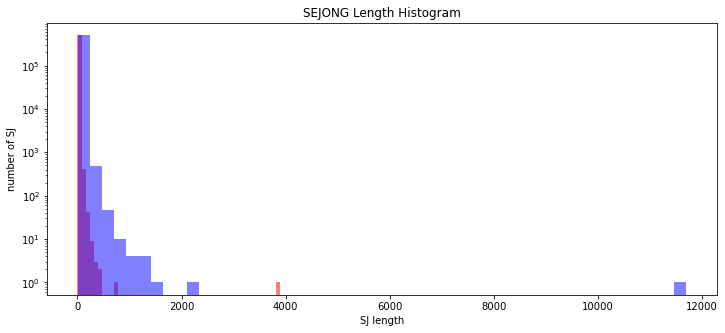

In [11]:
plt.figure(figsize = (12,5))

plt.hist(sj_len_by_token, bins = 50, alpha=0.5, color="r", label="word")
plt.hist(sj_len_by_eumjeol, bins = 50, alpha=0.5, color="b", label="aplt.yscallphabet")

plt.yscale('log', nonposy = 'clip')
plt.title('SEJONG Length Histogram')
plt.xlabel('SJ length')
plt.ylabel('number of SJ')
plt.legend(labels = ('어절','음절'))

In [12]:
# 어절 
print('문장 최대 길이 : {}'.format(np.max(sj_len_by_token)))
print('문장 최소 길이 : {}'.format(np.min(sj_len_by_token)))
print('문장 평균 길이 : {:.2f}'.format(np.mean(sj_len_by_token)))
print('문장 길이 표준편차 : {:.2f}'.format(np.std(sj_len_by_token)))
print('문장 중간 길이 : {}'.format(np.median(sj_len_by_token)))
print('제 1사분위 길이 : {}'.format(np.percentile(sj_len_by_token, 25)))
print('제 3사분위 길이 : {}'.format(np.percentile(sj_len_by_token, 75)))

문장 최대 길이 : 3893
문장 최소 길이 : 0
문장 평균 길이 : 12.21
문장 길이 표준편타 : 10.69
문장 중간 길이 : 10.0
제 1사분위 길이 : 6.0
제 3사분위 길이 : 16.0


In [13]:
print('음절 최대 길이 : {}'.format(np.max(sj_len_by_eumjeol)))
print('음절 최소 길이 : {}'.format(np.min(sj_len_by_eumjeol)))
print('음절 평균 길이 : {:.2f}'.format(np.mean(sj_len_by_eumjeol)))
print('문장 길이 표준편차 : {:.2f}'.format(np.std(sj_len_by_eumjeol)))
print('문장 중간 길이 : {}'.format(np.median(sj_len_by_eumjeol)))
print('제 1사분위 길이 : {}'.format(np.percentile(sj_len_by_eumjeol, 25)))
print('제 3사분위 길이 : {}'.format(np.percentile(sj_len_by_eumjeol, 75)))

문장 최대 길이 : 11693
문장 최소 길이 : 1
문장 평균 길이 : 38.11
문장 길이 표준편차 : 33.40
문장 중간 길이 : 31.0
제 1사분위 길이 : 19.0
제 3사분위 길이 : 50.0


In [16]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

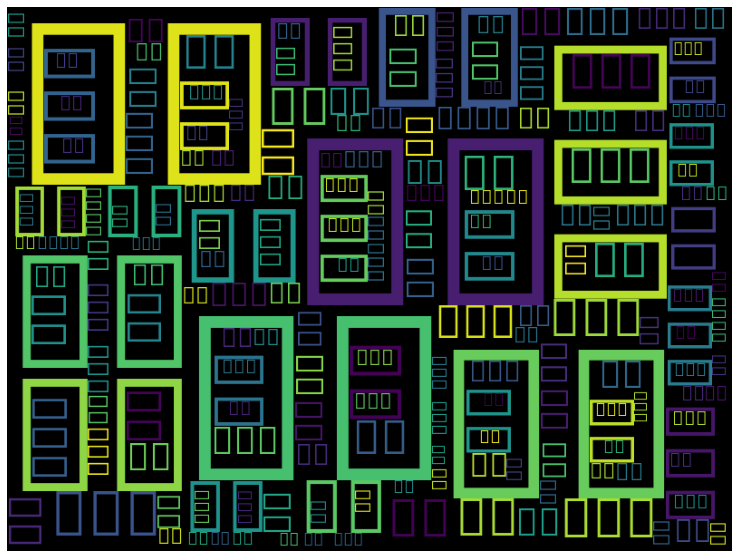

In [18]:
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', width=800, height=600)
wordcloud = wordcloud.generate(' '.join(sj_data['ko_text']))

plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()